In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/ds301group project/creditcard.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Pre processing & analyzing

In [ ]:
# describe data statistics
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
# find null values
data.isnull().sum().sum()

0

In [ ]:
# find number of records in each class
print('Number of negative label: ',len(data[data['Class']==0]))
print('Number of positive label: ',len(data[data['Class']==1]))

Number of negative label:  284315
Number of positive label:  492


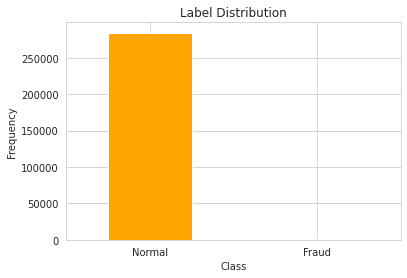

In [ ]:
label=['Normal','Fraud']
classes = pd.value_counts(data['Class'], sort = True)
classes.plot(kind = 'bar', rot=0,color='orange')
plt.title("Label Distribution")
plt.xticks(range(2), label)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
pd.concat([data[data['Class']==1].Amount.describe(), data[data['Class']==0].Amount.describe()], axis=1)

Amount         Amount
count   492.000000  284315.000000
mean    122.211321      88.291022
std     256.683288     250.105092
min       0.000000       0.000000
25%       1.000000       5.650000
50%       9.250000      22.000000
75%     105.890000      77.050000
max    2125.870000   25691.160000

In [ ]:
pd.concat([data[data['Class']==1].Time.describe(), data[data['Class']==0].Time.describe()], axis=1)

Time           Time
count     492.000000  284315.000000
mean    80746.806911   94838.202258
std     47835.365138   47484.015786
min       406.000000       0.000000
25%     41241.500000   54230.000000
50%     75568.500000   84711.000000
75%    128483.000000  139333.000000
max    170348.000000  172792.000000

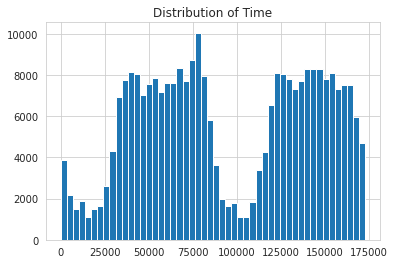

In [ ]:
plt.hist(data['Time'],bins=50)
plt.title('Distribution of Time')
plt.show()

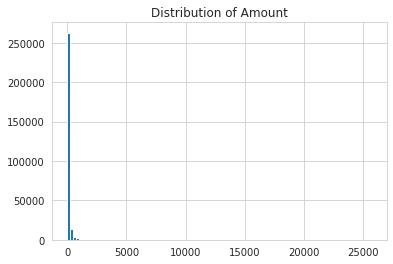

In [ ]:
plt.hist(data['Amount'],bins=100)
plt.title('Distribution of Amount')
plt.show()

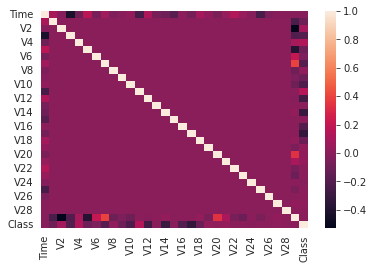

In [ ]:
sns.heatmap(data.corr())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=data.drop('Class',axis=1)
y=data.Class

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, random_state=0)

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [ ]:
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (227845, 30)
Shape of x_test:  (56962, 30)
Shape of y_train:  (227845,)
Shape of y_test:  (56962,)


In [ ]:

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

# ANN Model

In [ ]:
from tensorflow import keras

In [ ]:
!pip install -U "ray[tune]"==1.11.0
import ray
from ray import tune
from ray.tune.integration.keras import TuneReportCallback

     |████████████████████████████████| 52.7 MB 86.4 MB/s 
     |████████████████████████████████| 241 kB 65.4 MB/s 
     |████████████████████████████████| 4.1 MB 50.3 MB/s 
     |████████████████████████████████| 125 kB 71.1 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.44.0
    Uninstalling grpcio-1.44.0:
      Successfully uninstalled grpcio-1.44.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [ ]:
def train_ann(config):
  epochs=5
  model = keras.Sequential([
      keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[-1],)),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(config['dropout_proba']),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(config['dropout_proba']),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(config['dropout_proba']),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
  model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=keras.optimizers.Adam(
            lr=config["lr"]),
        metrics=["accuracy"])

  model.fit(
        x_train,
        y_train,
        batch_size=round(config['batch_size']),
        epochs=epochs,
        verbose=0,
        validation_data=(x_test, y_test),
        callbacks=[TuneReportCallback({
            "mean_accuracy": "accuracy"
        })])



In [ ]:
analysis1 = tune.run(
        train_ann,
        name="exp",
        metric="mean_accuracy",
        mode="max",
        stop={
            "mean_accuracy": 0.99,
        },
        resources_per_trial={
            "gpu": 1
        },
        config={
            "batch_size": tune.grid_search([64, 128, 256]),
            "lr": tune.uniform(0.001, 0.1),
            "dropout_proba": tune.uniform(0,1)
        })

2022-05-14 20:02:43,181	WARNING function_runner.py:562 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
2022-05-14 20:02:52,109	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.


2022-05-14 20:02:52,748	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:02:53,353	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:02:53,965	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:02:54,579	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:02:55,159	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:02:55,739	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:02:56,354	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.


(scheduler +3m49s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(scheduler +3m49s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:02:56,994	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:02:57,611	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.


2022-05-14 20:02:58,213	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:02:58,834	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:03:00,017	WARNING util.py:164 -- The `start_trial` operation took 1.173 s, which may be a performance bottleneck.
2022-05-14 20:03:00,628	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:03:01,227	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:03:01,812	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:03:02,404	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:03:03,007	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:03:03,617	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:03:04,234	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:03:04,814	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:03:05,389	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:03:05,989	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:03:06,714	WARNING util.py:164 -- The `start_trial` operation took 0.716 s, which may be a performance bottleneck.
2022-05-14 20:03:07,380	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:03:07,995	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

2022-05-14 20:03:09,296	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:03:09,915	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:03:10,521	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:03:11,176	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:03:11,937	WARNING util.py:164 -- The `start_trial` operation took 0.759 s, which may be a performance bottleneck.
2022-05-14 20:03:12,639	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 20:03:13,351	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 20:03:13,993	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 20:03:14,594	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:03:15,182	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:03:15,740	WARNING util.py:164 -- The `start_trial` operation took 0.551 s, which may be a performance bottleneck.
2022-05-14 20:03:16,347	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:03:16,944	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:03:17,563	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:03:18,210	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:03:18,844	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 20:03:20,079	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:03:20,731	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:03:21,345	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:03:21,960	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:03:22,602	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:03:23,193	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:03:23,962	WARNING util.py:164 -- The `start_trial` operation took 0.763 s, which may be a performance bottleneck.
2022-05-14 20:03:24,667	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a 

2022-05-14 20:03:25,273	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:03:25,880	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:03:26,517	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:03:27,104	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:03:27,694	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:03:28,291	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:03:28,892	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:03:29,501	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a 

2022-05-14 20:03:30,723	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:03:31,332	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.


(scheduler +4m25s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:03:32,729	WARNING util.py:164 -- The `start_trial` operation took 1.395 s, which may be a performance bottleneck.
2022-05-14 20:03:33,343	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:03:33,931	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:03:34,542	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:03:35,167	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.


2022-05-14 20:03:35,767	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:03:36,360	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:03:37,091	WARNING util.py:164 -- The `start_trial` operation took 0.728 s, which may be a performance bottleneck.
2022-05-14 20:03:37,918	WARNING util.py:164 -- The `start_trial` operation took 0.823 s, which may be a performance bottleneck.
2022-05-14 20:03:38,725	WARNING util.py:164 -- The `start_trial` operation took 0.805 s, which may be a performance bottleneck.
2022-05-14 20:03:39,344	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:03:39,913	WARNING util.py:164 -- The `start_trial` operation took 0.567 s, which may be a performance bottleneck.
2022-05-14 20:03:40,497	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a 

2022-05-14 20:03:41,108	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:03:41,700	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:03:42,320	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:03:42,931	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:03:43,507	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:03:44,099	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:03:44,712	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:03:45,288	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a 

2022-05-14 20:03:46,512	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:03:47,156	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:03:47,747	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:03:48,337	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:03:48,932	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:03:49,530	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:03:50,127	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:03:50,732	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a 

2022-05-14 20:03:52,194	WARNING util.py:164 -- The `start_trial` operation took 0.765 s, which may be a performance bottleneck.
2022-05-14 20:03:52,805	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:03:52,810	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:03:53,406	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:03:54,001	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:03:54,572	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which 

2022-05-14 20:03:57,608	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:03:58,366	WARNING util.py:164 -- The `start_trial` operation took 0.755 s, which may be a performance bottleneck.
2022-05-14 20:03:58,959	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:03:59,550	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:04:00,166	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:04:00,743	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:04:01,309	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:04:01,912	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a 

2022-05-14 20:04:03,143	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:04:03,735	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:04:04,338	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:04:04,928	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:04:05,499	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:04:06,100	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:04:06,688	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.


(scheduler +5m0s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:04:07,284	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:04:07,896	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.


2022-05-14 20:04:08,501	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:04:09,090	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:04:09,654	WARNING util.py:164 -- The `start_trial` operation took 0.559 s, which may be a performance bottleneck.
2022-05-14 20:04:10,214	WARNING util.py:164 -- The `start_trial` operation took 0.558 s, which may be a performance bottleneck.
2022-05-14 20:04:10,801	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:04:11,401	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:04:11,976	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:04:12,579	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:04:13,793	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:04:14,369	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:04:14,936	WARNING util.py:164 -- The `start_trial` operation took 0.561 s, which may be a performance bottleneck.
2022-05-14 20:04:15,513	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:04:16,085	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:04:16,698	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:04:17,293	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:04:17,876	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a 

2022-05-14 20:04:19,048	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:04:19,614	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:04:20,269	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:04:20,854	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:04:21,994	WARNING util.py:164 -- The `start_trial` operation took 1.134 s, which may be a performance bottleneck.
2022-05-14 20:04:23,473	WARNING util.py:164 -- The `start_trial` operation took 1.466 s, which may be a performance bottleneck.


2022-05-14 20:04:24,612	WARNING util.py:164 -- The `start_trial` operation took 1.122 s, which may be a performance bottleneck.
2022-05-14 20:04:25,201	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:04:25,783	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:04:26,413	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:04:26,998	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:04:27,578	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:04:28,178	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:04:28,747	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a 

2022-05-14 20:04:29,336	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:04:29,936	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:04:30,531	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:04:31,113	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:04:31,703	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:04:32,349	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:04:32,921	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:04:33,510	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a 

2022-05-14 20:04:34,723	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:04:35,395	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:04:36,157	WARNING util.py:164 -- The `start_trial` operation took 0.758 s, which may be a performance bottleneck.
2022-05-14 20:04:36,932	WARNING util.py:164 -- The `start_trial` operation took 0.773 s, which may be a performance bottleneck.
2022-05-14 20:04:37,562	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:04:38,157	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:04:38,771	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:04:39,361	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a 

2022-05-14 20:04:39,955	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:04:40,551	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:04:41,111	WARNING util.py:164 -- The `start_trial` operation took 0.559 s, which may be a performance bottleneck.
2022-05-14 20:04:41,684	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.


(scheduler +5m35s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:04:42,264	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:04:42,839	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:04:43,427	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:04:44,028	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:04:44,602	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.


2022-05-14 20:04:45,206	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:04:45,827	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:04:46,404	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:04:46,975	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:04:47,599	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:04:48,182	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:04:48,775	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:04:49,372	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:04:50,869	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:04:51,465	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:04:52,057	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:04:52,628	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:04:53,253	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:04:53,254	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 20:04:56,201	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:04:56,790	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:04:57,410	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:04:57,975	WARNING util.py:164 -- The `start_trial` operation took 0.563 s, which may be a performance bottleneck.
2022-05-14 20:04:58,588	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:04:59,186	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:04:59,737	WARNING util.py:164 -- The `start_trial` operation took 0.549 s, which may be a performance bottleneck.
2022-05-14 20:05:00,328	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a 

2022-05-14 20:05:01,484	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:05:02,066	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:05:02,657	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:05:03,253	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:05:03,839	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:05:04,598	WARNING util.py:164 -- The `start_trial` operation took 0.750 s, which may be a performance bottleneck.
2022-05-14 20:05:05,254	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:05:05,834	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a 

2022-05-14 20:05:06,984	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:05:07,566	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:05:08,139	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:05:08,730	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:05:09,305	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:05:09,905	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:05:10,516	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:05:11,104	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a 

2022-05-14 20:05:12,281	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:05:12,845	WARNING util.py:164 -- The `start_trial` operation took 0.558 s, which may be a performance bottleneck.
2022-05-14 20:05:13,417	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:05:14,010	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:05:14,586	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:05:15,172	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:05:15,765	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:05:16,353	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a 

(scheduler +6m10s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:05:17,579	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:05:18,175	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:05:18,780	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:05:19,377	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:05:19,965	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:05:20,526	WARNING util.py:164 -- The `start_trial` operation took 0.559 s, which may be a performance bottleneck.
2022-05-14 20:05:21,102	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:05:21,688	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a 

2022-05-14 20:05:22,895	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:05:23,516	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:05:24,091	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:05:24,676	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:05:25,288	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:05:25,863	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:05:26,428	WARNING util.py:164 -- The `start_trial` operation took 0.563 s, which may be a performance bottleneck.
2022-05-14 20:05:27,021	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a 

2022-05-14 20:05:28,176	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:05:28,769	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:05:29,350	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:05:29,904	WARNING util.py:164 -- The `start_trial` operation took 0.552 s, which may be a performance bottleneck.
2022-05-14 20:05:30,493	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:05:31,102	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:05:31,667	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:05:32,265	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:05:33,404	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:05:34,179	WARNING util.py:164 -- The `start_trial` operation took 0.773 s, which may be a performance bottleneck.
2022-05-14 20:05:34,858	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:05:35,425	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:05:36,007	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:05:36,608	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:05:37,178	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:05:37,759	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a 

2022-05-14 20:05:38,965	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:05:39,563	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:05:40,325	WARNING util.py:164 -- The `start_trial` operation took 0.759 s, which may be a performance bottleneck.
2022-05-14 20:05:40,978	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:05:41,575	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:05:42,168	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:05:42,719	WARNING util.py:164 -- The `start_trial` operation took 0.545 s, which may be a performance bottleneck.
2022-05-14 20:05:43,316	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a 

2022-05-14 20:05:44,530	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:05:45,113	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:05:45,692	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:05:46,318	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:05:46,917	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:05:47,502	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:05:48,099	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:05:48,677	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a 

2022-05-14 20:05:49,912	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:05:50,484	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:05:51,068	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:05:51,657	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:05:52,250	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.


(scheduler +6m45s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:05:52,830	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:05:53,463	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:05:53,466	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:05:54,066	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:05:54,640	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.


2022-05-14 20:05:55,248	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:05:55,800	WARNING util.py:164 -- The `start_trial` operation took 0.550 s, which may be a performance bottleneck.
2022-05-14 20:05:56,375	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:05:57,003	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:05:57,588	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:05:58,172	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:05:58,751	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:05:59,360	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

2022-05-14 20:06:00,569	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:06:01,171	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:06:01,754	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:06:02,339	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:06:02,943	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:06:03,506	WARNING util.py:164 -- The `start_trial` operation took 0.558 s, which may be a performance bottleneck.
2022-05-14 20:06:04,094	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:06:04,676	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a 

2022-05-14 20:06:05,826	WARNING util.py:164 -- The `start_trial` operation took 0.556 s, which may be a performance bottleneck.
2022-05-14 20:06:06,429	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:06:06,994	WARNING util.py:164 -- The `start_trial` operation took 0.562 s, which may be a performance bottleneck.
2022-05-14 20:06:07,574	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:06:08,165	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:06:08,717	WARNING util.py:164 -- The `start_trial` operation took 0.550 s, which may be a performance bottleneck.
2022-05-14 20:06:09,305	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:06:09,907	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a 

2022-05-14 20:06:11,038	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:06:11,635	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:06:12,227	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:06:12,809	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:06:13,390	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:06:13,971	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:06:14,569	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:06:15,168	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a 

2022-05-14 20:06:16,353	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:06:16,942	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:06:17,554	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:06:18,148	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:06:18,740	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:06:19,350	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:06:19,914	WARNING util.py:164 -- The `start_trial` operation took 0.561 s, which may be a performance bottleneck.
2022-05-14 20:06:20,477	WARNING util.py:164 -- The `start_trial` operation took 0.555 s, which may be a 

2022-05-14 20:06:21,652	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:06:22,237	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:06:22,836	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:06:23,431	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:06:24,042	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:06:24,629	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:06:25,220	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:06:25,812	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a 

2022-05-14 20:06:27,006	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.


(scheduler +7m20s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:06:27,610	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:06:28,209	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:06:28,840	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:06:29,432	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:06:30,013	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:06:30,614	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:06:31,207	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:06:31,787	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a 

2022-05-14 20:06:32,406	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:06:33,026	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:06:33,785	WARNING util.py:164 -- The `start_trial` operation took 0.754 s, which may be a performance bottleneck.
2022-05-14 20:06:34,398	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:06:34,964	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:06:35,532	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:06:36,111	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:06:36,672	WARNING util.py:164 -- The `start_trial` operation took 0.559 s, which may be a 

2022-05-14 20:06:37,838	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:06:38,420	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:06:39,009	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:06:39,580	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:06:40,185	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:06:40,763	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:06:41,358	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:06:41,927	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a 

2022-05-14 20:06:43,101	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:06:43,710	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:06:44,327	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:06:44,912	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:06:45,500	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:06:46,113	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:06:46,695	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:06:47,302	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 20:06:48,514	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:06:49,124	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:06:49,717	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:06:50,332	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:06:50,944	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:06:51,556	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:06:52,138	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:06:52,706	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a 

2022-05-14 20:06:53,875	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:06:53,877	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:06:54,471	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:06:55,085	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:06:55,663	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:06:56,243	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which 

2022-05-14 20:06:59,185	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:06:59,785	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:07:00,405	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:07:00,998	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:07:01,600	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:07:02,198	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.


(scheduler +7m55s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:07:02,820	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:07:03,427	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:07:04,003	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.


2022-05-14 20:07:04,636	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:07:05,415	WARNING util.py:164 -- The `start_trial` operation took 0.776 s, which may be a performance bottleneck.
2022-05-14 20:07:06,154	WARNING util.py:164 -- The `start_trial` operation took 0.731 s, which may be a performance bottleneck.
2022-05-14 20:07:06,839	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 20:07:07,446	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:07:08,147	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 20:07:08,846	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 20:07:09,439	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a 

2022-05-14 20:07:10,080	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:07:10,688	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:07:11,247	WARNING util.py:164 -- The `start_trial` operation took 0.550 s, which may be a performance bottleneck.
2022-05-14 20:07:11,833	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:07:12,450	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:07:13,041	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:07:13,621	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:07:14,195	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a 

2022-05-14 20:07:15,428	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:07:16,016	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:07:16,599	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:07:17,204	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:07:17,828	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:07:18,439	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:07:19,018	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:07:19,623	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a 

2022-05-14 20:07:20,888	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:07:21,496	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:07:22,133	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:07:22,718	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:07:23,368	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:07:23,981	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:07:24,582	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:07:25,238	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 20:07:26,613	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:07:27,216	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:07:27,810	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:07:28,484	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:07:29,251	WARNING util.py:164 -- The `start_trial` operation took 0.764 s, which may be a performance bottleneck.
2022-05-14 20:07:29,876	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:07:30,471	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:07:31,087	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 20:07:31,729	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:07:32,361	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:07:32,974	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:07:33,618	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:07:34,257	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:07:34,832	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:07:35,431	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:07:36,021	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a 

2022-05-14 20:07:37,200	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.


(scheduler +8m30s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:07:37,812	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:07:38,395	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:07:39,003	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:07:39,621	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:07:40,198	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:07:40,824	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:07:41,436	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:07:42,032	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a 

2022-05-14 20:07:42,621	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:07:43,240	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:07:43,847	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:07:44,437	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:07:45,034	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:07:45,626	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:07:46,226	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:07:46,823	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a 

2022-05-14 20:07:48,037	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:07:48,629	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:07:49,234	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:07:49,825	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:07:50,455	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:07:51,230	WARNING util.py:164 -- The `start_trial` operation took 0.771 s, which may be a performance bottleneck.
2022-05-14 20:07:51,915	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 20:07:52,517	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a 

2022-05-14 20:07:53,106	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:07:53,695	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:07:54,319	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:07:54,321	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:07:54,935	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:07:55,516	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which 

2022-05-14 20:07:58,528	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:07:59,127	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:07:59,726	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:08:00,350	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:08:00,950	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:08:01,547	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:08:02,143	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:08:02,734	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a 

2022-05-14 20:08:03,902	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:08:04,514	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:08:05,097	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:08:05,682	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:08:06,302	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:08:06,894	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:08:07,484	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:08:08,079	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a 

2022-05-14 20:08:09,267	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:08:09,883	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:08:10,441	WARNING util.py:164 -- The `start_trial` operation took 0.556 s, which may be a performance bottleneck.
2022-05-14 20:08:11,019	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:08:11,602	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:08:12,209	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:08:12,978	WARNING util.py:164 -- The `start_trial` operation took 0.761 s, which may be a performance bottleneck.


(scheduler +9m5s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:08:13,789	WARNING util.py:164 -- The `start_trial` operation took 0.809 s, which may be a performance bottleneck.


2022-05-14 20:08:14,461	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:08:15,052	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:08:15,641	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:08:16,257	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:08:16,880	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:08:17,462	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:08:18,071	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:08:18,651	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a 

2022-05-14 20:08:19,876	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:08:20,465	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:08:21,042	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:08:21,604	WARNING util.py:164 -- The `start_trial` operation took 0.559 s, which may be a performance bottleneck.
2022-05-14 20:08:22,206	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:08:22,785	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:08:23,447	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:08:24,019	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a 

2022-05-14 20:08:25,237	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:08:25,954	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a performance bottleneck.
2022-05-14 20:08:26,681	WARNING util.py:164 -- The `start_trial` operation took 0.716 s, which may be a performance bottleneck.
2022-05-14 20:08:27,311	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:08:28,082	WARNING util.py:164 -- The `start_trial` operation took 0.767 s, which may be a performance bottleneck.
2022-05-14 20:08:28,772	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 20:08:29,382	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:08:29,964	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a 

2022-05-14 20:08:30,587	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:08:31,217	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:08:31,804	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:08:32,403	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:08:33,008	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:08:33,578	WARNING util.py:164 -- The `start_trial` operation took 0.559 s, which may be a performance bottleneck.
2022-05-14 20:08:34,160	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:08:34,735	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a 

2022-05-14 20:08:35,947	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:08:36,530	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:08:37,091	WARNING util.py:164 -- The `start_trial` operation took 0.555 s, which may be a performance bottleneck.
2022-05-14 20:08:37,659	WARNING util.py:164 -- The `start_trial` operation took 0.558 s, which may be a performance bottleneck.
2022-05-14 20:08:38,248	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:08:38,852	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:08:39,449	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:08:40,019	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a 

2022-05-14 20:08:41,190	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:08:41,780	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:08:42,535	WARNING util.py:164 -- The `start_trial` operation took 0.752 s, which may be a performance bottleneck.
2022-05-14 20:08:43,230	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 20:08:43,819	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:08:44,420	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:08:45,000	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:08:45,574	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a 

2022-05-14 20:08:46,740	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:08:47,290	WARNING util.py:164 -- The `start_trial` operation took 0.546 s, which may be a performance bottleneck.
2022-05-14 20:08:47,857	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.


(scheduler +9m40s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:08:48,433	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:08:49,012	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:08:49,604	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:08:50,217	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:08:50,779	WARNING util.py:164 -- The `start_trial` operation took 0.560 s, which may be a performance bottleneck.
2022-05-14 20:08:51,369	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.


2022-05-14 20:08:51,975	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:08:52,526	WARNING util.py:164 -- The `start_trial` operation took 0.548 s, which may be a performance bottleneck.
2022-05-14 20:08:53,084	WARNING util.py:164 -- The `start_trial` operation took 0.555 s, which may be a performance bottleneck.
2022-05-14 20:08:53,669	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:08:54,266	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:08:54,847	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:08:54,849	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 20:08:57,146	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:08:57,728	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:08:58,303	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:08:58,864	WARNING util.py:164 -- The `start_trial` operation took 0.558 s, which may be a performance bottleneck.
2022-05-14 20:08:59,454	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:09:00,030	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:09:00,619	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:09:01,259	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 20:09:02,469	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:09:03,058	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:09:03,622	WARNING util.py:164 -- The `start_trial` operation took 0.562 s, which may be a performance bottleneck.
2022-05-14 20:09:04,220	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:09:04,811	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:09:05,396	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:09:05,989	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:09:06,591	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

2022-05-14 20:09:07,754	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:09:08,325	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:09:08,910	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:09:09,489	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:09:10,072	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:09:10,671	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:09:11,247	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:09:11,907	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 20:09:13,240	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:09:13,837	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:09:14,429	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:09:15,002	WARNING util.py:164 -- The `start_trial` operation took 0.563 s, which may be a performance bottleneck.
2022-05-14 20:09:15,571	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:09:16,182	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:09:16,779	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:09:17,408	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:09:18,621	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:09:19,196	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:09:19,780	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:09:20,388	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:09:20,992	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:09:21,584	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:09:22,191	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:09:22,773	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a 

(scheduler +10m15s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:09:23,364	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.


2022-05-14 20:09:23,944	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:09:24,521	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:09:25,089	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:09:25,698	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:09:26,255	WARNING util.py:164 -- The `start_trial` operation took 0.553 s, which may be a performance bottleneck.
2022-05-14 20:09:26,832	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:09:27,415	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:09:28,004	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a 

2022-05-14 20:09:29,180	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:09:29,761	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:09:30,364	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:09:30,971	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:09:31,551	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:09:32,124	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:09:32,708	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:09:33,302	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a 

2022-05-14 20:09:34,507	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:09:35,102	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:09:35,690	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:09:36,285	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:09:36,859	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:09:37,430	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:09:38,041	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:09:38,637	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:09:39,794	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:09:40,393	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:09:40,967	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:09:41,528	WARNING util.py:164 -- The `start_trial` operation took 0.557 s, which may be a performance bottleneck.
2022-05-14 20:09:42,133	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:09:42,716	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:09:43,333	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:09:43,940	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 20:09:45,146	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:09:45,754	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:09:46,354	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:09:46,952	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:09:47,574	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:09:48,189	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:09:48,781	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:09:49,378	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a 

2022-05-14 20:09:50,551	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:09:51,139	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:09:51,731	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:09:52,306	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:09:52,911	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:09:53,535	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:09:54,108	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:09:54,682	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a 

2022-05-14 20:09:55,862	WARNING util.py:164 -- The `start_trial` operation took 0.552 s, which may be a performance bottleneck.
2022-05-14 20:09:56,436	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:09:57,035	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:09:57,642	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.


(scheduler +10m51s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:09:58,246	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:09:58,820	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:09:59,417	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:10:00,022	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:10:00,610	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.


2022-05-14 20:10:01,233	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:10:01,812	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:10:02,394	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:10:02,989	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:10:03,545	WARNING util.py:164 -- The `start_trial` operation took 0.548 s, which may be a performance bottleneck.
2022-05-14 20:10:04,115	WARNING util.py:164 -- The `start_trial` operation took 0.567 s, which may be a performance bottleneck.
2022-05-14 20:10:04,757	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:10:05,314	WARNING util.py:164 -- The `start_trial` operation took 0.554 s, which may be a 

2022-05-14 20:10:06,522	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:10:07,122	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:10:07,723	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:10:08,330	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:10:08,906	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:10:09,480	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:10:10,088	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:10:10,698	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 20:10:11,890	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:10:12,486	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:10:13,082	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:10:13,676	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:10:14,266	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:10:14,836	WARNING util.py:164 -- The `start_trial` operation took 0.567 s, which may be a performance bottleneck.
2022-05-14 20:10:15,410	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:10:15,990	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a 

2022-05-14 20:10:17,203	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:10:17,811	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:10:18,403	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:10:18,980	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:10:19,583	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:10:20,162	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:10:20,744	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:10:21,363	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 20:10:22,702	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:10:23,290	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:10:23,867	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:10:24,481	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:10:25,077	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:10:25,657	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:10:26,269	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:10:26,861	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a 

2022-05-14 20:10:28,066	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:10:28,637	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:10:29,223	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:10:29,789	WARNING util.py:164 -- The `start_trial` operation took 0.561 s, which may be a performance bottleneck.
2022-05-14 20:10:30,365	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:10:30,955	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:10:31,517	WARNING util.py:164 -- The `start_trial` operation took 0.560 s, which may be a performance bottleneck.
2022-05-14 20:10:32,101	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a 

(scheduler +11m26s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:10:33,281	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:10:33,862	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:10:34,439	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:10:35,029	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:10:35,614	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:10:36,196	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:10:36,885	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 20:10:37,646	WARNING util.py:164 -- The `start_trial` operation took 0.754 s, which may be a 

2022-05-14 20:10:38,835	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:10:39,420	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:10:40,011	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:10:40,586	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:10:41,147	WARNING util.py:164 -- The `start_trial` operation took 0.559 s, which may be a performance bottleneck.
2022-05-14 20:10:41,755	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:10:42,356	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:10:42,936	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a 

2022-05-14 20:10:44,181	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:10:44,750	WARNING util.py:164 -- The `start_trial` operation took 0.563 s, which may be a performance bottleneck.
2022-05-14 20:10:45,326	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:10:45,907	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:10:46,511	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:10:47,102	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:10:47,674	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:10:48,420	WARNING util.py:164 -- The `start_trial` operation took 0.744 s, which may be a 

2022-05-14 20:10:49,728	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:10:50,306	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:10:50,884	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:10:51,509	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:10:52,093	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:10:52,669	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:10:53,258	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:10:53,831	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a 

2022-05-14 20:10:55,064	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:10:55,648	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:10:55,650	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:10:56,246	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:10:56,814	WARNING util.py:164 -- The `start_trial` operation took 0.560 s, which may be a performance bottleneck.
2022-05-14 20:10:57,434	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which 

2022-05-14 20:11:00,348	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:11:00,968	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:11:01,537	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:11:02,126	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:11:02,721	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:11:03,294	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:11:03,890	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:11:04,582	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a 

2022-05-14 20:11:05,934	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:11:06,528	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:11:07,129	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:11:07,724	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:11:08,304	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.


(scheduler +12m1s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:11:08,897	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:11:09,478	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:11:10,088	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:11:10,666	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.


2022-05-14 20:11:11,260	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:11:11,869	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:11:12,463	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:11:13,049	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:11:13,626	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:11:14,223	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:11:14,799	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:11:15,378	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a 

2022-05-14 20:11:16,537	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:11:17,143	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:11:17,805	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:11:18,628	WARNING util.py:164 -- The `start_trial` operation took 0.820 s, which may be a performance bottleneck.
2022-05-14 20:11:19,427	WARNING util.py:164 -- The `start_trial` operation took 0.795 s, which may be a performance bottleneck.
2022-05-14 20:11:20,064	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:11:20,658	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:11:21,246	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a 

2022-05-14 20:11:21,834	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:11:22,419	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:11:23,006	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:11:23,595	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:11:24,200	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:11:24,768	WARNING util.py:164 -- The `start_trial` operation took 0.562 s, which may be a performance bottleneck.
2022-05-14 20:11:25,377	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:11:26,009	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:11:27,157	WARNING util.py:164 -- The `start_trial` operation took 0.553 s, which may be a performance bottleneck.
2022-05-14 20:11:27,769	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:11:28,351	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:11:28,908	WARNING util.py:164 -- The `start_trial` operation took 0.552 s, which may be a performance bottleneck.
2022-05-14 20:11:29,521	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:11:30,092	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:11:30,694	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:11:31,277	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a 

2022-05-14 20:11:32,467	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:11:33,072	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:11:33,658	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:11:34,244	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:11:34,818	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:11:35,605	WARNING util.py:164 -- The `start_trial` operation took 0.784 s, which may be a performance bottleneck.
2022-05-14 20:11:36,294	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 20:11:36,878	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a 

2022-05-14 20:11:37,499	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:11:38,099	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:11:38,730	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:11:39,351	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:11:39,922	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:11:40,513	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:11:41,139	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:11:41,708	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a 

2022-05-14 20:11:42,919	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.


(scheduler +12m36s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:11:43,515	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:11:44,116	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:11:44,702	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:11:45,311	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:11:45,923	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:11:46,515	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:11:47,140	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:11:47,734	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a 

2022-05-14 20:11:48,341	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:11:48,921	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:11:49,518	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:11:50,100	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:11:50,654	WARNING util.py:164 -- The `start_trial` operation took 0.551 s, which may be a performance bottleneck.
2022-05-14 20:11:51,222	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:11:51,821	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:11:52,451	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:11:53,645	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:11:54,238	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:11:54,781	WARNING util.py:164 -- The `start_trial` operation took 0.539 s, which may be a performance bottleneck.
2022-05-14 20:11:55,375	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:11:55,978	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:11:55,979	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 20:11:58,990	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:11:59,569	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:12:00,130	WARNING util.py:164 -- The `start_trial` operation took 0.555 s, which may be a performance bottleneck.
2022-05-14 20:12:00,729	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:12:01,315	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:12:01,886	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:12:02,487	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:12:03,058	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a 

2022-05-14 20:12:04,206	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:12:04,766	WARNING util.py:164 -- The `start_trial` operation took 0.558 s, which may be a performance bottleneck.
2022-05-14 20:12:05,361	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:12:05,940	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:12:06,546	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:12:07,174	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:12:07,756	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:12:08,370	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 20:12:09,568	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:12:10,127	WARNING util.py:164 -- The `start_trial` operation took 0.557 s, which may be a performance bottleneck.
2022-05-14 20:12:10,732	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:12:11,286	WARNING util.py:164 -- The `start_trial` operation took 0.552 s, which may be a performance bottleneck.
2022-05-14 20:12:11,907	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:12:12,677	WARNING util.py:164 -- The `start_trial` operation took 0.767 s, which may be a performance bottleneck.
2022-05-14 20:12:13,303	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:12:13,889	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a 

2022-05-14 20:12:15,068	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:12:15,665	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:12:16,272	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:12:16,900	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:12:17,524	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:12:18,110	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.


(scheduler +13m11s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:12:18,719	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:12:19,311	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:12:19,907	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.


2022-05-14 20:12:20,511	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:12:21,074	WARNING util.py:164 -- The `start_trial` operation took 0.560 s, which may be a performance bottleneck.
2022-05-14 20:12:21,634	WARNING util.py:164 -- The `start_trial` operation took 0.558 s, which may be a performance bottleneck.
2022-05-14 20:12:22,255	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:12:22,829	WARNING util.py:164 -- The `start_trial` operation took 0.563 s, which may be a performance bottleneck.
2022-05-14 20:12:23,447	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:12:24,053	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:12:24,625	WARNING util.py:164 -- The `start_trial` operation took 0.561 s, which may be a 

2022-05-14 20:12:25,832	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:12:26,418	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:12:27,029	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:12:27,619	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:12:28,239	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:12:28,836	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:12:29,543	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 20:12:30,320	WARNING util.py:164 -- The `start_trial` operation took 0.774 s, which may be a 

2022-05-14 20:12:30,939	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:12:31,552	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:12:32,173	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:12:32,763	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:12:33,368	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:12:33,939	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:12:34,501	WARNING util.py:164 -- The `start_trial` operation took 0.556 s, which may be a performance bottleneck.
2022-05-14 20:12:35,111	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 20:12:36,249	WARNING util.py:164 -- The `start_trial` operation took 0.545 s, which may be a performance bottleneck.
2022-05-14 20:12:36,804	WARNING util.py:164 -- The `start_trial` operation took 0.553 s, which may be a performance bottleneck.
2022-05-14 20:12:37,420	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:12:37,996	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:12:38,592	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:12:39,151	WARNING util.py:164 -- The `start_trial` operation took 0.557 s, which may be a performance bottleneck.
2022-05-14 20:12:39,724	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:12:40,302	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a 

2022-05-14 20:12:41,565	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:12:42,630	WARNING util.py:164 -- The `start_trial` operation took 1.063 s, which may be a performance bottleneck.
2022-05-14 20:12:43,200	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:12:43,807	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:12:44,394	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:12:45,020	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:12:45,630	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:12:46,209	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a 

2022-05-14 20:12:46,817	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:12:47,461	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:12:48,048	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:12:48,700	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:12:49,336	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:12:49,947	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:12:50,567	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:12:51,185	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 20:12:52,374	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:12:52,997	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:12:53,601	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.


(scheduler +13m46s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:12:54,214	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:12:54,806	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:12:55,399	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:12:56,014	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:12:56,016	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:12:56,629	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which 

2022-05-14 20:12:57,868	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:12:58,510	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:12:59,136	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:12:59,734	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:13:00,321	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:13:00,959	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:13:01,752	WARNING util.py:164 -- The `start_trial` operation took 0.791 s, which may be a performance bottleneck.
2022-05-14 20:13:02,389	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 20:13:03,034	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:13:03,800	WARNING util.py:164 -- The `start_trial` operation took 0.762 s, which may be a performance bottleneck.
2022-05-14 20:13:04,465	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:13:05,096	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:13:05,672	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:13:06,246	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:13:06,840	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:13:07,437	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:13:08,056	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:13:08,696	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:13:09,279	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:13:09,847	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:13:10,456	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:13:11,052	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:13:11,672	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:13:12,270	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a 

2022-05-14 20:13:13,449	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:13:14,073	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:13:14,694	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:13:15,279	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:13:15,893	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:13:16,504	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:13:17,113	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:13:17,707	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a 

2022-05-14 20:13:18,966	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:13:19,565	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:13:20,174	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:13:20,809	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:13:21,392	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:13:21,974	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:13:22,559	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:13:23,131	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a 

2022-05-14 20:13:24,395	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:13:24,956	WARNING util.py:164 -- The `start_trial` operation took 0.558 s, which may be a performance bottleneck.
2022-05-14 20:13:25,550	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:13:26,146	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:13:26,735	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:13:27,353	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:13:27,985	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:13:28,560	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a 

(scheduler +14m21s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:13:29,181	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.


2022-05-14 20:13:29,786	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:13:30,383	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:13:30,990	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:13:31,589	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:13:32,168	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:13:32,782	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:13:33,406	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:13:34,015	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 20:13:35,242	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:13:35,849	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:13:36,436	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:13:37,035	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:13:37,615	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:13:38,189	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:13:38,812	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:13:39,425	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 20:13:40,629	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:13:41,244	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:13:41,836	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:13:42,408	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:13:43,035	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:13:43,610	WARNING util.py:164 -- The `start_trial` operation took 0.572 s, which may be a performance bottleneck.
2022-05-14 20:13:44,200	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:13:44,792	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a 

2022-05-14 20:13:45,943	WARNING util.py:164 -- The `start_trial` operation took 0.556 s, which may be a performance bottleneck.
2022-05-14 20:13:46,554	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:13:47,148	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:13:47,772	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:13:48,388	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:13:49,013	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:13:49,587	WARNING util.py:164 -- The `start_trial` operation took 0.565 s, which may be a performance bottleneck.
2022-05-14 20:13:50,186	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:13:51,390	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:13:51,975	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:13:52,565	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:13:53,163	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:13:53,753	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:13:54,364	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:13:54,936	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:13:55,531	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a 

2022-05-14 20:13:56,752	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:13:57,351	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:13:57,941	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:13:58,514	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:13:59,114	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:13:59,727	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:14:00,327	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:14:00,926	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a 

2022-05-14 20:14:02,164	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:14:02,735	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:14:03,330	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:14:03,881	WARNING util.py:164 -- The `start_trial` operation took 0.547 s, which may be a performance bottleneck.


(scheduler +14m56s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:14:04,445	WARNING util.py:164 -- The `start_trial` operation took 0.562 s, which may be a performance bottleneck.
2022-05-14 20:14:05,046	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:14:05,623	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:14:06,204	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:14:06,825	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.


2022-05-14 20:14:07,453	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:14:08,043	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:14:08,653	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:14:09,278	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:14:09,885	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:14:10,465	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:14:11,063	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:14:11,624	WARNING util.py:164 -- The `start_trial` operation took 0.554 s, which may be a 

2022-05-14 20:14:12,797	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:14:13,394	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:14:13,985	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:14:14,596	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:14:15,167	WARNING util.py:164 -- The `start_trial` operation took 0.568 s, which may be a performance bottleneck.
2022-05-14 20:14:15,761	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:14:16,365	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:14:16,975	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 20:14:18,155	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:14:18,747	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:14:19,352	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:14:19,948	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:14:20,581	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:14:21,158	WARNING util.py:164 -- The `start_trial` operation took 0.574 s, which may be a performance bottleneck.
2022-05-14 20:14:21,749	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:14:22,363	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 20:14:23,574	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:14:24,192	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:14:24,787	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:14:25,387	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:14:25,994	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:14:26,587	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:14:27,185	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:14:27,807	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 20:14:28,998	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:14:29,795	WARNING util.py:164 -- The `start_trial` operation took 0.789 s, which may be a performance bottleneck.
2022-05-14 20:14:30,437	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:14:31,056	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:14:31,652	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:14:32,259	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:14:32,868	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:14:33,483	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 20:14:34,122	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:14:34,716	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:14:35,313	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:14:35,903	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:14:36,720	WARNING util.py:164 -- The `start_trial` operation took 0.814 s, which may be a performance bottleneck.
2022-05-14 20:14:37,604	WARNING util.py:164 -- The `start_trial` operation took 0.881 s, which may be a performance bottleneck.
2022-05-14 20:14:38,462	WARNING util.py:164 -- The `start_trial` operation took 0.848 s, which may be a performance bottleneck.


(scheduler +15m32s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:14:39,263	WARNING util.py:164 -- The `start_trial` operation took 0.797 s, which may be a performance bottleneck.


2022-05-14 20:14:39,888	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:14:40,518	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:14:41,146	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:14:41,742	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:14:42,374	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:14:42,962	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:14:43,617	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:14:45,359	WARNING util.py:164 -- The `start_trial` operation took 1.739 s, which may be a 

2022-05-14 20:14:46,031	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:14:46,691	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:14:47,349	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:14:48,007	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:14:48,626	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:14:49,243	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:14:49,877	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:14:50,490	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a 

2022-05-14 20:14:51,152	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:14:51,833	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:14:52,431	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:14:53,053	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:14:53,698	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:14:54,299	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:14:54,932	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:14:55,585	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 20:14:56,222	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:14:56,224	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:14:56,873	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:14:57,509	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:14:58,113	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:14:58,748	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which 

2022-05-14 20:15:01,824	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:15:02,428	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:15:03,050	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:15:03,675	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:15:04,268	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:15:04,891	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:15:05,543	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:15:06,174	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 20:15:07,479	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:15:08,086	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:15:08,676	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:15:09,294	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:15:09,904	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:15:10,515	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:15:11,145	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:15:11,772	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:15:13,040	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:15:13,652	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.


(scheduler +16m7s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:15:14,265	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:15:14,886	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:15:15,534	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:15:16,151	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:15:16,783	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:15:17,429	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


2022-05-14 20:15:18,050	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:15:18,664	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:15:19,314	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:15:19,881	WARNING util.py:164 -- The `start_trial` operation took 0.564 s, which may be a performance bottleneck.
2022-05-14 20:15:20,518	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:15:21,208	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 20:15:21,817	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:15:22,408	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a 

2022-05-14 20:15:23,636	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:15:24,260	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:15:24,892	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:15:25,499	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:15:26,133	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:15:26,729	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:15:27,380	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:15:27,990	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 20:15:29,250	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:15:29,857	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:15:30,492	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:15:31,348	WARNING util.py:164 -- The `start_trial` operation took 0.854 s, which may be a performance bottleneck.
2022-05-14 20:15:31,988	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:15:32,621	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:15:33,259	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:15:33,863	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:15:34,520	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:15:35,170	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:15:35,769	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:15:36,365	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:15:36,974	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:15:37,595	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:15:38,217	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:15:38,843	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 20:15:40,087	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:15:40,682	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:15:41,295	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:15:41,904	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:15:42,531	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:15:43,213	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 20:15:43,829	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:15:44,458	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:15:45,085	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:15:45,690	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:15:46,293	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:15:46,895	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:15:47,493	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:15:48,160	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:15:48,817	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


(scheduler +16m42s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:15:49,415	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:15:50,019	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.


2022-05-14 20:15:50,663	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:15:51,273	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:15:51,894	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:15:52,538	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:15:53,154	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:15:53,754	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:15:54,404	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:15:55,044	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 20:15:55,653	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:15:56,272	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:15:56,274	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:15:56,908	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:15:57,517	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:15:58,162	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which 

2022-05-14 20:16:01,322	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:16:01,935	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:16:02,565	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:16:03,170	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:16:03,785	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:16:04,430	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:16:05,028	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:16:05,621	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a 

2022-05-14 20:16:06,888	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:16:07,520	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:16:08,129	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:16:08,769	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:16:09,382	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:16:10,016	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:16:10,653	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:16:11,283	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:16:11,946	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:16:12,617	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:16:13,258	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:16:13,888	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:16:14,515	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:16:15,146	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:16:15,772	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:16:16,356	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a 

2022-05-14 20:16:16,979	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:16:17,583	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:16:18,245	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:16:18,858	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:16:19,492	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:16:20,120	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:16:20,763	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:16:21,376	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a 

2022-05-14 20:16:22,020	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:16:22,673	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:16:23,294	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:16:23,918	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.


(scheduler +17m17s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:16:24,557	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:16:25,177	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:16:25,803	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:16:26,447	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.


2022-05-14 20:16:27,049	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:16:27,647	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:16:28,299	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:16:28,904	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:16:29,509	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:16:30,149	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:16:30,763	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:16:31,378	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a 

2022-05-14 20:16:32,649	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:16:33,296	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:16:33,939	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:16:34,550	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:16:35,178	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:16:35,815	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:16:36,411	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:16:37,010	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:16:38,244	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:16:38,880	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:16:39,485	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:16:40,107	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:16:40,724	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:16:41,351	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:16:41,991	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:16:42,601	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 20:16:43,847	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:16:44,468	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:16:45,061	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:16:45,695	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:16:46,302	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:16:46,941	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:16:47,597	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:16:48,227	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:16:48,850	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:16:49,505	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:16:50,146	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:16:50,769	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:16:51,393	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:16:52,029	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:16:52,645	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:16:53,304	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 20:16:53,951	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:16:54,588	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:16:55,250	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:16:55,892	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:16:56,497	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:16:56,499	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 20:16:58,949	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.


(scheduler +17m52s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:16:59,609	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:17:00,214	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:17:00,811	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:17:01,400	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:17:02,009	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:17:02,624	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:17:03,263	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:17:03,931	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 20:17:04,601	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:17:05,298	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 20:17:06,050	WARNING util.py:164 -- The `start_trial` operation took 0.750 s, which may be a performance bottleneck.
2022-05-14 20:17:06,836	WARNING util.py:164 -- The `start_trial` operation took 0.783 s, which may be a performance bottleneck.
2022-05-14 20:17:07,471	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:17:08,106	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:17:08,729	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:17:09,364	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 20:17:10,028	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:17:10,651	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:17:11,260	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:17:11,890	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:17:12,533	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:17:13,178	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:17:13,832	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:17:14,438	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 20:17:15,043	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:17:15,671	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:17:16,289	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:17:16,952	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:17:17,582	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:17:18,202	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:17:18,822	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:17:19,473	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 20:17:20,120	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:17:20,754	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:17:21,349	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:17:21,976	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:17:22,617	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:17:23,239	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:17:23,847	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:17:24,526	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 20:17:25,164	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:17:25,840	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:17:26,466	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:17:27,090	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:17:27,767	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:17:28,379	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:17:28,985	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:17:29,639	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 20:17:30,266	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:17:30,903	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:17:31,516	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:17:32,159	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:17:32,777	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:17:33,441	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:17:34,076	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


(scheduler +18m27s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:17:34,715	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.


2022-05-14 20:17:35,370	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:17:36,039	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:17:36,659	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:17:37,290	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:17:37,903	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:17:38,538	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:17:39,194	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:17:39,831	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 20:17:40,451	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:17:41,066	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:17:41,716	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:17:42,308	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:17:42,916	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:17:43,563	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:17:44,174	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:17:44,790	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 20:17:45,996	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:17:46,620	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:17:47,268	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:17:47,915	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:17:48,581	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:17:49,247	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:17:49,899	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:17:50,515	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 20:17:51,158	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:17:51,814	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:17:52,418	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:17:53,031	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:17:53,701	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 20:17:54,323	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:17:54,942	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:17:55,567	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 20:17:56,188	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:17:56,809	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:17:56,819	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:17:57,474	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:17:58,067	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:17:58,705	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which 

2022-05-14 20:18:01,860	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:18:02,472	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:18:03,102	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:18:03,705	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:18:04,308	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:18:04,956	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:18:05,722	WARNING util.py:164 -- The `start_trial` operation took 0.763 s, which may be a performance bottleneck.
2022-05-14 20:18:06,434	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a 

2022-05-14 20:18:07,071	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:18:07,769	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 20:18:08,404	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:18:09,029	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:18:09,655	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.


(scheduler +19m2s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:18:10,295	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:18:10,925	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:18:11,594	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.


2022-05-14 20:18:12,226	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:18:12,878	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:18:13,512	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:18:14,181	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:18:14,826	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:18:15,451	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:18:16,085	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:18:16,742	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 20:18:17,426	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:18:18,077	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:18:18,702	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:18:19,331	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:18:19,932	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:18:20,527	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:18:21,119	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:18:21,736	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 20:18:23,027	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:18:23,643	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:18:24,252	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:18:24,878	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:18:25,550	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:18:26,181	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:18:26,847	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:18:27,487	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 20:18:28,117	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:18:28,735	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:18:29,335	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:18:29,961	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:18:30,579	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:18:31,251	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:18:31,893	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:18:32,516	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:18:33,153	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:18:33,765	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:18:34,396	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:18:35,056	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:18:35,710	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:18:36,305	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:18:36,926	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:18:37,558	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:18:38,201	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:18:38,825	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:18:39,432	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:18:40,048	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:18:40,663	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:18:41,292	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:18:41,934	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:18:42,556	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 20:18:43,825	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:18:44,466	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.


(scheduler +19m37s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:18:45,118	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:18:45,779	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:18:46,426	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:18:47,047	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:18:47,712	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:18:48,365	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.


2022-05-14 20:18:49,003	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:18:49,665	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:18:50,302	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:18:50,905	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:18:51,528	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:18:52,160	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:18:52,784	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:18:53,405	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 20:18:54,006	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:18:54,630	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:18:55,259	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:18:55,900	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:18:56,521	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:18:57,165	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:18:57,168	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 20:18:59,645	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:19:00,279	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:19:00,895	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:19:01,528	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:19:02,133	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:19:02,773	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:19:03,405	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:19:04,012	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 20:19:05,367	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:19:05,935	WARNING util.py:164 -- The `start_trial` operation took 0.566 s, which may be a performance bottleneck.
2022-05-14 20:19:06,496	WARNING util.py:164 -- The `start_trial` operation took 0.559 s, which may be a performance bottleneck.
2022-05-14 20:19:07,131	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:19:07,733	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:19:08,354	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:19:08,966	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:19:09,595	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:19:10,847	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:19:11,455	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:19:12,094	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:19:12,728	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:19:13,364	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:19:13,984	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:19:14,609	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:19:15,241	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 20:19:15,898	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:19:16,547	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:19:17,187	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:19:17,799	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:19:18,453	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:19:19,094	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:19:19,714	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.


(scheduler +20m12s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:19:20,390	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


2022-05-14 20:19:21,042	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:19:21,669	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:19:22,290	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:19:22,915	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:19:23,534	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:19:24,149	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:19:24,728	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:19:25,346	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 20:19:26,571	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:19:27,201	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:19:27,859	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:19:28,487	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:19:29,082	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:19:29,708	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:19:30,286	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:19:30,936	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 20:19:31,591	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:19:32,242	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:19:32,891	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:19:33,513	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:19:34,119	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:19:34,800	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:19:35,408	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:19:36,018	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 20:19:36,643	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:19:37,260	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:19:37,920	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:19:38,565	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:19:39,175	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:19:39,808	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:19:40,462	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:19:41,089	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 20:19:41,753	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:19:42,418	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:19:43,032	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:19:43,643	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:19:44,279	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:19:44,923	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:19:45,552	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:19:46,188	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 20:19:46,817	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:19:47,448	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:19:48,140	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 20:19:48,814	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:19:49,459	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:19:50,088	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:19:50,728	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:19:51,352	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 20:19:52,033	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:19:52,677	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:19:53,317	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:19:53,915	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:19:54,533	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.


(scheduler +20m47s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:19:55,154	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:19:55,782	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:19:56,420	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.


2022-05-14 20:19:57,055	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:19:57,632	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a performance bottleneck.
2022-05-14 20:19:57,633	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:19:58,277	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:19:58,942	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:19:59,532	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which 

2022-05-14 20:20:02,138	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:20:02,768	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:20:03,372	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:20:03,985	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:20:04,602	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:20:05,223	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:20:05,853	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:20:06,505	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 20:20:07,186	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 20:20:07,817	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:20:08,454	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:20:09,064	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:20:09,727	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:20:10,389	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:20:10,999	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:20:11,612	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 20:20:12,257	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:20:12,874	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:20:13,509	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:20:14,166	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:20:14,819	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:20:15,416	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:20:16,035	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:20:16,692	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 20:20:17,300	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:20:17,962	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:20:18,598	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:20:19,213	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:20:19,852	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:20:20,514	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:20:21,144	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:20:21,786	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 20:20:22,453	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:20:23,121	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:20:23,768	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:20:24,424	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:20:25,048	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:20:25,678	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:20:26,291	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:20:26,915	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:20:27,552	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:20:28,201	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:20:28,859	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:20:29,484	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.


(scheduler +21m22s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:20:30,166	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:20:30,843	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 20:20:31,440	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:20:32,087	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


2022-05-14 20:20:32,707	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:20:33,319	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:20:33,974	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:20:34,604	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:20:35,252	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:20:35,856	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:20:36,500	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:20:37,130	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:20:37,799	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:20:38,496	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 20:20:39,149	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:20:39,749	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:20:40,356	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:20:40,990	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:20:41,630	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:20:42,266	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:20:42,933	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:20:43,542	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:20:44,178	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:20:44,805	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:20:45,430	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:20:46,117	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 20:20:46,789	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:20:47,426	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 20:20:48,086	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:20:48,742	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:20:49,339	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:20:49,945	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:20:50,563	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:20:51,206	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:20:51,841	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:20:52,489	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 20:20:53,147	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:20:53,788	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:20:54,427	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:20:55,090	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:20:55,745	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:20:56,401	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:20:57,080	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 20:20:57,699	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 20:20:58,345	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:20:58,979	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:20:59,599	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:21:00,221	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:21:00,861	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:21:01,484	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:21:02,114	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:21:02,769	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 20:21:03,416	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:21:04,062	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:21:04,688	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.


(scheduler +21m58s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:21:05,333	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:21:05,953	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:21:06,602	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:21:07,206	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:21:07,823	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.


2022-05-14 20:21:08,469	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:21:09,090	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:21:09,729	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:21:10,371	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:21:11,066	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 20:21:11,683	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:21:12,315	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:21:12,977	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 20:21:13,615	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:21:14,267	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:21:14,886	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:21:15,488	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:21:16,103	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:21:16,719	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:21:17,366	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:21:17,975	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a 

2022-05-14 20:21:19,237	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:21:19,856	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:21:20,515	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:21:21,143	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:21:21,778	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:21:22,442	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:21:23,077	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:21:23,720	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:21:24,370	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:21:25,038	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:21:25,664	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:21:26,291	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:21:26,964	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 20:21:27,580	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:21:28,222	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:21:28,860	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 20:21:29,506	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:21:30,141	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:21:30,819	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:21:31,431	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:21:32,093	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:21:32,760	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:21:33,377	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:21:34,022	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 20:21:34,709	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:21:35,379	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:21:36,004	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:21:36,638	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:21:37,247	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:21:37,879	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:21:38,530	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:21:39,176	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 20:21:39,785	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.


(scheduler +22m33s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:21:40,441	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:21:41,067	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:21:41,703	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:21:42,345	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:21:43,029	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 20:21:43,655	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:21:44,263	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.


2022-05-14 20:21:44,944	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:21:45,586	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:21:46,209	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:21:46,865	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:21:47,543	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:21:48,150	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:21:48,844	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 20:21:49,493	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 20:21:50,154	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:21:50,803	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:21:51,467	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:21:52,099	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:21:52,719	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:21:53,328	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:21:53,920	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:21:54,525	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a 

2022-05-14 20:21:55,195	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:21:55,826	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:21:56,470	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:21:57,122	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:21:57,743	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:21:57,745	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 20:22:00,295	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:22:00,964	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:22:01,592	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:22:02,192	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:22:02,839	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:22:03,459	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:22:04,106	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:22:04,754	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 20:22:05,421	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:22:06,039	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:22:06,679	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:22:07,308	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:22:07,949	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:22:08,576	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:22:09,237	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:22:09,851	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 20:22:10,516	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:22:11,200	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 20:22:11,838	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:22:12,489	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:22:13,162	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:22:13,806	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:22:14,463	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:22:15,140	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

(scheduler +23m8s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:22:15,836	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 20:22:16,433	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:22:17,052	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:22:17,670	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:22:18,331	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:22:18,983	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:22:19,627	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:22:20,297	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 20:22:20,952	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:22:21,591	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:22:22,232	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:22:22,864	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:22:23,553	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 20:22:24,177	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:22:24,831	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:22:25,475	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:22:26,087	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:22:26,689	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:22:27,355	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:22:27,977	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:22:28,609	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:22:29,279	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:22:29,916	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:22:30,580	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 20:22:31,253	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:22:31,874	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:22:32,470	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:22:33,080	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:22:33,762	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:22:34,390	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:22:35,039	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:22:35,680	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 20:22:36,306	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:22:36,918	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:22:37,602	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 20:22:38,220	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:22:38,863	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:22:39,494	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:22:40,108	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:22:40,766	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 20:22:41,446	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:22:42,328	WARNING util.py:164 -- The `start_trial` operation took 0.876 s, which may be a performance bottleneck.
2022-05-14 20:22:42,999	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:22:43,662	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:22:44,342	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:22:44,990	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:22:45,674	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 20:22:46,324	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 20:22:46,973	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:22:47,652	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 20:22:48,257	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:22:48,861	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:22:49,511	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:22:50,140	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.


(scheduler +23m43s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:22:50,760	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:22:51,394	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.


2022-05-14 20:22:52,073	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:22:52,681	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:22:53,323	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:22:53,974	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:22:54,557	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:22:55,167	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:22:55,794	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:22:56,399	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

2022-05-14 20:22:57,037	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:22:57,675	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:22:58,296	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:22:58,298	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:22:58,933	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:22:59,559	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which 

2022-05-14 20:23:02,135	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:23:02,765	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:23:03,404	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:23:04,028	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:23:04,650	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:23:05,310	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:23:05,993	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 20:23:06,613	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 20:23:07,261	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:23:07,884	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:23:08,512	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:23:09,147	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:23:09,766	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:23:10,371	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:23:10,976	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:23:11,589	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

2022-05-14 20:23:12,854	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:23:13,476	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:23:14,129	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:23:14,766	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:23:15,428	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:23:16,090	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:23:16,721	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:23:17,363	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 20:23:17,998	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:23:18,626	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:23:19,250	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:23:19,923	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:23:20,560	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:23:21,207	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:23:21,888	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:23:22,512	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:23:23,168	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:23:23,796	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:23:24,422	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:23:25,081	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.


(scheduler +24m18s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:23:25,707	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:23:26,298	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:23:26,929	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:23:27,580	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


2022-05-14 20:23:28,190	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:23:28,831	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:23:29,465	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:23:30,102	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:23:30,703	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:23:31,303	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:23:31,893	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:23:32,479	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a 

2022-05-14 20:23:33,752	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:23:34,375	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:23:35,040	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:23:35,707	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:23:36,303	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:23:36,951	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:23:37,629	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:23:38,229	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:23:38,863	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:23:39,508	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:23:40,146	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:23:40,731	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:23:41,402	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:23:42,040	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:23:42,662	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:23:43,291	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:23:43,948	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:23:44,574	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:23:45,207	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:23:45,871	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:23:46,465	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:23:47,132	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:23:47,802	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:23:48,402	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:23:49,072	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:23:49,750	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:23:50,354	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:23:51,004	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:23:51,650	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:23:52,260	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:23:52,882	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:23:53,538	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 20:23:54,172	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:23:54,813	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:23:55,462	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:23:56,085	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:23:56,666	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:23:57,298	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:23:57,962	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:23:58,590	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:23:59,304	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 20:23:59,956	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:24:00,568	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.


(scheduler +24m53s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:24:01,206	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:24:01,862	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:24:02,448	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:24:03,114	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:24:03,758	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


2022-05-14 20:24:04,398	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:24:04,999	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:24:05,646	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:24:06,250	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:24:06,886	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:24:07,524	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:24:08,134	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:24:08,754	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 20:24:10,032	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:24:10,642	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:24:11,276	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:24:11,892	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:24:12,527	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:24:13,194	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:24:13,836	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:24:14,459	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 20:24:15,096	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:24:15,805	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 20:24:16,445	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:24:17,106	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:24:17,775	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:24:18,418	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:24:19,091	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:24:19,736	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:24:20,421	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:24:21,064	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:24:21,701	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:24:22,307	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:24:22,956	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:24:23,601	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:24:24,205	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:24:24,787	WARNING util.py:164 -- The `start_trial` operation took 0.573 s, which may be a 

2022-05-14 20:24:25,429	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:24:26,090	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:24:26,699	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:24:27,365	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:24:27,969	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:24:28,562	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:24:29,194	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:24:29,895	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a 

2022-05-14 20:24:30,552	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:24:31,205	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:24:31,822	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:24:32,413	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:24:33,026	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:24:33,645	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:24:34,230	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:24:34,843	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

(scheduler +25m28s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:24:36,114	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:24:36,696	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:24:37,329	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:24:37,951	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:24:38,595	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:24:39,270	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:24:39,912	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:24:40,515	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a 

2022-05-14 20:24:41,163	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:24:41,848	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 20:24:42,478	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:24:43,118	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:24:43,764	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:24:44,357	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:24:45,035	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 20:24:45,733	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a 

2022-05-14 20:24:46,367	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:24:47,001	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:24:47,649	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:24:48,307	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:24:48,948	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:24:49,572	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:24:50,181	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:24:50,834	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 20:24:51,508	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:24:52,148	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:24:52,822	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:24:53,495	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:24:54,137	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:24:54,761	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:24:55,411	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:24:56,054	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:24:56,704	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:24:57,333	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:24:57,989	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:24:58,621	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:24:58,623	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:24:59,267	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which 

2022-05-14 20:25:01,890	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:25:02,498	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:25:03,137	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:25:03,752	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:25:04,349	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:25:04,978	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:25:05,616	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:25:06,207	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a 

2022-05-14 20:25:07,482	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:25:08,155	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:25:08,766	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:25:09,410	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:25:10,022	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:25:10,628	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.


(scheduler +26m3s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:25:11,263	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:25:11,908	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.


2022-05-14 20:25:12,544	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:25:13,160	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:25:13,789	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:25:14,405	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:25:15,044	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:25:15,699	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:25:16,327	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:25:17,006	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 20:25:17,655	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:25:18,259	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:25:18,860	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:25:19,496	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:25:20,142	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:25:20,748	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:25:21,387	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:25:22,021	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 20:25:22,675	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:25:23,329	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:25:23,986	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:25:24,620	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:25:25,285	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:25:25,925	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:25:26,540	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:25:27,188	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 20:25:27,850	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:25:28,455	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:25:29,069	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:25:29,762	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 20:25:30,392	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:25:31,043	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:25:31,695	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:25:32,294	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:25:32,940	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:25:33,602	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:25:34,250	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:25:34,878	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:25:35,488	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:25:36,104	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:25:36,736	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:25:37,407	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 20:25:38,025	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:25:38,615	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:25:39,232	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:25:39,865	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:25:40,528	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:25:41,217	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 20:25:41,842	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:25:42,439	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a 

2022-05-14 20:25:43,102	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:25:43,726	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:25:44,315	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:25:44,945	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:25:45,573	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:25:46,192	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.


(scheduler +26m39s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:25:46,797	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:25:47,416	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:25:48,077	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.


2022-05-14 20:25:48,721	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:25:49,411	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 20:25:50,068	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:25:50,692	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:25:51,351	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:25:51,980	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:25:52,571	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:25:53,197	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:25:53,835	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:25:54,445	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:25:55,077	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:25:55,715	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:25:56,352	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:25:56,993	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:25:57,667	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:25:58,310	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:25:58,947	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:25:58,952	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:25:59,616	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:26:00,258	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:26:00,910	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:26:01,547	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which 

2022-05-14 20:26:04,105	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:26:04,730	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:26:05,367	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:26:05,996	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:26:06,617	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:26:07,242	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:26:07,874	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:26:08,484	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 20:26:09,120	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:26:09,784	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:26:10,389	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:26:10,990	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:26:11,583	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:26:12,141	WARNING util.py:164 -- The `start_trial` operation took 0.552 s, which may be a performance bottleneck.
2022-05-14 20:26:12,748	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:26:13,393	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:26:14,642	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:26:15,283	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:26:15,917	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:26:16,536	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:26:17,178	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:26:17,791	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:26:18,414	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:26:19,051	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 20:26:19,690	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:26:20,295	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:26:20,928	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


(scheduler +27m14s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:26:21,541	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:26:22,159	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:26:22,787	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:26:23,413	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:26:24,006	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:26:24,599	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.


2022-05-14 20:26:25,259	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:26:25,893	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:26:26,530	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:26:27,161	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:26:27,724	WARNING util.py:164 -- The `start_trial` operation took 0.557 s, which may be a performance bottleneck.
2022-05-14 20:26:28,330	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:26:28,989	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:26:29,597	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 20:26:30,943	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:26:31,556	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:26:32,155	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:26:32,798	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:26:33,443	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:26:34,053	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:26:34,699	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:26:35,338	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 20:26:35,963	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:26:36,589	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:26:37,225	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:26:37,907	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 20:26:38,554	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:26:39,196	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:26:39,834	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:26:40,459	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 20:26:41,102	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:26:41,727	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:26:42,360	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:26:43,021	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:26:43,659	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:26:44,283	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:26:44,972	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 20:26:45,621	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 20:26:46,268	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:26:46,877	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:26:47,528	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:26:48,136	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:26:48,754	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:26:49,393	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:26:49,977	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:26:50,563	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a 

2022-05-14 20:26:51,811	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:26:52,431	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:26:53,090	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:26:53,697	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:26:54,302	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:26:54,915	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:26:55,524	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:26:56,138	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

(scheduler +27m49s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:26:56,779	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.


2022-05-14 20:26:57,383	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:26:58,015	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:26:58,645	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:26:59,252	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:26:59,254	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:26:59,900	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which 

2022-05-14 20:27:02,492	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:27:03,128	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:27:03,686	WARNING util.py:164 -- The `start_trial` operation took 0.557 s, which may be a performance bottleneck.
2022-05-14 20:27:04,293	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:27:04,878	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:27:05,479	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:27:06,070	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:27:06,686	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 20:27:07,941	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:27:08,537	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:27:09,156	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:27:09,762	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:27:10,396	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:27:11,031	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:27:11,657	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:27:12,317	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 20:27:12,968	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:27:13,559	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:27:14,180	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:27:14,787	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:27:15,389	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:27:16,018	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:27:16,632	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:27:17,231	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a 

2022-05-14 20:27:18,513	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:27:19,148	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:27:19,776	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:27:20,419	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:27:21,061	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:27:21,708	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:27:22,346	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:27:22,965	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 20:27:23,573	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:27:24,194	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:27:24,800	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:27:25,392	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:27:26,004	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:27:26,641	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:27:27,232	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:27:27,876	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 20:27:29,144	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:27:29,766	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:27:30,410	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:27:31,048	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


(scheduler +28m24s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:27:31,656	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:27:32,234	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:27:32,886	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:27:33,528	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


2022-05-14 20:27:34,177	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:27:34,785	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:27:35,439	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:27:36,108	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:27:36,714	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:27:37,326	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:27:37,985	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:27:38,598	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 20:27:39,249	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:27:39,855	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:27:40,503	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:27:41,134	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:27:41,759	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:27:42,377	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:27:42,977	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:27:43,608	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:27:44,259	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:27:44,858	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:27:45,482	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:27:46,118	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:27:46,749	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:27:47,382	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:27:48,032	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:27:48,666	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:27:49,312	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:27:49,953	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:27:50,586	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:27:51,168	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:27:51,766	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:27:52,363	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:27:52,970	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:27:53,622	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 20:27:54,898	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:27:55,525	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:27:56,172	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:27:56,793	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:27:57,387	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:27:57,998	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:27:58,586	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:27:59,190	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

2022-05-14 20:28:00,436	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:28:01,042	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:28:01,706	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:28:02,309	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:28:02,922	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:28:03,564	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:28:04,176	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:28:04,759	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a 

2022-05-14 20:28:05,982	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:28:06,582	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.


(scheduler +28m59s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:28:07,212	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:28:07,871	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:28:08,495	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:28:09,112	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:28:09,730	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:28:10,367	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:28:11,001	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


2022-05-14 20:28:11,663	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:28:12,259	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:28:12,884	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:28:13,520	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:28:14,180	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:28:14,923	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 20:28:15,570	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:28:16,152	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a 

2022-05-14 20:28:16,797	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:28:17,427	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:28:18,033	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:28:18,638	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:28:19,246	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:28:19,827	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 20:28:20,454	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:28:21,098	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:28:22,379	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:28:22,999	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:28:23,598	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:28:24,233	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:28:24,867	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:28:25,506	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:28:26,096	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:28:26,711	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 20:28:27,931	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:28:28,555	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:28:29,186	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:28:29,794	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:28:30,395	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:28:31,009	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:28:31,614	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:28:32,201	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a 

2022-05-14 20:28:33,410	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:28:33,998	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:28:34,597	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:28:35,221	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:28:35,833	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:28:36,458	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:28:37,084	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:28:37,685	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

2022-05-14 20:28:38,950	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:28:39,530	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:28:40,130	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:28:40,739	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:28:41,380	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


(scheduler +29m34s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:28:42,013	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:28:42,666	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:28:43,277	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:28:43,916	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.


2022-05-14 20:28:44,564	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:28:45,173	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:28:45,767	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:28:46,398	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:28:47,019	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:28:47,649	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:28:48,291	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:28:48,921	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:28:49,578	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:28:50,207	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:28:50,857	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:28:51,467	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:28:52,105	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:28:52,761	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:28:53,381	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:28:53,988	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 20:28:54,604	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:28:55,195	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:28:55,806	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:28:56,454	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:28:57,033	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:28:57,636	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:28:58,269	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:28:58,875	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 20:29:00,070	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:29:00,076	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:29:00,722	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:29:01,331	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:29:01,956	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:29:02,565	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which 

2022-05-14 20:29:05,594	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:29:06,193	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:29:06,804	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:29:07,421	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:29:08,025	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:29:08,644	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:29:09,256	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:29:09,869	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

2022-05-14 20:29:11,123	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:29:11,714	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:29:12,328	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:29:12,934	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:29:13,575	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:29:14,185	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:29:14,784	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:29:15,408	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 20:29:16,681	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


(scheduler +30m9s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:29:17,323	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:29:17,977	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:29:18,593	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:29:19,191	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:29:19,800	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:29:20,392	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:29:20,993	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:29:21,618	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:29:22,285	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:29:22,918	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:29:23,587	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 20:29:24,215	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:29:24,838	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:29:25,481	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:29:26,101	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:29:26,719	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a 

2022-05-14 20:29:27,369	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:29:27,970	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:29:28,592	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:29:29,239	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:29:29,851	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:29:30,440	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:29:31,062	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:29:31,670	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:29:32,927	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:29:33,567	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:29:34,187	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:29:34,835	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:29:35,463	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:29:36,064	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:29:36,681	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:29:37,309	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 20:29:37,921	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:29:38,542	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:29:39,208	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:29:39,841	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:29:40,472	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:29:41,134	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:29:41,781	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:29:42,438	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 20:29:43,077	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:29:43,715	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:29:44,350	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:29:44,998	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:29:45,650	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:29:46,301	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:29:46,921	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:29:47,549	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 20:29:48,162	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:29:48,783	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:29:49,384	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:29:49,994	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:29:50,609	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:29:51,218	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:29:51,818	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.


(scheduler +30m44s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:29:52,450	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:29:53,103	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.


2022-05-14 20:29:53,758	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:29:54,405	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:29:55,054	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:29:55,665	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:29:56,264	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:29:56,877	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:29:57,517	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:29:58,175	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 20:29:58,856	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 20:29:59,502	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:30:00,126	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:30:00,131	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:30:00,746	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:30:01,364	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which 

2022-05-14 20:30:03,789	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:30:04,411	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:30:05,040	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:30:05,637	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:30:06,277	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:30:06,929	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:30:07,570	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:30:08,219	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:30:08,885	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:30:09,460	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:30:10,056	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:30:10,679	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:30:11,285	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:30:11,909	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:30:12,571	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:30:13,172	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

2022-05-14 20:30:14,409	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:30:15,040	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:30:15,637	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:30:16,259	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:30:16,921	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:30:17,563	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:30:18,168	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:30:18,812	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 20:30:19,431	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:30:20,066	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:30:20,668	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:30:21,272	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:30:21,893	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:30:22,522	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:30:23,100	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:30:23,705	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a 

2022-05-14 20:30:24,958	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:30:25,552	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:30:26,181	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:30:26,837	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.


(scheduler +31m19s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:30:27,441	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:30:28,062	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:30:28,703	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:30:29,336	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.


2022-05-14 20:30:29,974	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:30:30,562	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:30:31,192	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:30:31,812	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:30:32,425	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:30:33,025	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:30:33,666	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:30:34,297	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 20:30:35,540	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:30:36,204	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:30:36,814	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:30:37,415	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:30:38,055	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:30:38,680	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:30:39,280	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:30:39,895	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

2022-05-14 20:30:41,164	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:30:41,791	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:30:42,404	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:30:43,014	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:30:43,637	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:30:44,263	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:30:44,876	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:30:45,504	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:30:46,717	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:30:47,337	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:30:47,989	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:30:48,615	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:30:49,254	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:30:49,945	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 20:30:50,560	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:30:51,178	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 20:30:51,791	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:30:52,378	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:30:52,976	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:30:53,610	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:30:54,208	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:30:54,788	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:30:55,408	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:30:56,035	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:30:57,264	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:30:57,840	WARNING util.py:164 -- The `start_trial` operation took 0.569 s, which may be a performance bottleneck.
2022-05-14 20:30:58,431	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:30:59,039	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:30:59,642	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:31:00,248	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:31:00,250	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

(scheduler +31m55s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:31:02,789	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:31:03,438	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:31:04,042	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:31:04,674	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:31:05,277	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:31:05,893	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:31:06,531	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:31:07,169	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 20:31:07,776	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:31:08,389	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:31:09,005	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:31:09,644	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:31:10,236	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:31:10,831	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:31:11,443	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:31:12,039	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:31:13,262	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:31:13,855	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:31:14,484	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:31:15,116	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:31:15,730	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:31:16,342	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:31:16,997	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:31:17,611	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 20:31:18,869	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:31:19,500	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:31:20,119	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:31:20,728	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:31:21,333	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:31:21,983	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:31:22,660	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 20:31:23,308	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 20:31:23,935	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:31:24,582	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:31:25,201	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:31:25,829	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:31:26,437	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:31:27,079	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:31:27,678	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:31:28,318	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 20:31:28,933	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:31:29,550	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:31:30,154	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:31:30,780	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:31:31,379	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:31:32,003	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:31:32,626	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:31:33,246	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 20:31:34,508	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:31:35,109	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:31:35,714	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:31:36,372	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:31:37,038	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.


(scheduler +32m30s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:31:37,637	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:31:38,279	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:31:38,870	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.


2022-05-14 20:31:39,508	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:31:40,136	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:31:40,743	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:31:41,355	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:31:41,987	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:31:42,623	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:31:43,242	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:31:43,837	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a 

2022-05-14 20:31:45,139	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:31:45,762	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:31:46,391	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:31:47,014	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:31:47,668	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:31:48,322	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:31:48,944	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:31:49,578	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 20:31:50,236	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:31:50,864	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:31:51,462	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:31:52,061	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:31:52,686	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:31:53,301	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:31:53,934	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:31:54,567	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 20:31:55,782	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:31:56,405	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:31:57,050	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:31:57,688	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:31:58,314	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:31:58,893	WARNING util.py:164 -- The `start_trial` operation took 0.577 s, which may be a performance bottleneck.
2022-05-14 20:31:59,500	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:32:00,112	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 20:32:01,345	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:32:01,963	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:32:02,584	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:32:03,212	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:32:03,853	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:32:04,469	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:32:05,079	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:32:05,694	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 20:32:06,911	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:32:07,527	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:32:08,132	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:32:08,735	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:32:09,354	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:32:09,971	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:32:10,594	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:32:11,198	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

(scheduler +33m5s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:32:12,429	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:32:13,052	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:32:13,662	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:32:14,281	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:32:14,892	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:32:15,492	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:32:16,105	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:32:16,733	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:32:17,982	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:32:18,574	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:32:19,220	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:32:19,806	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:32:20,430	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:32:21,053	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:32:21,674	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:32:22,271	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a 

2022-05-14 20:32:23,547	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:32:24,215	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:32:24,859	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:32:25,515	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:32:26,116	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:32:26,776	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:32:27,416	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:32:28,015	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:32:28,660	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:32:29,293	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:32:29,889	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:32:30,506	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:32:31,109	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:32:31,722	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:32:32,334	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:32:32,940	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

2022-05-14 20:32:34,170	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:32:34,785	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:32:35,376	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:32:35,993	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:32:36,589	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:32:37,199	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:32:37,851	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:32:38,503	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 20:32:39,757	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:32:40,376	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:32:40,997	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:32:41,602	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:32:42,524	WARNING util.py:164 -- The `start_trial` operation took 0.919 s, which may be a performance bottleneck.
2022-05-14 20:32:43,174	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:32:43,773	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:32:44,366	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a 

2022-05-14 20:32:45,004	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:32:45,609	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:32:46,232	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:32:46,872	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:32:47,480	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.


(scheduler +33m40s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:32:48,101	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:32:48,719	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:32:49,367	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.


2022-05-14 20:32:50,000	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:32:50,620	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:32:51,231	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:32:51,849	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:32:52,500	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:32:53,176	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:32:53,788	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:32:54,464	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 20:32:55,139	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:32:55,776	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:32:56,406	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:32:57,025	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:32:57,666	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:32:58,300	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:32:58,955	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:32:59,572	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 20:33:00,200	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:33:00,833	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:33:00,834	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:33:01,482	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:33:02,113	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:33:02,720	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which 

2022-05-14 20:33:05,807	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:33:06,444	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:33:07,070	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:33:07,694	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:33:08,296	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:33:08,930	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:33:09,541	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:33:10,135	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a 

2022-05-14 20:33:11,400	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:33:11,984	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:33:12,601	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:33:13,222	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:33:13,855	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:33:14,443	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:33:15,068	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:33:15,686	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 20:33:16,982	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 20:33:17,636	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:33:18,280	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:33:18,919	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:33:19,527	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:33:20,209	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 20:33:20,889	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 20:33:21,506	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 20:33:22,149	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.


(scheduler +34m15s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:33:22,814	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:33:23,443	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:33:24,073	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:33:24,697	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:33:25,304	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:33:25,916	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:33:26,520	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.


2022-05-14 20:33:27,137	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:33:27,749	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:33:28,352	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:33:28,974	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:33:29,587	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:33:30,228	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:33:30,870	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:33:31,491	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

2022-05-14 20:33:32,816	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:33:33,424	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:33:34,038	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:33:34,686	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:33:35,289	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:33:35,866	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 20:33:36,470	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:33:37,070	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a 

2022-05-14 20:33:38,346	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:33:38,943	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:33:39,553	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:33:40,234	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 20:33:40,848	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:33:41,470	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:33:42,120	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:33:42,763	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 20:33:43,429	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:33:44,041	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:33:44,699	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:33:45,377	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 20:33:46,042	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:33:46,689	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:33:47,341	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:33:48,019	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a 

2022-05-14 20:33:48,668	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:33:49,320	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:33:49,963	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:33:50,657	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 20:33:51,309	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:33:51,972	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:33:52,617	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:33:53,263	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 20:33:53,903	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:33:54,512	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:33:55,132	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:33:55,759	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:33:56,387	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:33:57,033	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:33:57,645	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.


(scheduler +34m50s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:33:58,282	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.


2022-05-14 20:33:58,934	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:33:59,563	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:34:00,195	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:34:00,861	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:34:00,866	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:34:01,511	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which 

2022-05-14 20:34:04,201	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:34:04,877	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:34:05,494	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:34:06,119	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:34:06,783	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:34:07,417	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:34:08,077	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:34:08,687	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 20:34:09,324	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:34:09,943	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:34:10,612	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:34:11,245	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:34:11,856	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:34:12,504	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:34:13,139	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:34:13,792	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 20:34:14,462	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:34:15,107	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:34:15,722	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:34:16,396	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:34:17,034	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:34:17,685	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:34:18,330	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:34:18,933	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a 

2022-05-14 20:34:19,555	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:34:20,197	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:34:20,843	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:34:21,446	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:34:22,088	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:34:22,744	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:34:23,389	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:34:24,031	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 20:34:24,666	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:34:25,269	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:34:25,898	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:34:26,556	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:34:27,230	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:34:27,871	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:34:28,500	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:34:29,130	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:34:29,777	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:34:30,406	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:34:31,065	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:34:31,669	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:34:32,302	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:34:32,936	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


(scheduler +35m25s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:34:33,550	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:34:34,186	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 20:34:34,830	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:34:35,451	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:34:36,075	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:34:36,675	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:34:37,285	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:34:37,905	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:34:38,530	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:34:39,176	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 20:34:40,451	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:34:41,036	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:34:41,632	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:34:42,287	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:34:42,896	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:34:43,529	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:34:44,185	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:34:44,815	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:34:45,455	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:34:46,084	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:34:46,738	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:34:47,388	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:34:48,021	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:34:48,654	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:34:49,294	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:34:49,950	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 20:34:50,621	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:34:51,273	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:34:51,928	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:34:52,602	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:34:53,278	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 20:34:53,920	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:34:54,578	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:34:55,231	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 20:34:55,870	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:34:56,551	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 20:34:57,171	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:34:57,810	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:34:58,448	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:34:59,088	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:34:59,702	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:35:00,332	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:35:01,010	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:35:01,012	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:35:01,627	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:35:02,233	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:35:02,890	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:35:03,476	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which 

2022-05-14 20:35:06,103	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:35:06,740	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:35:07,363	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:35:08,037	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.


(scheduler +36m1s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:35:08,688	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:35:09,334	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:35:09,952	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:35:10,576	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.


2022-05-14 20:35:11,219	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:35:11,821	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:35:12,427	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:35:13,061	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:35:13,686	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:35:14,296	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:35:14,940	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:35:15,565	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 20:35:16,851	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:35:17,461	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:35:18,075	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:35:18,724	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:35:19,332	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:35:19,959	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:35:20,598	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:35:21,198	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a 

2022-05-14 20:35:22,506	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:35:23,165	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:35:23,807	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:35:24,440	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:35:25,065	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:35:25,668	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:35:26,305	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:35:26,944	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:35:27,591	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:35:28,256	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:35:28,919	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:35:29,531	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:35:30,180	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:35:30,860	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:35:31,485	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:35:32,128	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 20:35:32,801	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:35:33,411	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:35:34,003	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:35:34,650	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:35:35,240	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:35:35,874	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:35:36,501	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:35:37,133	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:35:37,759	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:35:38,395	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:35:39,032	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:35:39,644	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:35:40,285	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:35:40,944	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:35:41,546	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:35:42,196	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 20:35:42,846	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


(scheduler +36m36s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:35:43,473	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:35:44,137	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:35:44,793	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:35:45,411	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:35:46,031	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:35:46,664	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:35:47,301	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


2022-05-14 20:35:47,952	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:35:48,603	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:35:49,214	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:35:49,833	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:35:50,523	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 20:35:51,175	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:35:51,793	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:35:52,431	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 20:35:53,053	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:35:53,687	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:35:54,313	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:35:54,936	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:35:55,558	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:35:56,222	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:35:56,876	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:35:57,473	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a 

2022-05-14 20:35:58,132	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:35:58,804	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:35:59,412	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:36:00,025	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:36:00,671	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:36:01,270	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:36:01,273	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 20:36:03,242	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:36:03,856	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:36:04,488	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:36:05,131	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:36:05,748	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:36:06,343	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:36:06,953	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:36:07,542	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a 

2022-05-14 20:36:08,855	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:36:09,490	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:36:10,126	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:36:10,728	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:36:11,312	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:36:11,929	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:36:12,581	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:36:13,202	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 20:36:13,828	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:36:14,482	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:36:15,115	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:36:15,744	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:36:16,400	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:36:17,037	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:36:17,665	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:36:18,302	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

(scheduler +37m11s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:36:18,979	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:36:19,600	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:36:20,250	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:36:20,876	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:36:21,479	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:36:22,091	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:36:22,688	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:36:23,306	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 20:36:23,979	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:36:24,636	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:36:25,244	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:36:25,873	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:36:26,508	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:36:27,121	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:36:27,748	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:36:28,397	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 20:36:29,037	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:36:29,653	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:36:30,306	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:36:30,919	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:36:31,525	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:36:32,175	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:36:32,837	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:36:33,458	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 20:36:34,104	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:36:34,742	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:36:35,348	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:36:35,978	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:36:36,625	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:36:37,238	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:36:37,854	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:36:38,492	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 20:36:39,134	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:36:39,762	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:36:40,373	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:36:40,991	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:36:41,609	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:36:42,238	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:36:42,832	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:36:43,476	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 20:36:44,772	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:36:45,387	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:36:46,035	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:36:46,629	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:36:47,238	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:36:47,913	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:36:48,543	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:36:49,189	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 20:36:49,854	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:36:50,499	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:36:51,114	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:36:51,747	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:36:52,405	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:36:53,013	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.


(scheduler +37m46s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:36:53,649	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:36:54,290	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


2022-05-14 20:36:54,924	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:36:55,536	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:36:56,153	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:36:56,759	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:36:57,396	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:36:58,054	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:36:58,691	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:36:59,353	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 20:36:59,985	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:37:00,624	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:37:01,302	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 20:37:01,304	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:37:01,945	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:37:02,554	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which 

2022-05-14 20:37:05,077	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:37:05,710	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:37:06,339	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:37:06,995	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:37:07,631	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:37:08,281	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:37:08,918	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:37:09,570	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 20:37:10,205	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:37:10,818	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:37:11,463	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:37:12,121	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:37:12,723	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:37:13,347	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:37:14,000	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:37:14,651	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 20:37:15,295	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:37:15,963	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:37:16,583	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:37:17,197	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:37:17,837	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:37:18,487	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:37:19,148	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:37:19,816	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 20:37:20,484	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:37:21,112	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:37:21,737	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:37:22,428	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 20:37:23,063	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:37:23,721	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:37:24,363	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:37:24,994	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 20:37:25,642	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:37:26,289	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:37:26,912	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:37:27,549	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:37:28,213	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


(scheduler +38m21s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:37:28,844	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:37:29,486	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:37:30,112	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.


2022-05-14 20:37:30,749	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:37:31,382	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:37:32,027	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:37:32,678	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:37:33,327	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:37:33,960	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:37:34,570	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:37:35,182	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

2022-05-14 20:37:35,823	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:37:36,459	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:37:37,072	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:37:37,699	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:37:38,328	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:37:38,946	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:37:39,561	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:37:40,173	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a 

2022-05-14 20:37:41,421	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:37:42,070	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:37:42,659	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:37:43,266	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:37:43,958	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 20:37:44,623	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:37:45,264	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:37:45,918	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 20:37:46,580	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:37:47,219	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:37:47,902	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 20:37:48,560	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:37:49,191	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:37:49,810	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:37:50,468	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:37:51,078	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 20:37:51,699	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:37:52,288	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 20:37:52,927	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:37:53,563	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:37:54,229	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:37:54,839	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:37:55,481	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:37:56,106	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 20:37:56,742	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:37:57,382	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:37:58,008	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:37:58,640	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:37:59,280	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:37:59,930	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:38:00,563	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:38:01,208	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 20:38:01,865	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:38:01,867	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:38:02,523	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:38:03,139	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:38:03,759	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.


(scheduler +38m56s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:38:04,427	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:38:05,054	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:38:05,679	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:38:06,336	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.


2022-05-14 20:38:06,965	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:38:07,596	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:38:08,233	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:38:08,867	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:38:09,502	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:38:10,121	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:38:10,698	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 20:38:11,317	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 20:38:12,610	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:38:13,193	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 20:38:13,830	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:38:14,461	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:38:15,068	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:38:15,695	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:38:16,333	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:38:16,930	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a 

2022-05-14 20:38:18,267	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 20:38:18,900	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:38:19,541	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:38:20,184	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:38:20,811	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:38:21,431	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:38:22,047	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:38:22,662	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 20:38:23,332	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:38:23,975	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:38:24,563	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:38:25,168	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:38:25,817	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:38:26,431	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:38:27,073	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:38:27,717	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:38:28,374	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:38:29,020	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:38:29,687	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:38:30,335	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:38:30,978	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:38:31,632	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:38:32,332	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 20:38:32,971	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 20:38:33,643	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:38:34,276	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:38:34,915	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:38:35,566	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:38:36,217	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:38:36,850	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:38:37,493	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:38:38,161	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 20:38:38,820	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


(scheduler +39m31s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:38:39,492	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:38:40,110	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:38:40,773	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:38:41,437	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:38:42,081	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:38:42,704	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:38:43,328	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.


2022-05-14 20:38:44,003	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:38:44,599	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:38:45,250	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:38:45,933	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 20:38:46,621	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 20:38:47,260	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:38:47,914	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:38:48,597	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 20:38:49,302	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 20:38:49,974	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:38:50,638	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:38:51,267	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:38:51,888	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:38:52,540	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:38:53,130	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:38:53,758	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 20:38:54,374	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:38:55,015	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:38:55,629	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:38:56,259	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:38:56,929	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:38:57,581	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:38:58,221	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:38:58,907	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 20:38:59,557	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:39:00,200	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:39:00,834	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:39:01,463	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:39:02,113	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:39:02,115	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 20:39:04,763	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:39:05,405	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:39:06,074	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:39:06,722	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:39:07,353	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:39:08,005	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:39:08,665	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:39:09,334	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 20:39:09,978	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:39:10,621	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:39:11,260	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:39:11,853	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:39:12,509	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:39:13,139	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:39:13,787	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


(scheduler +40m6s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:39:14,444	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


2022-05-14 20:39:15,095	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:39:15,716	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:39:16,347	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:39:16,990	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:39:17,605	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:39:18,275	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:39:18,940	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:39:19,573	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 20:39:20,196	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:39:20,814	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:39:21,444	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:39:22,093	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:39:22,760	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:39:23,407	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:39:24,020	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:39:24,676	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 20:39:25,358	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:39:25,955	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:39:26,575	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:39:27,202	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:39:27,818	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:39:28,463	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:39:29,107	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:39:29,721	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 20:39:30,414	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 20:39:31,026	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:39:31,666	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:39:32,314	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:39:32,931	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:39:33,578	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:39:34,223	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:39:34,858	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 20:39:35,491	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:39:36,105	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:39:36,771	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:39:37,408	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:39:38,013	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:39:38,642	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:39:39,253	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:39:39,875	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 20:39:40,506	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:39:41,156	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:39:41,771	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:39:42,390	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:39:43,066	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:39:43,699	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:39:44,346	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:39:44,987	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 20:39:45,625	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:39:46,295	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:39:46,932	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:39:47,588	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:39:48,228	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:39:48,869	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.


(scheduler +40m41s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:39:49,475	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:39:50,102	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.


2022-05-14 20:39:50,753	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:39:51,420	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:39:52,075	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:39:52,728	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:39:53,365	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:39:53,956	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:39:54,602	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:39:55,272	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 20:39:55,911	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:39:56,540	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:39:57,159	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:39:57,803	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:39:58,438	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:39:59,070	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:39:59,684	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:40:00,342	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 20:40:00,986	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:40:01,647	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:40:02,275	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:40:02,277	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:40:02,915	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:40:03,531	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which 

2022-05-14 20:40:06,112	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:40:06,736	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:40:07,383	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:40:08,023	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:40:08,697	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 20:40:09,333	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:40:09,989	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:40:10,613	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:40:11,289	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:40:11,916	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:40:12,547	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:40:13,254	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 20:40:13,892	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:40:14,540	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:40:15,178	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:40:15,811	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 20:40:16,474	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:40:17,124	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:40:17,743	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:40:18,375	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:40:19,017	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:40:19,645	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:40:20,285	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:40:20,955	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a 

2022-05-14 20:40:21,616	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:40:22,230	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:40:22,886	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:40:23,538	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.


(scheduler +41m16s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:40:24,181	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:40:24,853	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:40:25,500	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:40:26,150	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.


2022-05-14 20:40:26,832	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:40:27,497	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:40:28,121	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:40:28,784	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:40:29,464	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 20:40:30,090	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:40:30,735	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:40:31,384	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 20:40:32,026	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:40:32,689	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:40:33,320	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:40:33,934	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:40:34,540	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:40:35,211	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:40:35,864	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:40:36,493	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:40:37,158	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:40:37,792	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:40:38,419	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:40:39,051	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:40:39,708	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:40:40,383	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 20:40:41,084	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 20:40:41,761	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 20:40:42,408	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:40:43,046	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:40:43,684	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:40:44,310	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:40:44,955	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:40:45,668	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 20:40:46,375	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 20:40:47,025	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 20:40:47,704	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:40:48,332	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:40:49,001	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:40:49,660	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:40:50,357	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 20:40:51,057	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 20:40:51,706	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:40:52,368	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 20:40:53,046	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:40:53,724	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:40:54,353	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:40:54,960	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:40:55,580	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:40:56,232	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:40:56,880	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:40:57,529	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 20:40:58,205	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:40:58,844	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


(scheduler +41m52s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:40:59,486	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:41:00,168	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:41:00,828	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:41:01,508	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:41:02,207	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 20:41:02,849	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:41:02,851	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 20:41:03,517	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:41:04,158	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:41:04,830	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:41:05,499	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:41:06,122	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:41:06,771	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:41:07,420	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:41:08,059	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 20:41:08,731	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:41:09,417	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 20:41:10,047	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:41:10,688	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:41:11,330	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:41:11,974	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:41:12,637	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:41:13,274	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 20:41:13,945	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:41:14,578	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:41:15,191	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:41:15,821	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:41:16,532	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 20:41:17,164	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:41:17,802	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:41:18,464	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 20:41:19,154	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 20:41:19,784	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:41:20,435	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:41:21,109	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 20:41:21,737	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:41:22,362	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:41:22,975	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:41:23,631	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 20:41:24,309	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:41:24,940	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:41:25,587	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:41:26,278	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 20:41:26,993	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 20:41:27,598	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:41:28,246	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:41:28,887	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 20:41:29,541	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:41:30,164	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:41:30,791	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:41:31,425	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:41:32,082	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:41:32,749	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:41:33,354	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:41:33,958	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a 

(scheduler +42m27s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:41:34,612	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:41:35,267	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:41:35,898	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:41:36,550	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:41:37,229	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:41:37,887	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:41:38,513	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:41:39,194	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 20:41:39,842	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:41:40,467	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:41:41,105	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:41:41,740	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:41:42,351	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:41:42,962	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:41:43,611	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:41:44,269	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 20:41:44,936	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:41:45,556	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:41:46,193	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:41:46,899	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 20:41:47,503	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:41:48,125	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:41:48,745	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:41:49,438	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a 

2022-05-14 20:41:50,118	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:41:50,727	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:41:51,348	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:41:52,000	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:41:52,645	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:41:53,292	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:41:53,918	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:41:54,592	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 20:41:55,262	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:41:55,867	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:41:56,484	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:41:57,150	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:41:57,763	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:41:58,370	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:41:58,982	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:41:59,598	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 20:42:00,232	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:42:00,848	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:42:01,497	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:42:02,135	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:42:02,820	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 20:42:03,508	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 20:42:03,513	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 20:42:05,582	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 20:42:06,208	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:42:06,824	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:42:07,462	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:42:08,103	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:42:08,765	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:42:09,420	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.


(scheduler +43m2s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:42:10,004	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.


2022-05-14 20:42:10,654	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:42:11,293	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:42:11,932	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:42:12,573	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:42:13,226	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:42:13,846	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:42:14,497	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:42:15,145	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:42:15,828	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 20:42:16,492	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:42:17,149	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:42:17,802	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:42:18,452	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:42:19,088	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:42:19,738	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:42:20,384	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 20:42:21,063	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:42:21,683	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:42:22,331	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:42:22,927	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:42:23,561	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:42:24,160	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:42:24,812	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:42:25,458	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:42:26,064	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:42:26,738	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:42:27,446	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 20:42:28,086	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:42:28,747	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:42:29,393	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:42:30,025	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:42:30,653	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:42:31,270	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:42:31,915	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:42:32,527	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:42:33,144	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:42:33,786	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:42:34,418	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:42:35,052	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:42:35,698	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 20:42:36,379	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:42:37,036	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:42:37,679	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:42:38,312	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:42:38,994	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:42:39,635	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:42:40,253	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:42:40,875	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 20:42:41,497	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:42:42,370	WARNING util.py:164 -- The `start_trial` operation took 0.871 s, which may be a performance bottleneck.
2022-05-14 20:42:43,005	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:42:43,662	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:42:44,302	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


(scheduler +43m37s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:42:44,961	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:42:45,619	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:42:46,263	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.


2022-05-14 20:42:46,928	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:42:47,581	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:42:48,259	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:42:48,932	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 20:42:49,576	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:42:50,243	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:42:50,888	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:42:51,548	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 20:42:52,237	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 20:42:52,860	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:42:53,493	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:42:54,127	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:42:54,746	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:42:55,390	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:42:56,025	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:42:56,638	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 20:42:57,297	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:42:57,958	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:42:58,591	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:42:59,213	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:42:59,856	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:43:00,440	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:43:01,070	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:43:01,656	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a 

2022-05-14 20:43:02,267	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:43:02,890	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:43:03,531	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:43:03,534	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:43:04,152	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:43:04,812	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which 

2022-05-14 20:43:07,398	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:43:08,047	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:43:08,704	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:43:09,352	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:43:10,051	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 20:43:10,661	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:43:11,318	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:43:11,963	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 20:43:12,599	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:43:13,244	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:43:13,906	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:43:14,534	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:43:15,144	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:43:15,754	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:43:16,397	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:43:17,050	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 20:43:17,727	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:43:18,352	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:43:18,981	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:43:19,618	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.


(scheduler +44m12s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:43:20,308	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 20:43:20,966	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:43:21,582	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:43:22,253	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.


2022-05-14 20:43:22,913	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:43:23,529	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:43:24,202	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:43:24,833	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:43:25,447	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:43:26,073	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:43:26,723	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:43:27,360	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 20:43:28,038	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:43:28,701	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:43:29,359	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:43:30,002	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:43:30,628	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:43:31,298	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:43:31,913	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:43:32,527	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 20:43:33,175	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:43:33,805	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:43:34,437	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:43:35,052	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:43:35,669	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:43:36,340	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:43:37,004	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:43:37,632	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 20:43:38,296	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:43:38,902	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:43:39,537	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:43:40,193	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:43:40,870	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 20:43:41,510	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:43:42,161	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:43:42,812	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 20:43:43,491	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:43:44,133	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:43:44,809	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 20:43:45,452	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:43:46,118	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:43:46,768	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:43:47,409	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:43:48,065	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 20:43:48,745	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:43:49,378	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:43:50,008	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:43:50,654	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:43:51,259	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:43:51,914	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:43:52,561	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:43:53,156	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a 

2022-05-14 20:43:53,746	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 20:43:54,392	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


(scheduler +44m47s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:43:55,034	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:43:55,699	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:43:56,340	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:43:56,950	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:43:57,598	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:43:58,242	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.


2022-05-14 20:43:58,919	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:43:59,547	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:44:00,187	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:44:00,841	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:44:01,476	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:44:02,079	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:44:02,709	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:44:03,312	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a 

2022-05-14 20:44:03,951	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:44:03,958	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:44:04,646	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 20:44:05,289	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:44:05,940	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:44:06,578	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which 

2022-05-14 20:44:09,121	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:44:09,792	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:44:10,455	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:44:11,109	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:44:11,765	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:44:12,394	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:44:13,056	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:44:13,677	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 20:44:14,327	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:44:14,979	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:44:15,634	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:44:16,291	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:44:16,946	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:44:17,543	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:44:18,185	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:44:18,824	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 20:44:19,457	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:44:20,113	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:44:20,751	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:44:21,383	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:44:22,004	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:44:22,650	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:44:23,255	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:44:23,857	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:44:24,489	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:44:25,149	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:44:25,774	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:44:26,379	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:44:27,020	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:44:27,632	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:44:28,243	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:44:28,843	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

(scheduler +45m22s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:44:30,166	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 20:44:30,783	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:44:31,395	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:44:32,041	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:44:32,691	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:44:33,333	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:44:33,941	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:44:34,600	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 20:44:35,267	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:44:35,880	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:44:36,531	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:44:37,123	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:44:37,737	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:44:38,356	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:44:38,979	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:44:39,582	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:44:40,856	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:44:41,466	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:44:42,098	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:44:42,717	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:44:43,308	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:44:43,955	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:44:44,584	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:44:45,184	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:44:46,489	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:44:47,105	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:44:47,740	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:44:48,401	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:44:49,002	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:44:49,626	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:44:50,322	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 20:44:50,984	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 20:44:51,666	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:44:52,349	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 20:44:52,985	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:44:53,668	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:44:54,338	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:44:55,010	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:44:55,656	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:44:56,312	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 20:44:56,939	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:44:57,553	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:44:58,181	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:44:58,809	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:44:59,453	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:45:00,086	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:45:00,694	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:45:01,298	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:45:02,572	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:45:03,185	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:45:03,804	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:45:04,440	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:45:04,442	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:45:05,090	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which 

(scheduler +45m58s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:45:05,703	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:45:06,343	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:45:06,942	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.


2022-05-14 20:45:07,564	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:45:08,196	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:45:08,826	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:45:09,451	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:45:10,087	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:45:10,690	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:45:11,305	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:45:11,945	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 20:45:12,569	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:45:13,180	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:45:13,795	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:45:14,435	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:45:15,052	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:45:15,684	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:45:16,298	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:45:16,899	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a 

2022-05-14 20:45:18,173	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:45:18,785	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:45:19,378	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:45:20,028	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:45:20,643	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:45:21,255	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:45:21,915	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:45:22,530	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a 

2022-05-14 20:45:23,195	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:45:23,847	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:45:24,449	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:45:25,072	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:45:25,697	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:45:26,311	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:45:26,941	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:45:27,571	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:45:28,270	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 20:45:28,887	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:45:29,538	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:45:30,177	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:45:30,801	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:45:31,418	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:45:32,033	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:45:32,641	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:45:33,256	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:45:33,899	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:45:34,492	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:45:35,127	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:45:35,779	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:45:36,397	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:45:37,014	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:45:37,655	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 20:45:38,283	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:45:38,905	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:45:39,573	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:45:40,204	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


(scheduler +46m33s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:45:40,821	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:45:41,449	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:45:42,121	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:45:42,734	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.


2022-05-14 20:45:43,421	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 20:45:44,087	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:45:44,710	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:45:45,349	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:45:46,004	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:45:46,635	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:45:47,232	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:45:47,838	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 20:45:48,500	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:45:49,125	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:45:49,755	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:45:50,442	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 20:45:51,082	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:45:51,723	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:45:52,365	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:45:52,999	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 20:45:53,662	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:45:54,258	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:45:54,857	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:45:55,507	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:45:56,163	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:45:56,793	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:45:57,449	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:45:58,126	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 20:45:58,784	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:45:59,415	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:46:00,045	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:46:00,655	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:46:01,301	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:46:01,939	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:46:02,565	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:46:03,226	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 20:46:03,893	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:46:04,513	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:46:04,514	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:46:05,163	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:46:05,798	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:46:06,419	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which 

2022-05-14 20:46:08,941	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:46:09,585	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:46:10,228	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:46:10,824	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:46:11,455	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:46:12,109	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:46:12,750	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:46:13,385	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 20:46:14,054	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:46:14,679	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:46:15,320	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.


(scheduler +47m8s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:46:15,942	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:46:16,593	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:46:17,215	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:46:17,856	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:46:18,459	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.


2022-05-14 20:46:19,091	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:46:19,716	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:46:20,357	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:46:20,958	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:46:21,617	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:46:22,230	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:46:22,865	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:46:23,494	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 20:46:24,144	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:46:24,752	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:46:25,387	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:46:26,029	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:46:26,644	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:46:27,248	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:46:27,914	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:46:28,533	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 20:46:29,171	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:46:29,799	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:46:30,431	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:46:31,055	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:46:31,728	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:46:32,342	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:46:32,975	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:46:33,590	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 20:46:34,221	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:46:34,813	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:46:35,462	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:46:36,099	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:46:36,714	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:46:37,340	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:46:37,960	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:46:38,555	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:46:39,895	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 20:46:40,510	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:46:41,137	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:46:41,784	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:46:42,385	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:46:43,015	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:46:43,625	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:46:44,235	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 20:46:44,862	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:46:45,522	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:46:46,148	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:46:46,737	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 20:46:47,338	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:46:47,978	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:46:48,596	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:46:49,212	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 20:46:50,488	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


(scheduler +47m43s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:46:51,118	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:46:51,763	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:46:52,377	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:46:53,022	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:46:53,676	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:46:54,285	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:46:54,892	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.


2022-05-14 20:46:55,552	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:46:56,179	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:46:56,827	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:46:57,445	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:46:58,034	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:46:58,652	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:46:59,283	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:46:59,912	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:47:00,546	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:47:01,187	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:47:01,818	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:47:02,421	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:47:03,071	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:47:03,704	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:47:04,333	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:47:04,955	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 20:47:05,628	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:47:06,244	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:47:06,897	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:47:07,542	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:47:08,166	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:47:08,768	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:47:09,366	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:47:09,984	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 20:47:10,644	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:47:11,302	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:47:11,915	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:47:12,511	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:47:13,162	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:47:13,795	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:47:14,423	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:47:15,057	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 20:47:15,721	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:47:16,359	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:47:17,024	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:47:17,638	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:47:18,267	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:47:18,887	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:47:19,488	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:47:20,091	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

2022-05-14 20:47:20,742	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:47:21,397	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:47:22,022	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:47:22,660	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:47:23,300	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:47:23,907	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:47:24,521	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:47:25,158	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

(scheduler +48m18s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:47:25,792	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:47:26,435	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:47:27,039	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:47:27,643	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:47:28,261	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:47:28,919	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:47:29,566	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:47:30,185	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 20:47:30,856	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:47:31,490	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:47:32,111	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:47:32,735	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:47:33,353	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:47:33,975	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:47:34,615	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:47:35,303	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a 

2022-05-14 20:47:35,941	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:47:36,581	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:47:37,257	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 20:47:37,901	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:47:38,534	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:47:39,193	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:47:39,822	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:47:40,489	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 20:47:41,117	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:47:41,739	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:47:42,375	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:47:43,023	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:47:43,695	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:47:44,317	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:47:44,980	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:47:45,636	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 20:47:46,300	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:47:46,953	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:47:47,568	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:47:48,197	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:47:48,849	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:47:49,505	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:47:50,103	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:47:50,730	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 20:47:51,412	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 20:47:52,044	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:47:52,669	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:47:53,313	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:47:53,915	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:47:54,565	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:47:55,231	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:47:55,847	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 20:47:56,500	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:47:57,113	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:47:57,755	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:47:58,402	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:47:59,034	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:47:59,684	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:48:00,303	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.


(scheduler +48m53s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:48:00,960	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


2022-05-14 20:48:01,631	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:48:02,258	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:48:02,886	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:48:03,520	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:48:04,133	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:48:04,775	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:48:05,418	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:48:05,420	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 20:48:06,725	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:48:07,377	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:48:07,987	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:48:08,605	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:48:09,260	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:48:09,885	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:48:10,524	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:48:11,184	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 20:48:11,863	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:48:12,524	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:48:13,175	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:48:13,819	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:48:14,419	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:48:15,056	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:48:15,720	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:48:16,355	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 20:48:17,007	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:48:17,655	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:48:18,262	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:48:18,894	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:48:19,539	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:48:20,169	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:48:20,821	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:48:21,495	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 20:48:22,125	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:48:22,767	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:48:23,413	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:48:24,021	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:48:24,639	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:48:25,298	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:48:25,903	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:48:26,525	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 20:48:27,193	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:48:27,841	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:48:28,461	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:48:29,073	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:48:29,673	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:48:30,323	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:48:30,984	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:48:31,633	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 20:48:32,270	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:48:32,912	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:48:33,523	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:48:34,142	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:48:34,759	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:48:35,408	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.


(scheduler +49m28s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:48:36,052	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:48:36,672	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.


2022-05-14 20:48:37,361	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 20:48:37,981	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:48:38,595	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:48:39,242	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:48:39,841	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:48:40,499	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:48:41,161	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:48:41,815	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 20:48:42,465	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:48:43,090	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:48:43,700	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:48:44,320	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:48:44,965	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:48:45,618	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:48:46,239	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:48:46,862	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 20:48:47,540	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:48:48,141	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:48:48,782	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:48:49,422	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:48:50,017	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:48:50,644	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:48:51,259	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:48:51,903	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:48:52,513	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:48:53,151	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:48:53,757	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:48:54,382	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:48:55,017	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:48:55,669	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:48:56,303	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:48:56,959	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 20:48:57,586	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:48:58,225	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:48:58,842	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:48:59,473	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:49:00,078	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:49:00,736	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:49:01,324	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 20:49:01,940	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 20:49:03,264	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 20:49:03,871	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:49:04,507	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:49:05,191	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 20:49:05,807	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:49:05,810	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 20:49:08,385	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:49:09,027	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:49:09,658	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:49:10,285	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.


(scheduler +50m3s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:49:10,917	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:49:11,526	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:49:12,129	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 20:49:12,776	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


2022-05-14 20:49:13,398	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:49:14,025	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:49:14,687	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:49:15,299	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:49:15,947	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:49:16,618	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:49:17,269	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:49:17,908	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 20:49:18,555	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:49:19,195	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:49:19,826	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:49:20,438	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:49:21,050	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:49:21,656	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:49:22,271	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:49:22,853	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a 

2022-05-14 20:49:24,170	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:49:24,822	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:49:25,464	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:49:26,058	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:49:26,687	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:49:27,343	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:49:27,991	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:49:28,640	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 20:49:29,307	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:49:29,933	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:49:30,587	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:49:31,261	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 20:49:31,873	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:49:32,491	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:49:33,117	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:49:33,744	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 20:49:34,381	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:49:35,041	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:49:35,649	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:49:36,273	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:49:36,932	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:49:37,570	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:49:38,223	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:49:38,896	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 20:49:39,559	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:49:40,216	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:49:40,869	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:49:41,513	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:49:42,125	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:49:42,778	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:49:43,445	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:49:44,081	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 20:49:44,725	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:49:45,383	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.


(scheduler +50m38s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:49:46,011	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:49:46,652	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:49:47,323	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:49:48,016	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 20:49:48,695	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 20:49:49,355	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.


2022-05-14 20:49:49,999	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:49:50,687	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 20:49:51,310	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:49:51,966	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:49:52,572	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:49:53,201	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:49:53,833	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:49:54,475	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 20:49:55,120	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:49:55,760	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:49:56,382	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:49:57,022	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:49:57,666	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:49:58,326	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:49:58,948	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:49:59,611	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 20:50:00,260	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:50:00,895	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:50:01,516	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:50:02,140	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:50:02,797	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:50:03,465	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:50:04,078	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:50:04,702	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:50:05,336	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:50:05,965	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:50:05,970	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:50:06,605	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:50:07,218	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:50:07,836	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which 

2022-05-14 20:50:10,395	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:50:11,031	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:50:11,701	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:50:12,341	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:50:12,956	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:50:13,632	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:50:14,252	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:50:14,890	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 20:50:15,576	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:50:16,201	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:50:16,807	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:50:17,458	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:50:18,079	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:50:18,719	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:50:19,363	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:50:19,992	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:50:20,659	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.


(scheduler +51m14s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:50:21,308	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:50:21,944	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:50:22,605	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:50:23,229	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:50:23,864	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:50:24,501	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:50:25,115	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.


2022-05-14 20:50:25,780	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:50:26,422	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:50:27,021	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:50:27,677	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:50:28,310	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:50:28,938	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:50:29,574	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:50:30,221	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 20:50:30,855	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:50:31,481	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:50:32,093	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:50:32,716	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:50:33,372	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:50:34,059	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 20:50:34,703	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:50:35,361	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 20:50:36,010	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:50:36,661	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:50:37,278	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:50:37,922	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:50:38,526	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 20:50:39,134	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:50:39,794	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:50:40,423	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:50:41,059	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:50:41,706	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:50:42,331	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:50:42,959	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:50:43,611	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:50:44,223	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:50:44,839	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:50:45,497	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 20:50:46,128	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:50:46,756	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:50:47,387	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:50:48,057	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 20:50:48,689	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:50:49,334	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:50:49,965	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:50:50,589	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:50:51,211	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:50:51,845	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:50:52,472	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:50:53,112	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:50:53,750	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:50:54,410	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:50:54,991	WARNING util.py:164 -- The `start_trial` operation took 0.578 s, which may be a performance bottleneck.
2022-05-14 20:50:55,657	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 20:50:56,296	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.


(scheduler +51m49s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:50:56,921	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:50:57,537	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:50:58,187	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:50:58,820	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:50:59,446	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:51:00,057	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:51:00,691	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


2022-05-14 20:51:01,351	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:51:02,009	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:51:02,630	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:51:03,262	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:51:03,904	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:51:04,548	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:51:05,180	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:51:05,797	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 20:51:06,458	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:51:06,465	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:51:07,103	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:51:07,778	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:51:08,432	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:51:09,085	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which 

2022-05-14 20:51:11,619	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:51:12,237	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:51:12,859	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:51:13,530	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:51:14,135	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:51:14,778	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:51:15,418	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:51:16,079	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 20:51:16,730	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:51:17,390	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:51:18,009	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:51:18,651	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:51:19,278	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:51:19,913	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:51:20,540	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:51:21,188	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:51:21,801	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:51:22,444	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:51:23,089	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:51:23,768	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 20:51:24,401	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:51:25,002	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:51:25,610	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:51:26,253	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 20:51:26,900	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:51:27,515	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:51:28,118	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:51:28,750	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:51:29,412	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:51:30,027	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:51:30,658	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:51:31,306	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

(scheduler +52m24s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:51:31,965	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:51:32,610	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:51:33,248	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:51:33,899	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:51:34,524	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:51:35,188	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:51:35,821	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:51:36,478	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 20:51:37,152	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:51:37,815	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:51:38,465	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:51:39,109	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:51:39,752	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:51:40,365	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:51:41,004	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:51:41,652	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 20:51:42,264	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:51:42,894	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:51:43,501	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:51:44,132	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:51:44,780	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:51:45,420	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:51:46,058	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:51:46,684	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 20:51:47,330	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:51:47,999	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:51:48,650	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:51:49,321	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:51:49,938	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:51:50,583	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:51:51,220	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:51:51,879	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 20:51:52,523	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:51:53,157	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:51:53,794	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:51:54,421	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:51:55,029	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:51:55,678	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:51:56,311	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:51:56,947	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 20:51:57,612	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:51:58,256	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:51:58,876	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:51:59,529	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:52:00,128	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:52:00,809	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 20:52:01,462	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:52:02,106	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 20:52:02,703	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 20:52:03,308	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:52:03,952	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:52:04,586	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:52:05,195	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:52:05,834	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:52:06,458	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.


(scheduler +52m59s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:52:07,115	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:52:07,118	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.


2022-05-14 20:52:07,767	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:52:08,401	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:52:09,043	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:52:09,656	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:52:10,267	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:52:10,899	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:52:11,513	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:52:12,136	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:52:12,762	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:52:13,409	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:52:14,002	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 20:52:14,615	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:52:15,251	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:52:15,898	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:52:16,486	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 20:52:17,114	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:52:18,372	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:52:19,010	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:52:19,651	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:52:20,295	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:52:20,953	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:52:21,600	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:52:22,253	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:52:22,896	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:52:23,591	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 20:52:24,213	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:52:24,838	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:52:25,442	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:52:26,082	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:52:26,704	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:52:27,332	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:52:27,955	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:52:28,614	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:52:29,211	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:52:29,856	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:52:30,487	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:52:31,102	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:52:31,693	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:52:32,332	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:52:32,977	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:52:33,656	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:52:34,293	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:52:34,943	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:52:35,609	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 20:52:36,229	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:52:36,879	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:52:37,517	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:52:38,106	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a 

2022-05-14 20:52:38,747	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:52:39,396	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:52:40,029	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:52:40,630	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:52:41,271	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


(scheduler +53m34s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:52:42,131	WARNING util.py:164 -- The `start_trial` operation took 0.858 s, which may be a performance bottleneck.
2022-05-14 20:52:42,778	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:52:43,413	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


2022-05-14 20:52:44,055	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:52:44,687	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:52:45,337	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:52:45,988	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:52:46,646	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:52:47,313	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:52:47,997	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 20:52:48,639	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 20:52:49,258	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:52:49,890	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:52:50,523	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:52:51,146	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:52:51,810	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:52:52,417	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:52:53,035	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:52:53,671	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 20:52:54,324	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:52:54,935	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:52:55,594	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:52:56,223	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:52:56,872	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:52:57,449	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a performance bottleneck.
2022-05-14 20:52:58,093	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:52:58,697	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

2022-05-14 20:52:59,370	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:52:59,991	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:53:00,633	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:53:01,256	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:53:01,887	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:53:02,502	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:53:03,107	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:53:03,740	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 20:53:04,382	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:53:04,996	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:53:05,648	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:53:06,300	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:53:06,934	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:53:07,580	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:53:07,582	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 20:53:09,516	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:53:10,127	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:53:10,760	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:53:11,364	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:53:12,003	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:53:12,631	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:53:13,288	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:53:13,911	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:53:14,546	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:53:15,167	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:53:15,820	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:53:16,471	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


(scheduler +54m9s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:53:17,157	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 20:53:17,805	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:53:18,425	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:53:19,059	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


2022-05-14 20:53:19,715	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:53:20,325	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:53:20,953	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:53:21,591	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:53:22,242	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:53:22,879	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:53:23,527	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:53:24,137	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 20:53:24,792	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:53:25,398	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:53:26,050	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:53:26,673	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:53:27,337	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:53:27,960	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:53:28,582	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:53:29,200	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 20:53:29,855	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:53:30,477	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:53:31,119	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:53:31,754	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:53:32,369	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:53:32,986	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:53:33,658	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:53:34,258	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 20:53:34,905	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:53:35,549	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:53:36,171	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:53:36,806	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:53:37,456	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:53:38,096	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:53:38,735	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:53:39,387	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:53:40,049	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:53:40,683	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:53:41,346	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:53:41,985	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:53:42,634	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:53:43,275	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:53:43,914	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:53:44,523	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 20:53:45,177	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:53:45,825	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:53:46,464	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:53:47,102	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:53:47,783	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 20:53:48,395	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:53:49,030	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:53:49,681	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 20:53:50,362	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 20:53:50,968	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:53:51,619	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


(scheduler +54m44s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:53:52,235	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:53:52,892	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:53:53,495	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:53:54,132	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:53:54,768	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


2022-05-14 20:53:55,427	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:53:56,057	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:53:56,677	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:53:57,311	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:53:57,960	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:53:58,582	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:53:59,238	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:53:59,930	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a 

2022-05-14 20:54:00,596	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:54:01,226	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:54:01,868	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:54:02,488	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:54:03,115	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:54:03,762	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:54:04,399	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:54:05,024	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 20:54:05,688	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:54:06,304	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:54:06,907	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:54:07,561	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:54:08,190	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:54:08,196	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 20:54:10,719	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:54:11,337	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:54:11,955	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:54:12,576	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:54:13,222	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:54:13,872	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:54:14,472	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 20:54:15,090	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 20:54:15,763	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:54:16,354	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:54:16,971	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:54:17,611	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:54:18,240	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:54:18,873	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:54:19,522	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:54:20,121	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:54:20,762	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:54:21,375	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:54:22,029	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:54:22,648	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:54:23,313	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:54:23,965	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:54:24,586	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:54:25,231	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 20:54:25,871	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:54:26,470	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:54:27,122	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.


(scheduler +55m20s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:54:27,804	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 20:54:28,427	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:54:29,054	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:54:29,701	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:54:30,298	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.


2022-05-14 20:54:30,967	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:54:31,595	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:54:32,219	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:54:32,830	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:54:33,466	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:54:34,093	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:54:34,700	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:54:35,340	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 20:54:35,983	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:54:36,593	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:54:37,259	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 20:54:37,893	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:54:38,501	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:54:39,163	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:54:39,776	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:54:40,406	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 20:54:41,039	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:54:41,686	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:54:42,296	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:54:42,932	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:54:43,610	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 20:54:44,225	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:54:44,852	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:54:45,506	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 20:54:46,137	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:54:46,738	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:54:47,428	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 20:54:48,068	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:54:48,739	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:54:49,409	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 20:54:50,050	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:54:50,659	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a 

2022-05-14 20:54:51,337	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:54:51,996	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:54:52,636	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:54:53,258	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:54:53,883	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:54:54,518	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:54:55,157	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:54:55,823	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 20:54:56,456	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:54:57,090	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:54:57,759	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 20:54:58,367	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:54:59,004	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:54:59,632	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:55:00,241	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:55:00,865	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:55:01,512	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:55:02,132	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.


(scheduler +55m55s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:55:02,754	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:55:03,394	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:55:04,004	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 20:55:04,614	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:55:05,262	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:55:05,892	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


2022-05-14 20:55:06,509	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:55:07,121	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:55:07,769	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:55:08,382	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:55:08,385	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:55:09,045	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which 

2022-05-14 20:55:11,573	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:55:12,187	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:55:12,786	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:55:13,426	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:55:14,016	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 20:55:14,632	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:55:15,282	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:55:15,892	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 20:55:17,154	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:55:17,787	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:55:18,439	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:55:19,066	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:55:19,680	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:55:20,319	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:55:20,951	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:55:21,586	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 20:55:22,267	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 20:55:22,916	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:55:23,542	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:55:24,169	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:55:24,802	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:55:25,427	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:55:26,025	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:55:26,654	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:55:27,321	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:55:27,923	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:55:28,521	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:55:29,135	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:55:29,743	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:55:30,369	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:55:31,021	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:55:31,625	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

2022-05-14 20:55:32,908	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:55:33,533	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:55:34,144	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:55:34,775	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:55:35,420	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:55:36,048	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:55:36,686	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:55:37,296	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

(scheduler +56m30s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:55:37,936	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:55:38,585	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:55:39,242	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:55:39,854	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:55:40,473	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:55:41,098	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:55:41,713	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:55:42,345	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 20:55:42,984	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:55:43,595	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:55:44,201	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:55:44,823	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:55:45,480	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:55:46,110	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:55:46,730	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:55:47,366	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 20:55:48,004	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:55:48,660	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:55:49,301	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:55:49,924	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:55:50,573	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:55:51,220	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:55:51,834	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:55:52,477	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:55:53,190	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 20:55:53,810	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:55:54,445	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:55:55,106	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:55:55,727	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:55:56,358	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:55:57,010	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:55:57,639	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 20:55:58,277	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:55:58,913	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:55:59,542	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:56:00,154	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:56:00,782	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:56:01,439	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:56:02,063	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:56:02,695	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:56:03,361	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:56:03,961	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:56:04,584	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:56:05,180	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:56:05,800	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:56:06,437	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:56:07,109	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:56:07,744	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:56:08,407	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:56:08,409	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:56:09,070	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:56:09,682	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:56:10,296	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:56:10,922	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which 

(scheduler +57m5s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:56:12,828	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.


2022-05-14 20:56:13,473	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:56:14,093	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:56:14,729	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:56:15,369	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:56:16,007	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:56:16,619	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:56:17,241	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:56:17,866	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 20:56:18,502	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:56:19,158	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:56:19,782	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:56:20,425	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:56:21,080	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:56:21,691	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:56:22,333	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:56:22,991	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 20:56:23,629	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:56:24,264	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:56:24,927	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:56:25,540	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:56:26,151	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:56:26,784	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:56:27,385	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:56:28,010	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 20:56:28,663	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:56:29,259	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:56:29,885	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:56:30,520	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:56:31,130	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:56:31,743	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:56:32,386	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:56:32,996	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 20:56:34,268	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:56:34,946	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 20:56:35,556	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:56:36,189	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:56:36,844	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:56:37,459	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:56:38,083	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:56:38,738	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 20:56:39,368	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:56:39,988	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:56:40,639	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:56:41,237	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 20:56:41,848	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:56:42,493	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:56:43,099	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:56:43,733	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 20:56:45,008	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:56:45,615	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:56:46,227	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:56:46,853	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:56:47,473	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.


(scheduler +57m40s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:56:48,135	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:56:48,781	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 20:56:49,397	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.


2022-05-14 20:56:50,063	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:56:50,713	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:56:51,340	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:56:51,988	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:56:52,629	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:56:53,251	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:56:53,869	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:56:54,509	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 20:56:55,127	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:56:55,779	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:56:56,410	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:56:57,000	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 20:56:57,615	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:56:58,240	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:56:58,841	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 20:56:59,461	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 20:57:00,695	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:57:01,322	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:57:01,961	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:57:02,621	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 20:57:03,240	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:57:03,881	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:57:04,535	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:57:05,145	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 20:57:05,804	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:57:06,461	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:57:07,081	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:57:07,704	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:57:08,335	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:57:08,968	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:57:08,970	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 20:57:10,863	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:57:11,492	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:57:12,115	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:57:12,733	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:57:13,353	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:57:13,994	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:57:14,621	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:57:15,228	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 20:57:15,882	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:57:16,526	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:57:17,137	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:57:17,770	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:57:18,421	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:57:19,039	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:57:19,654	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:57:20,283	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:57:20,898	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:57:21,513	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:57:22,148	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


(scheduler +58m15s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:57:22,772	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:57:23,416	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 20:57:24,070	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:57:24,706	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:57:25,337	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


2022-05-14 20:57:25,987	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:57:26,609	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:57:27,230	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:57:27,860	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:57:28,509	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:57:29,125	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 20:57:29,782	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:57:30,438	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 20:57:31,062	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:57:31,685	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:57:32,344	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:57:32,951	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:57:33,612	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:57:34,261	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:57:34,885	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:57:35,487	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

2022-05-14 20:57:36,134	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:57:36,752	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:57:37,359	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:57:37,991	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:57:38,630	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:57:39,241	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:57:39,871	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:57:40,493	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 20:57:41,124	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:57:41,772	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:57:42,398	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:57:43,012	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:57:43,670	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:57:44,327	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:57:44,942	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:57:45,593	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 20:57:46,276	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 20:57:46,901	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:57:47,547	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:57:48,212	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:57:48,836	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:57:49,444	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:57:50,083	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:57:50,690	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 20:57:51,340	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:57:51,972	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:57:52,620	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:57:53,254	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:57:53,890	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:57:54,517	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:57:55,138	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:57:55,760	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 20:57:56,426	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:57:57,065	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:57:57,712	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.


(scheduler +58m50s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:57:58,358	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:57:58,986	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:57:59,600	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:58:00,246	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:58:00,877	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.


2022-05-14 20:58:01,533	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:58:02,187	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 20:58:02,808	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:58:03,429	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:58:04,040	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:58:04,663	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:58:05,293	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:58:05,940	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:58:06,585	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:58:07,200	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:58:07,821	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:58:08,445	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:58:09,057	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:58:09,058	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 20:58:11,645	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:58:12,252	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 20:58:12,878	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:58:13,517	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:58:14,187	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 20:58:14,812	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:58:15,445	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 20:58:16,053	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 20:58:16,679	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:58:17,307	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:58:17,954	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 20:58:18,564	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 20:58:19,193	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:58:19,817	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:58:20,463	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:58:21,059	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a 

2022-05-14 20:58:22,297	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 20:58:22,923	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:58:23,553	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:58:24,180	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:58:24,773	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 20:58:25,399	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:58:26,035	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:58:26,660	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 20:58:27,981	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 20:58:28,587	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:58:29,212	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:58:29,855	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:58:30,473	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:58:31,098	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:58:31,740	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 20:58:32,340	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a 

2022-05-14 20:58:32,995	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


(scheduler +59m26s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:58:33,619	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:58:34,269	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:58:34,885	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:58:35,517	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:58:36,137	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:58:36,752	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:58:37,395	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


2022-05-14 20:58:38,056	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 20:58:38,670	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:58:39,324	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 20:58:39,951	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:58:40,563	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 20:58:41,208	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 20:58:41,840	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:58:42,449	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a 

2022-05-14 20:58:43,095	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:58:43,725	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:58:44,340	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:58:44,959	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:58:45,594	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:58:46,212	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:58:46,833	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:58:47,453	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 20:58:48,117	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 20:58:48,740	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:58:49,331	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 20:58:49,949	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:58:50,573	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:58:51,216	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 20:58:51,845	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:58:52,488	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 20:58:53,131	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 20:58:53,760	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:58:54,369	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 20:58:55,007	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:58:55,643	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:58:56,261	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:58:56,889	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:58:57,569	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 20:58:58,178	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 20:58:58,796	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:58:59,435	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:59:00,043	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 20:59:00,691	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:59:01,340	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 20:59:01,939	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 20:59:02,569	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:59:03,865	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 20:59:04,475	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:59:05,110	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:59:05,726	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:59:06,347	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 20:59:06,984	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 20:59:07,610	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.


(scheduler +1h0s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:59:08,261	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


2022-05-14 20:59:08,906	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:59:09,534	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 20:59:09,535	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 20:59:10,178	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:59:10,801	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:59:11,444	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which 

2022-05-14 20:59:13,984	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 20:59:14,619	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:59:15,246	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:59:15,856	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 20:59:16,501	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:59:17,117	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:59:17,767	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:59:18,397	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 20:59:19,058	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:59:19,681	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:59:20,319	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 20:59:20,956	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 20:59:21,615	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:59:22,232	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:59:22,867	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:59:23,524	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 20:59:24,155	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 20:59:24,791	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:59:25,450	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 20:59:26,080	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:59:26,721	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 20:59:27,362	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:59:27,999	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 20:59:28,618	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 20:59:29,296	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 20:59:29,915	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 20:59:30,536	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:59:31,171	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 20:59:31,814	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:59:32,441	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 20:59:33,100	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 20:59:33,737	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 20:59:34,373	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 20:59:34,995	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 20:59:35,645	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:59:36,244	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 20:59:36,874	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:59:37,489	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 20:59:38,110	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 20:59:38,748	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 20:59:39,416	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:59:40,031	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 20:59:40,671	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:59:41,288	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 20:59:41,918	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:59:42,543	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:59:43,229	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.


(scheduler +1h36s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 20:59:43,893	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.


2022-05-14 20:59:44,519	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 20:59:45,182	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 20:59:45,814	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 20:59:46,443	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 20:59:47,113	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 20:59:47,772	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:59:48,428	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:59:49,082	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 20:59:49,757	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 20:59:50,386	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 20:59:51,043	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 20:59:51,702	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 20:59:52,321	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 20:59:52,961	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 20:59:53,602	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 20:59:54,203	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a 

2022-05-14 20:59:54,856	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 20:59:55,506	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 20:59:56,110	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 20:59:56,723	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 20:59:57,372	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 20:59:57,975	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 20:59:58,607	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 20:59:59,259	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 20:59:59,903	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:00:00,545	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:00:01,181	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:00:01,828	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:00:02,447	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:00:03,096	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:00:03,759	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:00:04,376	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 21:00:05,035	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:00:05,670	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:00:06,289	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:00:06,932	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:00:07,605	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:00:08,231	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:00:08,879	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:00:09,535	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:00:10,165	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:00:10,169	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:00:10,811	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:00:11,482	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:00:12,090	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:00:12,712	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which 

2022-05-14 21:00:15,168	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:00:15,804	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:00:16,478	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:00:17,140	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:00:17,794	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:00:18,410	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.


(scheduler +1h1m11s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:00:19,086	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:00:19,743	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.


2022-05-14 21:00:20,399	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:00:21,043	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:00:21,705	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:00:22,324	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:00:22,979	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:00:23,641	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:00:24,294	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:00:24,908	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a 

2022-05-14 21:00:25,590	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:00:26,226	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:00:26,871	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:00:27,457	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 21:00:28,090	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:00:28,738	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:00:29,374	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:00:30,005	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:00:30,659	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:00:31,283	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:00:31,926	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:00:32,538	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:00:33,186	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:00:33,864	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:00:34,504	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:00:35,184	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 21:00:35,930	WARNING util.py:164 -- The `start_trial` operation took 0.730 s, which may be a performance bottleneck.
2022-05-14 21:00:36,558	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:00:37,206	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:00:37,847	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:00:38,488	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:00:39,119	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:00:39,745	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:00:40,363	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 21:00:41,031	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:00:41,681	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:00:42,328	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:00:42,924	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 21:00:43,575	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:00:44,218	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:00:44,829	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:00:45,433	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 21:00:46,069	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:00:46,653	WARNING util.py:164 -- The `start_trial` operation took 0.579 s, which may be a performance bottleneck.
2022-05-14 21:00:47,304	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:00:47,965	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:00:48,597	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:00:49,288	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:00:50,003	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 21:00:50,614	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a 

2022-05-14 21:00:51,318	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:00:51,978	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:00:52,627	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:00:53,314	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.


(scheduler +1h1m46s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:00:53,977	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:00:54,628	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:00:55,281	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:00:55,932	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.


2022-05-14 21:00:56,643	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 21:00:57,280	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:00:57,905	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:00:58,501	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 21:00:59,116	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:00:59,767	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:01:00,382	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:01:01,021	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 21:01:01,693	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:01:02,319	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:01:02,943	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:01:03,584	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:01:04,223	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:01:04,866	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:01:05,528	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:01:06,173	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 21:01:06,834	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:01:07,472	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:01:08,071	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:01:08,672	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:01:09,309	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:01:09,960	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:01:10,602	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:01:10,603	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 21:01:11,916	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:01:12,573	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:01:13,208	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:01:13,872	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:01:14,505	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:01:15,156	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:01:15,808	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:01:16,439	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:01:17,092	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:01:17,757	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:01:18,404	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:01:19,037	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:01:19,677	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:01:20,349	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:01:21,000	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:01:21,641	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:01:22,281	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:01:22,897	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:01:23,515	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:01:24,158	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:01:24,820	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:01:25,453	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:01:26,114	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:01:26,790	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 21:01:27,472	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:01:28,134	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.


(scheduler +1h2m21s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:01:28,795	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:01:29,446	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:01:30,096	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:01:30,741	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:01:31,376	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:01:32,028	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.


2022-05-14 21:01:32,727	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:01:33,354	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:01:33,983	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:01:34,628	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:01:35,293	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:01:35,966	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:01:36,647	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:01:37,258	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a 

2022-05-14 21:01:37,925	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:01:38,582	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:01:39,235	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:01:39,882	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:01:40,544	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:01:41,210	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:01:41,868	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:01:42,563	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a 

2022-05-14 21:01:43,230	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:01:43,863	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:01:44,542	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:01:45,163	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:01:45,810	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:01:46,472	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:01:47,117	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:01:47,773	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:01:48,462	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:01:49,153	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:01:49,802	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:01:50,463	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:01:51,154	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:01:51,763	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:01:52,395	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:01:53,030	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:01:53,665	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:01:54,308	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:01:54,968	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:01:55,585	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:01:56,239	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:01:56,912	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:01:57,513	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:01:58,159	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:01:58,831	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:01:59,480	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:02:00,125	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:02:00,779	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:02:01,475	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 21:02:02,119	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:02:02,777	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:02:03,392	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

(scheduler +1h2m56s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:02:04,045	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:02:04,687	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:02:05,370	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:02:05,980	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:02:06,604	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:02:07,279	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:02:07,902	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:02:08,538	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:02:09,251	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 21:02:09,848	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 21:02:10,471	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:02:11,114	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:02:11,116	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:02:11,789	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which 

2022-05-14 21:02:14,306	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:02:14,962	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:02:15,635	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:02:16,272	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:02:16,941	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:02:17,597	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:02:18,234	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:02:18,902	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 21:02:19,566	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:02:20,217	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:02:20,904	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:02:21,548	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:02:22,239	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:02:22,865	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:02:23,509	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:02:24,155	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:02:24,828	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:02:25,484	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:02:26,142	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:02:26,758	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:02:27,385	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:02:28,012	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:02:28,672	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:02:29,331	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:02:29,988	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:02:30,583	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 21:02:31,235	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:02:31,918	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:02:32,524	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:02:33,182	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:02:33,904	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 21:02:34,541	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 21:02:35,251	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:02:35,911	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:02:36,550	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:02:37,190	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:02:37,858	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:02:38,498	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


(scheduler +1h3m31s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:02:39,137	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:02:39,751	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.


2022-05-14 21:02:40,442	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:02:41,064	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:02:41,699	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:02:42,549	WARNING util.py:164 -- The `start_trial` operation took 0.847 s, which may be a performance bottleneck.
2022-05-14 21:02:43,176	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:02:43,822	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:02:44,482	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:02:45,129	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:02:45,811	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:02:46,495	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:02:47,137	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:02:47,816	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:02:48,497	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:02:49,150	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:02:49,774	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:02:50,471	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a 

2022-05-14 21:02:51,137	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:02:51,766	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:02:52,441	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:02:53,125	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:02:53,764	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:02:54,433	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:02:55,099	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:02:55,746	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 21:02:56,375	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:02:57,025	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:02:57,683	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:02:58,330	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:02:58,983	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:02:59,615	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:03:00,296	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:03:00,938	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 21:03:01,559	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:03:02,241	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:03:02,915	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:03:03,553	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:03:04,260	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 21:03:04,949	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:03:05,585	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:03:06,234	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:03:06,899	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:03:07,517	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:03:08,138	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:03:08,789	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:03:09,431	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:03:10,050	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:03:10,691	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:03:11,338	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:03:11,997	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:03:12,654	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:03:13,320	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:03:13,951	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


(scheduler +1h4m6s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:03:14,593	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:03:15,247	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:03:15,888	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:03:16,543	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.


2022-05-14 21:03:17,244	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:03:17,874	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:03:18,552	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:03:19,233	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:03:19,894	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:03:20,539	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:03:21,176	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:03:21,825	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:03:22,479	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:03:23,112	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:03:23,777	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:03:24,409	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:03:25,060	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:03:25,711	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:03:26,348	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:03:26,995	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 21:03:27,637	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:03:28,267	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:03:28,885	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:03:29,550	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:03:30,174	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:03:30,820	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:03:31,449	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:03:32,051	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a 

2022-05-14 21:03:32,702	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:03:33,350	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:03:33,949	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:03:34,584	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:03:35,255	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:03:35,889	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:03:36,549	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:03:37,213	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 21:03:37,882	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:03:38,516	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:03:39,137	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:03:39,768	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:03:40,448	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:03:41,080	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:03:41,711	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:03:42,328	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 21:03:43,008	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:03:43,684	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:03:44,371	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:03:45,018	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:03:45,693	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:03:46,385	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:03:47,035	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:03:47,698	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 21:03:48,366	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:03:49,011	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.


(scheduler +1h4m42s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:03:49,652	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:03:50,285	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:03:50,918	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:03:51,550	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:03:52,211	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:03:52,852	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 21:03:53,549	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:03:54,190	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:03:54,849	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:03:55,495	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:03:56,146	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:03:56,755	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:03:57,391	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:03:58,056	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:03:58,695	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:03:59,334	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:03:59,987	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:04:00,631	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:04:01,272	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:04:01,942	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:04:02,555	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:04:03,182	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:04:03,866	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:04:04,494	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:04:05,141	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:04:05,795	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:04:06,441	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:04:07,088	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:04:07,747	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:04:08,403	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 21:04:09,058	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:04:09,661	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:04:10,319	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:04:10,925	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:04:11,566	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:04:11,567	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:04:14,210	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:04:14,828	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:04:15,471	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:04:16,103	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:04:16,759	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:04:17,395	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:04:18,038	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:04:18,679	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:04:19,332	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:04:19,982	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:04:20,652	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:04:21,279	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:04:21,909	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:04:22,555	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:04:23,185	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:04:23,850	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

(scheduler +1h5m17s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:04:24,517	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:04:25,152	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:04:25,804	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:04:26,486	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:04:27,100	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:04:27,747	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:04:28,394	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:04:29,041	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:04:29,725	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:04:30,372	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:04:31,037	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:04:31,684	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:04:32,327	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:04:32,944	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:04:33,581	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:04:34,210	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 21:04:34,908	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:04:35,552	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:04:36,173	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:04:36,828	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:04:37,418	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 21:04:38,031	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:04:38,686	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:04:39,326	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:04:39,965	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:04:40,541	WARNING util.py:164 -- The `start_trial` operation took 0.571 s, which may be a performance bottleneck.
2022-05-14 21:04:41,162	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:04:41,821	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:04:42,490	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:04:43,112	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:04:43,735	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:04:44,370	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:04:45,008	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:04:45,616	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:04:46,278	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:04:46,888	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:04:47,526	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:04:48,185	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:04:48,858	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:04:49,491	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:04:50,173	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:04:50,797	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:04:51,433	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:04:52,086	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:04:52,719	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:04:53,360	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:04:53,991	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:04:54,636	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:04:55,282	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:04:55,926	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:04:56,582	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:04:57,205	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:04:57,819	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:04:58,485	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:04:59,134	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


(scheduler +1h5m52s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:04:59,756	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.


2022-05-14 21:05:00,415	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:05:01,068	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:05:01,703	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:05:02,366	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:05:02,998	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:05:03,631	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:05:04,273	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:05:04,916	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:05:05,575	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:05:06,207	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:05:06,869	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:05:07,497	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:05:08,159	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:05:08,790	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:05:09,397	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:05:10,018	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 21:05:10,658	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:05:11,284	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:05:11,935	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:05:11,937	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:05:12,598	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:05:13,222	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which 

2022-05-14 21:05:15,794	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:05:16,456	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:05:17,117	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:05:17,749	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:05:18,399	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:05:19,056	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:05:19,684	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:05:20,359	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 21:05:21,009	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:05:21,632	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:05:22,296	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:05:22,942	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:05:23,572	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:05:24,241	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:05:24,854	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:05:25,506	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 21:05:26,157	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:05:26,827	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:05:27,478	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:05:28,127	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:05:28,795	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:05:29,448	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:05:30,098	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:05:30,738	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:05:31,408	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:05:32,034	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:05:32,683	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:05:33,316	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:05:33,946	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


(scheduler +1h6m27s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:05:34,586	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:05:35,226	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:05:35,884	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.


2022-05-14 21:05:36,548	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:05:37,183	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:05:37,841	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:05:38,497	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:05:39,160	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:05:39,820	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:05:40,469	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:05:41,126	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:05:41,777	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:05:42,395	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:05:43,028	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:05:43,683	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:05:44,336	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:05:44,995	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:05:45,647	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:05:46,288	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:05:46,974	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:05:47,632	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:05:48,287	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:05:48,977	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:05:49,649	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:05:50,271	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:05:50,907	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:05:51,538	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:05:52,181	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:05:52,824	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:05:53,505	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:05:54,140	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:05:54,787	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:05:55,463	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:05:56,080	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:05:56,716	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:05:57,385	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:05:58,018	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:05:58,667	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:05:59,328	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:05:59,961	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:06:00,621	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:06:01,313	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:06:01,930	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 21:06:02,581	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:06:03,240	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:06:03,875	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:06:04,524	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:06:05,191	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:06:05,814	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:06:06,428	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:06:07,079	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:06:07,745	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:06:08,381	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:06:09,030	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.


(scheduler +1h7m2s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:06:09,733	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 21:06:10,339	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:06:10,930	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 21:06:11,566	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:06:12,174	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:06:12,179	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:06:12,814	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:06:13,456	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:06:14,092	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:06:14,757	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:06:15,416	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:06:16,057	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:06:16,661	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:06:17,298	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:06:17,978	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:06:18,630	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:06:19,251	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:06:19,896	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:06:20,537	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:06:21,200	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:06:21,865	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:06:22,509	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:06:23,191	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:06:23,906	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 21:06:24,548	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:06:25,173	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:06:25,810	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:06:26,455	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:06:27,111	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:06:27,738	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:06:28,388	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:06:29,009	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:06:29,660	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:06:30,318	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:06:31,006	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:06:31,659	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:06:32,302	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:06:32,924	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 21:06:33,621	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:06:34,263	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:06:34,905	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:06:35,575	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:06:36,219	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:06:36,852	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:06:37,522	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:06:38,195	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 21:06:38,836	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:06:39,502	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:06:40,181	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:06:40,859	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:06:41,487	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:06:42,143	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:06:42,770	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:06:43,428	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:06:44,073	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:06:44,736	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.


(scheduler +1h7m37s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:06:45,409	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:06:46,053	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:06:46,683	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:06:47,318	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:06:47,993	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:06:48,636	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


2022-05-14 21:06:49,282	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:06:49,932	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:06:50,581	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:06:51,229	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:06:51,889	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:06:52,538	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:06:53,186	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:06:53,815	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 21:06:54,485	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:06:55,131	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:06:55,747	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:06:56,369	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:06:57,003	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:06:57,640	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:06:58,301	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:06:58,883	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a 

2022-05-14 21:06:59,513	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:07:00,155	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:07:00,796	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:07:01,444	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:07:02,089	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:07:02,722	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:07:03,361	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:07:03,982	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 21:07:04,612	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:07:05,275	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:07:05,917	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:07:06,597	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:07:07,220	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:07:07,880	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:07:08,555	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:07:09,197	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 21:07:09,872	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:07:10,507	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:07:11,129	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:07:11,785	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:07:12,450	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:07:12,452	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:07:15,085	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:07:15,729	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:07:16,400	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:07:17,028	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:07:17,661	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:07:18,288	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:07:18,944	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:07:19,567	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

(scheduler +1h8m12s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:07:20,240	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:07:20,891	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:07:21,562	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:07:22,219	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:07:22,886	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:07:23,492	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:07:24,137	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:07:24,747	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a 

2022-05-14 21:07:25,367	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:07:26,019	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:07:26,720	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 21:07:27,364	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:07:28,021	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:07:28,647	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:07:29,279	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:07:29,937	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 21:07:30,576	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:07:31,269	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 21:07:31,902	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:07:32,551	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:07:33,184	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:07:33,805	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:07:34,426	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:07:35,109	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 21:07:35,741	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:07:36,392	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:07:37,053	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:07:37,694	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:07:38,350	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:07:39,034	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:07:39,646	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:07:40,270	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:07:40,942	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:07:41,624	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:07:42,263	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:07:42,933	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:07:43,597	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:07:44,244	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:07:44,917	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:07:45,581	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:07:46,263	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:07:46,934	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:07:47,587	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:07:48,231	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:07:48,906	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:07:49,616	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 21:07:50,277	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:07:50,964	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 21:07:51,644	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:07:52,274	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:07:52,926	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:07:53,604	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:07:54,206	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:07:54,840	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


(scheduler +1h8m47s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:07:55,517	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:07:56,117	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.


2022-05-14 21:07:56,756	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:07:57,424	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:07:58,086	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:07:58,732	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:07:59,399	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:08:00,071	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:08:00,702	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:08:01,370	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 21:08:02,031	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:08:02,704	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:08:03,357	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:08:04,035	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:08:04,658	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:08:05,344	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:08:05,993	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:08:06,599	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 21:08:07,266	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:08:07,946	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:08:08,547	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:08:09,186	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:08:09,864	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:08:10,516	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:08:11,176	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:08:11,844	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 21:08:12,525	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:08:12,527	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:08:13,199	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:08:13,860	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:08:14,515	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:08:15,153	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which 

2022-05-14 21:08:17,819	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:08:18,513	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 21:08:19,133	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:08:19,797	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:08:20,436	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:08:21,060	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:08:21,693	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:08:22,353	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:08:22,981	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:08:23,639	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:08:24,285	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:08:24,931	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:08:25,582	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:08:26,257	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:08:26,883	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:08:27,538	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 21:08:28,180	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:08:28,835	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:08:29,467	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.


(scheduler +1h9m22s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:08:30,134	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:08:30,752	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:08:31,379	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:08:32,040	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:08:32,737	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.


2022-05-14 21:08:33,387	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:08:34,058	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:08:34,730	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:08:35,381	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:08:36,016	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:08:36,689	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:08:37,326	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:08:37,952	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 21:08:38,592	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:08:39,232	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:08:39,877	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:08:40,535	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:08:41,158	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:08:41,805	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:08:42,482	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:08:43,133	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:08:43,771	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:08:44,428	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:08:45,079	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:08:45,716	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:08:46,388	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:08:47,057	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:08:47,695	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:08:48,374	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 21:08:49,030	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:08:49,652	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:08:50,292	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:08:50,967	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:08:51,575	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:08:52,230	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:08:52,870	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:08:53,475	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

2022-05-14 21:08:54,128	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:08:54,789	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:08:55,432	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:08:56,060	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:08:56,692	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:08:57,341	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:08:57,967	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:08:58,627	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:08:59,278	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:08:59,914	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:09:00,564	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:09:01,239	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:09:01,840	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:09:02,470	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:09:03,134	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:09:03,783	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 21:09:04,436	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:09:05,106	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.


(scheduler +1h9m58s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:09:05,753	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:09:06,409	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:09:07,048	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:09:07,690	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:09:08,344	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:09:09,022	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.


2022-05-14 21:09:09,676	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:09:10,304	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:09:10,917	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:09:11,578	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:09:12,193	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:09:12,848	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:09:12,855	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 21:09:14,790	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:09:15,479	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:09:16,105	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:09:16,751	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:09:17,426	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:09:18,034	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:09:18,688	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:09:19,350	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 21:09:19,994	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:09:20,662	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:09:21,330	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:09:21,968	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:09:22,611	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:09:23,267	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:09:23,924	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:09:24,569	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 21:09:25,247	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:09:25,895	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:09:26,539	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:09:27,200	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:09:27,804	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:09:28,457	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:09:29,113	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:09:29,778	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 21:09:30,416	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:09:31,097	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:09:31,748	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:09:32,360	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:09:32,962	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:09:33,585	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:09:34,194	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:09:34,836	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 21:09:35,499	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:09:36,130	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:09:36,758	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:09:37,399	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:09:38,008	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:09:38,659	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:09:39,316	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:09:40,012	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a 

(scheduler +1h10m33s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:09:40,672	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:09:41,335	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:09:41,968	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:09:42,602	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:09:43,250	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:09:43,903	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:09:44,532	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:09:45,206	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 21:09:45,874	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:09:46,505	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:09:47,155	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:09:47,845	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:09:48,485	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:09:49,146	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:09:49,827	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:09:50,455	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 21:09:51,080	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:09:51,726	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:09:52,343	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:09:52,997	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:09:53,650	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:09:54,316	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:09:54,966	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:09:55,628	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 21:09:56,292	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:09:56,941	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:09:57,604	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:09:58,266	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:09:58,891	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:09:59,555	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:10:00,200	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:10:00,847	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 21:10:01,467	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:10:02,129	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:10:02,751	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:10:03,393	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:10:04,061	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:10:04,721	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:10:05,368	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:10:06,037	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:10:06,722	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:10:07,373	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:10:08,044	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:10:08,724	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:10:09,354	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:10:10,020	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:10:10,669	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:10:11,296	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:10:11,955	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:10:12,616	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:10:13,237	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:10:13,239	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:10:13,922	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:10:14,574	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which 

(scheduler +1h11m8s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:10:15,908	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:10:16,577	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.


2022-05-14 21:10:17,222	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:10:17,872	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:10:18,524	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:10:19,169	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:10:19,829	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:10:20,446	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:10:21,111	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:10:21,744	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 21:10:22,428	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:10:23,085	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:10:23,727	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:10:24,417	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:10:25,070	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:10:25,697	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:10:26,357	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:10:27,028	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 21:10:27,684	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:10:28,339	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:10:28,972	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:10:29,616	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:10:30,251	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:10:30,909	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:10:31,518	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:10:32,149	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:10:32,829	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:10:33,481	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:10:34,110	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:10:34,795	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:10:35,463	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:10:36,137	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:10:36,796	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:10:37,459	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 21:10:38,117	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:10:38,787	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:10:39,379	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 21:10:39,981	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 21:10:40,650	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:10:41,277	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:10:41,913	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:10:42,540	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:10:43,187	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:10:43,817	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:10:44,465	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:10:45,170	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 21:10:45,800	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:10:46,450	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:10:47,136	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:10:47,804	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 21:10:48,457	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:10:49,141	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:10:49,781	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


(scheduler +1h11m43s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:10:50,455	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:10:51,086	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:10:51,713	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:10:52,319	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:10:52,973	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


2022-05-14 21:10:53,638	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:10:54,273	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:10:54,906	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:10:55,556	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:10:56,189	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:10:56,879	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:10:57,542	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:10:58,186	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 21:10:58,814	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:10:59,464	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:11:00,056	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 21:11:00,725	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:11:01,381	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:11:02,000	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:11:02,630	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:11:03,292	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 21:11:03,938	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:11:04,586	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:11:05,268	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:11:05,922	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:11:06,573	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:11:07,225	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:11:07,867	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:11:08,529	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:11:09,217	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:11:09,872	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:11:10,514	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:11:11,168	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:11:11,841	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:11:12,478	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:11:13,144	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:11:13,814	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 21:11:14,458	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:11:15,109	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:11:15,753	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:11:16,399	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:11:17,041	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:11:17,690	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:11:18,311	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:11:18,961	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:11:19,631	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:11:20,271	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:11:20,879	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:11:21,536	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:11:22,177	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:11:22,849	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:11:23,518	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:11:24,188	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a 

2022-05-14 21:11:24,860	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:11:25,516	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


(scheduler +1h12m18s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:11:26,213	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 21:11:26,867	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:11:27,526	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:11:28,190	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:11:28,801	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:11:29,437	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 21:11:30,083	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:11:30,710	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:11:31,346	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:11:31,989	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:11:32,599	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:11:33,234	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:11:33,880	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:11:34,539	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 21:11:35,182	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:11:35,833	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:11:36,478	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:11:37,144	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:11:37,809	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:11:38,442	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:11:39,082	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:11:39,748	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:11:40,447	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:11:41,094	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:11:41,778	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:11:42,441	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:11:43,017	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 21:11:43,674	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:11:44,345	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:11:44,962	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 21:11:45,609	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:11:46,279	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:11:46,908	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:11:47,554	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:11:48,211	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:11:48,881	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:11:49,496	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:11:50,114	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 21:11:50,784	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:11:51,428	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:11:52,098	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:11:52,726	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:11:53,355	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:11:54,043	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:11:54,733	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:11:55,379	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:11:56,047	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:11:56,692	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:11:57,315	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:11:57,979	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:11:58,650	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:11:59,268	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:11:59,901	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:12:00,568	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

(scheduler +1h12m53s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:12:01,236	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:12:01,868	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:12:02,480	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:12:03,124	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:12:03,737	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:12:04,365	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:12:04,980	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:12:05,606	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 21:12:06,264	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:12:06,911	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:12:07,543	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:12:08,192	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:12:08,835	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:12:09,481	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:12:10,160	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:12:10,836	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 21:12:11,459	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:12:12,093	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:12:12,739	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:12:13,390	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:12:14,017	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:12:14,019	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:12:16,655	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:12:17,304	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:12:17,922	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:12:18,590	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:12:19,222	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:12:19,859	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:12:20,518	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:12:21,151	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:12:21,800	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:12:22,449	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:12:23,063	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:12:23,708	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:12:24,392	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:12:25,101	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 21:12:25,729	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:12:26,359	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 21:12:27,049	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:12:27,700	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:12:28,345	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:12:29,018	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:12:29,626	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:12:30,268	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:12:30,905	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:12:31,525	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 21:12:32,163	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:12:32,821	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:12:33,459	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:12:34,101	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:12:34,741	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:12:35,374	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.


(scheduler +1h13m28s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:12:35,988	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:12:36,616	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.


2022-05-14 21:12:37,286	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:12:37,900	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:12:38,553	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:12:39,205	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:12:39,794	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 21:12:40,451	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:12:41,130	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:12:41,763	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:12:42,725	WARNING util.py:164 -- The `start_trial` operation took 0.952 s, which may be a performance bottleneck.
2022-05-14 21:12:43,396	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:12:44,039	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:12:44,718	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:12:45,370	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:12:46,057	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:12:46,759	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:12:47,459	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a 

2022-05-14 21:12:48,123	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:12:48,788	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:12:49,492	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 21:12:50,187	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 21:12:50,847	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:12:51,530	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:12:52,177	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:12:52,844	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a 

2022-05-14 21:12:53,530	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:12:54,173	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:12:54,808	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:12:55,448	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:12:56,083	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:12:56,738	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:12:57,358	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:12:58,038	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 21:12:58,682	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:12:59,317	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:12:59,995	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:13:00,663	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:13:01,286	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:13:01,916	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:13:02,546	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:13:03,162	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 21:13:03,815	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:13:04,464	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:13:05,071	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:13:05,709	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:13:06,349	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:13:06,997	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:13:07,658	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:13:08,307	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:13:08,931	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:13:09,563	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:13:10,181	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:13:10,811	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.


(scheduler +1h14m3s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:13:11,464	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:13:12,120	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:13:12,730	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:13:13,380	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.


2022-05-14 21:13:14,034	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:13:14,035	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:13:14,666	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:13:15,282	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:13:15,931	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:13:16,581	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which 

2022-05-14 21:13:19,141	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:13:19,782	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:13:20,447	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:13:21,083	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:13:21,730	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:13:22,405	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:13:23,012	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:13:23,621	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 21:13:24,282	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:13:24,948	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:13:25,576	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:13:26,217	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:13:26,799	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 21:13:27,426	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:13:28,050	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:13:28,691	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:13:29,354	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:13:29,993	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:13:30,657	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:13:31,317	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:13:31,958	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:13:32,620	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:13:33,290	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:13:33,958	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 21:13:34,619	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:13:35,233	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:13:35,891	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:13:36,564	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:13:37,199	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:13:37,841	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:13:38,460	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:13:39,071	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a 

2022-05-14 21:13:39,724	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:13:40,384	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:13:41,042	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:13:41,683	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:13:42,329	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:13:42,928	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:13:43,553	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:13:44,187	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:13:44,795	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:13:45,434	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:13:46,087	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.


(scheduler +1h14m39s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:13:46,735	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:13:47,359	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:13:48,031	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:13:48,669	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:13:49,343	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.


2022-05-14 21:13:50,033	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:13:50,712	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:13:51,369	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:13:52,014	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:13:52,669	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:13:53,340	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:13:53,984	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:13:54,653	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:13:55,298	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:13:55,931	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:13:56,599	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:13:57,256	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:13:57,878	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:13:58,543	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:13:59,187	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:13:59,829	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 21:14:00,540	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:14:01,198	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:14:01,828	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:14:02,473	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:14:03,109	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:14:03,742	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:14:04,371	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:14:05,051	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 21:14:05,695	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:14:06,362	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:14:07,035	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:14:07,664	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:14:08,306	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:14:08,988	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:14:09,618	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:14:10,266	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:14:10,947	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:14:11,544	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 21:14:12,155	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:14:12,830	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:14:13,475	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:14:14,128	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:14:14,130	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 21:14:16,110	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:14:16,798	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:14:17,403	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:14:18,061	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:14:18,696	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:14:19,387	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:14:20,030	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:14:20,690	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

(scheduler +1h15m14s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:14:21,395	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:14:22,072	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:14:22,729	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:14:23,367	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:14:23,978	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:14:24,619	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:14:25,278	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:14:25,918	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:14:26,575	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:14:27,217	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:14:27,863	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:14:28,499	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:14:29,152	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:14:29,823	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:14:30,463	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:14:31,152	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a 

2022-05-14 21:14:31,803	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:14:32,452	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:14:33,112	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:14:33,761	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:14:34,400	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:14:35,023	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:14:35,651	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:14:36,257	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 21:14:36,909	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:14:37,588	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:14:38,193	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:14:38,831	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:14:39,462	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:14:40,097	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:14:40,721	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:14:41,370	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:14:42,024	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:14:42,631	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:14:43,281	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:14:43,911	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:14:44,546	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:14:45,191	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:14:45,797	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:14:46,441	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 21:14:47,108	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:14:47,762	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:14:48,377	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:14:49,021	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:14:49,701	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:14:50,351	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:14:50,986	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:14:51,657	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 21:14:52,296	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:14:52,963	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:14:53,598	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:14:54,213	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:14:54,855	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:14:55,523	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:14:56,177	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.


(scheduler +1h15m49s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:14:56,841	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


2022-05-14 21:14:57,510	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:14:58,163	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:14:58,789	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:14:59,425	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:15:00,109	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:15:00,777	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:15:01,456	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:15:02,110	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 21:15:02,748	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:15:03,389	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:15:04,033	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:15:04,659	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:15:05,278	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:15:05,911	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:15:06,523	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:15:07,174	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:15:07,842	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:15:08,471	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:15:09,105	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:15:09,803	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:15:10,466	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:15:11,093	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:15:11,726	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:15:12,384	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:15:13,040	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:15:13,668	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:15:14,297	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:15:14,299	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:15:14,919	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:15:15,559	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which 

2022-05-14 21:15:18,161	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:15:18,810	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:15:19,445	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:15:20,107	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:15:20,716	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:15:21,363	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:15:22,031	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:15:22,662	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:15:23,332	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:15:24,022	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:15:24,665	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:15:25,309	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:15:25,980	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:15:26,645	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:15:27,272	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:15:27,941	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 21:15:28,613	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:15:29,262	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:15:29,919	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:15:30,541	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:15:31,172	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


(scheduler +1h16m24s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:15:31,806	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:15:32,412	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:15:33,019	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.


2022-05-14 21:15:33,682	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:15:34,347	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:15:34,971	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:15:35,623	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:15:36,297	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:15:36,935	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:15:37,602	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:15:38,261	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:15:38,956	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:15:39,606	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:15:40,232	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:15:40,883	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:15:41,525	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:15:42,191	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:15:42,835	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:15:43,473	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:15:44,131	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:15:44,758	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:15:45,370	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:15:46,019	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:15:46,662	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:15:47,286	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:15:47,962	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:15:48,659	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a 

2022-05-14 21:15:49,290	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:15:49,942	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:15:50,584	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:15:51,234	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:15:51,874	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:15:52,539	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:15:53,161	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:15:53,806	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:15:54,456	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:15:55,137	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:15:55,740	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:15:56,391	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:15:57,027	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:15:57,665	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:15:58,322	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:15:58,961	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 21:15:59,603	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:16:00,262	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:16:00,986	WARNING util.py:164 -- The `start_trial` operation took 0.717 s, which may be a performance bottleneck.
2022-05-14 21:16:01,634	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:16:02,247	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:16:02,934	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:16:03,543	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:16:04,184	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 21:16:04,859	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:16:05,468	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:16:06,079	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.


(scheduler +1h16m59s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:16:06,773	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 21:16:07,421	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:16:08,034	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:16:08,681	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:16:09,335	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.


2022-05-14 21:16:09,976	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:16:10,625	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:16:11,228	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:16:11,869	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:16:12,485	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:16:13,127	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:16:13,756	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:16:14,426	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 21:16:15,120	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:16:15,784	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:16:16,457	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:16:17,158	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 21:16:17,788	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:16:18,431	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:16:19,088	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:16:19,735	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 21:16:20,388	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:16:21,015	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:16:21,634	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:16:22,272	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:16:22,888	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:16:23,508	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:16:24,142	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:16:24,793	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:16:25,467	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:16:26,076	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:16:26,739	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:16:27,386	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:16:28,019	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:16:28,678	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:16:29,358	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:16:29,987	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:16:30,660	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:16:31,345	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:16:31,971	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:16:32,608	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:16:33,255	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:16:33,879	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:16:34,518	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:16:35,188	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 21:16:35,813	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:16:36,437	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:16:37,079	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:16:37,745	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:16:38,354	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:16:38,984	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:16:39,595	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:16:40,251	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 21:16:40,909	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:16:41,572	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


(scheduler +1h17m34s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:16:42,229	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:16:42,877	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:16:43,486	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:16:44,123	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:16:44,744	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:16:45,390	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


2022-05-14 21:16:46,009	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:16:46,666	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:16:47,312	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:16:47,921	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:16:48,575	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:16:49,248	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:16:49,868	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:16:50,524	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 21:16:51,176	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:16:51,798	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:16:52,453	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:16:53,070	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:16:53,718	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:16:54,363	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:16:55,032	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:16:55,704	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 21:16:56,345	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:16:56,997	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:16:57,603	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:16:58,231	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:16:58,853	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:16:59,486	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:17:00,101	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:17:00,748	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:17:01,416	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:17:02,039	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:17:02,627	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 21:17:03,270	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:17:03,854	WARNING util.py:164 -- The `start_trial` operation took 0.580 s, which may be a performance bottleneck.
2022-05-14 21:17:04,446	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 21:17:05,092	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:17:05,754	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:17:06,418	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:17:07,081	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:17:07,725	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:17:08,372	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:17:09,006	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:17:09,657	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:17:10,278	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:17:10,919	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 21:17:11,590	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:17:12,227	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:17:12,863	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:17:13,541	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:17:14,185	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:17:14,802	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:17:14,805	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

(scheduler +1h18m9s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:17:16,739	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:17:17,379	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:17:17,993	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:17:18,595	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:17:19,252	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:17:19,899	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:17:20,552	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:17:21,200	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:17:21,872	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:17:22,517	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:17:23,160	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:17:23,820	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:17:24,443	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:17:25,108	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:17:25,757	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:17:26,363	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 21:17:27,037	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:17:27,727	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:17:28,342	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:17:29,008	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:17:29,630	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:17:30,255	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:17:30,902	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:17:31,582	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 21:17:32,236	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:17:32,887	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:17:33,499	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:17:34,130	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:17:34,762	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:17:35,437	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:17:36,048	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:17:36,693	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:17:37,385	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:17:38,065	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:17:38,713	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:17:39,386	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:17:40,023	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:17:40,643	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:17:41,291	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:17:41,985	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a 

2022-05-14 21:17:42,634	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:17:43,304	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:17:43,966	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:17:44,612	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:17:45,276	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:17:45,973	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:17:46,624	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:17:47,309	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a 

2022-05-14 21:17:48,027	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:17:48,731	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 21:17:49,372	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:17:50,084	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 21:17:50,776	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:17:51,471	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.


(scheduler +1h18m44s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:17:52,146	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:17:52,823	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.


2022-05-14 21:17:53,545	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 21:17:54,227	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:17:54,908	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:17:55,568	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:17:56,237	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:17:56,909	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:17:57,551	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:17:58,209	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:17:58,912	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:17:59,554	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:18:00,197	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:18:00,884	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:18:01,504	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:18:02,151	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:18:02,796	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:18:03,453	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:18:04,121	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:18:04,781	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:18:05,414	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:18:06,068	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:18:06,712	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:18:07,373	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:18:08,014	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:18:08,681	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:18:09,351	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:18:09,993	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:18:10,619	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:18:11,297	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:18:11,948	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:18:12,596	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:18:13,262	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:18:13,885	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 21:18:14,523	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:18:15,147	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:18:15,153	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:18:15,797	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:18:16,436	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:18:17,105	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which 

2022-05-14 21:18:19,656	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:18:20,279	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:18:20,949	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:18:21,633	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:18:22,270	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:18:22,946	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:18:23,615	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:18:24,288	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 21:18:24,991	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:18:25,664	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:18:26,300	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.


(scheduler +1h19m19s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:18:26,993	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 21:18:27,678	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:18:28,336	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:18:29,013	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:18:29,708	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.


2022-05-14 21:18:30,344	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:18:31,029	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:18:31,687	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:18:32,358	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:18:32,993	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:18:33,609	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:18:34,256	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:18:34,908	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 21:18:35,569	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:18:36,206	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:18:36,837	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:18:37,494	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:18:38,147	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:18:38,814	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:18:39,502	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:18:40,211	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a 

2022-05-14 21:18:40,870	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:18:41,556	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:18:42,211	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:18:42,849	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:18:43,517	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:18:44,198	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:18:44,816	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:18:45,451	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:18:46,105	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:18:46,745	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:18:47,386	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:18:48,066	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:18:48,726	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:18:49,430	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 21:18:50,097	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:18:50,750	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:18:51,409	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:18:52,081	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:18:52,733	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:18:53,404	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:18:54,077	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:18:54,741	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:18:55,361	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:18:56,021	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 21:18:56,681	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:18:57,338	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:18:57,977	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:18:58,629	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:18:59,235	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:18:59,917	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:19:00,530	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:19:01,208	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a 

2022-05-14 21:19:01,871	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.


(scheduler +1h19m54s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:19:02,574	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:19:03,225	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:19:03,873	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:19:04,548	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:19:05,217	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:19:05,867	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:19:06,517	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.


2022-05-14 21:19:07,188	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:19:07,844	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:19:08,492	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:19:09,180	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:19:09,851	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:19:10,503	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:19:11,183	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:19:11,834	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:19:12,524	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:19:13,244	WARNING util.py:164 -- The `start_trial` operation took 0.717 s, which may be a performance bottleneck.
2022-05-14 21:19:13,873	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:19:14,531	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:19:15,220	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:19:15,222	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:19:17,833	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:19:18,499	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:19:19,171	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:19:19,805	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:19:20,437	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:19:21,063	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:19:21,699	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:19:22,326	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:19:23,016	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:19:23,694	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:19:24,316	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:19:24,958	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:19:25,643	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:19:26,303	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:19:26,961	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:19:27,605	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:19:28,233	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:19:28,905	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:19:29,544	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:19:30,188	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:19:30,846	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:19:31,497	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:19:32,119	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:19:32,758	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:19:33,430	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:19:34,087	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:19:34,728	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:19:35,379	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:19:36,033	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:19:36,677	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


(scheduler +1h20m30s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:19:37,334	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:19:37,950	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.


2022-05-14 21:19:38,565	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:19:39,225	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:19:39,902	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:19:40,538	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:19:41,182	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:19:41,811	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:19:42,425	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:19:43,049	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:19:43,732	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:19:44,383	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:19:45,017	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:19:45,670	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:19:46,295	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:19:46,964	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:19:47,680	WARNING util.py:164 -- The `start_trial` operation took 0.714 s, which may be a performance bottleneck.
2022-05-14 21:19:48,393	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a 

2022-05-14 21:19:49,059	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:19:49,709	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:19:50,382	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:19:51,064	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:19:51,741	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:19:52,412	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:19:53,036	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:19:53,698	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:19:54,388	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:19:55,030	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:19:55,683	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:19:56,371	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:19:57,013	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:19:57,672	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:19:58,344	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:19:58,974	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:19:59,621	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:20:00,289	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:20:00,966	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:20:01,633	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:20:02,335	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 21:20:02,996	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:20:03,628	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:20:04,297	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a 

2022-05-14 21:20:04,934	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:20:05,592	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:20:06,243	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:20:06,862	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:20:07,523	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:20:08,177	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:20:08,846	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:20:09,488	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 21:20:10,156	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:20:10,845	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:20:11,463	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:20:12,113	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


(scheduler +1h21m5s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:20:12,803	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:20:13,435	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:20:14,087	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:20:14,753	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.


2022-05-14 21:20:15,363	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:20:15,364	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:20:16,017	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:20:16,679	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:20:17,350	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:20:17,973	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which 

2022-05-14 21:20:20,622	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:20:21,275	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:20:21,931	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:20:22,585	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:20:23,245	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:20:23,875	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:20:24,560	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:20:25,241	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 21:20:25,916	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:20:26,571	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:20:27,247	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:20:27,879	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:20:28,512	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:20:29,180	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:20:29,763	WARNING util.py:164 -- The `start_trial` operation took 0.576 s, which may be a performance bottleneck.
2022-05-14 21:20:30,389	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:20:31,057	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:20:31,686	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:20:32,343	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:20:33,005	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:20:33,655	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:20:34,290	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:20:34,915	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:20:35,576	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 21:20:36,195	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:20:36,867	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:20:37,543	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:20:38,175	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:20:38,827	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:20:39,470	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:20:40,086	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:20:40,746	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:20:41,430	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:20:42,093	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:20:42,753	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:20:43,413	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:20:44,036	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:20:44,658	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:20:45,242	WARNING util.py:164 -- The `start_trial` operation took 0.582 s, which may be a performance bottleneck.
2022-05-14 21:20:45,915	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 21:20:46,581	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:20:47,263	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.


(scheduler +1h21m40s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:20:47,952	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:20:48,630	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:20:49,309	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:20:49,972	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:20:50,593	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:20:51,268	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.


2022-05-14 21:20:51,945	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:20:52,589	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:20:53,254	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:20:53,907	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:20:54,584	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:20:55,264	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:20:55,947	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:20:56,600	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:20:57,292	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:20:57,988	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 21:20:58,622	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:20:59,289	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:20:59,918	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:21:00,569	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:21:01,200	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:21:01,867	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:21:02,523	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:21:03,170	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:21:03,808	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:21:04,472	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:21:05,101	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:21:05,753	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:21:06,444	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:21:07,095	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:21:07,777	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:21:08,436	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:21:09,036	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:21:09,675	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:21:10,287	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:21:10,927	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:21:11,557	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:21:12,214	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:21:12,872	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:21:13,517	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:21:14,203	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:21:14,900	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 21:21:15,565	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:21:15,567	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:21:18,224	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:21:18,887	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:21:19,499	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:21:20,119	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:21:20,755	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:21:21,377	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:21:22,032	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


(scheduler +1h22m15s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:21:22,739	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.


2022-05-14 21:21:23,378	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:21:24,041	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:21:24,711	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:21:25,337	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:21:25,989	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:21:26,686	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 21:21:27,345	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:21:28,008	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:21:28,678	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:21:29,353	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:21:30,015	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:21:30,658	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:21:31,317	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:21:31,978	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:21:32,659	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:21:33,305	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 21:21:33,938	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:21:34,598	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:21:35,283	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:21:35,913	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:21:36,537	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:21:37,209	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:21:37,812	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:21:38,445	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:21:39,109	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:21:39,721	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:21:40,375	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:21:41,027	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:21:41,661	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:21:42,297	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:21:42,944	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:21:43,592	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:21:44,235	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:21:44,902	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:21:45,553	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:21:46,214	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:21:46,852	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:21:47,510	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:21:48,122	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:21:48,787	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 21:21:49,447	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:21:50,092	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:21:50,710	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:21:51,338	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:21:51,944	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:21:52,586	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:21:53,260	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:21:53,890	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:21:54,528	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:21:55,200	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:21:55,811	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:21:56,432	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:21:57,104	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


(scheduler +1h22m50s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:21:57,779	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:21:58,444	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:21:59,137	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.


2022-05-14 21:21:59,801	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:22:00,444	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:22:01,066	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:22:01,710	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:22:02,348	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:22:02,979	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:22:03,588	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:22:04,197	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 21:22:04,852	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:22:05,530	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:22:06,149	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:22:06,795	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:22:07,454	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:22:08,074	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:22:08,718	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:22:09,380	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 21:22:09,998	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:22:10,649	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:22:11,310	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:22:11,966	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:22:12,604	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:22:13,257	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:22:13,875	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:22:14,513	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 21:22:15,177	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:22:15,792	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:22:15,794	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:22:16,416	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:22:17,033	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:22:17,673	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which 

2022-05-14 21:22:20,308	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:22:20,975	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:22:21,639	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:22:22,304	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:22:22,957	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:22:23,591	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:22:24,244	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:22:24,914	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 21:22:25,606	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:22:26,288	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:22:26,941	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:22:27,594	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:22:28,222	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:22:28,865	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:22:29,515	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:22:30,173	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:22:30,812	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:22:31,455	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:22:32,089	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


(scheduler +1h23m25s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:22:32,733	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:22:33,395	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:22:34,082	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:22:34,712	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:22:35,359	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


2022-05-14 21:22:36,031	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:22:36,668	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:22:37,333	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:22:37,993	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:22:38,638	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:22:39,301	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:22:40,018	WARNING util.py:164 -- The `start_trial` operation took 0.715 s, which may be a performance bottleneck.
2022-05-14 21:22:40,703	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a 

2022-05-14 21:22:41,383	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:22:42,260	WARNING util.py:164 -- The `start_trial` operation took 0.874 s, which may be a performance bottleneck.
2022-05-14 21:22:42,904	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:22:43,577	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:22:44,215	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:22:44,876	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:22:45,506	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:22:46,169	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:22:46,835	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:22:47,467	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:22:48,133	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:22:48,807	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:22:49,442	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:22:50,075	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:22:50,675	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 21:22:51,306	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:22:51,966	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:22:52,660	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 21:22:53,313	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:22:54,005	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:22:54,673	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:22:55,337	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:22:56,006	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:22:56,715	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a 

2022-05-14 21:22:57,360	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:22:58,020	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:22:58,644	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:22:59,263	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:22:59,884	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:23:00,519	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:23:01,164	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:23:01,784	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 21:23:02,446	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:23:03,126	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:23:03,743	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:23:04,362	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:23:05,011	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:23:05,639	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:23:06,258	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:23:06,905	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 21:23:07,539	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.


(scheduler +1h24m0s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:23:08,214	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:23:08,857	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:23:09,529	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:23:10,159	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:23:10,806	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:23:11,469	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:23:12,089	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.


2022-05-14 21:23:12,767	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:23:13,412	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:23:14,028	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:23:14,673	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:23:15,321	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:23:15,964	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:23:15,966	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 21:23:17,931	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:23:18,591	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:23:19,221	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:23:19,842	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:23:20,500	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:23:21,161	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:23:21,750	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 21:23:22,381	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:23:23,047	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:23:23,674	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:23:24,307	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:23:24,943	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:23:25,596	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:23:26,244	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:23:26,886	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:23:27,549	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 21:23:28,187	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:23:28,824	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:23:29,476	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:23:30,113	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:23:30,754	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:23:31,427	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:23:32,040	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:23:32,667	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:23:33,347	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:23:33,989	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:23:34,645	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:23:35,336	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:23:35,960	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:23:36,596	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:23:37,249	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:23:37,910	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:23:38,578	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:23:39,268	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:23:39,895	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:23:40,550	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:23:41,205	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:23:41,851	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:23:42,475	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.


(scheduler +1h24m35s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:23:43,146	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.


2022-05-14 21:23:43,781	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:23:44,426	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:23:45,071	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:23:45,724	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:23:46,354	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:23:47,002	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:23:47,685	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:23:48,332	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 21:23:49,009	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:23:49,687	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:23:50,333	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:23:50,978	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:23:51,634	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:23:52,254	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:23:52,886	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:23:53,559	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 21:23:54,217	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:23:54,845	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:23:55,477	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:23:56,122	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:23:56,757	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:23:57,412	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:23:58,051	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:23:58,699	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 21:23:59,371	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:24:00,043	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:24:00,683	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:24:01,334	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:24:01,982	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:24:02,636	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:24:03,265	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:24:03,925	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 21:24:04,590	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:24:05,259	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:24:05,899	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:24:06,552	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:24:07,201	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:24:07,886	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:24:08,538	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:24:09,179	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:24:09,832	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:24:10,497	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:24:11,118	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:24:11,776	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:24:12,375	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:24:13,013	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:24:13,619	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:24:14,274	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:24:14,898	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:24:15,529	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:24:16,147	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:24:16,154	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:24:16,795	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:24:17,467	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which 

(scheduler +1h25m10s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:24:18,129	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:24:18,732	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:24:19,392	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.


2022-05-14 21:24:20,073	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:24:20,755	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:24:21,406	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:24:22,104	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:24:22,801	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:24:23,444	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:24:24,101	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:24:24,736	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 21:24:25,377	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:24:26,034	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:24:26,644	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:24:27,277	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:24:27,925	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:24:28,565	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:24:29,186	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:24:29,836	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:24:30,523	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:24:31,155	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:24:31,802	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:24:32,457	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:24:33,120	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:24:33,761	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:24:34,424	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:24:35,071	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:24:35,737	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:24:36,398	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:24:37,061	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:24:37,715	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:24:38,394	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:24:39,060	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:24:39,696	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:24:40,357	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:24:41,002	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:24:41,624	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:24:42,287	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:24:42,938	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:24:43,557	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:24:44,224	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:24:44,843	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:24:45,495	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 21:24:46,159	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:24:46,797	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:24:47,438	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:24:48,122	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:24:48,820	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:24:49,481	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:24:50,170	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:24:50,857	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a 

2022-05-14 21:24:51,533	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:24:52,173	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:24:52,818	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


(scheduler +1h25m45s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:24:53,531	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:24:54,153	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:24:54,794	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:24:55,447	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:24:56,082	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.


2022-05-14 21:24:56,742	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:24:57,391	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:24:58,008	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:24:58,642	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:24:59,278	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:24:59,946	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:25:00,597	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:25:01,279	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 21:25:01,917	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:25:02,584	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:25:03,237	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:25:03,876	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:25:04,521	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:25:05,201	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:25:05,845	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:25:06,468	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 21:25:07,135	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:25:07,788	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:25:08,442	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:25:09,091	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:25:09,704	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:25:10,314	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:25:10,949	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:25:11,589	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:25:12,247	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:25:12,909	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:25:13,540	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:25:14,186	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:25:14,843	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:25:15,520	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:25:16,148	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:25:16,788	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 21:25:17,472	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:25:18,114	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:25:18,762	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:25:19,437	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:25:20,100	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:25:20,745	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:25:21,403	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:25:22,055	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:25:22,677	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:25:23,352	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:25:23,993	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:25:24,627	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:25:25,265	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:25:25,899	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:25:26,526	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:25:27,182	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:25:27,861	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.


(scheduler +1h26m20s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:25:28,517	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:25:29,155	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:25:29,810	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:25:30,447	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:25:31,111	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:25:31,779	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:25:32,410	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


2022-05-14 21:25:33,072	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:25:33,726	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:25:34,364	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:25:35,002	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:25:35,670	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:25:36,326	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:25:36,935	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:25:37,590	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 21:25:38,248	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:25:38,888	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:25:39,534	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:25:40,164	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:25:40,782	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:25:41,454	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:25:42,070	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:25:42,703	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 21:25:43,379	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:25:44,010	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:25:44,633	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:25:45,318	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:25:45,965	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:25:46,609	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:25:47,249	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:25:47,902	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:25:48,546	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:25:49,226	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:25:49,899	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:25:50,562	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:25:51,209	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:25:51,832	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:25:52,483	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:25:53,120	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:25:53,762	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:25:54,412	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:25:55,056	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:25:55,714	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:25:56,377	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:25:56,996	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:25:57,629	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:25:58,305	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 21:25:58,901	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 21:25:59,544	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:26:00,189	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:26:00,836	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:26:01,486	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:26:02,149	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:26:02,765	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.


(scheduler +1h26m56s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:26:03,412	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


2022-05-14 21:26:04,032	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:26:04,707	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:26:05,323	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:26:05,978	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:26:06,627	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:26:07,263	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:26:07,893	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:26:08,531	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 21:26:09,158	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:26:09,810	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:26:10,430	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:26:11,052	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:26:11,688	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:26:12,343	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:26:12,963	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:26:13,626	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 21:26:14,270	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:26:14,929	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:26:15,570	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:26:16,240	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:26:16,874	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:26:16,876	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:26:19,476	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:26:20,122	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:26:20,792	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:26:21,436	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:26:22,070	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:26:22,728	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:26:23,363	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:26:24,018	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 21:26:24,692	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:26:25,340	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:26:25,970	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:26:26,637	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:26:27,253	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:26:27,907	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:26:28,596	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:26:29,226	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:26:29,890	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:26:30,574	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:26:31,221	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:26:31,873	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:26:32,535	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:26:33,180	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:26:33,819	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:26:34,471	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:26:35,127	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:26:35,775	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:26:36,414	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:26:37,062	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:26:37,707	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:26:38,363	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


(scheduler +1h27m31s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:26:39,058	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:26:39,700	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


2022-05-14 21:26:40,327	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:26:40,999	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:26:41,620	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:26:42,253	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:26:42,928	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:26:43,577	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:26:44,229	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:26:44,898	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:26:45,540	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:26:46,203	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:26:46,860	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:26:47,543	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:26:48,205	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:26:48,884	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:26:49,498	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:26:50,134	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:26:50,810	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:26:51,455	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:26:52,108	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:26:52,730	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:26:53,392	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:26:54,026	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:26:54,662	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:26:55,303	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 21:26:55,935	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:26:56,610	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:26:57,283	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:26:57,913	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:26:58,582	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:26:59,263	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:26:59,881	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:27:00,555	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 21:27:01,244	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:27:01,909	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:27:02,534	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:27:03,172	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:27:03,818	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:27:04,459	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:27:05,114	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:27:05,775	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:27:06,424	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:27:07,062	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:27:07,710	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:27:08,361	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:27:09,011	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:27:09,703	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:27:10,316	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:27:10,999	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 21:27:11,666	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:27:12,285	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:27:12,915	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.


(scheduler +1h28m6s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:27:13,560	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:27:14,197	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:27:14,842	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:27:15,494	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:27:16,126	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


2022-05-14 21:27:16,796	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:27:17,466	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:27:17,474	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:27:18,145	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:27:18,802	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:27:19,458	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which 

2022-05-14 21:27:22,011	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:27:22,636	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:27:23,284	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:27:23,942	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:27:24,538	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 21:27:25,155	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:27:25,827	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:27:26,498	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:27:27,171	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:27:27,848	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:27:28,496	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:27:29,129	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:27:29,806	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:27:30,489	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:27:31,119	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:27:31,791	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 21:27:32,465	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:27:33,118	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:27:33,761	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:27:34,404	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:27:34,996	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 21:27:35,626	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:27:36,290	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:27:36,914	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 21:27:37,582	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:27:38,277	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:27:38,902	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:27:39,571	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:27:40,212	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:27:40,837	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:27:41,484	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:27:42,125	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 21:27:42,752	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:27:43,396	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:27:44,052	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:27:44,718	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:27:45,353	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:27:46,030	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:27:46,691	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:27:47,342	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:27:48,044	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.


(scheduler +1h28m41s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:27:48,706	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:27:49,355	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:27:50,032	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:27:50,691	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:27:51,364	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:27:52,038	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:27:52,758	WARNING util.py:164 -- The `start_trial` operation took 0.713 s, which may be a performance bottleneck.


2022-05-14 21:27:53,462	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 21:27:54,120	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:27:54,819	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:27:55,484	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:27:56,138	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:27:56,793	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:27:57,429	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:27:58,111	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 21:27:58,783	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:27:59,449	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:28:00,092	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:28:00,778	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:28:01,452	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:28:02,094	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:28:02,727	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:28:03,387	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 21:28:04,040	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:28:04,703	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:28:05,348	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:28:05,991	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:28:06,639	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:28:07,277	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:28:07,879	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:28:08,534	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:28:09,192	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:28:09,821	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:28:10,474	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:28:11,131	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:28:11,754	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:28:12,387	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:28:13,048	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:28:13,710	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:28:14,342	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:28:15,016	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:28:15,652	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:28:16,266	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:28:16,926	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:28:17,632	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 21:28:17,634	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 21:28:19,640	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:28:20,308	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:28:20,960	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:28:21,641	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:28:22,264	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:28:22,899	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:28:23,519	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.


(scheduler +1h29m16s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:28:24,217	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.


2022-05-14 21:28:24,877	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:28:25,562	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:28:26,230	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:28:26,895	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:28:27,558	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:28:28,192	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:28:28,828	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:28:29,453	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 21:28:30,098	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:28:30,754	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:28:31,423	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:28:32,080	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:28:32,701	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:28:33,344	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:28:33,997	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:28:34,615	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 21:28:35,262	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:28:35,924	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:28:36,554	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:28:37,161	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:28:37,806	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:28:38,463	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:28:39,109	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:28:39,775	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 21:28:40,426	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:28:41,082	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:28:41,738	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:28:42,338	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:28:42,959	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:28:43,607	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:28:44,255	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:28:44,882	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:28:45,516	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:28:46,160	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:28:46,786	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:28:47,435	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:28:48,037	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:28:48,654	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:28:49,274	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:28:49,964	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 21:28:50,590	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:28:51,246	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:28:51,911	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:28:52,564	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:28:53,182	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:28:53,890	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 21:28:54,503	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:28:55,145	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 21:28:55,816	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:28:56,461	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:28:57,103	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:28:57,754	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:28:58,361	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.


(scheduler +1h29m51s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:28:59,037	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:28:59,674	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:29:00,315	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


2022-05-14 21:29:00,940	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:29:01,567	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:29:02,208	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:29:02,857	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:29:03,509	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:29:04,197	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:29:04,814	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:29:05,450	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:29:06,115	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:29:06,744	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:29:07,352	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:29:07,971	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:29:08,577	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:29:09,233	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:29:09,874	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:29:10,520	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 21:29:11,197	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:29:11,840	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:29:12,495	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:29:13,132	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:29:13,759	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:29:14,416	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:29:15,012	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 21:29:15,659	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:29:16,296	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:29:16,955	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:29:17,609	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:29:18,235	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:29:18,237	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:29:18,864	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which 

2022-05-14 21:29:21,433	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:29:22,091	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:29:22,730	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:29:23,380	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:29:24,000	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:29:24,631	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:29:25,287	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:29:25,940	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:29:26,618	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:29:27,249	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:29:27,903	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:29:28,558	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:29:29,215	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:29:29,892	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:29:30,542	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:29:31,185	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 21:29:31,806	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:29:32,412	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:29:33,036	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:29:33,679	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


(scheduler +1h30m26s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:29:34,351	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:29:34,990	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:29:35,633	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:29:36,297	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.


2022-05-14 21:29:36,948	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:29:37,597	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:29:38,238	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:29:38,869	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:29:39,515	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:29:40,165	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:29:40,822	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:29:41,487	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 21:29:42,136	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:29:42,773	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:29:43,423	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:29:44,099	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:29:44,741	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:29:45,396	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:29:46,062	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:29:46,713	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:29:47,376	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:29:48,058	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:29:48,754	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:29:49,437	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:29:50,082	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:29:50,781	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 21:29:51,412	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:29:52,081	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 21:29:52,776	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:29:53,423	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:29:54,046	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:29:54,687	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:29:55,324	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:29:55,964	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:29:56,592	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:29:57,221	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 21:29:57,857	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:29:58,505	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:29:59,165	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:29:59,800	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:30:00,514	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 21:30:01,188	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:30:01,849	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:30:02,510	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:30:03,199	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:30:03,841	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:30:04,508	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:30:05,173	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:30:05,811	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:30:06,467	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:30:07,159	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 21:30:07,789	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 21:30:08,448	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.


(scheduler +1h31m1s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:30:09,125	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:30:09,786	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:30:10,402	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:30:11,029	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:30:11,660	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:30:12,267	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:30:12,906	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


2022-05-14 21:30:13,566	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:30:14,198	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:30:14,863	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:30:15,541	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:30:16,193	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:30:16,850	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:30:17,524	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:30:18,148	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:30:18,808	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:30:18,811	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:30:19,499	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:30:20,159	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:30:20,803	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:30:21,484	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which 

2022-05-14 21:30:24,034	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:30:24,668	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:30:25,339	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:30:25,973	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:30:26,587	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:30:27,235	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:30:27,898	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:30:28,554	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 21:30:29,233	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:30:29,872	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:30:30,515	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:30:31,164	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:30:31,820	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:30:32,424	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:30:33,075	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:30:33,738	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:30:34,383	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:30:35,042	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:30:35,699	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:30:36,339	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:30:36,980	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:30:37,639	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:30:38,283	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:30:38,915	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 21:30:39,579	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:30:40,245	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:30:40,878	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:30:41,517	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:30:42,182	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:30:42,801	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:30:43,466	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:30:44,098	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

(scheduler +1h31m37s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:30:44,750	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:30:45,368	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:30:45,992	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:30:46,600	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:30:47,238	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:30:47,918	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:30:48,582	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:30:49,241	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:30:49,915	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:30:50,525	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:30:51,134	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:30:51,777	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:30:52,455	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:30:53,080	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:30:53,764	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:30:54,368	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

2022-05-14 21:30:54,970	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 21:30:55,615	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:30:56,300	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:30:56,933	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:30:57,609	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:30:58,261	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:30:58,898	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:30:59,562	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 21:31:00,247	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:31:00,886	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:31:01,516	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:31:02,151	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:31:02,764	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:31:03,412	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:31:04,105	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 21:31:04,754	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:31:05,417	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:31:06,096	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:31:06,709	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:31:07,359	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:31:08,032	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:31:08,694	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:31:09,355	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:31:10,007	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:31:10,669	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:31:11,262	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 21:31:11,915	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:31:12,538	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:31:13,176	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:31:13,824	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:31:14,503	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:31:15,113	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 21:31:15,762	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:31:16,437	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:31:17,070	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:31:17,690	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:31:18,320	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:31:18,962	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:31:18,964	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

(scheduler +1h32m12s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:31:19,667	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:31:20,322	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


2022-05-14 21:31:20,957	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:31:21,586	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:31:22,233	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:31:22,857	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:31:23,512	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:31:24,150	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:31:24,799	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:31:25,440	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:31:26,128	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:31:26,772	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:31:27,433	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:31:28,065	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:31:28,742	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:31:29,362	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:31:29,996	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:31:30,654	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:31:31,308	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:31:31,959	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:31:32,660	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:31:33,284	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:31:33,892	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:31:34,509	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:31:35,189	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:31:35,827	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:31:36,455	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:31:37,063	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:31:37,692	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:31:38,312	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:31:38,941	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:31:39,573	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:31:40,233	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:31:40,903	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:31:41,583	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:31:42,230	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:31:42,909	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:31:43,558	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:31:44,177	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:31:44,850	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:31:45,506	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:31:46,183	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 21:31:46,862	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:31:47,488	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:31:48,148	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:31:48,825	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:31:49,456	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:31:50,090	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:31:50,710	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:31:51,369	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:31:52,037	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:31:52,711	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:31:53,341	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:31:53,978	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.


(scheduler +1h32m47s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:31:54,670	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 21:31:55,352	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:31:55,961	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:31:56,632	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.


2022-05-14 21:31:57,350	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 21:31:57,982	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:31:58,608	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:31:59,328	WARNING util.py:164 -- The `start_trial` operation took 0.716 s, which may be a performance bottleneck.
2022-05-14 21:31:59,966	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:32:00,628	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:32:01,319	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:32:01,944	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:32:02,569	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:32:03,241	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:32:03,852	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:32:04,472	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:32:05,158	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:32:05,785	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:32:06,412	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:32:07,077	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:32:07,754	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:32:08,403	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:32:09,044	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:32:09,714	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:32:10,314	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:32:10,956	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:32:11,608	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:32:12,262	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 21:32:12,971	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 21:32:13,634	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:32:14,286	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:32:14,974	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:32:15,636	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:32:16,269	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:32:16,940	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:32:17,627	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a 

2022-05-14 21:32:18,254	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:32:18,897	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:32:19,536	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:32:19,537	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:32:20,238	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:32:20,867	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which 

2022-05-14 21:32:23,492	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:32:24,142	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:32:24,753	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:32:25,389	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:32:26,015	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:32:26,671	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:32:27,335	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:32:28,022	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 21:32:28,680	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:32:29,330	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.


(scheduler +1h33m22s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:32:30,020	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:32:30,610	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 21:32:31,244	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:32:31,901	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:32:32,547	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:32:33,214	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


2022-05-14 21:32:33,874	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:32:34,542	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:32:35,189	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:32:35,838	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:32:36,434	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 21:32:37,067	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:32:37,699	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:32:38,328	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:32:38,961	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:32:39,611	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:32:40,256	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:32:40,917	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:32:41,570	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:32:42,496	WARNING util.py:164 -- The `start_trial` operation took 0.923 s, which may be a performance bottleneck.
2022-05-14 21:32:43,141	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:32:43,804	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:32:44,484	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:32:45,121	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:32:45,767	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:32:46,412	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:32:47,077	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:32:47,743	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:32:48,422	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:32:49,104	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 21:32:49,784	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:32:50,409	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:32:51,024	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:32:51,664	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:32:52,318	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:32:52,984	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:32:53,621	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:32:54,303	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 21:32:54,963	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:32:55,604	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:32:56,242	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:32:56,891	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:32:57,539	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:32:58,200	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:32:58,872	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:32:59,520	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 21:33:00,161	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:33:00,803	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:33:01,454	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:33:02,088	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:33:02,735	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:33:03,349	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:33:03,992	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


(scheduler +1h33m57s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:33:04,682	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.


2022-05-14 21:33:05,318	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:33:05,994	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:33:06,655	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:33:07,315	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:33:07,970	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:33:08,651	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:33:09,313	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:33:09,945	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:33:10,598	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:33:11,238	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:33:11,885	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:33:12,526	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:33:13,188	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:33:13,840	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:33:14,476	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:33:15,141	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 21:33:15,788	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:33:16,431	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:33:17,087	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:33:17,717	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:33:18,375	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:33:19,035	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:33:19,711	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:33:19,714	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 21:33:21,078	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:33:21,732	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:33:22,356	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:33:23,002	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:33:23,692	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:33:24,341	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:33:25,011	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:33:25,695	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 21:33:26,351	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:33:27,001	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:33:27,676	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:33:28,325	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:33:28,991	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:33:29,639	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:33:30,298	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:33:30,948	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:33:31,620	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:33:32,273	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:33:32,916	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:33:33,552	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:33:34,220	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:33:34,851	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:33:35,543	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:33:36,202	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:33:36,852	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:33:37,497	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:33:38,124	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:33:38,781	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:33:39,426	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


(scheduler +1h34m32s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:33:40,156	WARNING util.py:164 -- The `start_trial` operation took 0.723 s, which may be a performance bottleneck.
2022-05-14 21:33:40,791	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:33:41,427	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 21:33:42,109	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:33:42,717	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:33:43,379	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:33:44,038	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:33:44,692	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:33:45,363	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:33:46,038	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:33:46,714	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 21:33:47,386	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:33:48,069	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:33:48,753	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:33:49,424	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:33:50,085	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:33:50,728	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:33:51,373	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:33:52,059	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 21:33:52,714	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:33:53,382	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:33:54,020	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:33:54,730	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 21:33:55,391	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:33:56,069	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:33:56,723	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:33:57,351	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:33:58,019	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:33:58,696	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:33:59,350	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:34:00,007	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:34:00,664	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:34:01,301	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:34:01,938	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:34:02,594	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:34:03,248	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:34:03,905	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:34:04,590	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:34:05,269	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:34:05,891	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:34:06,540	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:34:07,176	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:34:07,819	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:34:08,515	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:34:09,211	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 21:34:09,860	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:34:10,530	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:34:11,228	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:34:11,874	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:34:12,531	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:34:13,179	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:34:13,858	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:34:14,491	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.


(scheduler +1h35m7s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:34:15,125	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:34:15,738	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:34:16,395	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:34:17,069	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:34:17,711	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:34:18,381	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.


2022-05-14 21:34:19,091	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:34:19,759	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:34:19,763	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:34:20,415	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:34:21,090	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:34:21,699	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which 

2022-05-14 21:34:24,338	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 21:34:25,083	WARNING util.py:164 -- The `start_trial` operation took 0.736 s, which may be a performance bottleneck.
2022-05-14 21:34:25,783	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:34:26,461	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:34:27,152	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:34:27,825	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:34:28,515	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:34:29,217	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a 

2022-05-14 21:34:29,852	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:34:30,513	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:34:31,151	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:34:31,800	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:34:32,482	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:34:33,182	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 21:34:33,856	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:34:34,523	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:34:35,237	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:34:35,915	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:34:36,596	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:34:37,269	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:34:37,913	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:34:38,581	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:34:39,236	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:34:39,915	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 21:34:40,608	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:34:41,241	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:34:41,929	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:34:42,618	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:34:43,260	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:34:43,927	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:34:44,602	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:34:45,259	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 21:34:45,936	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:34:46,577	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:34:47,178	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:34:47,836	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:34:48,522	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:34:49,231	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 21:34:49,910	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.


(scheduler +1h35m42s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:34:50,589	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.


2022-05-14 21:34:51,281	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:34:51,935	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:34:52,581	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:34:53,213	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:34:53,836	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:34:54,494	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:34:55,163	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:34:55,820	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:34:56,510	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:34:57,120	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:34:57,731	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:34:58,368	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:34:59,043	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:34:59,673	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:35:00,357	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:35:01,057	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a 

2022-05-14 21:35:01,751	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:35:02,396	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:35:03,061	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:35:03,711	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:35:04,353	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:35:04,993	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:35:05,667	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:35:06,303	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 21:35:06,958	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:35:07,622	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:35:08,250	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:35:08,883	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:35:09,559	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:35:10,198	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:35:10,855	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:35:11,518	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 21:35:12,182	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:35:12,842	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:35:13,497	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:35:14,112	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:35:14,747	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:35:15,409	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:35:16,072	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:35:16,697	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 21:35:17,369	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:35:18,010	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:35:18,641	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:35:19,276	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:35:19,886	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:35:19,888	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:35:22,398	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:35:23,045	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:35:23,736	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:35:24,364	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:35:25,035	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.


(scheduler +1h36m18s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:35:25,726	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:35:26,393	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:35:27,020	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.


2022-05-14 21:35:27,711	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:35:28,336	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:35:28,992	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:35:29,628	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:35:30,271	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:35:30,935	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:35:31,586	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:35:32,236	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:35:32,886	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:35:33,542	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:35:34,195	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:35:34,824	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:35:35,484	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:35:36,130	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:35:36,750	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:35:37,411	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:35:38,096	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:35:38,750	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:35:39,410	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:35:40,091	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:35:40,762	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:35:41,428	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:35:42,094	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:35:42,734	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 21:35:43,395	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:35:44,012	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:35:44,636	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:35:45,281	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:35:45,982	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 21:35:46,630	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:35:47,265	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:35:47,948	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 21:35:48,643	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:35:49,286	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:35:49,979	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 21:35:50,633	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:35:51,271	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:35:51,931	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:35:52,616	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:35:53,247	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:35:53,920	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:35:54,567	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:35:55,239	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:35:55,886	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:35:56,594	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 21:35:57,243	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:35:57,886	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:35:58,545	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 21:35:59,204	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:35:59,852	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.


(scheduler +1h36m53s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:36:00,529	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:36:01,184	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:36:01,798	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:36:02,431	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:36:03,090	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:36:03,706	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.


2022-05-14 21:36:04,362	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:36:05,021	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:36:05,668	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:36:06,322	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:36:06,985	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:36:07,624	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:36:08,292	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:36:08,972	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:36:09,654	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:36:10,317	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:36:10,982	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:36:11,606	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:36:12,233	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:36:12,888	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:36:13,509	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:36:14,112	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a 

2022-05-14 21:36:14,747	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:36:15,355	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:36:15,995	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:36:16,646	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:36:17,320	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:36:17,957	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:36:18,624	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:36:19,272	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:36:19,912	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:36:19,914	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:36:20,576	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:36:21,278	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 21:36:21,907	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:36:22,553	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which 

2022-05-14 21:36:25,248	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:36:25,854	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:36:26,496	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:36:27,179	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:36:27,818	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:36:28,444	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:36:29,128	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:36:29,777	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:36:30,434	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:36:31,110	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:36:31,775	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:36:32,417	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:36:33,070	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:36:33,717	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:36:34,382	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:36:35,041	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

(scheduler +1h37m28s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:36:35,712	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:36:36,340	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:36:36,953	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:36:37,611	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:36:38,247	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:36:38,907	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:36:39,572	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:36:40,210	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 21:36:40,864	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:36:41,509	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:36:42,130	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:36:42,768	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:36:43,388	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:36:44,022	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:36:44,638	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:36:45,268	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:36:45,906	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:36:46,536	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:36:47,198	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:36:47,869	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:36:48,505	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:36:49,130	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:36:49,769	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:36:50,390	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 21:36:51,071	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:36:51,746	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:36:52,391	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:36:53,033	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:36:53,698	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:36:54,308	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:36:54,930	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:36:55,595	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 21:36:56,239	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:36:56,864	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:36:57,520	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:36:58,153	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:36:58,789	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:36:59,441	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:37:00,083	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:37:00,736	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 21:37:01,441	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:37:02,099	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:37:02,741	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:37:03,401	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:37:04,080	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:37:04,721	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:37:05,361	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:37:06,059	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a 

2022-05-14 21:37:06,740	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:37:07,394	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:37:08,068	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:37:08,694	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:37:09,340	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:37:09,964	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.


(scheduler +1h38m3s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:37:10,628	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:37:11,279	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


2022-05-14 21:37:11,981	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:37:12,642	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:37:13,289	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:37:13,943	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:37:14,580	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:37:15,201	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:37:15,873	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:37:16,504	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:37:17,149	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:37:17,814	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:37:18,426	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:37:19,051	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:37:19,694	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:37:20,354	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:37:20,357	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 21:37:22,350	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:37:22,977	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:37:23,628	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:37:24,290	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:37:24,933	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:37:25,570	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:37:26,233	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:37:26,870	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:37:27,496	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:37:28,118	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:37:28,773	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:37:29,380	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:37:30,020	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:37:30,679	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:37:31,310	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:37:31,975	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:37:32,633	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:37:33,255	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:37:33,889	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:37:34,518	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:37:35,149	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:37:35,763	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:37:36,391	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:37:37,017	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 21:37:37,686	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:37:38,364	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:37:38,999	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:37:39,624	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:37:40,293	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:37:40,946	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:37:41,581	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:37:42,206	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 21:37:42,857	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:37:43,510	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:37:44,162	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:37:44,782	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:37:45,422	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


(scheduler +1h38m38s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:37:46,123	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 21:37:46,783	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:37:47,435	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.


2022-05-14 21:37:48,105	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:37:48,774	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:37:49,449	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:37:50,102	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:37:50,784	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:37:51,388	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:37:52,045	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:37:52,725	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a 

2022-05-14 21:37:53,395	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:37:54,032	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:37:54,705	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:37:55,351	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:37:56,023	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:37:56,677	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:37:57,306	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:37:57,956	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:37:58,654	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:37:59,295	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:37:59,918	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:38:00,574	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:38:01,211	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:38:01,839	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:38:02,463	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:38:03,087	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 21:38:03,729	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:38:04,370	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:38:05,038	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:38:05,656	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:38:06,303	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:38:06,947	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:38:07,584	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:38:08,229	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 21:38:08,872	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:38:09,515	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:38:10,154	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:38:10,830	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:38:11,490	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:38:12,109	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:38:12,761	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:38:13,408	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 21:38:14,040	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:38:14,720	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:38:15,338	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:38:15,963	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:38:16,647	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:38:17,328	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:38:17,959	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:38:18,630	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 21:38:19,316	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:38:19,961	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:38:20,592	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:38:20,594	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.


(scheduler +1h39m13s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:38:21,316	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 21:38:21,973	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:38:22,610	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:38:23,256	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:38:23,894	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.


2022-05-14 21:38:24,565	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:38:25,226	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:38:25,897	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:38:26,545	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:38:27,207	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:38:27,936	WARNING util.py:164 -- The `start_trial` operation took 0.727 s, which may be a performance bottleneck.
2022-05-14 21:38:28,616	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:38:29,292	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 21:38:29,991	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:38:30,685	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:38:31,383	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 21:38:32,059	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:38:32,686	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:38:33,356	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:38:34,025	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:38:34,658	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 21:38:35,330	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:38:36,006	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:38:36,636	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:38:37,269	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:38:37,940	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:38:38,569	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:38:39,223	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:38:39,819	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a 

2022-05-14 21:38:40,499	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:38:41,150	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:38:41,801	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:38:42,468	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:38:43,107	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:38:43,765	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:38:44,432	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:38:45,067	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:38:45,756	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:38:46,429	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:38:47,063	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:38:47,725	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:38:48,399	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:38:49,050	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:38:49,717	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:38:50,381	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:38:51,059	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:38:51,717	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:38:52,366	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:38:53,021	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:38:53,674	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:38:54,305	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:38:54,908	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 21:38:55,540	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

(scheduler +1h39m48s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:38:56,220	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:38:56,870	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:38:57,495	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:38:58,177	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:38:58,800	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:38:59,416	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:39:00,064	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:39:00,725	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:39:01,368	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:39:02,008	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:39:02,647	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:39:03,281	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:39:03,913	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:39:04,541	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:39:05,164	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:39:05,787	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 21:39:06,466	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:39:07,113	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:39:07,741	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:39:08,376	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:39:08,987	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:39:09,591	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:39:10,229	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:39:10,846	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 21:39:11,495	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:39:12,133	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:39:12,759	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:39:13,361	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:39:14,021	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:39:14,647	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:39:15,284	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:39:15,941	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:39:16,652	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 21:39:17,280	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:39:17,898	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:39:18,568	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:39:19,184	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:39:19,827	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:39:20,511	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:39:21,118	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 21:39:21,795	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:39:22,419	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:39:23,066	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:39:23,726	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:39:24,381	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:39:25,044	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:39:25,697	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:39:26,348	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:39:26,999	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:39:27,658	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:39:28,315	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:39:28,963	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:39:29,590	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:39:30,246	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:39:30,929	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.


(scheduler +1h40m24s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:39:31,584	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


2022-05-14 21:39:32,227	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:39:32,912	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:39:33,539	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:39:34,182	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:39:34,844	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:39:35,506	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:39:36,168	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:39:36,846	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 21:39:37,514	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:39:38,181	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:39:38,828	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:39:39,498	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:39:40,114	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:39:40,699	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 21:39:41,342	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:39:41,985	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 21:39:42,644	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:39:43,294	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:39:43,917	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:39:44,562	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:39:45,199	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:39:45,828	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:39:46,474	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:39:47,153	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 21:39:47,818	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:39:48,490	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:39:49,106	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:39:49,758	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:39:50,434	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:39:51,141	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 21:39:51,813	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:39:52,458	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:39:53,113	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:39:53,779	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:39:54,407	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:39:55,057	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:39:55,682	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:39:56,326	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:39:57,003	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:39:57,642	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 21:39:58,284	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:39:58,940	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:39:59,604	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:40:00,249	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:40:00,905	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:40:01,570	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:40:02,191	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:40:02,802	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 21:40:03,467	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:40:04,109	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:40:04,758	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:40:05,389	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:40:06,035	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.


(scheduler +1h40m59s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:40:06,710	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:40:07,354	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:40:08,013	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.


2022-05-14 21:40:08,651	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:40:09,309	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:40:09,903	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 21:40:10,524	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:40:11,166	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:40:11,804	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:40:12,457	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:40:13,094	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:40:13,735	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:40:14,365	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:40:15,007	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:40:15,668	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:40:16,294	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:40:16,957	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:40:17,642	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:40:18,275	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:40:18,917	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:40:19,570	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:40:20,217	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:40:20,853	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:40:21,512	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:40:21,514	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:40:24,098	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:40:24,728	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:40:25,366	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:40:26,013	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:40:26,658	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:40:27,309	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:40:27,983	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:40:28,617	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:40:29,278	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:40:29,958	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:40:30,597	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:40:31,271	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:40:31,925	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:40:32,539	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:40:33,174	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:40:33,842	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 21:40:34,479	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:40:35,118	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:40:35,775	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:40:36,407	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:40:37,041	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:40:37,689	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:40:38,333	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:40:38,957	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:40:39,609	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:40:40,244	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:40:40,866	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.


(scheduler +1h41m34s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:40:41,538	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:40:42,208	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:40:42,833	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:40:43,476	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:40:44,120	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


2022-05-14 21:40:44,757	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:40:45,377	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:40:46,032	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:40:46,686	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:40:47,321	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:40:47,968	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:40:48,598	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:40:49,242	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 21:40:49,868	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:40:50,517	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:40:51,150	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:40:51,829	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:40:52,503	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:40:53,126	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:40:53,793	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:40:54,422	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:40:55,035	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:40:55,668	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:40:56,303	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:40:56,937	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:40:57,594	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:40:58,279	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:40:58,939	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:40:59,583	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:41:00,251	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:41:00,856	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:41:01,503	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:41:02,190	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:41:02,847	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:41:03,474	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:41:04,107	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:41:04,725	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 21:41:05,400	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:41:06,057	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:41:06,723	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:41:07,376	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:41:08,035	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:41:08,680	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:41:09,322	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:41:10,010	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a 

2022-05-14 21:41:10,700	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:41:11,339	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:41:11,990	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:41:12,655	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:41:13,282	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:41:13,927	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:41:14,571	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:41:15,157	WARNING util.py:164 -- The `start_trial` operation took 0.575 s, which may be a 

2022-05-14 21:41:15,791	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:41:16,458	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.


(scheduler +1h42m9s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:41:17,127	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:41:17,732	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:41:18,362	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:41:18,994	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:41:19,631	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:41:20,237	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.


2022-05-14 21:41:20,892	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:41:21,508	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:41:22,155	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:41:22,158	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:41:22,825	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:41:23,471	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which 

2022-05-14 21:41:26,084	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:41:26,747	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:41:27,340	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 21:41:27,991	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:41:28,624	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:41:29,242	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:41:29,860	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:41:30,527	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 21:41:31,161	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:41:31,804	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:41:32,406	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:41:33,013	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:41:33,640	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:41:34,265	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:41:34,916	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:41:35,550	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:41:36,220	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:41:36,835	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:41:37,486	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:41:38,171	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:41:38,849	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:41:39,490	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:41:40,154	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:41:40,841	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

2022-05-14 21:41:41,521	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:41:42,173	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:41:42,808	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:41:43,454	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:41:44,096	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:41:44,756	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:41:45,387	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:41:46,022	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:41:46,663	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:41:47,311	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:41:47,984	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:41:48,670	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:41:49,370	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:41:50,037	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:41:50,706	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:41:51,380	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

(scheduler +1h42m44s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:41:52,076	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:41:52,750	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:41:53,412	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:41:54,015	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 21:41:54,656	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:41:55,334	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:41:55,955	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:41:56,611	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 21:41:57,262	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:41:57,909	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:41:58,562	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:41:59,220	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:41:59,871	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:42:00,486	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:42:01,140	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:42:01,784	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 21:42:02,455	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:42:03,141	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:42:03,785	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:42:04,427	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:42:05,096	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:42:05,771	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:42:06,418	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:42:07,066	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 21:42:07,735	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:42:08,387	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:42:09,033	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:42:09,675	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:42:10,340	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:42:10,961	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:42:11,632	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:42:12,273	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 21:42:12,941	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:42:13,611	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:42:14,275	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:42:14,934	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:42:15,576	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:42:16,254	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:42:16,909	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:42:17,577	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:42:18,287	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 21:42:18,926	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:42:19,564	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:42:20,237	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:42:20,872	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:42:21,526	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:42:22,148	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:42:22,750	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a 

2022-05-14 21:42:23,423	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:42:24,080	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:42:24,723	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:42:25,360	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:42:26,013	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:42:26,646	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.


(scheduler +1h43m19s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:42:27,300	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:42:27,980	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.


2022-05-14 21:42:28,662	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:42:29,295	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:42:29,939	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:42:30,611	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:42:31,266	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:42:31,913	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:42:32,561	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:42:33,190	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 21:42:33,826	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:42:34,426	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 21:42:35,082	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:42:35,710	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:42:36,331	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:42:36,949	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:42:37,584	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:42:38,267	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 21:42:38,900	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:42:39,518	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:42:40,127	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:42:40,763	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:42:41,426	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:42:42,370	WARNING util.py:164 -- The `start_trial` operation took 0.943 s, which may be a performance bottleneck.
2022-05-14 21:42:43,023	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:42:43,653	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:42:44,334	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:42:45,012	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:42:45,701	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:42:46,388	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:42:47,057	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:42:47,720	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:42:48,347	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:42:48,972	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 21:42:49,620	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:42:50,337	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 21:42:51,019	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:42:51,668	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:42:52,340	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:42:53,016	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:42:53,678	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:42:54,326	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:42:54,970	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:42:55,619	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:42:56,287	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:42:56,940	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:42:57,604	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:42:58,239	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:42:58,915	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:42:59,548	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 21:43:00,208	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:43:00,890	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:43:01,546	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.


(scheduler +1h43m54s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:43:02,203	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:43:02,839	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:43:03,476	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:43:04,134	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:43:04,776	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 21:43:05,448	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:43:06,088	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:43:06,706	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:43:07,349	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:43:07,946	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 21:43:08,586	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:43:09,278	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:43:09,941	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:43:10,566	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:43:11,226	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:43:11,868	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:43:12,491	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:43:13,117	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:43:13,761	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:43:14,408	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:43:15,082	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 21:43:15,744	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:43:16,437	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 21:43:17,131	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 21:43:17,797	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:43:18,457	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:43:19,133	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:43:19,785	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:43:20,416	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:43:21,084	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:43:21,764	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:43:22,424	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:43:23,090	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:43:23,093	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:43:23,771	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which 

2022-05-14 21:43:26,352	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:43:26,999	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:43:27,638	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:43:28,317	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:43:28,962	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:43:29,608	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:43:30,227	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:43:30,895	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:43:31,536	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:43:32,188	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:43:32,834	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:43:33,491	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:43:34,139	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:43:34,781	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:43:35,447	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:43:36,113	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:43:36,772	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


(scheduler +1h44m29s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:43:37,400	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:43:38,059	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:43:38,683	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:43:39,314	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:43:39,979	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:43:40,628	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:43:41,240	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.


2022-05-14 21:43:41,905	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:43:42,512	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:43:43,166	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:43:43,815	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:43:44,430	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:43:45,097	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:43:45,753	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:43:46,382	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 21:43:47,051	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:43:47,704	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:43:48,369	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:43:49,006	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:43:49,654	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:43:50,364	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 21:43:51,022	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:43:51,666	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:43:52,354	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 21:43:53,000	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:43:53,657	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:43:54,293	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:43:54,934	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:43:55,588	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:43:56,267	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:43:56,891	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 21:43:57,571	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:43:58,238	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:43:58,897	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:43:59,541	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:44:00,175	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:44:00,825	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:44:01,460	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:44:02,118	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 21:44:02,792	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:44:03,420	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:44:04,064	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:44:04,734	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:44:05,363	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:44:05,997	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:44:06,657	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:44:07,297	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 21:44:07,988	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:44:08,622	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:44:09,260	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:44:09,901	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:44:10,592	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:44:11,210	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:44:11,859	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.


(scheduler +1h45m4s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:44:12,553	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.


2022-05-14 21:44:13,238	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:44:13,889	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:44:14,514	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:44:15,125	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:44:15,740	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:44:16,394	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:44:17,038	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:44:17,637	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a 

2022-05-14 21:44:18,282	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:44:18,912	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:44:19,519	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 21:44:20,196	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:44:20,840	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:44:21,500	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:44:22,158	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:44:22,844	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 21:44:23,560	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 21:44:23,562	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:44:24,260	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:44:24,946	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:44:25,640	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:44:26,280	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which 

2022-05-14 21:44:28,996	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 21:44:29,651	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:44:30,315	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:44:30,954	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:44:31,595	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:44:32,242	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:44:32,884	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:44:33,537	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 21:44:34,163	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:44:34,795	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:44:35,474	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:44:36,098	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:44:36,774	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:44:37,431	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:44:38,079	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:44:38,716	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:44:39,357	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:44:39,997	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:44:40,645	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:44:41,309	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:44:41,968	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:44:42,604	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:44:43,257	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:44:43,909	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:44:44,556	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:44:45,203	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:44:45,841	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:44:46,481	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:44:47,124	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


(scheduler +1h45m40s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:44:47,792	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:44:48,472	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:44:49,112	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


2022-05-14 21:44:49,799	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:44:50,446	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:44:51,059	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:44:51,681	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:44:52,334	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:44:52,966	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:44:53,636	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:44:54,286	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:44:54,981	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:44:55,642	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:44:56,294	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:44:56,917	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:44:57,566	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:44:58,222	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:44:58,869	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:44:59,495	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:45:00,163	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:45:00,819	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:45:01,464	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:45:02,142	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:45:02,784	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:45:03,433	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:45:04,065	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:45:04,716	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:45:05,352	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:45:06,005	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:45:06,632	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:45:07,258	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:45:07,921	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:45:08,545	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:45:09,187	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:45:09,817	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 21:45:10,436	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:45:11,086	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:45:11,732	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:45:12,351	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:45:13,000	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:45:13,647	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:45:14,287	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:45:14,904	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 21:45:15,559	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:45:16,192	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:45:16,798	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:45:17,464	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:45:18,108	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:45:18,737	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:45:19,358	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:45:19,998	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:45:20,634	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:45:21,283	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:45:21,906	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.


(scheduler +1h46m15s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:45:22,573	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:45:23,211	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:45:23,854	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:45:23,858	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:45:24,489	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:45:25,103	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which 

2022-05-14 21:45:25,757	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:45:26,399	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:45:27,042	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:45:27,727	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:45:28,373	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:45:28,998	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:45:29,633	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:45:30,265	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:45:30,896	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:45:31,527	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:45:32,192	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:45:32,805	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:45:33,429	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:45:34,092	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:45:34,719	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:45:35,371	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 21:45:36,052	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:45:36,686	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:45:37,314	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:45:37,950	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:45:38,588	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:45:39,216	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:45:39,886	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:45:40,524	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:45:41,192	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:45:41,847	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:45:42,491	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:45:43,146	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:45:43,781	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:45:44,400	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:45:45,029	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:45:45,688	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:45:46,375	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:45:46,991	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:45:47,630	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:45:48,287	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:45:48,930	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:45:49,565	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:45:50,213	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:45:50,835	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 21:45:51,505	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:45:52,166	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:45:52,785	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:45:53,426	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:45:54,066	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:45:54,707	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:45:55,355	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:45:56,007	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:45:56,662	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:45:57,295	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.


(scheduler +1h46m50s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:45:57,936	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:45:58,547	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:45:59,158	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:45:59,808	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:46:00,436	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:46:01,052	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.


2022-05-14 21:46:01,726	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:46:02,413	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:46:03,028	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:46:03,688	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:46:04,312	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:46:04,930	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:46:05,577	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:46:06,224	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 21:46:06,877	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:46:07,498	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:46:08,112	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:46:08,772	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:46:09,392	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:46:10,033	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:46:10,700	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:46:11,315	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 21:46:11,975	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:46:12,633	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:46:13,280	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:46:13,912	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:46:14,566	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:46:15,203	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:46:15,847	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:46:16,531	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 21:46:17,167	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:46:17,820	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:46:18,457	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:46:19,066	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:46:19,691	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:46:20,368	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:46:20,997	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:46:21,629	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 21:46:22,277	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:46:22,919	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:46:23,570	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:46:24,237	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:46:24,239	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:46:24,859	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which 

2022-05-14 21:46:27,451	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:46:28,106	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:46:28,787	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:46:29,426	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:46:30,059	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:46:30,731	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:46:31,334	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:46:31,967	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

(scheduler +1h47m25s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:46:32,660	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:46:33,280	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:46:33,933	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:46:34,608	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:46:35,268	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:46:35,937	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:46:36,589	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:46:37,262	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 21:46:37,958	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:46:38,563	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:46:39,208	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:46:39,850	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:46:40,505	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:46:41,173	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:46:41,794	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:46:42,429	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:46:43,089	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:46:43,706	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:46:44,323	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:46:44,964	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:46:45,602	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:46:46,246	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:46:46,921	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:46:47,566	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:46:48,223	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:46:48,897	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:46:49,589	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:46:50,239	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:46:50,875	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:46:51,537	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:46:52,178	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:46:52,846	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 21:46:53,488	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:46:54,152	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:46:54,768	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:46:55,416	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:46:56,041	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:46:56,693	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:46:57,328	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:46:57,959	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:46:58,623	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:46:59,307	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:46:59,930	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:47:00,581	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:47:01,262	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:47:01,911	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:47:02,563	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:47:03,182	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 21:47:03,819	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:47:04,441	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:47:05,039	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 21:47:05,694	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:47:06,353	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:47:06,992	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:47:07,646	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


(scheduler +1h48m0s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:47:08,320	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.


2022-05-14 21:47:08,996	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:47:09,662	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:47:10,270	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 21:47:10,890	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:47:11,498	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:47:12,127	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:47:12,738	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:47:13,379	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 21:47:14,030	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:47:14,675	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:47:15,320	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:47:15,961	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:47:16,587	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:47:17,231	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:47:17,867	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:47:18,504	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:47:19,181	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:47:19,786	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:47:20,430	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:47:21,056	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:47:21,702	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:47:22,315	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:47:22,967	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:47:23,606	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 21:47:24,272	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:47:24,274	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:47:24,910	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:47:25,522	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:47:26,147	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:47:26,771	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which 

2022-05-14 21:47:29,375	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:47:30,006	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:47:30,626	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:47:31,283	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:47:31,913	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:47:32,558	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:47:33,211	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:47:33,874	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:47:34,547	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:47:35,205	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:47:35,839	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:47:36,471	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:47:37,108	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:47:37,744	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:47:38,373	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:47:39,004	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:47:39,652	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:47:40,269	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:47:40,902	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:47:41,549	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:47:42,184	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.


(scheduler +1h48m35s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:47:42,877	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:47:43,541	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:47:44,196	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


2022-05-14 21:47:44,853	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:47:45,492	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:47:46,122	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:47:46,797	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:47:47,457	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:47:48,131	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:47:48,771	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:47:49,385	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 21:47:50,073	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:47:50,723	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:47:51,374	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:47:52,026	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:47:52,657	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:47:53,315	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:47:53,944	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:47:54,605	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 21:47:55,245	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:47:55,876	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:47:56,498	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:47:57,165	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:47:57,808	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:47:58,428	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:47:59,065	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:47:59,722	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 21:48:00,380	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:48:01,041	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:48:01,671	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:48:02,297	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:48:02,946	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:48:03,618	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:48:04,270	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:48:04,931	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 21:48:05,604	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:48:06,244	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:48:06,885	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:48:07,514	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:48:08,149	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:48:08,793	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:48:09,445	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:48:10,090	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 21:48:10,746	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:48:11,370	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:48:12,031	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:48:12,650	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:48:13,298	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:48:13,960	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:48:14,576	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:48:15,234	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 21:48:15,891	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:48:16,503	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:48:17,149	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:48:17,809	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.


(scheduler +1h49m10s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:48:18,471	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:48:19,120	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:48:19,754	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:48:20,399	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


2022-05-14 21:48:21,040	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:48:21,672	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:48:22,302	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:48:22,934	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:48:23,557	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:48:24,194	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:48:24,827	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:48:24,828	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 21:48:26,182	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:48:26,797	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:48:27,472	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:48:28,146	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:48:28,785	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:48:29,417	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:48:30,053	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:48:30,681	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 21:48:31,323	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:48:31,954	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:48:32,586	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:48:33,215	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:48:33,843	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:48:34,481	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:48:35,101	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:48:35,755	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 21:48:36,410	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:48:37,028	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:48:37,666	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:48:38,303	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:48:38,933	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:48:39,587	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:48:40,207	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:48:40,834	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 21:48:41,498	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:48:42,129	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:48:43,046	WARNING util.py:164 -- The `start_trial` operation took 0.911 s, which may be a performance bottleneck.
2022-05-14 21:48:43,723	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:48:44,367	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:48:44,993	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:48:45,647	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:48:46,268	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 21:48:46,908	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:48:47,538	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:48:48,212	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:48:48,857	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:48:49,523	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:48:50,203	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:48:50,837	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:48:51,471	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:48:52,108	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:48:52,775	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


(scheduler +1h49m45s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:48:53,405	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:48:54,046	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:48:54,705	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:48:55,355	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:48:56,024	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:48:56,695	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.


2022-05-14 21:48:57,388	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:48:58,036	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:48:58,721	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:48:59,349	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:49:00,010	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:49:00,631	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:49:01,253	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:49:01,891	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:49:02,575	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:49:03,234	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:49:03,861	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:49:04,508	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:49:05,142	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:49:05,769	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:49:06,423	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:49:07,085	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 21:49:07,750	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:49:08,361	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:49:09,033	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:49:09,657	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:49:10,315	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:49:10,965	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:49:11,605	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:49:12,226	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 21:49:12,942	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 21:49:13,568	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:49:14,239	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:49:14,905	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:49:15,569	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:49:16,211	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:49:16,892	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:49:17,516	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:49:18,207	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:49:18,903	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 21:49:19,504	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 21:49:20,132	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:49:20,761	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:49:21,385	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:49:22,026	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:49:22,695	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:49:23,399	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 21:49:24,063	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:49:24,739	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:49:25,424	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:49:25,426	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:49:26,061	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which 

(scheduler +1h50m21s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:49:28,616	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:49:29,271	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:49:29,894	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:49:30,523	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:49:31,183	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:49:31,818	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:49:32,462	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:49:33,108	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 21:49:33,760	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:49:34,362	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:49:34,993	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:49:35,618	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:49:36,258	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:49:36,885	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:49:37,557	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:49:38,194	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:49:38,873	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:49:39,520	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:49:40,155	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:49:40,809	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:49:41,478	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:49:42,087	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:49:42,716	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:49:43,393	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 21:49:43,997	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 21:49:44,645	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:49:45,294	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:49:45,920	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:49:46,547	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:49:47,194	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:49:47,840	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:49:48,490	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:49:49,150	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:49:49,792	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:49:50,438	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:49:51,102	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:49:51,775	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:49:52,407	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:49:53,093	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:49:53,781	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a 

2022-05-14 21:49:54,421	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:49:55,083	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:49:55,736	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:49:56,418	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:49:57,098	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:49:57,773	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:49:58,480	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 21:49:59,131	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:49:59,801	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:50:00,515	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a performance bottleneck.
2022-05-14 21:50:01,210	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 21:50:01,869	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:50:02,545	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:50:03,228	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.


(scheduler +1h50m56s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:50:03,936	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 21:50:04,597	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.


2022-05-14 21:50:05,258	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:50:05,887	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:50:06,514	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:50:07,202	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:50:07,838	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:50:08,547	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 21:50:09,158	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:50:09,807	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:50:10,467	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:50:11,118	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:50:11,743	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:50:12,394	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:50:13,058	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:50:13,742	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:50:14,416	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:50:15,091	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 21:50:15,756	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:50:16,404	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:50:17,107	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 21:50:17,795	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:50:18,490	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:50:19,147	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:50:19,768	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:50:20,448	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 21:50:21,170	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 21:50:21,821	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:50:22,475	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:50:23,164	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:50:23,785	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:50:24,453	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:50:25,130	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:50:25,760	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:50:26,459	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:50:27,132	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:50:27,796	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:50:28,482	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:50:29,192	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 21:50:29,846	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:50:30,516	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:50:31,169	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:50:31,772	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 21:50:32,413	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:50:33,085	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:50:33,712	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:50:34,352	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:50:35,013	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:50:35,697	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:50:36,359	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 21:50:37,035	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:50:37,696	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.


(scheduler +1h51m31s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:50:38,345	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:50:38,999	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:50:39,654	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:50:40,314	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:50:40,956	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:50:41,633	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.


2022-05-14 21:50:42,282	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:50:42,941	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:50:43,612	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:50:44,225	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:50:44,914	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 21:50:45,573	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:50:46,213	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:50:46,867	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 21:50:47,534	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:50:48,166	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:50:48,833	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:50:49,509	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:50:50,231	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a performance bottleneck.
2022-05-14 21:50:50,884	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:50:51,528	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:50:52,176	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:50:52,843	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:50:53,539	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 21:50:54,199	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:50:54,824	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:50:55,449	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:50:56,124	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:50:56,807	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:50:57,470	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 21:50:58,185	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 21:50:58,859	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:50:59,505	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:51:00,173	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:51:00,837	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:51:01,479	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:51:02,127	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:51:02,756	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 21:51:03,397	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:51:04,034	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:51:04,713	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 21:51:05,368	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:51:06,036	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:51:06,700	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:51:07,319	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:51:07,945	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:51:08,654	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 21:51:09,323	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:51:09,971	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:51:10,613	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:51:11,243	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:51:11,889	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:51:12,565	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:51:13,221	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

(scheduler +1h52m6s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:51:13,892	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:51:14,533	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:51:15,178	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:51:15,832	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:51:16,495	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:51:17,136	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:51:17,772	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:51:18,427	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:51:19,092	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:51:19,725	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:51:20,403	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:51:21,094	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:51:21,776	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:51:22,416	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:51:23,080	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:51:23,767	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

2022-05-14 21:51:24,435	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:51:25,103	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:51:25,752	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:51:26,378	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:51:26,379	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:51:27,078	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which 

2022-05-14 21:51:29,685	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:51:30,313	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:51:30,982	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:51:31,621	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:51:32,247	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:51:32,902	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:51:33,580	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:51:34,226	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:51:34,911	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:51:35,582	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:51:36,211	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:51:36,846	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:51:37,502	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:51:38,139	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:51:38,793	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:51:39,470	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a 

2022-05-14 21:51:40,107	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:51:40,726	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:51:41,361	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:51:42,023	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:51:42,691	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:51:43,366	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:51:44,004	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:51:44,656	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:51:45,319	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:51:45,965	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:51:46,596	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:51:47,273	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:51:47,917	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:51:48,565	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.


(scheduler +1h52m41s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:51:49,237	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:51:49,924	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.


2022-05-14 21:51:50,557	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:51:51,209	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:51:51,880	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:51:52,506	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:51:53,145	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:51:53,796	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:51:54,419	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:51:55,078	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:51:55,738	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:51:56,402	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:51:57,031	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:51:57,665	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:51:58,301	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:51:58,954	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:51:59,601	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:52:00,240	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 21:52:00,891	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:52:01,536	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:52:02,177	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:52:02,799	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:52:03,461	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:52:04,132	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:52:04,772	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:52:05,413	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 21:52:06,090	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:52:06,716	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:52:07,369	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:52:08,034	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:52:08,652	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:52:09,303	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:52:09,959	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:52:10,598	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 21:52:11,250	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:52:11,869	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:52:12,517	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:52:13,127	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:52:13,787	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:52:14,424	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:52:15,042	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:52:15,674	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 21:52:16,302	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:52:16,951	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:52:17,612	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:52:18,278	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:52:18,929	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:52:19,528	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:52:20,195	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:52:20,812	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 21:52:21,478	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:52:22,153	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:52:22,772	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:52:23,428	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.


(scheduler +1h53m16s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:52:24,088	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:52:24,719	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:52:25,365	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:52:26,010	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


2022-05-14 21:52:26,680	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:52:26,682	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:52:27,352	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:52:27,993	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:52:28,641	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:52:29,313	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which 

2022-05-14 21:52:31,923	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:52:32,593	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:52:33,218	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:52:33,894	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:52:34,552	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:52:35,209	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:52:35,822	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:52:36,485	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:52:37,134	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:52:37,819	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:52:38,531	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 21:52:39,170	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:52:39,826	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:52:40,513	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:52:41,155	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:52:41,814	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:52:42,791	WARNING util.py:164 -- The `start_trial` operation took 0.963 s, which may be a performance bottleneck.
2022-05-14 21:52:43,483	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:52:44,136	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:52:44,813	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:52:45,502	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:52:46,167	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:52:46,844	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.


2022-05-14 21:52:47,556	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 21:52:48,228	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:52:48,899	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:52:49,545	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:52:50,178	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:52:50,814	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:52:51,465	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:52:52,131	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:52:52,820	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:52:53,511	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:52:54,175	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:52:54,855	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:52:55,492	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:52:56,148	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:52:56,811	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:52:57,455	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 21:52:58,116	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:52:58,753	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.


(scheduler +1h53m51s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:52:59,414	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:53:00,047	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:53:00,663	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:53:01,326	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:53:01,983	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:53:02,595	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.


2022-05-14 21:53:03,238	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:53:03,881	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:53:04,481	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 21:53:05,116	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:53:05,755	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:53:06,384	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:53:07,003	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:53:07,651	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:53:08,263	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:53:08,884	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:53:09,558	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:53:10,194	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:53:10,808	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:53:11,441	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:53:12,064	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:53:12,735	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 21:53:13,413	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:53:14,028	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:53:14,643	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:53:15,311	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:53:15,965	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:53:16,589	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:53:17,217	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:53:17,900	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

2022-05-14 21:53:18,547	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:53:19,161	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:53:19,815	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:53:20,460	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:53:21,089	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:53:21,758	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:53:22,380	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:53:22,998	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 21:53:23,614	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 21:53:24,255	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:53:24,881	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:53:25,550	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:53:26,198	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:53:26,846	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:53:26,848	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 21:53:28,789	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:53:29,442	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:53:30,121	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:53:30,774	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:53:31,440	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:53:32,111	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:53:32,760	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:53:33,387	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

(scheduler +1h54m26s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:53:34,083	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:53:34,724	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:53:35,368	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:53:36,019	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:53:36,628	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:53:37,261	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:53:37,928	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:53:38,563	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:53:39,236	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:53:39,861	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:53:40,514	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:53:41,135	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:53:41,774	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:53:42,413	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:53:43,066	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:53:43,725	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:53:44,430	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 21:53:45,080	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:53:45,723	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:53:46,373	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:53:47,012	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:53:47,674	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:53:48,324	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:53:48,969	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 21:53:49,635	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:53:50,286	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:53:50,888	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:53:51,525	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:53:52,181	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:53:52,834	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:53:53,476	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:53:54,104	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 21:53:54,770	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:53:55,373	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 21:53:56,027	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:53:56,670	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:53:57,286	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:53:57,946	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:53:58,582	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:53:59,230	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:53:59,870	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:54:00,527	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:54:01,161	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:54:01,806	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:54:02,458	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:54:03,107	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:54:03,763	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:54:04,427	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:54:05,095	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:54:05,735	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:54:06,360	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:54:07,034	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:54:07,665	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:54:08,314	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:54:08,974	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.


(scheduler +1h55m2s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:54:09,632	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.


2022-05-14 21:54:10,274	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:54:10,903	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:54:11,529	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:54:12,184	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:54:12,821	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:54:13,470	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:54:14,137	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:54:14,802	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:54:15,444	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:54:16,083	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:54:16,757	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:54:17,408	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:54:18,052	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:54:18,727	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:54:19,371	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:54:20,041	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 21:54:20,695	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:54:21,336	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:54:21,988	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:54:22,615	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:54:23,259	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:54:23,895	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:54:24,528	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:54:25,168	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 21:54:25,803	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:54:26,395	WARNING util.py:164 -- The `start_trial` operation took 0.585 s, which may be a performance bottleneck.
2022-05-14 21:54:27,004	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:54:27,007	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:54:27,643	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:54:28,261	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which 

2022-05-14 21:54:30,859	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:54:31,466	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 21:54:32,108	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:54:32,722	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:54:33,349	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:54:34,000	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:54:34,650	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:54:35,334	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 21:54:35,968	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:54:36,584	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:54:37,207	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:54:37,860	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:54:38,525	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:54:39,188	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:54:39,785	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 21:54:40,409	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 21:54:41,055	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:54:41,712	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:54:42,328	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:54:42,931	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 21:54:43,575	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


(scheduler +1h55m37s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:54:44,243	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:54:44,881	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:54:45,515	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


2022-05-14 21:54:46,168	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:54:46,809	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:54:47,453	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:54:48,100	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:54:48,768	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:54:49,441	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:54:50,136	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 21:54:50,799	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:54:51,466	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:54:52,097	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:54:52,764	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:54:53,417	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:54:54,052	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:54:54,706	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:54:55,338	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:54:55,959	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a 

2022-05-14 21:54:56,608	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:54:57,255	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:54:57,870	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 21:54:58,519	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:54:59,171	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:54:59,815	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:55:00,452	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:55:01,123	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 21:55:01,765	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:55:02,398	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:55:03,035	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:55:03,633	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 21:55:04,274	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:55:04,926	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:55:05,563	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:55:06,220	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 21:55:06,886	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:55:07,535	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:55:08,174	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:55:08,841	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:55:09,484	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:55:10,133	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:55:10,775	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:55:11,428	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:55:12,058	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:55:12,702	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:55:13,329	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:55:13,968	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:55:14,590	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:55:15,227	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:55:15,848	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:55:16,475	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:55:17,161	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:55:17,790	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:55:18,427	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:55:19,066	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.


(scheduler +1h56m12s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:55:19,752	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:55:20,404	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:55:21,033	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:55:21,678	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.


2022-05-14 21:55:22,309	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:55:22,947	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:55:23,612	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:55:24,260	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:55:24,934	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:55:25,584	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:55:26,221	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:55:26,879	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 21:55:27,574	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 21:55:27,576	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:55:28,211	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:55:28,861	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:55:29,516	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:55:30,135	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which 

2022-05-14 21:55:32,684	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:55:33,358	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:55:34,024	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:55:34,659	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:55:35,304	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:55:35,889	WARNING util.py:164 -- The `start_trial` operation took 0.583 s, which may be a performance bottleneck.
2022-05-14 21:55:36,505	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 21:55:37,112	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 21:55:37,756	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:55:38,396	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:55:39,052	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:55:39,729	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:55:40,394	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:55:41,044	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:55:41,687	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:55:42,319	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 21:55:42,986	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:55:43,643	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:55:44,284	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:55:44,899	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:55:45,576	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:55:46,224	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:55:46,831	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:55:47,484	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 21:55:48,122	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:55:48,764	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:55:49,388	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:55:50,035	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:55:50,672	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 21:55:51,314	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:55:51,942	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:55:52,580	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 21:55:53,262	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:55:53,935	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.


(scheduler +1h56m47s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:55:54,586	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:55:55,249	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:55:55,885	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:55:56,539	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:55:57,194	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:55:57,876	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.


2022-05-14 21:55:58,561	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:55:59,218	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:55:59,914	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 21:56:00,572	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:56:01,255	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:56:01,898	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:56:02,508	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:56:03,158	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 21:56:03,811	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:56:04,462	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:56:05,129	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:56:05,777	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:56:06,414	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:56:07,075	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:56:07,722	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:56:08,395	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 21:56:09,054	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:56:09,719	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:56:10,410	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:56:11,055	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:56:11,692	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:56:12,383	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 21:56:13,036	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:56:13,687	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:56:14,383	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:56:15,065	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:56:15,731	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:56:16,366	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:56:17,043	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:56:17,699	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:56:18,362	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:56:18,955	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a 

2022-05-14 21:56:19,620	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:56:20,338	WARNING util.py:164 -- The `start_trial` operation took 0.713 s, which may be a performance bottleneck.
2022-05-14 21:56:21,005	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:56:21,699	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:56:22,385	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 21:56:23,082	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 21:56:23,748	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:56:24,457	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a 

2022-05-14 21:56:25,140	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:56:25,753	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:56:26,416	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:56:27,090	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 21:56:27,759	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:56:27,761	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

(scheduler +1h57m22s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:56:29,941	WARNING util.py:164 -- The `start_trial` operation took 0.757 s, which may be a performance bottleneck.


2022-05-14 21:56:30,621	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:56:31,300	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:56:31,956	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:56:32,614	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:56:33,289	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:56:33,957	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:56:34,617	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:56:35,281	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 21:56:35,956	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:56:36,576	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:56:37,218	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:56:37,868	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:56:38,495	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:56:39,156	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:56:39,830	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:56:40,461	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 21:56:41,107	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:56:41,771	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:56:42,400	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 21:56:43,060	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:56:43,699	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:56:44,334	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:56:44,997	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:56:45,637	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 21:56:46,267	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:56:46,921	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:56:47,578	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:56:48,244	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:56:48,878	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:56:49,525	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:56:50,146	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:56:50,773	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 21:56:51,421	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:56:52,033	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:56:52,667	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:56:53,318	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:56:53,978	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:56:54,630	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:56:55,258	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:56:55,939	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a 

2022-05-14 21:56:56,604	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:56:57,229	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 21:56:57,876	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:56:58,477	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 21:56:59,103	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:56:59,786	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:57:00,439	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:57:01,091	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:57:01,773	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:57:02,433	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:57:03,108	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:57:03,763	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:57:04,420	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.


(scheduler +1h57m57s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:57:05,103	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:57:05,748	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:57:06,382	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.


2022-05-14 21:57:07,048	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:57:07,694	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:57:08,360	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:57:08,990	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:57:09,619	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:57:10,286	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:57:10,923	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:57:11,556	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 21:57:12,248	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:57:12,872	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:57:13,498	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:57:14,132	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:57:14,778	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:57:15,424	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:57:16,060	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:57:16,715	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 21:57:17,377	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:57:18,052	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:57:18,677	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:57:19,330	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:57:19,985	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:57:20,657	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:57:21,305	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:57:21,945	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 21:57:22,604	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:57:23,214	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:57:23,880	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:57:24,570	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 21:57:25,217	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:57:25,859	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:57:26,508	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:57:27,129	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 21:57:27,778	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:57:27,780	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:57:28,457	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:57:29,090	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:57:29,739	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:57:30,396	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which 

2022-05-14 21:57:33,009	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:57:33,640	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:57:34,286	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 21:57:34,904	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:57:35,552	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:57:36,246	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 21:57:36,902	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:57:37,527	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 21:57:38,211	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 21:57:38,851	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:57:39,518	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.


(scheduler +1h58m32s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:57:40,208	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:57:40,822	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:57:41,448	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:57:42,103	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:57:42,739	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.


2022-05-14 21:57:43,434	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 21:57:44,112	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:57:44,766	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:57:45,441	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:57:46,103	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:57:46,779	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 21:57:47,421	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:57:48,095	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 21:57:48,764	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:57:49,429	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:57:50,065	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:57:50,695	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:57:51,352	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:57:51,978	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:57:52,649	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:57:53,323	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 21:57:53,973	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:57:54,624	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:57:55,279	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:57:55,922	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:57:56,572	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:57:57,207	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:57:57,868	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:57:58,526	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 21:57:59,185	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:57:59,871	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 21:58:00,536	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 21:58:01,217	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:58:01,860	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:58:02,466	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 21:58:03,081	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:58:03,712	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 21:58:04,348	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:58:04,973	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:58:05,652	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:58:06,277	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 21:58:06,938	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:58:07,611	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:58:08,256	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:58:08,905	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 21:58:09,604	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 21:58:10,274	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:58:10,903	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:58:11,560	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:58:12,193	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:58:12,837	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 21:58:13,493	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:58:14,143	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 21:58:14,787	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.


(scheduler +1h59m7s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:58:15,488	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 21:58:16,133	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:58:16,775	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:58:17,425	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:58:18,077	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:58:18,702	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:58:19,339	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 21:58:20,017	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:58:20,657	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:58:21,318	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:58:21,995	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:58:22,627	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:58:23,275	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:58:23,931	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:58:24,597	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 21:58:25,252	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:58:25,924	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 21:58:26,587	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:58:27,249	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:58:27,861	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:58:27,864	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 21:58:30,602	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 21:58:31,214	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:58:31,849	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:58:32,461	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 21:58:33,076	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:58:33,691	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:58:34,340	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:58:34,984	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 21:58:35,624	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 21:58:36,269	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:58:36,912	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:58:37,564	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:58:38,218	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:58:38,857	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:58:39,482	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 21:58:40,134	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 21:58:40,785	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 21:58:41,426	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:58:42,092	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:58:42,755	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 21:58:43,410	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:58:44,078	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 21:58:44,709	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:58:45,392	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 21:58:46,053	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:58:46,723	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 21:58:47,346	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 21:58:48,001	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:58:48,686	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:58:49,298	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 21:58:49,905	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.


(scheduler +1h59m43s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:58:50,590	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.


2022-05-14 21:58:51,228	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:58:51,901	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:58:52,540	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:58:53,170	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 21:58:53,805	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:58:54,458	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:58:55,081	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:58:55,704	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 21:58:56,367	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 21:58:57,034	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 21:58:57,688	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 21:58:58,351	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 21:58:58,989	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 21:58:59,635	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:59:00,311	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:59:00,978	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 21:59:01,639	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:59:02,261	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:59:02,922	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:59:03,583	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:59:04,234	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:59:04,876	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 21:59:05,502	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:59:06,115	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 21:59:06,810	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:59:07,433	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 21:59:08,102	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:59:08,768	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 21:59:09,382	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 21:59:10,027	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:59:10,678	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:59:11,291	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

2022-05-14 21:59:11,948	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 21:59:12,578	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 21:59:13,180	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 21:59:13,858	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 21:59:14,494	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 21:59:15,148	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 21:59:15,814	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 21:59:16,449	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 21:59:17,114	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 21:59:17,757	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:59:18,409	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 21:59:19,055	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:59:19,664	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 21:59:20,309	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:59:20,974	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:59:21,613	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 21:59:22,278	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 21:59:22,940	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:59:23,630	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 21:59:24,276	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:59:24,918	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


(scheduler +2h18s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 21:59:25,574	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:59:26,207	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:59:26,841	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


2022-05-14 21:59:27,504	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:59:28,173	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 21:59:28,174	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 21:59:28,805	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 21:59:29,443	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 21:59:30,079	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which 

2022-05-14 21:59:32,596	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:59:33,235	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:59:33,863	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:59:34,486	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:59:35,131	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 21:59:35,737	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:59:36,399	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 21:59:37,014	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 21:59:37,630	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 21:59:38,269	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 21:59:38,895	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:59:39,523	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 21:59:40,155	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 21:59:40,782	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 21:59:41,405	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:59:42,031	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 21:59:42,671	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 21:59:43,291	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 21:59:43,887	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 21:59:44,508	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 21:59:45,170	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 21:59:45,826	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:59:46,441	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 21:59:47,127	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 21:59:47,807	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 21:59:48,498	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 21:59:49,167	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 21:59:49,816	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 21:59:50,492	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:59:51,136	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:59:51,789	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 21:59:52,449	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 21:59:53,118	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 21:59:53,749	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 21:59:54,402	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 21:59:55,071	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 21:59:55,693	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 21:59:56,345	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 21:59:57,020	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 21:59:57,666	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 21:59:58,335	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 21:59:58,995	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 21:59:59,619	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:00:00,270	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.


(scheduler +2h53s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:00:00,953	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:00:01,607	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:00:02,247	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:00:02,910	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.


2022-05-14 22:00:03,606	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:00:04,230	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:00:04,899	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:00:05,581	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:00:06,244	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:00:06,889	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:00:07,568	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:00:08,238	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:00:08,910	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:00:09,555	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:00:10,204	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:00:10,841	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:00:11,492	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:00:12,135	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:00:12,770	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:00:13,408	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:00:14,086	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:00:14,716	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:00:15,373	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:00:16,052	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:00:16,703	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:00:17,367	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:00:18,051	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:00:18,667	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 22:00:19,355	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:00:20,039	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:00:20,704	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:00:21,342	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:00:21,993	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:00:22,610	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:00:23,249	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:00:23,902	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:00:24,607	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:00:25,259	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:00:25,916	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:00:26,574	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:00:27,219	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:00:27,885	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:00:28,560	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:00:28,562	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 22:00:29,851	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:00:30,503	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:00:31,188	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:00:31,834	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:00:32,449	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:00:33,074	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:00:33,720	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:00:34,375	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 22:00:35,036	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.


(scheduler +2h1m28s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:00:35,715	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:00:36,360	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:00:36,971	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:00:37,625	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:00:38,264	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:00:38,913	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:00:39,579	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


2022-05-14 22:00:40,263	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:00:40,928	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:00:41,560	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:00:42,205	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:00:42,833	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:00:43,470	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:00:44,132	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:00:44,811	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 22:00:45,452	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:00:46,123	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:00:46,771	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:00:47,451	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:00:48,097	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:00:48,748	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:00:49,357	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:00:50,042	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

2022-05-14 22:00:50,699	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:00:51,334	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:00:51,982	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:00:52,624	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:00:53,291	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:00:53,941	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:00:54,605	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:00:55,234	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 22:00:55,889	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:00:56,548	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:00:57,183	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:00:57,813	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:00:58,417	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 22:00:59,073	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:00:59,680	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:01:00,330	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:01:01,019	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:01:01,678	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:01:02,313	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:01:03,004	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:01:03,667	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:01:04,317	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:01:04,992	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:01:05,651	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:01:06,332	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:01:06,975	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:01:07,611	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:01:08,264	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:01:08,938	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:01:09,611	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:01:10,265	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.


(scheduler +2h2m3s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:01:10,925	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.


2022-05-14 22:01:11,597	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:01:12,233	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:01:12,893	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:01:13,559	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:01:14,194	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:01:14,887	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:01:15,583	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:01:16,225	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:01:16,923	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:01:17,608	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:01:18,235	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:01:18,901	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:01:19,565	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:01:20,202	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:01:20,862	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:01:21,507	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 22:01:22,258	WARNING util.py:164 -- The `start_trial` operation took 0.738 s, which may be a performance bottleneck.
2022-05-14 22:01:22,915	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:01:23,635	WARNING util.py:164 -- The `start_trial` operation took 0.719 s, which may be a performance bottleneck.
2022-05-14 22:01:24,297	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:01:24,982	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:01:25,628	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:01:26,282	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:01:26,931	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:01:27,612	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:01:28,299	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:01:28,939	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:01:28,940	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:01:29,622	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:01:30,250	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which 

2022-05-14 22:01:33,025	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:01:33,687	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:01:34,326	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:01:35,007	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:01:35,678	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:01:36,366	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:01:37,039	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:01:37,713	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:01:38,381	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:01:38,991	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:01:39,649	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:01:40,287	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:01:40,946	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:01:41,631	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:01:42,292	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:01:42,936	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:01:43,593	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:01:44,277	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:01:44,944	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:01:45,597	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.


(scheduler +2h2m38s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:01:46,274	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:01:46,933	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:01:47,590	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:01:48,254	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


2022-05-14 22:01:48,968	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 22:01:49,635	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:01:50,277	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:01:50,917	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:01:51,566	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:01:52,231	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:01:52,861	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:01:53,559	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a 

2022-05-14 22:01:54,249	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:01:54,907	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:01:55,542	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:01:56,173	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:01:56,816	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:01:57,466	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:01:58,106	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:01:58,764	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:01:59,438	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:02:00,135	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:02:00,831	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:02:01,539	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 22:02:02,198	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:02:02,865	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:02:03,575	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:02:04,220	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 22:02:04,846	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:02:05,557	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:02:06,222	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:02:06,897	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:02:07,554	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:02:08,230	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:02:08,898	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:02:09,582	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 22:02:10,290	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:02:10,938	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:02:11,601	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:02:12,223	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:02:12,829	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 22:02:13,484	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:02:14,177	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:02:14,831	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:02:15,530	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:02:16,186	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:02:16,838	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:02:17,499	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:02:18,209	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 22:02:18,853	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:02:19,513	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:02:20,238	WARNING util.py:164 -- The `start_trial` operation took 0.718 s, which may be a 

2022-05-14 22:02:20,941	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.


(scheduler +2h3m13s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:02:21,615	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:02:22,270	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:02:22,928	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:02:23,588	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:02:24,223	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:02:24,872	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:02:25,506	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


2022-05-14 22:02:26,183	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:02:26,826	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:02:27,447	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:02:28,063	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 22:02:28,721	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:02:29,403	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:02:29,405	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 22:02:31,428	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:02:32,091	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:02:32,742	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:02:33,387	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:02:34,030	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:02:34,697	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:02:35,406	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:02:36,066	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 22:02:36,776	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:02:37,414	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:02:38,061	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:02:38,684	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:02:39,332	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:02:39,956	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:02:40,590	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:02:41,216	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 22:02:41,873	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:02:42,801	WARNING util.py:164 -- The `start_trial` operation took 0.925 s, which may be a performance bottleneck.
2022-05-14 22:02:43,416	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:02:44,050	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:02:44,704	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:02:45,356	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:02:45,980	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:02:46,677	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a 

2022-05-14 22:02:47,354	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:02:48,042	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:02:48,703	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:02:49,360	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:02:49,985	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:02:50,675	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:02:51,336	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:02:51,955	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 22:02:52,632	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:02:53,308	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:02:53,986	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:02:54,648	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:02:55,326	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:02:56,005	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.


(scheduler +2h3m49s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:02:56,669	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:02:57,338	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.


2022-05-14 22:02:58,022	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:02:58,676	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:02:59,294	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:02:59,891	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 22:03:00,539	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:03:01,177	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:03:01,846	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:03:02,481	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 22:03:03,170	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:03:03,843	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:03:04,461	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:03:05,126	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:03:05,764	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:03:06,447	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:03:07,135	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:03:07,836	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a 

2022-05-14 22:03:08,514	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:03:09,151	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:03:09,801	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:03:10,458	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:03:11,084	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:03:11,726	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:03:12,376	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:03:13,026	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:03:13,669	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:03:14,384	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:03:15,034	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:03:15,710	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:03:16,392	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:03:17,043	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:03:17,700	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:03:18,344	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:03:18,992	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:03:19,601	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:03:20,248	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:03:20,897	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:03:21,530	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:03:22,166	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:03:22,829	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:03:23,452	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 22:03:24,129	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:03:24,788	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:03:25,417	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:03:26,062	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:03:26,735	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:03:27,361	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:03:28,010	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:03:28,679	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 22:03:29,376	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:03:30,050	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:03:30,053	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:03:30,762	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.


(scheduler +2h4m24s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:03:31,398	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:03:32,067	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:03:32,728	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:03:33,374	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:03:34,068	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.


2022-05-14 22:03:34,767	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:03:35,413	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:03:36,069	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:03:36,712	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:03:37,352	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:03:38,060	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:03:38,748	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:03:39,433	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 22:03:40,095	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:03:40,780	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:03:41,479	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:03:42,142	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:03:42,840	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:03:43,528	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:03:44,238	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:03:44,892	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 22:03:45,599	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:03:46,287	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:03:46,967	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:03:47,675	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 22:03:48,366	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:03:49,042	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:03:49,726	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:03:50,403	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 22:03:51,053	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:03:51,716	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:03:52,396	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:03:53,051	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:03:53,706	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:03:54,400	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:03:55,063	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:03:55,697	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 22:03:56,408	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:03:57,079	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:03:57,762	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:03:58,454	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:03:59,095	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:03:59,742	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:04:00,410	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:04:01,092	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 22:04:01,746	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:04:02,391	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:04:03,026	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:04:03,701	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:04:04,368	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:04:05,005	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:04:05,673	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:04:06,326	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

(scheduler +2h4m59s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:04:07,003	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:04:07,636	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:04:08,277	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:04:08,915	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:04:09,560	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:04:10,218	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:04:10,823	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:04:11,460	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 22:04:12,134	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:04:12,858	WARNING util.py:164 -- The `start_trial` operation took 0.722 s, which may be a performance bottleneck.
2022-05-14 22:04:13,530	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:04:14,169	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:04:14,808	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:04:15,445	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:04:16,110	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:04:16,787	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 22:04:17,466	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:04:18,124	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:04:18,786	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:04:19,425	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:04:20,072	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:04:20,732	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:04:21,341	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:04:21,978	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 22:04:22,637	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:04:23,265	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:04:23,891	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:04:24,548	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:04:25,197	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:04:25,816	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:04:26,513	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:04:27,163	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:04:27,800	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:04:28,467	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:04:29,144	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:04:29,806	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:04:30,420	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:04:30,422	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 22:04:33,017	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:04:33,693	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:04:34,317	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:04:34,980	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:04:35,609	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:04:36,250	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:04:36,871	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:04:37,511	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 22:04:38,163	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:04:38,810	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:04:39,459	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:04:40,106	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:04:40,764	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:04:41,451	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.


(scheduler +2h5m34s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:04:42,133	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:04:42,804	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.


2022-05-14 22:04:43,495	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:04:44,116	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:04:44,780	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:04:45,458	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:04:46,110	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:04:46,798	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:04:47,477	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:04:48,141	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 22:04:48,818	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:04:49,514	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:04:50,197	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:04:50,855	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:04:51,506	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:04:52,154	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:04:52,798	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:04:53,481	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 22:04:54,138	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:04:54,777	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:04:55,433	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:04:56,101	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:04:56,756	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:04:57,417	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:04:58,042	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:04:58,646	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a 

2022-05-14 22:04:59,296	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:04:59,922	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:05:00,557	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:05:01,210	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:05:01,870	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:05:02,517	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:05:03,149	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:05:03,790	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:05:04,460	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:05:05,090	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:05:05,770	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:05:06,411	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:05:06,994	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 22:05:07,640	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:05:08,296	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:05:08,940	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 22:05:09,609	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:05:10,241	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:05:10,907	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:05:11,560	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:05:12,151	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 22:05:12,771	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:05:13,434	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:05:14,098	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 22:05:14,746	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:05:15,382	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:05:16,061	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.


(scheduler +2h6m9s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:05:16,710	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:05:17,377	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:05:17,986	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:05:18,616	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:05:19,261	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


2022-05-14 22:05:19,953	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:05:20,605	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:05:21,256	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:05:21,902	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:05:22,509	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 22:05:23,119	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:05:23,780	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:05:24,433	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:05:25,094	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:05:25,760	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:05:26,452	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:05:27,105	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:05:27,741	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:05:28,406	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:05:29,019	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:05:29,626	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 22:05:30,306	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:05:30,933	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:05:30,935	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:05:31,613	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:05:32,256	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:05:32,907	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which 

2022-05-14 22:05:35,533	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:05:36,186	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:05:36,839	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:05:37,505	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:05:38,158	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:05:38,860	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:05:39,479	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:05:40,120	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:05:40,815	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:05:41,416	WARNING util.py:164 -- The `start_trial` operation took 0.595 s, which may be a performance bottleneck.
2022-05-14 22:05:42,065	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:05:42,751	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:05:43,392	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:05:44,026	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:05:44,673	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:05:45,297	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a 

2022-05-14 22:05:46,006	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:05:46,706	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:05:47,402	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:05:48,094	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:05:48,782	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:05:49,440	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:05:50,099	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:05:50,780	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 22:05:51,421	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.


(scheduler +2h6m44s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:05:52,127	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 22:05:52,811	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:05:53,518	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:05:54,175	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:05:54,857	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:05:55,547	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:05:56,203	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


2022-05-14 22:05:56,878	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:05:57,556	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:05:58,206	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:05:58,865	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:05:59,489	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:06:00,093	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 22:06:00,737	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:06:01,377	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 22:06:02,052	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:06:02,667	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:06:03,338	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:06:03,973	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:06:04,620	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:06:05,287	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:06:05,945	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:06:06,569	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 22:06:07,228	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:06:07,897	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:06:08,552	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:06:09,251	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:06:09,924	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:06:10,579	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:06:11,205	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:06:11,892	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a 

2022-05-14 22:06:12,545	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:06:13,214	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:06:13,875	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:06:14,501	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:06:15,140	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:06:15,822	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:06:16,491	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:06:17,125	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:06:17,817	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:06:18,468	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:06:19,160	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:06:19,831	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:06:20,480	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:06:21,092	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 22:06:21,751	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:06:22,422	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:06:23,121	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:06:23,781	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:06:24,472	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:06:25,140	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:06:25,813	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:06:26,474	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.


(scheduler +2h7m19s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:06:27,143	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:06:27,810	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.


2022-05-14 22:06:28,501	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:06:29,133	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:06:29,809	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:06:30,515	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 22:06:31,171	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:06:31,173	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 22:06:33,835	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:06:34,508	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:06:35,146	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:06:35,757	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:06:36,368	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:06:37,015	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:06:37,662	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:06:38,301	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 22:06:38,970	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:06:39,582	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:06:40,256	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:06:40,896	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:06:41,486	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 22:06:42,129	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:06:42,738	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:06:43,379	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:06:44,017	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:06:44,691	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:06:45,307	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:06:45,973	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:06:46,614	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:06:47,262	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:06:47,914	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:06:48,556	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:06:49,195	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:06:49,837	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:06:50,499	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:06:51,153	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:06:51,838	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:06:52,499	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:06:53,170	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:06:53,805	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:06:54,467	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:06:55,134	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:06:55,746	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:06:56,382	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:06:57,036	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:06:57,653	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:06:58,319	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:06:58,992	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:06:59,661	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:07:00,299	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:07:00,964	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:07:01,616	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.


(scheduler +2h7m55s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:07:02,288	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:07:02,936	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:07:03,596	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:07:04,212	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.


2022-05-14 22:07:04,898	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:07:05,588	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:07:06,230	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:07:06,890	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:07:07,528	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:07:08,180	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:07:08,833	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:07:09,479	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 22:07:10,115	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:07:10,757	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:07:11,428	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:07:12,057	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:07:12,704	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:07:13,369	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:07:14,033	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:07:14,675	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:07:15,347	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:07:16,006	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:07:16,636	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:07:17,308	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:07:17,999	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:07:18,627	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:07:19,277	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:07:19,929	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 22:07:20,604	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:07:21,280	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:07:21,964	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:07:22,631	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:07:23,292	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:07:23,973	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:07:24,607	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:07:25,260	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:07:25,926	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:07:26,559	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:07:27,212	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:07:27,859	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:07:28,515	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:07:29,168	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:07:29,855	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:07:30,517	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 22:07:31,194	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:07:31,196	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:07:31,878	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:07:32,558	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:07:33,220	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:07:33,902	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which 

2022-05-14 22:07:36,609	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.


(scheduler +2h8m30s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:07:37,292	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:07:37,946	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:07:38,575	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:07:39,228	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:07:39,859	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:07:40,511	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:07:41,143	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.


2022-05-14 22:07:41,806	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:07:42,481	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:07:43,119	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:07:43,788	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:07:44,454	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:07:45,105	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:07:45,774	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:07:46,452	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:07:47,101	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:07:47,747	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:07:48,445	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:07:49,103	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:07:49,744	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:07:50,427	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:07:51,129	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 22:07:51,783	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:07:52,474	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:07:53,155	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:07:53,830	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:07:54,446	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:07:55,133	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:07:55,781	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:07:56,437	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:07:57,154	WARNING util.py:164 -- The `start_trial` operation took 0.713 s, which may be a 

2022-05-14 22:07:57,843	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:07:58,504	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:07:59,189	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:07:59,840	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:08:00,527	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:08:01,172	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:08:01,837	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:08:02,492	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:08:03,168	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:08:03,853	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:08:04,536	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:08:05,213	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:08:05,901	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:08:06,598	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:08:07,256	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:08:07,944	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a 

2022-05-14 22:08:08,657	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:08:09,326	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:08:09,986	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:08:10,656	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:08:11,281	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:08:11,944	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.


(scheduler +2h9m5s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:08:12,580	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:08:13,243	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.


2022-05-14 22:08:13,908	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:08:14,547	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:08:15,189	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:08:15,799	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:08:16,434	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:08:17,078	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:08:17,756	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:08:18,415	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:08:19,084	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:08:19,752	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:08:20,462	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:08:21,131	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:08:21,765	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:08:22,434	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:08:23,086	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:08:23,738	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 22:08:24,415	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:08:25,064	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:08:25,723	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:08:26,401	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:08:27,052	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:08:27,719	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:08:28,411	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:08:29,053	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 22:08:29,705	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:08:30,359	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:08:31,031	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:08:31,664	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:08:31,669	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:08:32,322	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which 

2022-05-14 22:08:34,967	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:08:35,587	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:08:36,251	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:08:36,936	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:08:37,583	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:08:38,284	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:08:38,957	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:08:39,636	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 22:08:40,337	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:08:41,034	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:08:41,690	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:08:42,371	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:08:43,045	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:08:43,685	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:08:44,324	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:08:44,940	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 22:08:45,589	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:08:46,245	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:08:46,940	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.


(scheduler +2h9m40s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:08:47,655	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a performance bottleneck.
2022-05-14 22:08:48,304	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:08:49,001	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:08:49,697	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:08:50,319	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.


2022-05-14 22:08:51,003	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:08:51,687	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:08:52,316	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:08:52,974	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:08:53,670	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:08:54,339	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:08:54,987	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:08:55,649	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 22:08:56,316	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:08:56,956	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:08:57,660	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 22:08:58,359	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:08:59,024	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:08:59,720	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:09:00,404	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:09:01,151	WARNING util.py:164 -- The `start_trial` operation took 0.741 s, which may be a 

2022-05-14 22:09:01,863	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:09:02,506	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:09:03,160	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:09:03,811	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:09:04,448	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:09:05,095	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:09:05,741	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:09:06,425	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

2022-05-14 22:09:07,079	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:09:07,729	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:09:08,421	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:09:09,070	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:09:09,725	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:09:10,397	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:09:11,045	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:09:11,713	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 22:09:12,404	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:09:13,052	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:09:13,715	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:09:14,386	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:09:15,028	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:09:15,687	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:09:16,368	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:09:17,001	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 22:09:17,652	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:09:18,314	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:09:18,985	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:09:19,610	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:09:20,265	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:09:20,924	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:09:21,532	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:09:22,197	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

(scheduler +2h10m15s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:09:22,891	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:09:23,542	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:09:24,187	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:09:24,813	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:09:25,449	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:09:26,112	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:09:26,758	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:09:27,421	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 22:09:28,092	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:09:28,765	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:09:29,460	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:09:30,134	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:09:30,828	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:09:31,499	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:09:32,160	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:09:32,161	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 22:09:33,505	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:09:34,156	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:09:34,813	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:09:35,455	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:09:36,091	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:09:36,743	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:09:37,384	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:09:38,029	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:09:38,720	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:09:39,337	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:09:39,952	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:09:40,566	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:09:41,225	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:09:41,905	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:09:42,557	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:09:43,208	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:09:43,908	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:09:44,538	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:09:45,212	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:09:45,893	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:09:46,536	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:09:47,206	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:09:47,929	WARNING util.py:164 -- The `start_trial` operation took 0.720 s, which may be a performance bottleneck.
2022-05-14 22:09:48,592	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 22:09:49,285	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:09:49,989	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:09:50,661	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:09:51,317	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:09:52,011	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:09:52,657	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:09:53,347	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:09:54,024	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a 

2022-05-14 22:09:54,697	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:09:55,355	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:09:56,031	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:09:56,729	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:09:57,359	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


(scheduler +2h10m50s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:09:58,075	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:09:58,702	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:09:59,356	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


2022-05-14 22:10:00,066	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 22:10:00,735	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:10:01,371	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:10:02,054	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:10:02,727	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:10:03,384	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:10:03,996	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:10:04,644	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:10:05,291	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:10:05,951	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:10:06,618	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:10:07,277	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:10:07,927	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:10:08,608	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:10:09,306	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:10:09,960	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:10:10,653	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:10:11,314	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:10:11,973	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:10:12,586	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:10:13,209	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:10:13,821	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:10:14,435	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:10:15,032	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a 

2022-05-14 22:10:15,662	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:10:16,336	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:10:17,003	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:10:17,639	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:10:18,276	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:10:18,922	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:10:19,582	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:10:20,226	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:10:20,919	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:10:21,563	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:10:22,242	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:10:22,902	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:10:23,543	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:10:24,215	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:10:24,885	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:10:25,542	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:10:26,228	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:10:26,923	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:10:27,620	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:10:28,335	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 22:10:28,985	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:10:29,637	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:10:30,319	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:10:31,014	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a 

2022-05-14 22:10:31,717	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:10:32,366	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:10:32,367	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.


(scheduler +2h11m25s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:10:33,047	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:10:33,732	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:10:34,373	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:10:35,055	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:10:35,744	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:10:36,391	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.


2022-05-14 22:10:37,065	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:10:37,763	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:10:38,425	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:10:39,075	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:10:39,765	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:10:40,435	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:10:41,106	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:10:41,789	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 22:10:42,496	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:10:43,176	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:10:43,872	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:10:44,555	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:10:45,178	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:10:45,822	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:10:46,489	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:10:47,177	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 22:10:47,842	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:10:48,594	WARNING util.py:164 -- The `start_trial` operation took 0.738 s, which may be a performance bottleneck.
2022-05-14 22:10:49,280	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:10:49,940	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:10:50,600	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:10:51,290	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:10:51,941	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:10:52,644	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a 

2022-05-14 22:10:53,345	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:10:54,014	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:10:54,690	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:10:55,302	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:10:55,958	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:10:56,597	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:10:57,239	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:10:57,918	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a 

2022-05-14 22:10:58,578	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:10:59,259	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:10:59,899	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:11:00,555	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:11:01,220	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:11:01,847	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:11:02,494	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:11:03,144	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 22:11:03,830	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:11:04,516	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:11:05,205	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:11:05,870	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:11:06,543	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:11:07,219	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:11:07,867	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


(scheduler +2h12m0s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:11:08,544	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.


2022-05-14 22:11:09,187	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:11:09,841	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:11:10,504	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:11:11,181	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:11:11,838	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:11:12,488	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:11:13,131	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:11:13,793	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:11:14,462	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:11:15,136	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:11:15,775	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:11:16,400	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:11:17,018	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:11:17,717	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:11:18,403	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:11:19,079	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a 

2022-05-14 22:11:19,772	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:11:20,434	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:11:21,143	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 22:11:21,900	WARNING util.py:164 -- The `start_trial` operation took 0.755 s, which may be a performance bottleneck.
2022-05-14 22:11:22,548	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:11:23,246	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:11:23,943	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:11:24,590	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 22:11:25,293	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:11:25,966	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:11:26,614	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:11:27,274	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:11:27,924	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:11:28,538	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:11:29,191	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:11:29,846	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:11:30,519	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:11:31,174	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:11:31,796	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:11:32,490	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:11:32,493	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:11:33,138	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which 

2022-05-14 22:11:35,818	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:11:36,475	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:11:37,128	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:11:37,814	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:11:38,494	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:11:39,110	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:11:39,772	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:11:40,459	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 22:11:41,123	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:11:41,785	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:11:42,443	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.


(scheduler +2h12m35s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:11:43,138	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:11:43,796	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:11:44,451	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:11:45,133	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:11:45,778	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


2022-05-14 22:11:46,443	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:11:47,101	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:11:47,756	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:11:48,399	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:11:49,094	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:11:49,727	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:11:50,367	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:11:51,063	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a 

2022-05-14 22:11:51,705	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:11:52,341	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:11:53,038	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:11:53,677	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:11:54,335	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:11:55,008	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:11:55,665	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:11:56,325	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 22:11:56,983	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:11:57,644	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:11:58,305	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:11:58,957	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:11:59,615	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:12:00,238	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:12:00,856	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:12:01,479	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 22:12:02,139	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:12:02,766	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:12:03,418	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:12:04,050	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:12:04,706	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:12:05,397	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:12:06,013	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:12:06,682	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 22:12:07,359	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:12:08,015	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:12:08,690	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:12:09,375	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:12:10,045	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:12:10,680	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:12:11,312	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:12:11,978	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:12:12,626	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:12:13,250	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:12:13,885	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:12:14,505	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:12:15,155	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:12:15,760	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 22:12:16,409	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:12:17,064	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:12:17,733	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.


(scheduler +2h13m11s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:12:18,371	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:12:19,039	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:12:19,700	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:12:20,298	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 22:12:20,903	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:12:21,522	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 22:12:22,167	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.


2022-05-14 22:12:22,821	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:12:23,522	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:12:24,147	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:12:24,824	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:12:25,489	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:12:26,144	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:12:26,773	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:12:27,430	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 22:12:28,099	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:12:28,765	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:12:29,409	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:12:30,036	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:12:30,666	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:12:31,322	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:12:31,970	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:12:32,640	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 22:12:33,334	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:12:33,953	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:12:34,570	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:12:35,211	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:12:35,846	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:12:36,482	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:12:37,110	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:12:37,783	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 22:12:38,463	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:12:39,094	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:12:39,747	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:12:40,340	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 22:12:40,965	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:12:41,628	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:12:42,555	WARNING util.py:164 -- The `start_trial` operation took 0.920 s, which may be a performance bottleneck.
2022-05-14 22:12:43,167	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a 

2022-05-14 22:12:43,881	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:12:44,497	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:12:45,141	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:12:45,814	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:12:46,503	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:12:47,124	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:12:47,781	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:12:48,458	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 22:12:49,102	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:12:49,774	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:12:50,474	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:12:51,132	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:12:51,785	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:12:52,444	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:12:53,069	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.


(scheduler +2h13m46s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:12:53,737	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


2022-05-14 22:12:54,434	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:12:55,092	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:12:55,713	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:12:56,366	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:12:57,026	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:12:57,702	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:12:58,376	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:12:59,042	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a 

2022-05-14 22:12:59,690	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:13:00,341	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:13:01,042	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:13:01,702	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:13:02,382	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:13:03,069	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:13:03,705	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:13:04,344	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:13:05,011	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:13:05,662	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:13:06,290	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:13:06,982	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:13:07,621	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:13:08,273	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:13:08,917	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:13:09,580	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 22:13:10,232	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:13:10,885	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:13:11,551	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:13:12,171	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:13:12,798	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:13:13,438	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:13:14,095	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:13:14,748	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:13:15,438	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:13:16,142	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 22:13:16,793	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:13:17,438	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:13:18,098	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:13:18,762	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:13:19,436	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:13:20,111	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 22:13:20,801	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:13:21,474	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:13:22,135	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:13:22,734	WARNING util.py:164 -- The `start_trial` operation took 0.594 s, which may be a performance bottleneck.
2022-05-14 22:13:23,358	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:13:24,014	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:13:24,657	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:13:25,338	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 22:13:26,039	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:13:26,679	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:13:27,367	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:13:28,033	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.


(scheduler +2h14m21s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:13:28,698	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:13:29,407	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:13:30,077	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:13:30,731	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.


2022-05-14 22:13:31,427	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:13:32,109	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:13:32,749	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:13:32,752	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:13:33,449	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:13:34,112	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which 

2022-05-14 22:13:36,860	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:13:37,524	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:13:38,223	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:13:38,878	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:13:39,548	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:13:40,199	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:13:40,858	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:13:41,503	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 22:13:42,161	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:13:42,822	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:13:43,466	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:13:44,109	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:13:44,783	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:13:45,439	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:13:46,122	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:13:46,828	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a 

2022-05-14 22:13:47,524	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:13:48,202	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:13:48,967	WARNING util.py:164 -- The `start_trial` operation took 0.763 s, which may be a performance bottleneck.
2022-05-14 22:13:49,701	WARNING util.py:164 -- The `start_trial` operation took 0.715 s, which may be a performance bottleneck.
2022-05-14 22:13:50,476	WARNING util.py:164 -- The `start_trial` operation took 0.772 s, which may be a performance bottleneck.
2022-05-14 22:13:51,150	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:13:51,777	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:13:52,489	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a 

2022-05-14 22:13:53,207	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:13:53,911	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:13:54,591	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:13:55,278	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:13:55,939	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:13:56,586	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:13:57,241	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:13:57,898	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:13:58,550	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:13:59,213	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:13:59,905	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:14:00,535	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:14:01,211	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:14:01,847	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:14:02,495	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:14:03,153	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

(scheduler +2h14m56s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:14:03,871	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:14:04,533	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:14:05,216	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:14:05,903	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:14:06,552	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:14:07,249	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:14:07,958	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:14:08,606	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:14:09,326	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:14:09,980	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:14:10,638	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:14:11,286	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:14:11,926	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:14:12,589	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:14:13,251	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:14:13,928	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 22:14:14,569	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:14:15,198	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:14:15,850	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:14:16,526	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:14:17,195	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:14:17,874	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:14:18,558	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:14:19,209	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:14:19,914	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:14:20,638	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:14:21,288	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:14:21,969	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:14:22,611	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:14:23,268	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:14:23,947	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:14:24,601	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:14:25,281	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:14:25,924	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:14:26,576	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:14:27,198	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:14:27,842	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:14:28,517	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:14:29,132	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 22:14:29,782	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:14:30,477	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:14:31,130	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:14:31,746	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:14:32,409	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:14:33,066	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:14:33,068	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 22:14:35,625	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:14:36,274	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:14:36,944	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:14:37,596	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:14:38,230	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


(scheduler +2h15m31s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:14:38,906	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:14:39,549	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:14:40,217	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.


2022-05-14 22:14:40,903	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:14:41,577	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:14:42,224	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:14:42,867	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:14:43,518	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:14:44,148	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:14:44,811	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:14:45,474	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 22:14:46,140	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:14:46,804	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:14:47,472	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:14:48,160	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:14:48,808	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:14:49,479	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:14:50,168	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:14:50,790	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 22:14:51,474	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:14:52,120	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:14:52,792	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:14:53,432	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:14:54,073	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:14:54,716	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:14:55,366	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:14:55,989	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 22:14:56,624	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:14:57,245	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:14:57,886	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:14:58,560	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:14:59,208	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:14:59,854	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:15:00,515	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:15:01,184	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 22:15:01,833	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:15:02,487	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:15:03,114	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:15:03,751	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:15:04,374	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:15:05,048	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:15:05,691	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:15:06,343	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:15:06,976	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:15:07,647	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:15:08,327	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:15:08,992	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:15:09,674	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:15:10,349	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:15:11,051	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:15:11,681	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 22:15:12,351	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:15:12,999	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:15:13,643	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


(scheduler +2h16m6s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:15:14,359	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:15:15,001	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:15:15,691	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:15:16,404	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:15:17,071	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.


2022-05-14 22:15:17,765	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:15:18,470	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 22:15:19,163	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:15:19,824	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:15:20,478	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:15:21,117	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:15:21,783	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:15:22,432	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:15:23,125	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:15:23,774	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:15:24,465	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:15:25,125	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:15:25,749	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:15:26,404	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:15:27,046	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:15:27,675	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 22:15:28,336	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:15:28,993	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:15:29,627	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:15:30,300	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:15:30,987	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:15:31,608	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:15:32,262	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:15:32,933	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 22:15:33,574	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:15:33,576	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:15:34,234	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:15:34,881	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:15:35,498	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:15:36,137	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which 

2022-05-14 22:15:38,670	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:15:39,325	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:15:39,990	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:15:40,677	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:15:41,331	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:15:41,968	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:15:42,623	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:15:43,281	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 22:15:43,954	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:15:44,604	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:15:45,243	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:15:45,865	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:15:46,521	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:15:47,212	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:15:47,872	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:15:48,541	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

(scheduler +2h16m42s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:15:49,277	WARNING util.py:164 -- The `start_trial` operation took 0.721 s, which may be a performance bottleneck.
2022-05-14 22:15:49,904	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:15:50,565	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:15:51,234	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:15:51,898	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:15:52,537	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:15:53,189	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:15:53,837	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 22:15:54,515	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:15:55,198	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:15:55,819	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:15:56,448	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:15:57,109	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:15:57,723	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:15:58,356	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:15:59,005	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:15:59,746	WARNING util.py:164 -- The `start_trial` operation took 0.726 s, which may be a performance bottleneck.
2022-05-14 22:16:00,398	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:16:01,037	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:16:01,694	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:16:02,334	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:16:02,989	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:16:03,661	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:16:04,311	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:16:04,976	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:16:05,657	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:16:06,282	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:16:06,944	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:16:07,616	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:16:08,273	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:16:08,908	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:16:09,561	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:16:10,234	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:16:10,867	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:16:11,537	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:16:12,196	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:16:12,842	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:16:13,502	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:16:14,213	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:16:14,883	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:16:15,533	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:16:16,162	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:16:16,808	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:16:17,452	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:16:18,133	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:16:18,756	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:16:19,364	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:16:20,020	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 22:16:20,668	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:16:21,320	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:16:21,976	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:16:22,580	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 22:16:23,226	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:16:23,894	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.


(scheduler +2h17m16s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:16:24,610	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 22:16:25,250	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.


2022-05-14 22:16:25,924	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:16:26,604	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:16:27,243	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:16:27,912	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:16:28,596	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:16:29,252	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:16:29,907	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:16:30,584	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a 

2022-05-14 22:16:31,231	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:16:31,848	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:16:32,481	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:16:33,107	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:16:33,730	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:16:33,731	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 22:16:36,396	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:16:37,024	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:16:37,677	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:16:38,330	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:16:38,975	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:16:39,607	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:16:40,246	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:16:40,876	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 22:16:41,526	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:16:42,185	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:16:42,844	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:16:43,491	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:16:44,156	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:16:44,843	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:16:45,502	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:16:46,169	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:16:46,843	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:16:47,510	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:16:48,155	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:16:48,851	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:16:49,526	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:16:50,185	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:16:50,839	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:16:51,490	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:16:52,168	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:16:52,831	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:16:53,531	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:16:54,179	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:16:54,815	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:16:55,466	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:16:56,122	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:16:56,789	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 22:16:57,509	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 22:16:58,137	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:16:58,772	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.


(scheduler +2h17m52s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:16:59,484	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:17:00,132	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:17:00,777	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:17:01,428	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:17:02,080	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.


2022-05-14 22:17:02,811	WARNING util.py:164 -- The `start_trial` operation took 0.713 s, which may be a performance bottleneck.
2022-05-14 22:17:03,479	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:17:04,105	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:17:04,748	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:17:05,406	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:17:06,036	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:17:06,696	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:17:07,338	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:17:08,034	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:17:08,675	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:17:09,317	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:17:09,985	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:17:10,639	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:17:11,283	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:17:11,980	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:17:12,642	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 22:17:13,294	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:17:13,990	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:17:14,622	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:17:15,286	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:17:15,906	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:17:16,570	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:17:17,241	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:17:17,916	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:17:18,609	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:17:19,276	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:17:19,940	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:17:20,592	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:17:21,231	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:17:21,893	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:17:22,531	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:17:23,165	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 22:17:23,844	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:17:24,543	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:17:25,162	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:17:25,816	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:17:26,491	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:17:27,136	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:17:27,801	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:17:28,516	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a 

2022-05-14 22:17:29,200	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:17:29,871	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:17:30,520	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:17:31,211	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:17:31,854	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:17:32,488	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:17:33,149	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:17:33,835	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a 

(scheduler +2h18m27s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:17:34,551	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:17:35,221	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:17:35,891	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:17:36,530	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:17:37,177	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:17:37,806	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:17:38,432	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:17:39,116	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 22:17:39,788	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:17:40,442	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:17:41,102	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:17:41,735	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:17:42,387	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:17:43,043	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:17:43,680	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:17:44,343	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 22:17:45,009	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:17:45,634	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:17:46,274	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:17:46,945	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:17:47,612	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:17:48,282	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:17:48,964	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:17:49,622	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 22:17:50,351	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 22:17:50,991	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:17:51,644	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:17:52,302	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:17:52,970	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:17:53,607	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:17:54,263	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:17:54,939	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 22:17:55,641	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:17:56,283	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:17:56,936	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:17:57,598	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:17:58,223	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:17:58,873	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:17:59,558	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:18:00,205	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:18:00,876	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:18:01,534	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:18:02,162	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:18:02,818	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:18:03,483	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:18:04,106	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:18:04,766	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:18:05,412	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 22:18:06,027	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:18:06,658	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:18:07,290	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:18:07,915	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:18:08,526	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:18:09,169	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.


(scheduler +2h19m2s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:18:09,881	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:18:10,530	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.


2022-05-14 22:18:11,212	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:18:11,894	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:18:12,520	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:18:13,160	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:18:13,785	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:18:14,423	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:18:15,073	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:18:15,744	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a 

2022-05-14 22:18:16,418	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:18:17,033	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:18:17,687	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:18:18,354	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:18:18,992	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:18:19,635	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:18:20,316	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:18:20,964	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 22:18:21,669	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:18:22,302	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:18:22,933	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:18:23,610	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:18:24,322	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:18:24,953	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:18:25,593	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:18:26,262	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 22:18:26,901	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:18:27,542	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:18:28,157	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:18:28,785	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:18:29,436	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:18:30,082	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:18:30,709	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:18:31,359	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:18:32,036	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:18:32,675	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:18:33,326	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:18:33,998	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:18:34,000	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:18:34,672	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which 

2022-05-14 22:18:37,278	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:18:37,945	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:18:38,628	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:18:39,251	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:18:39,924	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:18:40,594	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:18:41,221	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:18:41,851	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 22:18:42,537	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:18:43,153	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:18:43,785	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:18:44,449	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.


(scheduler +2h19m37s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:18:45,113	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:18:45,752	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:18:46,411	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:18:47,063	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.


2022-05-14 22:18:47,696	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:18:48,352	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:18:49,000	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:18:49,623	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:18:50,293	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:18:50,945	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:18:51,575	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:18:52,216	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 22:18:52,874	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:18:53,522	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:18:54,177	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:18:54,867	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:18:55,522	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:18:56,180	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:18:56,843	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:18:57,462	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 22:18:58,118	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:18:58,803	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:18:59,425	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:19:00,084	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:19:00,743	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:19:01,373	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:19:01,997	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:19:02,656	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:19:03,340	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:19:03,972	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:19:04,611	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:19:05,271	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:19:05,907	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:19:06,540	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:19:07,209	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:19:07,851	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:19:08,523	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:19:09,202	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:19:09,854	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:19:10,480	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:19:11,162	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:19:11,793	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:19:12,457	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:19:13,130	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:19:13,804	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:19:14,435	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:19:15,104	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:19:15,771	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:19:16,414	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:19:17,067	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:19:17,720	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:19:18,360	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 22:19:19,025	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:19:19,683	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.


(scheduler +2h20m12s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:19:20,342	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:19:20,972	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:19:21,603	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:19:22,239	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:19:22,883	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:19:23,561	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.


2022-05-14 22:19:24,202	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:19:24,838	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:19:25,488	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:19:26,110	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:19:26,717	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:19:27,335	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:19:27,939	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 22:19:28,583	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:19:29,242	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:19:29,902	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:19:30,549	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:19:31,211	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:19:31,880	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:19:32,508	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:19:33,160	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:19:33,811	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:19:34,475	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:19:34,477	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:19:35,135	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:19:35,769	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:19:36,389	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:19:37,090	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which 

2022-05-14 22:19:39,656	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:19:40,269	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:19:40,916	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:19:41,536	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:19:42,174	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:19:42,800	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:19:43,470	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:19:44,125	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:19:44,783	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:19:45,409	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:19:46,031	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:19:46,614	WARNING util.py:164 -- The `start_trial` operation took 0.581 s, which may be a performance bottleneck.
2022-05-14 22:19:47,272	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:19:47,907	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:19:48,550	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:19:49,229	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:19:49,903	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:19:50,524	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:19:51,186	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:19:51,854	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:19:52,510	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:19:53,169	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:19:53,812	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:19:54,435	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

(scheduler +2h20m47s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:19:55,122	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:19:55,808	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:19:56,471	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:19:57,112	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:19:57,764	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:19:58,414	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:19:59,053	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:19:59,728	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 22:20:00,423	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:20:01,051	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:20:01,686	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:20:02,340	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:20:02,965	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:20:03,613	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:20:04,265	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:20:04,935	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 22:20:05,620	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:20:06,239	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:20:06,899	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:20:07,535	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:20:08,171	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:20:08,780	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:20:09,398	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:20:10,080	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 22:20:10,743	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:20:11,411	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:20:12,096	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:20:12,762	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:20:13,421	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:20:14,077	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:20:14,692	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 22:20:15,308	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 22:20:16,004	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:20:16,649	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:20:17,283	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:20:17,938	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:20:18,580	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:20:19,205	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:20:19,844	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:20:20,517	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:20:21,185	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:20:21,806	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:20:22,455	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:20:23,089	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:20:23,742	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:20:24,437	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:20:25,084	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:20:25,743	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 22:20:26,403	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:20:27,023	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:20:27,696	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:20:28,377	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:20:29,013	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:20:29,687	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.


(scheduler +2h21m22s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:20:30,408	WARNING util.py:164 -- The `start_trial` operation took 0.717 s, which may be a performance bottleneck.
2022-05-14 22:20:31,073	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.


2022-05-14 22:20:31,758	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:20:32,441	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:20:33,078	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:20:33,696	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:20:34,373	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:20:35,036	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:20:35,038	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 22:20:36,978	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:20:37,631	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:20:38,301	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:20:39,007	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:20:39,649	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:20:40,303	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:20:40,946	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:20:41,567	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 22:20:42,246	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:20:42,868	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:20:43,517	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:20:44,118	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 22:20:44,753	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:20:45,397	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:20:46,038	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:20:46,715	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 22:20:47,422	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:20:48,128	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 22:20:48,824	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:20:49,545	WARNING util.py:164 -- The `start_trial` operation took 0.719 s, which may be a performance bottleneck.
2022-05-14 22:20:50,201	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:20:50,829	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:20:51,456	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:20:52,100	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:20:52,758	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:20:53,405	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:20:54,023	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:20:54,682	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:20:55,344	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:20:55,966	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:20:56,634	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:20:57,299	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 22:20:57,985	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:20:58,632	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:20:59,279	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:20:59,869	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 22:21:00,523	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:21:01,183	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:21:01,844	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:21:02,483	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:21:03,146	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:21:03,811	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:21:04,431	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:21:05,079	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.


(scheduler +2h21m58s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:21:05,781	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:21:06,401	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:21:07,058	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:21:07,725	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


2022-05-14 22:21:08,369	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:21:08,992	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:21:09,647	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:21:10,281	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:21:10,921	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:21:11,584	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:21:12,222	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:21:12,849	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a 

2022-05-14 22:21:13,503	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:21:14,127	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:21:14,760	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:21:15,420	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:21:16,084	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:21:16,731	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:21:17,395	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:21:18,056	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:21:18,703	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:21:19,355	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:21:20,026	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:21:20,681	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:21:21,324	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:21:22,011	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:21:22,620	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:21:23,219	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a 

2022-05-14 22:21:23,897	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:21:24,673	WARNING util.py:164 -- The `start_trial` operation took 0.768 s, which may be a performance bottleneck.
2022-05-14 22:21:25,357	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:21:26,027	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:21:26,654	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:21:27,262	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:21:27,901	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:21:28,562	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 22:21:29,236	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:21:29,909	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:21:30,541	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:21:31,191	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:21:31,849	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:21:32,503	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:21:33,125	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:21:33,730	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a 

2022-05-14 22:21:34,415	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:21:35,053	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:21:35,055	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:21:35,693	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:21:36,337	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:21:36,970	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which 

2022-05-14 22:21:39,491	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:21:40,166	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.


(scheduler +2h22m33s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:21:40,839	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:21:41,486	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:21:42,146	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:21:42,788	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:21:43,431	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:21:44,111	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.


2022-05-14 22:21:44,777	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:21:45,421	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:21:46,086	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:21:46,726	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:21:47,359	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:21:48,015	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:21:48,688	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:21:49,338	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:21:50,009	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:21:50,669	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:21:51,305	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:21:51,966	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:21:52,629	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:21:53,279	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:21:53,926	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:21:54,602	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a 

2022-05-14 22:21:55,241	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:21:55,882	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:21:56,557	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:21:57,222	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:21:57,857	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:21:58,518	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:21:59,163	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:21:59,785	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 22:22:00,485	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:22:01,117	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:22:01,742	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:22:02,402	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:22:03,079	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:22:03,722	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:22:04,374	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:22:05,026	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 22:22:05,703	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:22:06,340	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:22:07,026	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:22:07,675	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:22:08,296	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:22:08,926	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:22:09,551	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:22:10,161	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 22:22:10,838	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:22:11,495	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:22:12,155	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:22:12,831	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:22:13,467	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:22:14,107	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:22:14,739	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.


(scheduler +2h23m8s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:22:15,389	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.


2022-05-14 22:22:16,051	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:22:16,718	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:22:17,415	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:22:18,053	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:22:18,672	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:22:19,337	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:22:19,982	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:22:20,678	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a 

2022-05-14 22:22:21,373	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:22:22,002	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:22:22,627	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:22:23,280	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:22:23,928	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:22:24,584	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:22:25,231	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:22:25,874	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:22:26,553	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:22:27,220	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:22:27,834	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 22:22:28,501	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:22:29,170	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:22:29,821	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:22:30,466	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:22:31,138	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:22:31,845	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:22:32,468	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:22:33,107	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:22:33,781	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:22:34,443	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:22:35,103	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:22:35,114	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 22:22:37,150	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 22:22:37,820	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:22:38,429	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:22:39,062	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:22:39,741	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:22:40,413	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:22:41,096	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:22:41,770	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:22:42,757	WARNING util.py:164 -- The `start_trial` operation took 0.967 s, which may be a performance bottleneck.
2022-05-14 22:22:43,416	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:22:44,073	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:22:44,720	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:22:45,394	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:22:46,070	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:22:46,741	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:22:47,437	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a 

2022-05-14 22:22:48,113	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:22:48,827	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a performance bottleneck.
2022-05-14 22:22:49,489	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:22:50,194	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.


(scheduler +2h23m43s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:22:50,895	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 22:22:51,577	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:22:52,250	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:22:52,920	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


2022-05-14 22:22:53,608	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:22:54,272	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:22:54,923	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:22:55,622	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:22:56,258	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:22:56,874	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:22:57,528	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:22:58,200	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:22:58,891	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:22:59,546	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:23:00,208	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:23:00,875	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:23:01,548	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:23:02,198	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:23:02,841	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:23:03,513	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 22:23:04,149	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:23:04,790	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:23:05,494	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 22:23:06,172	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:23:06,829	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:23:07,516	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:23:08,150	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:23:08,789	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:23:09,438	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:23:10,114	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:23:10,798	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:23:11,477	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:23:12,173	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:23:12,840	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:23:13,471	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:23:14,139	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 22:23:14,822	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:23:15,503	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:23:16,160	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:23:16,830	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:23:17,483	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:23:18,155	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:23:18,804	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:23:19,457	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:23:20,154	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:23:20,831	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:23:21,510	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:23:22,182	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:23:22,831	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:23:23,497	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:23:24,163	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:23:24,814	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

(scheduler +2h24m18s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:23:25,577	WARNING util.py:164 -- The `start_trial` operation took 0.748 s, which may be a performance bottleneck.
2022-05-14 22:23:26,271	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:23:26,968	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:23:27,662	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:23:28,299	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:23:28,976	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:23:29,648	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:23:30,376	WARNING util.py:164 -- The `start_trial` operation took 0.720 s, which may be a 

2022-05-14 22:23:31,121	WARNING util.py:164 -- The `start_trial` operation took 0.732 s, which may be a performance bottleneck.
2022-05-14 22:23:31,770	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:23:32,437	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:23:33,079	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:23:33,753	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:23:34,389	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:23:35,078	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:23:35,723	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:23:36,408	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:23:37,055	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:23:37,694	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:23:38,368	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:23:39,020	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:23:39,714	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:23:40,390	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:23:41,076	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 22:23:41,732	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:23:42,388	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:23:43,094	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:23:43,782	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:23:44,462	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:23:45,158	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:23:45,875	WARNING util.py:164 -- The `start_trial` operation took 0.714 s, which may be a performance bottleneck.
2022-05-14 22:23:46,523	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:23:47,160	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:23:47,871	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:23:48,558	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:23:49,245	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:23:49,951	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 22:23:50,627	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:23:51,282	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:23:51,952	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 22:23:52,650	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:23:53,344	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:23:54,041	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:23:54,711	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:23:55,371	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:23:55,999	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:23:56,648	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:23:57,298	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:23:57,973	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:23:58,621	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:23:59,304	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:24:00,006	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.


(scheduler +2h24m53s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:24:00,738	WARNING util.py:164 -- The `start_trial` operation took 0.730 s, which may be a performance bottleneck.
2022-05-14 22:24:01,373	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:24:02,052	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:24:02,755	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.


2022-05-14 22:24:03,456	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:24:04,176	WARNING util.py:164 -- The `start_trial` operation took 0.716 s, which may be a performance bottleneck.
2022-05-14 22:24:04,815	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:24:05,507	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:24:06,191	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:24:06,888	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:24:07,588	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:24:08,270	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 22:24:08,954	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:24:09,591	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:24:10,253	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:24:10,937	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:24:11,590	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:24:12,221	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:24:12,881	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:24:13,560	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:24:14,240	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:24:14,902	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:24:15,572	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:24:16,210	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:24:16,895	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:24:17,634	WARNING util.py:164 -- The `start_trial` operation took 0.737 s, which may be a performance bottleneck.
2022-05-14 22:24:18,306	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:24:19,002	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a 

2022-05-14 22:24:19,762	WARNING util.py:164 -- The `start_trial` operation took 0.752 s, which may be a performance bottleneck.
2022-05-14 22:24:20,450	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:24:21,131	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:24:21,782	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:24:22,407	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:24:23,063	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:24:23,773	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:24:24,486	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a 

2022-05-14 22:24:25,177	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:24:25,847	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:24:26,501	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:24:27,153	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:24:27,815	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:24:28,490	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:24:29,135	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:24:29,818	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 22:24:30,482	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:24:31,160	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:24:31,770	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:24:32,392	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:24:33,048	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:24:33,719	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:24:34,378	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:24:35,063	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

(scheduler +2h25m28s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:24:35,765	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:24:35,769	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:24:36,437	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:24:37,078	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:24:37,813	WARNING util.py:164 -- The `start_trial` operation took 0.733 s, which may be a performance bottleneck.
2022-05-14 22:24:38,548	WARNING util.py:164 -- The `start_trial` operation took 0.729 s, which 

2022-05-14 22:24:41,199	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 22:24:41,829	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:24:42,463	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:24:43,140	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:24:43,790	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:24:44,433	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:24:45,082	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:24:45,726	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 22:24:46,417	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:24:47,094	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:24:47,759	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:24:48,436	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:24:49,164	WARNING util.py:164 -- The `start_trial` operation took 0.726 s, which may be a performance bottleneck.
2022-05-14 22:24:49,814	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:24:50,495	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:24:51,177	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 22:24:51,840	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:24:52,512	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:24:53,200	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:24:53,913	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 22:24:54,597	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:24:55,283	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:24:55,972	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:24:56,651	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 22:24:57,366	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:24:58,005	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:24:58,619	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 22:24:59,259	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:24:59,949	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:25:00,617	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:25:01,338	WARNING util.py:164 -- The `start_trial` operation took 0.719 s, which may be a performance bottleneck.
2022-05-14 22:25:01,997	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:25:02,639	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:25:03,292	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:25:03,933	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:25:04,557	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:25:05,232	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:25:05,881	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:25:06,513	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:25:07,168	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 22:25:07,849	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:25:08,491	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:25:09,168	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:25:09,882	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:25:10,551	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


(scheduler +2h26m3s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:25:11,240	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:25:11,946	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:25:12,606	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.


2022-05-14 22:25:13,297	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:25:13,962	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:25:14,603	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:25:15,241	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:25:15,910	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:25:16,567	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:25:17,234	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:25:17,863	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 22:25:18,567	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:25:19,206	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:25:19,858	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:25:20,521	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:25:21,192	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:25:21,860	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:25:22,538	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:25:23,176	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 22:25:23,874	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:25:24,542	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:25:25,205	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:25:25,853	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:25:26,507	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:25:27,424	WARNING util.py:164 -- The `start_trial` operation took 0.906 s, which may be a performance bottleneck.
2022-05-14 22:25:28,074	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:25:28,749	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a 

2022-05-14 22:25:29,426	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:25:30,067	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:25:30,734	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:25:31,426	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:25:32,068	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:25:32,704	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:25:33,376	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:25:34,012	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 22:25:34,704	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:25:35,370	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:25:36,014	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:25:36,016	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:25:36,699	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:25:37,389	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which 

2022-05-14 22:25:40,112	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:25:40,777	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:25:41,378	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 22:25:42,033	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:25:42,695	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:25:43,354	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:25:44,032	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:25:44,684	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:25:45,382	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.


(scheduler +2h26m38s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:25:46,030	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:25:46,692	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:25:47,324	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:25:48,027	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:25:48,694	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:25:49,368	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:25:50,049	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.


2022-05-14 22:25:50,728	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:25:51,341	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:25:51,990	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:25:52,606	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:25:53,267	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:25:53,940	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:25:54,576	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:25:55,228	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:25:55,926	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:25:56,570	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:25:57,261	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:25:57,920	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:25:58,599	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:25:59,238	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:25:59,937	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:26:00,621	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

2022-05-14 22:26:01,286	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:26:01,934	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:26:02,597	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:26:03,289	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:26:04,016	WARNING util.py:164 -- The `start_trial` operation took 0.725 s, which may be a performance bottleneck.
2022-05-14 22:26:04,714	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:26:05,427	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a performance bottleneck.
2022-05-14 22:26:06,111	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

2022-05-14 22:26:06,822	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:26:07,522	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:26:08,187	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:26:08,856	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:26:09,469	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:26:10,158	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:26:10,819	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:26:11,494	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:26:12,171	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:26:12,834	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:26:13,478	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:26:14,098	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:26:14,776	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:26:15,419	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:26:16,064	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:26:16,687	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 22:26:17,347	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:26:18,013	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:26:18,690	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:26:19,356	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:26:20,021	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:26:20,678	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.


(scheduler +2h27m13s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:26:21,336	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:26:21,967	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.


2022-05-14 22:26:22,645	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:26:23,329	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:26:23,993	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:26:24,687	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:26:25,315	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:26:25,970	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:26:26,579	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:26:27,180	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a 

2022-05-14 22:26:27,837	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:26:28,493	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:26:29,133	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:26:29,798	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:26:30,444	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:26:31,141	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:26:31,772	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:26:32,394	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 22:26:33,075	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:26:33,778	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 22:26:34,416	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:26:35,115	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:26:35,807	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:26:36,452	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:26:36,453	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 22:26:38,526	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:26:39,183	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:26:39,833	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:26:40,485	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:26:41,134	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:26:41,788	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:26:42,447	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:26:43,112	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 22:26:43,795	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:26:44,430	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:26:45,078	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:26:45,749	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:26:46,453	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:26:47,097	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:26:47,777	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:26:48,440	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 22:26:49,169	WARNING util.py:164 -- The `start_trial` operation took 0.717 s, which may be a performance bottleneck.
2022-05-14 22:26:49,828	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:26:50,531	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:26:51,170	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:26:51,838	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:26:52,474	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:26:53,100	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:26:53,723	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 22:26:54,377	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:26:54,998	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:26:55,648	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


(scheduler +2h27m49s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:26:56,339	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:26:57,020	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:26:57,649	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:26:58,282	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:26:58,921	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


2022-05-14 22:26:59,609	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:27:00,243	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:27:00,906	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:27:01,553	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:27:02,186	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:27:02,844	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:27:03,450	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:27:04,100	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:27:04,787	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:27:05,454	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:27:06,129	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:27:06,751	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:27:07,411	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:27:08,053	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:27:08,716	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:27:09,427	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a 

2022-05-14 22:27:10,112	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:27:10,734	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:27:11,399	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:27:12,024	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:27:12,690	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:27:13,326	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:27:13,940	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:27:14,633	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a 

2022-05-14 22:27:15,310	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:27:16,004	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:27:16,694	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:27:17,337	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:27:17,954	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:27:18,617	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:27:19,336	WARNING util.py:164 -- The `start_trial` operation took 0.716 s, which may be a performance bottleneck.
2022-05-14 22:27:20,009	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 22:27:20,738	WARNING util.py:164 -- The `start_trial` operation took 0.721 s, which may be a performance bottleneck.
2022-05-14 22:27:21,468	WARNING util.py:164 -- The `start_trial` operation took 0.720 s, which may be a performance bottleneck.
2022-05-14 22:27:22,171	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:27:22,835	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:27:23,529	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:27:24,184	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:27:24,805	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:27:25,468	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 22:27:26,125	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:27:26,784	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:27:27,440	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:27:28,072	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:27:28,722	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:27:29,368	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:27:30,062	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:27:30,704	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

(scheduler +2h28m24s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:27:31,386	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:27:32,035	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:27:32,664	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:27:33,327	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:27:34,000	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:27:34,648	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:27:35,347	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:27:35,985	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:27:36,665	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:27:36,668	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:27:37,339	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:27:38,004	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:27:38,654	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:27:39,270	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which 

2022-05-14 22:27:41,852	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:27:42,517	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:27:43,164	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:27:43,852	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:27:44,544	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:27:45,198	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:27:45,823	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:27:46,473	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:27:47,114	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:27:47,810	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:27:48,519	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:27:49,198	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:27:49,881	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:27:50,593	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:27:51,226	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:27:51,858	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 22:27:52,539	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:27:53,222	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:27:53,875	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:27:54,559	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:27:55,213	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:27:55,869	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:27:56,528	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:27:57,177	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:27:57,880	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:27:58,536	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:27:59,206	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:27:59,866	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:28:00,561	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:28:01,257	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:28:01,907	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:28:02,575	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 22:28:03,275	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:28:03,932	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:28:04,578	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:28:05,309	WARNING util.py:164 -- The `start_trial` operation took 0.728 s, which may be a performance bottleneck.
2022-05-14 22:28:05,961	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.


(scheduler +2h28m59s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:28:06,612	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:28:07,242	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:28:07,913	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.


2022-05-14 22:28:08,604	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:28:09,283	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:28:09,915	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:28:10,568	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:28:11,281	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:28:11,945	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:28:12,604	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:28:13,294	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:28:14,012	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:28:14,622	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:28:15,269	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:28:15,936	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:28:16,627	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:28:17,335	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:28:18,005	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:28:18,706	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a 

2022-05-14 22:28:19,396	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:28:20,060	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:28:20,692	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:28:21,347	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:28:22,065	WARNING util.py:164 -- The `start_trial` operation took 0.716 s, which may be a performance bottleneck.
2022-05-14 22:28:22,742	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:28:23,410	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:28:24,151	WARNING util.py:164 -- The `start_trial` operation took 0.737 s, which may be a 

2022-05-14 22:28:24,857	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:28:25,497	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:28:26,218	WARNING util.py:164 -- The `start_trial` operation took 0.719 s, which may be a performance bottleneck.
2022-05-14 22:28:26,902	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:28:27,552	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:28:28,227	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:28:28,935	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 22:28:29,581	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:28:30,286	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:28:31,014	WARNING util.py:164 -- The `start_trial` operation took 0.721 s, which may be a performance bottleneck.
2022-05-14 22:28:31,736	WARNING util.py:164 -- The `start_trial` operation took 0.719 s, which may be a performance bottleneck.
2022-05-14 22:28:32,411	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:28:33,076	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:28:33,755	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:28:34,424	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:28:35,113	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a 

2022-05-14 22:28:35,784	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:28:36,430	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:28:37,100	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:28:37,102	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:28:37,773	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:28:38,409	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which 

2022-05-14 22:28:40,990	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.


(scheduler +2h29m34s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:28:41,644	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:28:42,296	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:28:42,958	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:28:43,649	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:28:44,286	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:28:44,933	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:28:45,607	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.


2022-05-14 22:28:46,295	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:28:46,969	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:28:47,656	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:28:48,299	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:28:48,945	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:28:49,619	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:28:50,262	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:28:50,910	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:28:51,594	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:28:52,229	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:28:52,874	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:28:53,520	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:28:54,197	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:28:54,864	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:28:55,487	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:28:56,141	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:28:56,810	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:28:57,467	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:28:58,150	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:28:58,768	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:28:59,407	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:29:00,093	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:29:00,775	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:29:01,462	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 22:29:02,151	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:29:02,796	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:29:03,440	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:29:04,138	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:29:04,801	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:29:05,491	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:29:06,165	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:29:06,804	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 22:29:07,480	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:29:08,146	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:29:08,783	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:29:09,394	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:29:10,060	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:29:10,716	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:29:11,353	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:29:12,000	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 22:29:12,707	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:29:13,358	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:29:14,009	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:29:14,691	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:29:15,337	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:29:16,018	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.


(scheduler +2h30m9s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:29:16,679	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:29:17,295	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.


2022-05-14 22:29:17,980	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:29:18,667	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:29:19,290	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:29:19,944	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:29:20,609	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:29:21,279	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:29:21,937	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:29:22,576	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 22:29:23,230	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:29:23,861	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:29:24,514	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:29:25,191	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:29:25,834	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:29:26,499	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:29:27,143	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:29:27,781	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:29:28,468	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:29:29,089	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:29:29,721	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:29:30,516	WARNING util.py:164 -- The `start_trial` operation took 0.793 s, which may be a performance bottleneck.
2022-05-14 22:29:31,213	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:29:31,854	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:29:32,510	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:29:33,186	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:29:33,845	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:29:34,519	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:29:35,186	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:29:35,846	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:29:36,480	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:29:37,151	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:29:37,153	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 22:29:39,115	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:29:39,764	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:29:40,415	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:29:41,073	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:29:41,737	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:29:42,382	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:29:43,054	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:29:43,733	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 22:29:44,442	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:29:45,124	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:29:45,828	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 22:29:46,451	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:29:47,098	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:29:47,801	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:29:48,500	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:29:49,164	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 22:29:49,829	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:29:50,472	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:29:51,116	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


(scheduler +2h30m44s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:29:51,794	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:29:52,463	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:29:53,101	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:29:53,768	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:29:54,444	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.


2022-05-14 22:29:55,124	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:29:55,793	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:29:56,421	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:29:57,081	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:29:57,766	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:29:58,458	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:29:59,089	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:29:59,709	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 22:30:00,359	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:30:00,984	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:30:01,627	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:30:02,333	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:30:03,019	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:30:03,678	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:30:04,376	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:30:05,085	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a 

2022-05-14 22:30:05,778	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:30:06,373	WARNING util.py:164 -- The `start_trial` operation took 0.590 s, which may be a performance bottleneck.
2022-05-14 22:30:07,003	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:30:07,668	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:30:08,367	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:30:09,047	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:30:09,696	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:30:10,362	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 22:30:11,049	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:30:11,738	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:30:12,377	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:30:13,027	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:30:13,650	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:30:14,315	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:30:15,008	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:30:15,680	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:30:16,357	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:30:16,990	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:30:17,609	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:30:18,266	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:30:18,954	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:30:19,638	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:30:20,299	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:30:21,005	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a 

2022-05-14 22:30:21,653	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:30:22,336	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:30:22,985	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:30:23,593	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:30:24,222	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:30:24,913	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:30:25,581	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:30:26,234	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

(scheduler +2h31m19s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:30:26,921	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:30:27,595	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:30:28,229	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:30:28,878	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:30:29,529	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:30:30,171	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:30:30,855	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:30:31,554	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a 

2022-05-14 22:30:32,210	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:30:32,860	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:30:33,538	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:30:34,171	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:30:34,842	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:30:35,474	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:30:36,116	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:30:36,761	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:30:37,443	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:30:37,444	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:30:38,121	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:30:38,775	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:30:39,458	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:30:40,164	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which 

2022-05-14 22:30:42,850	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:30:43,501	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:30:44,183	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:30:44,853	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:30:45,500	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:30:46,158	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:30:46,824	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:30:47,484	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 22:30:48,142	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:30:48,764	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:30:49,422	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:30:50,136	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 22:30:50,801	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:30:51,445	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:30:52,157	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 22:30:52,831	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 22:30:53,499	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:30:54,158	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:30:54,801	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:30:55,407	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 22:30:56,053	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:30:56,750	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:30:57,388	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:30:58,066	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a 

2022-05-14 22:30:58,752	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:30:59,390	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:31:00,039	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:31:00,662	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:31:01,302	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.


(scheduler +2h31m54s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:31:01,955	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:31:02,622	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:31:03,273	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


2022-05-14 22:31:03,953	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:31:04,595	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:31:05,228	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:31:05,867	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:31:06,502	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:31:07,144	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:31:07,782	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:31:08,453	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:31:09,135	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:31:09,729	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 22:31:10,347	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:31:11,032	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:31:11,664	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:31:12,309	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:31:12,993	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:31:13,635	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:31:14,310	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:31:14,989	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:31:15,623	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:31:16,270	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:31:16,954	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:31:17,596	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:31:18,236	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:31:18,888	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:31:19,545	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:31:20,183	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:31:20,855	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:31:21,507	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:31:22,162	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:31:22,817	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:31:23,434	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:31:24,054	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 22:31:24,749	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:31:25,408	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:31:26,055	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:31:26,735	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:31:27,418	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:31:28,034	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:31:28,678	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:31:29,380	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a 

2022-05-14 22:31:30,029	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:31:30,657	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:31:31,317	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:31:31,956	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:31:32,600	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:31:33,276	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:31:33,918	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:31:34,574	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 22:31:35,223	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:31:35,887	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:31:36,536	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.


(scheduler +2h32m29s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:31:37,212	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:31:37,876	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:31:37,878	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:31:38,542	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:31:39,209	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:31:39,892	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which 

2022-05-14 22:31:40,575	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:31:41,245	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:31:41,912	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:31:42,578	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:31:43,263	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:31:43,934	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:31:44,555	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:31:45,220	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 22:31:45,922	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:31:46,597	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:31:47,272	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:31:47,945	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:31:48,621	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:31:49,269	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:31:49,980	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:31:50,614	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 22:31:51,293	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:31:52,002	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:31:52,685	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:31:53,343	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:31:53,992	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:31:54,651	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:31:55,302	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:31:55,975	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 22:31:56,704	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 22:31:57,378	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:31:58,051	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:31:58,720	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:31:59,371	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:32:00,060	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:32:00,746	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:32:01,420	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:32:02,085	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:32:02,738	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:32:03,414	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:32:04,077	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:32:04,774	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:32:05,507	WARNING util.py:164 -- The `start_trial` operation took 0.730 s, which may be a performance bottleneck.
2022-05-14 22:32:06,196	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:32:06,899	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a 

2022-05-14 22:32:07,602	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:32:08,281	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:32:08,960	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:32:09,631	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:32:10,271	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:32:10,932	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:32:11,608	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.


(scheduler +2h33m5s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:32:12,263	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.


2022-05-14 22:32:12,971	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:32:13,648	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:32:14,259	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:32:14,927	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:32:15,576	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:32:16,198	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:32:16,856	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:32:17,493	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 22:32:18,196	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:32:18,852	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:32:19,558	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 22:32:20,280	WARNING util.py:164 -- The `start_trial` operation took 0.718 s, which may be a performance bottleneck.
2022-05-14 22:32:20,930	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:32:21,622	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:32:22,396	WARNING util.py:164 -- The `start_trial` operation took 0.771 s, which may be a performance bottleneck.
2022-05-14 22:32:23,134	WARNING util.py:164 -- The `start_trial` operation took 0.736 s, which may be a 

2022-05-14 22:32:23,913	WARNING util.py:164 -- The `start_trial` operation took 0.745 s, which may be a performance bottleneck.
2022-05-14 22:32:24,599	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:32:25,267	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:32:25,912	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:32:26,567	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:32:27,201	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:32:27,876	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:32:28,546	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 22:32:29,245	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:32:29,937	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:32:30,594	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:32:31,253	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:32:31,897	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:32:32,609	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 22:32:33,275	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:32:33,944	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:32:34,632	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:32:35,287	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:32:35,957	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:32:36,646	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:32:37,336	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:32:37,999	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:32:38,002	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 22:32:40,128	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:32:40,786	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:32:41,476	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:32:42,157	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:32:43,116	WARNING util.py:164 -- The `start_trial` operation took 0.954 s, which may be a performance bottleneck.
2022-05-14 22:32:43,789	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:32:44,433	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 22:32:45,143	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:32:45,847	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:32:46,540	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:32:47,206	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.


(scheduler +2h33m40s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:32:47,917	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:32:48,607	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:32:49,265	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:32:49,975	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.


2022-05-14 22:32:50,697	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:32:51,403	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:32:52,102	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:32:52,746	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:32:53,419	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:32:54,141	WARNING util.py:164 -- The `start_trial` operation took 0.720 s, which may be a performance bottleneck.
2022-05-14 22:32:54,820	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:32:55,481	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 22:32:56,167	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:32:56,801	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:32:57,491	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:32:58,159	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:32:58,800	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:32:59,456	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:33:00,128	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:33:00,812	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 22:33:01,536	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:33:02,181	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:33:02,849	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:33:03,512	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:33:04,189	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:33:04,915	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 22:33:05,592	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:33:06,237	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:33:06,898	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:33:07,570	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:33:08,221	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:33:08,906	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:33:09,611	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:33:10,261	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:33:10,936	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:33:11,546	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 22:33:12,210	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:33:12,881	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:33:13,554	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:33:14,189	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:33:14,845	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:33:15,551	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:33:16,174	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:33:16,860	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a 

2022-05-14 22:33:17,564	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:33:18,167	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 22:33:18,819	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:33:19,517	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:33:20,165	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:33:20,823	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:33:21,517	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:33:22,213	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a 

(scheduler +2h34m15s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:33:22,926	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:33:23,637	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:33:24,300	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:33:24,933	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:33:25,604	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:33:26,331	WARNING util.py:164 -- The `start_trial` operation took 0.723 s, which may be a performance bottleneck.
2022-05-14 22:33:26,947	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:33:27,596	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:33:28,277	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:33:28,900	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:33:29,577	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:33:30,239	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:33:30,891	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:33:31,547	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:33:32,208	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:33:32,851	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:33:33,539	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:33:34,186	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:33:34,853	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:33:35,501	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:33:36,125	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 22:33:36,770	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:33:37,419	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:33:38,077	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:33:38,791	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 22:33:39,438	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:33:40,098	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:33:40,763	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:33:41,398	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:33:42,041	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:33:42,723	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:33:43,345	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 22:33:44,009	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:33:44,690	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:33:45,340	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:33:45,999	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:33:46,717	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:33:47,369	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:33:48,049	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:33:48,744	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a 

2022-05-14 22:33:49,426	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:33:50,080	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:33:50,752	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:33:51,443	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:33:52,086	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:33:52,765	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:33:53,442	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:33:54,074	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a 

2022-05-14 22:33:54,762	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:33:55,461	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:33:56,116	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:33:56,777	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:33:57,466	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.


(scheduler +2h34m50s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:33:58,165	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:33:58,813	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:33:59,471	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.


2022-05-14 22:34:00,152	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:34:00,817	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:34:01,481	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:34:02,135	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:34:02,834	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:34:03,488	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:34:04,179	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:34:04,859	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 22:34:05,549	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:34:06,201	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:34:06,881	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:34:07,553	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:34:08,214	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:34:08,857	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:34:09,512	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:34:10,191	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 22:34:10,858	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:34:11,524	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:34:12,157	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:34:12,836	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:34:13,500	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:34:14,188	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:34:14,830	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:34:15,486	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:34:16,176	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:34:16,815	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:34:17,496	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:34:18,264	WARNING util.py:164 -- The `start_trial` operation took 0.765 s, which may be a performance bottleneck.
2022-05-14 22:34:18,923	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:34:19,581	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:34:20,270	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:34:20,949	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 22:34:21,649	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:34:22,353	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 22:34:23,043	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:34:23,700	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:34:24,321	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:34:24,976	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:34:25,629	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:34:26,284	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 22:34:26,970	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:34:27,648	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:34:28,302	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:34:28,994	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:34:29,674	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:34:30,335	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:34:31,000	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:34:31,625	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 22:34:32,289	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.


(scheduler +2h35m25s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:34:33,006	WARNING util.py:164 -- The `start_trial` operation took 0.713 s, which may be a performance bottleneck.
2022-05-14 22:34:33,688	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:34:34,296	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:34:35,002	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:34:35,678	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:34:36,325	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:34:37,010	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.


2022-05-14 22:34:37,687	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:34:38,339	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:34:38,344	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:34:38,994	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:34:39,645	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:34:40,245	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which 

2022-05-14 22:34:42,870	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:34:43,524	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:34:44,167	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:34:44,863	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:34:45,546	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:34:46,210	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:34:46,872	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:34:47,551	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a 

2022-05-14 22:34:48,255	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:34:48,898	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:34:49,572	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:34:50,211	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:34:50,834	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:34:51,509	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:34:52,174	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:34:52,827	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:34:53,515	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:34:54,168	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:34:54,781	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:34:55,442	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:34:56,111	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:34:56,776	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:34:57,446	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:34:58,132	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a 

2022-05-14 22:34:58,786	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:34:59,458	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:35:00,112	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:35:00,752	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:35:01,407	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:35:02,062	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:35:02,760	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:35:03,397	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 22:35:04,081	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:35:04,732	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:35:05,395	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:35:06,075	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:35:06,718	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:35:07,356	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.


(scheduler +2h36m0s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:35:08,034	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:35:08,675	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 22:35:09,316	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:35:09,969	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:35:10,631	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:35:11,295	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:35:11,940	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:35:12,570	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:35:13,209	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:35:13,835	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 22:35:14,478	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:35:15,100	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:35:15,738	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:35:16,398	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:35:17,055	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:35:17,702	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:35:18,356	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:35:19,006	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:35:19,666	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:35:20,330	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:35:20,950	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:35:21,589	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:35:22,252	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:35:22,889	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:35:23,507	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:35:24,152	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 22:35:24,841	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:35:25,477	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:35:26,136	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:35:26,819	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:35:27,433	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:35:28,080	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:35:28,743	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:35:29,372	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 22:35:30,054	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:35:30,728	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:35:31,384	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:35:32,022	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:35:32,692	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:35:33,345	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:35:34,031	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:35:34,717	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 22:35:35,397	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:35:36,059	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:35:36,727	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:35:37,365	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:35:38,041	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:35:38,724	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:35:38,725	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 22:35:40,769	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:35:41,484	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 22:35:42,155	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:35:42,842	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.


(scheduler +2h36m35s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:35:43,550	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:35:44,217	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:35:44,905	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:35:45,597	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.


2022-05-14 22:35:46,285	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:35:46,936	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:35:47,616	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:35:48,284	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:35:48,957	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:35:49,652	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:35:50,329	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:35:50,928	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a 

2022-05-14 22:35:51,638	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:35:52,288	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:35:52,909	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:35:53,576	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:35:54,253	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:35:54,864	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:35:55,513	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:35:56,228	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a 

2022-05-14 22:35:56,885	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:35:57,525	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:35:58,171	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:35:58,814	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:35:59,470	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:36:00,155	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:36:00,875	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 22:36:01,536	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 22:36:02,232	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:36:02,917	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:36:03,576	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:36:04,239	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:36:04,912	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:36:05,562	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:36:06,194	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:36:06,817	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 22:36:07,468	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:36:08,126	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:36:08,812	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:36:09,459	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:36:10,128	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:36:10,817	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:36:11,480	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:36:12,151	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:36:12,895	WARNING util.py:164 -- The `start_trial` operation took 0.737 s, which may be a performance bottleneck.
2022-05-14 22:36:13,627	WARNING util.py:164 -- The `start_trial` operation took 0.730 s, which may be a performance bottleneck.
2022-05-14 22:36:14,344	WARNING util.py:164 -- The `start_trial` operation took 0.715 s, which may be a performance bottleneck.
2022-05-14 22:36:15,058	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:36:15,680	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:36:16,381	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:36:17,114	WARNING util.py:164 -- The `start_trial` operation took 0.729 s, which may be a performance bottleneck.
2022-05-14 22:36:17,803	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a 

(scheduler +2h37m10s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:36:18,542	WARNING util.py:164 -- The `start_trial` operation took 0.723 s, which may be a performance bottleneck.
2022-05-14 22:36:19,228	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:36:19,909	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:36:20,584	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:36:21,261	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:36:21,961	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:36:22,638	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:36:23,309	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:36:24,017	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:36:24,700	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:36:25,374	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:36:26,064	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:36:26,698	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:36:27,373	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:36:28,060	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:36:28,682	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 22:36:29,356	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:36:30,017	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:36:30,655	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:36:31,349	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:36:32,018	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:36:32,665	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:36:33,366	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:36:34,056	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a 

2022-05-14 22:36:34,740	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:36:35,419	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:36:36,129	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:36:36,765	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:36:37,447	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:36:38,120	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:36:38,823	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:36:38,825	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 22:36:40,170	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:36:40,819	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:36:41,427	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:36:42,052	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:36:42,726	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:36:43,401	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:36:44,049	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:36:44,676	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a 

2022-05-14 22:36:45,340	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:36:46,008	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:36:46,661	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:36:47,297	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:36:47,952	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:36:48,635	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:36:49,342	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 22:36:50,039	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a 

2022-05-14 22:36:50,792	WARNING util.py:164 -- The `start_trial` operation took 0.741 s, which may be a performance bottleneck.
2022-05-14 22:36:51,428	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:36:52,070	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:36:52,757	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.


(scheduler +2h37m46s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:36:53,451	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:36:54,125	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:36:54,840	WARNING util.py:164 -- The `start_trial` operation took 0.713 s, which may be a performance bottleneck.
2022-05-14 22:36:55,543	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.


2022-05-14 22:36:56,215	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:36:56,900	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:36:57,604	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 22:36:58,274	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:36:58,936	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:36:59,609	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:37:00,279	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:37:00,973	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a 

2022-05-14 22:37:01,678	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:37:02,342	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:37:02,998	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:37:03,644	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:37:04,288	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:37:04,975	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:37:05,650	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:37:06,324	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 22:37:06,989	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:37:07,655	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:37:08,316	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:37:08,975	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:37:09,665	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:37:10,379	WARNING util.py:164 -- The `start_trial` operation took 0.711 s, which may be a performance bottleneck.
2022-05-14 22:37:11,032	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:37:11,718	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a 

2022-05-14 22:37:12,496	WARNING util.py:164 -- The `start_trial` operation took 0.763 s, which may be a performance bottleneck.
2022-05-14 22:37:13,192	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:37:13,855	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:37:14,562	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:37:15,243	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:37:15,895	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:37:16,524	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:37:17,197	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:37:17,847	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:37:18,530	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:37:19,150	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:37:19,832	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:37:20,494	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:37:21,151	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:37:21,806	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:37:22,479	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:37:23,149	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:37:23,807	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:37:24,474	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:37:25,139	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:37:25,782	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:37:26,460	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:37:27,119	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:37:27,777	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

(scheduler +2h38m21s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:37:28,479	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:37:29,172	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:37:29,848	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:37:30,514	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:37:31,185	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:37:31,819	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:37:32,485	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:37:33,138	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 22:37:33,783	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:37:34,406	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:37:35,110	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:37:35,772	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:37:36,405	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:37:37,068	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:37:37,710	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:37:38,365	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 22:37:39,064	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:37:39,066	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:37:39,771	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:37:40,446	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:37:41,101	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:37:41,763	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which 

2022-05-14 22:37:44,452	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 22:37:45,148	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:37:45,832	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:37:46,475	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:37:47,123	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:37:47,797	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:37:48,485	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:37:49,129	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:37:49,822	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:37:50,504	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:37:51,179	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:37:51,891	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 22:37:52,557	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:37:53,189	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:37:53,876	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:37:54,568	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a 

2022-05-14 22:37:55,271	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:37:55,912	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:37:56,608	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:37:57,288	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:37:57,940	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:37:58,664	WARNING util.py:164 -- The `start_trial` operation took 0.721 s, which may be a performance bottleneck.
2022-05-14 22:37:59,303	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:37:59,971	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:38:00,660	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:38:01,318	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:38:01,971	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:38:02,653	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:38:03,314	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.


(scheduler +2h38m56s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:38:03,997	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:38:04,645	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:38:05,324	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


2022-05-14 22:38:05,990	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:38:06,652	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:38:07,303	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:38:07,982	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:38:08,618	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:38:09,301	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:38:09,967	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:38:10,624	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:38:11,328	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:38:11,973	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:38:12,630	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:38:13,312	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:38:13,954	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:38:14,623	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:38:15,281	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:38:15,936	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:38:16,625	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:38:17,317	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:38:17,994	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:38:18,640	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:38:19,285	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:38:19,942	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:38:20,609	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:38:21,303	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a 

2022-05-14 22:38:21,985	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:38:22,615	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:38:23,269	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:38:23,950	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:38:24,605	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:38:25,239	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:38:25,922	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:38:26,588	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 22:38:27,237	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:38:27,892	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:38:28,542	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:38:29,193	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:38:29,837	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:38:30,471	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:38:31,090	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:38:31,738	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 22:38:32,398	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:38:33,027	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:38:33,699	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:38:34,355	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:38:35,011	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:38:35,676	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:38:36,357	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:38:36,998	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 22:38:37,668	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:38:38,318	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.


(scheduler +2h39m31s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:38:38,977	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:38:39,623	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:38:39,632	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:38:40,343	WARNING util.py:164 -- The `start_trial` operation took 0.704 s, which may be a performance bottleneck.
2022-05-14 22:38:40,948	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:38:41,594	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which 

2022-05-14 22:38:42,918	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:38:43,564	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:38:44,224	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:38:44,853	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:38:45,497	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:38:46,173	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:38:46,835	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:38:47,491	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:38:48,146	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:38:48,821	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:38:49,451	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:38:50,105	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:38:50,749	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:38:51,382	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:38:52,046	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:38:52,689	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:38:53,351	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:38:54,008	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:38:54,694	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:38:55,315	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:38:55,946	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:38:56,630	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:38:57,305	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:38:57,950	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:38:58,659	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 22:38:59,288	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:38:59,938	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:39:00,596	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:39:01,278	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:39:01,909	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:39:02,515	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:39:03,153	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 22:39:03,804	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:39:04,476	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:39:05,138	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:39:05,760	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:39:06,427	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:39:07,063	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:39:07,688	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:39:08,326	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 22:39:08,985	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:39:09,598	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:39:10,243	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:39:10,867	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:39:11,467	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 22:39:12,105	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:39:12,774	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:39:13,415	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

(scheduler +2h40m6s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:39:14,123	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:39:14,815	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:39:15,491	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:39:16,117	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:39:16,815	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:39:17,476	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:39:18,124	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:39:18,809	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 22:39:19,471	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:39:20,100	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:39:20,745	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:39:21,371	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:39:22,001	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:39:22,660	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:39:23,341	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:39:23,974	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 22:39:24,654	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:39:25,335	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:39:25,956	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:39:26,597	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:39:27,252	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:39:27,861	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:39:28,489	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:39:29,183	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a 

2022-05-14 22:39:29,853	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:39:30,507	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:39:31,163	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:39:31,816	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:39:32,489	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:39:33,166	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:39:33,810	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:39:34,456	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:39:35,178	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:39:35,833	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:39:36,473	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:39:37,114	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:39:37,771	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:39:38,385	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:39:39,039	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:39:39,663	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 22:39:40,341	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:39:40,999	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:39:41,642	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:39:42,252	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 22:39:42,898	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:39:43,563	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:39:44,222	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:39:44,865	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 22:39:45,555	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:39:46,243	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:39:46,862	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:39:47,544	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:39:48,238	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.


(scheduler +2h40m41s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:39:48,893	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:39:49,586	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:39:50,239	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


2022-05-14 22:39:50,912	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:39:51,580	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:39:52,250	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:39:52,879	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:39:53,561	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:39:54,222	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:39:54,855	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:39:55,492	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 22:39:56,163	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:39:56,805	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:39:57,446	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:39:58,065	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:39:58,721	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:39:59,339	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:39:59,999	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:40:00,663	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 22:40:01,352	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:40:02,018	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:40:02,657	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:40:03,311	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:40:04,043	WARNING util.py:164 -- The `start_trial` operation took 0.721 s, which may be a performance bottleneck.
2022-05-14 22:40:04,700	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:40:05,374	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:40:06,064	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a 

2022-05-14 22:40:06,768	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:40:07,404	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:40:08,067	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:40:08,752	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:40:09,406	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:40:10,045	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:40:10,725	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:40:11,375	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:40:12,027	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:40:12,689	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:40:13,322	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:40:13,941	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:40:14,581	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:40:15,264	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:40:15,899	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:40:16,583	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 22:40:17,251	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:40:17,866	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:40:18,541	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:40:19,218	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:40:19,877	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:40:20,540	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:40:21,259	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:40:21,901	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 22:40:22,570	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:40:23,238	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


(scheduler +2h41m16s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:40:23,893	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:40:24,550	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:40:25,212	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:40:25,865	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:40:26,518	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:40:27,188	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.


2022-05-14 22:40:27,861	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:40:28,475	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:40:29,156	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:40:29,817	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:40:30,458	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:40:31,147	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:40:31,783	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:40:32,398	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 22:40:33,074	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:40:33,709	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:40:34,390	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:40:35,048	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:40:35,744	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:40:36,392	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:40:37,073	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:40:37,724	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:40:38,423	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:40:39,081	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:40:39,756	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:40:39,758	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:40:40,420	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:40:41,042	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which 

2022-05-14 22:40:43,705	WARNING util.py:164 -- The `start_trial` operation took 0.717 s, which may be a performance bottleneck.
2022-05-14 22:40:44,378	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:40:45,006	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:40:45,614	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:40:46,250	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:40:46,897	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:40:47,555	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:40:48,204	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:40:48,883	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:40:49,552	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:40:50,237	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:40:50,880	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:40:51,545	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:40:52,218	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:40:52,861	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:40:53,509	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:40:54,206	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:40:54,807	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 22:40:55,452	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:40:56,083	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:40:56,701	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:40:57,329	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:40:57,991	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:40:58,646	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

(scheduler +2h41m51s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:40:59,332	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:40:59,949	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:41:00,598	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:41:01,237	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:41:01,904	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:41:02,543	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:41:03,174	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:41:03,832	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 22:41:04,535	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:41:05,186	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:41:05,879	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:41:06,555	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:41:07,183	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:41:07,843	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:41:08,536	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:41:09,169	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 22:41:09,830	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:41:10,472	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:41:11,125	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:41:11,794	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:41:12,452	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:41:13,121	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:41:13,766	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:41:14,444	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a 

2022-05-14 22:41:15,117	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:41:15,757	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:41:16,436	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:41:17,065	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:41:17,703	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:41:18,364	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:41:19,028	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:41:19,640	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a 

2022-05-14 22:41:20,300	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:41:20,945	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:41:21,560	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:41:22,204	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:41:22,838	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:41:23,448	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:41:24,098	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:41:24,794	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a 

2022-05-14 22:41:25,478	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:41:26,149	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:41:26,809	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:41:27,446	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:41:28,097	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:41:28,744	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:41:29,425	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:41:30,067	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:41:30,777	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:41:31,419	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:41:32,042	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:41:32,692	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:41:33,361	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:41:33,994	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.


(scheduler +2h42m27s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:41:34,644	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:41:35,265	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.


2022-05-14 22:41:35,922	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:41:36,579	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:41:37,244	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:41:37,864	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:41:38,511	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:41:39,163	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:41:39,780	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:41:39,783	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 22:41:41,127	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:41:41,757	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:41:42,400	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:41:43,021	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:41:43,654	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:41:44,298	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:41:44,970	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:41:45,628	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 22:41:46,272	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:41:46,932	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:41:47,609	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:41:48,221	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:41:48,890	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:41:49,571	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:41:50,195	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:41:50,868	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:41:51,500	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:41:52,127	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:41:52,750	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:41:53,420	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:41:54,062	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:41:54,702	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:41:55,332	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:41:55,974	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 22:41:56,630	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:41:57,289	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:41:57,894	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:41:58,541	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:41:59,213	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:41:59,858	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:42:00,503	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:42:01,163	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 22:42:01,776	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 22:42:02,409	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:42:03,082	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:42:03,745	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:42:04,401	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:42:05,066	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:42:05,735	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:42:06,365	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 22:42:07,064	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:42:07,713	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:42:08,329	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:42:08,960	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


(scheduler +2h43m2s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:42:09,663	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:42:10,336	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:42:10,959	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:42:11,625	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.


2022-05-14 22:42:12,263	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:42:12,886	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:42:13,544	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:42:14,216	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:42:14,865	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:42:15,538	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:42:16,183	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:42:16,811	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 22:42:17,491	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:42:18,144	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:42:18,793	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:42:19,448	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:42:20,083	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:42:20,698	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:42:21,349	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:42:22,016	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:42:22,685	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:42:23,330	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:42:23,992	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:42:24,649	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:42:25,289	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:42:25,980	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:42:26,626	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:42:27,280	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:42:27,973	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:42:28,603	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:42:29,268	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:42:29,926	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:42:30,560	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:42:31,218	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:42:31,857	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:42:32,548	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a 

2022-05-14 22:42:33,234	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:42:33,875	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:42:34,554	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:42:35,180	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:42:35,833	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:42:36,497	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:42:37,128	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:42:37,767	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 22:42:38,419	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:42:39,064	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:42:39,707	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:42:40,360	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:42:40,361	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:42:41,014	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which 

2022-05-14 22:42:43,896	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


(scheduler +2h43m37s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:42:44,590	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:42:45,229	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:42:45,879	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:42:46,523	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:42:47,213	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:42:47,852	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:42:48,517	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.


2022-05-14 22:42:49,220	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:42:49,882	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:42:50,565	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:42:51,214	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:42:51,854	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:42:52,522	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:42:53,204	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:42:53,838	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 22:42:54,512	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:42:55,177	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:42:55,833	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:42:56,438	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 22:42:57,089	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:42:57,756	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:42:58,409	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:42:59,087	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:42:59,739	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:43:00,379	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:43:01,036	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:43:01,682	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:43:02,282	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 22:43:02,892	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:43:03,541	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:43:04,185	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:43:04,845	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:43:05,512	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:43:06,151	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:43:06,787	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:43:07,451	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:43:08,074	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:43:08,717	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:43:09,400	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 22:43:10,070	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:43:10,726	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:43:11,368	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:43:12,003	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:43:12,639	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:43:13,292	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:43:13,911	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:43:14,556	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 22:43:15,224	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:43:15,911	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:43:16,528	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:43:17,157	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:43:17,818	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:43:18,469	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:43:19,137	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.


(scheduler +2h44m12s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:43:19,816	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.


2022-05-14 22:43:20,473	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:43:21,145	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:43:21,808	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:43:22,407	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 22:43:23,077	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:43:23,748	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:43:24,413	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:43:25,053	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 22:43:25,693	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:43:26,324	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:43:26,959	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:43:27,617	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:43:28,253	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:43:28,885	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:43:29,544	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:43:30,232	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a 

2022-05-14 22:43:30,908	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:43:31,551	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:43:32,219	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:43:32,831	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:43:33,451	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:43:34,119	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:43:34,761	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:43:35,374	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 22:43:36,067	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:43:36,682	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:43:37,341	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:43:37,986	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:43:38,646	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:43:39,293	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:43:39,887	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 22:43:40,493	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a 

2022-05-14 22:43:41,188	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:43:41,845	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:43:42,499	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:43:43,134	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:43:43,785	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:43:44,469	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:43:45,097	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:43:45,752	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:43:46,447	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:43:47,080	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:43:47,725	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:43:48,332	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:43:48,991	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:43:49,652	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:43:50,328	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:43:50,968	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 22:43:51,609	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:43:52,264	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:43:52,902	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:43:53,521	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:43:54,195	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.


(scheduler +2h44m47s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:43:54,895	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:43:55,522	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:43:56,178	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.


2022-05-14 22:43:56,809	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:43:57,447	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:43:58,077	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:43:58,734	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:43:59,351	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:43:59,981	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:44:00,645	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:44:01,309	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:44:01,990	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:44:02,655	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:44:03,287	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:44:03,939	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:44:04,615	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:44:05,265	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:44:05,915	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:44:06,594	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 22:44:07,269	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:44:07,896	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:44:08,525	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:44:09,190	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:44:09,820	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:44:10,507	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:44:11,167	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:44:11,808	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:44:12,475	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:44:13,148	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:44:13,786	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:44:14,460	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:44:15,119	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:44:15,761	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:44:16,419	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:44:17,070	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:44:17,741	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:44:18,418	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:44:19,090	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:44:19,712	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:44:20,390	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:44:21,056	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:44:21,678	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:44:22,322	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:44:23,014	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:44:23,661	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:44:24,290	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:44:24,932	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:44:25,547	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:44:26,197	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:44:26,871	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:44:27,508	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 22:44:28,191	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:44:28,843	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:44:29,476	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


(scheduler +2h45m22s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:44:30,176	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:44:30,845	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:44:31,526	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:44:32,157	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:44:32,766	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.


2022-05-14 22:44:33,445	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:44:34,050	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 22:44:34,696	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:44:35,356	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:44:35,998	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:44:36,628	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:44:37,254	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:44:37,892	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:44:38,567	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:44:39,246	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:44:39,878	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:44:40,493	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:44:41,138	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:44:41,140	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add mor

2022-05-14 22:44:43,742	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:44:44,363	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:44:45,018	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:44:45,667	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:44:46,316	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:44:46,980	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:44:47,640	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:44:48,307	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 22:44:48,974	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:44:49,644	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:44:50,308	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:44:50,964	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:44:51,609	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:44:52,282	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:44:52,928	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:44:53,602	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:44:54,273	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:44:54,930	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:44:55,569	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:44:56,212	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:44:56,840	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:44:57,502	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:44:58,162	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:44:58,775	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 22:44:59,444	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:45:00,111	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:45:00,720	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:45:01,355	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:45:02,006	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:45:02,647	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:45:03,288	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:45:03,937	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:45:04,605	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.


(scheduler +2h45m57s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:45:05,279	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:45:05,943	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:45:06,576	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:45:07,218	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:45:07,861	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:45:08,513	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:45:09,139	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.


2022-05-14 22:45:09,837	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:45:10,489	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:45:11,118	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:45:11,749	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:45:12,422	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:45:13,073	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:45:13,693	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:45:14,383	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a 

2022-05-14 22:45:15,066	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:45:15,724	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:45:16,421	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:45:17,073	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:45:17,720	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:45:18,381	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:45:19,052	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:45:19,680	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 22:45:20,365	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:45:21,021	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:45:21,652	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:45:22,307	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:45:22,970	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:45:23,615	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:45:24,297	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:45:24,947	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 22:45:25,612	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:45:26,246	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:45:26,866	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:45:27,504	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:45:28,138	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:45:28,808	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:45:29,451	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:45:30,094	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 22:45:30,748	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:45:31,394	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:45:32,018	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:45:32,682	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:45:33,350	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:45:34,003	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:45:34,676	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:45:35,339	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a 

2022-05-14 22:45:36,011	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:45:36,679	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:45:37,312	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:45:37,942	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:45:38,604	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:45:39,234	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.


(scheduler +2h46m32s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:45:39,891	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:45:40,575	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.


2022-05-14 22:45:41,255	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:45:41,257	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:45:41,902	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:45:42,545	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:45:43,210	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:45:43,869	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which 

2022-05-14 22:45:46,478	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:45:47,140	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:45:47,770	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:45:48,408	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:45:49,082	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:45:49,686	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:45:50,330	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:45:50,967	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 22:45:51,629	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:45:52,265	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:45:52,907	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:45:53,555	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:45:54,188	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:45:54,835	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:45:55,467	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:45:56,085	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 22:45:56,729	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:45:57,380	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:45:58,027	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:45:58,666	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:45:59,344	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:45:59,999	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:46:00,613	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:46:01,272	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a 

2022-05-14 22:46:01,908	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:46:02,550	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:46:03,183	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:46:03,829	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:46:04,468	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:46:05,131	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:46:05,785	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:46:06,420	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 22:46:07,089	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:46:07,700	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:46:08,332	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:46:08,990	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:46:09,607	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:46:10,234	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:46:10,884	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:46:11,549	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 22:46:12,176	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:46:12,798	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:46:13,436	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:46:14,071	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:46:14,728	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.


(scheduler +2h47m7s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:46:15,433	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 22:46:16,060	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:46:16,712	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.


2022-05-14 22:46:17,400	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:46:18,057	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:46:18,695	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:46:19,317	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:46:19,972	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:46:20,615	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:46:21,275	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:46:21,940	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 22:46:22,578	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:46:23,221	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:46:23,893	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:46:24,527	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:46:25,186	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:46:25,856	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:46:26,502	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:46:27,149	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:46:27,810	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:46:28,444	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:46:29,084	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:46:29,754	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:46:30,385	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:46:31,032	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:46:31,677	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:46:32,304	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 22:46:32,940	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:46:33,600	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:46:34,247	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:46:34,915	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:46:35,560	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:46:36,198	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:46:36,796	WARNING util.py:164 -- The `start_trial` operation took 0.596 s, which may be a performance bottleneck.
2022-05-14 22:46:37,404	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a 

2022-05-14 22:46:38,076	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:46:38,716	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:46:39,359	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:46:40,019	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:46:40,632	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:46:41,271	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:46:41,277	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 22:46:43,291	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:46:43,966	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:46:44,584	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:46:45,247	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:46:45,927	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:46:46,580	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:46:47,228	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:46:47,890	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 22:46:48,593	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:46:49,228	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:46:49,908	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.


(scheduler +2h47m42s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:46:50,632	WARNING util.py:164 -- The `start_trial` operation took 0.722 s, which may be a performance bottleneck.
2022-05-14 22:46:51,269	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:46:51,899	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:46:52,551	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:46:53,165	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.


2022-05-14 22:46:53,849	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:46:54,515	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:46:55,124	WARNING util.py:164 -- The `start_trial` operation took 0.606 s, which may be a performance bottleneck.
2022-05-14 22:46:55,757	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:46:56,399	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:46:57,040	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:46:57,671	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:46:58,324	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:46:58,966	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:46:59,602	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:47:00,250	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:47:00,841	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 22:47:01,467	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:47:02,120	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:47:02,739	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:47:03,395	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:47:04,062	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:47:04,699	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:47:05,330	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:47:05,978	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:47:06,629	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:47:07,248	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:47:07,880	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:47:08,583	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a 

2022-05-14 22:47:09,228	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:47:09,865	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:47:10,526	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:47:11,133	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 22:47:11,783	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:47:12,401	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:47:13,014	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:47:13,662	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:47:14,367	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:47:14,969	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 22:47:15,610	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:47:16,302	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:47:16,974	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:47:17,620	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:47:18,292	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:47:18,941	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:47:19,559	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:47:20,226	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:47:20,861	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:47:21,486	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:47:22,149	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:47:22,823	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:47:23,457	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:47:24,103	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a 

2022-05-14 22:47:24,800	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.


(scheduler +2h48m18s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:47:25,464	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:47:26,137	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:47:26,781	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:47:27,383	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 22:47:28,029	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:47:28,706	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:47:29,360	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.


2022-05-14 22:47:30,009	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:47:30,665	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:47:31,298	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:47:31,929	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:47:32,594	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:47:33,249	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:47:33,884	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:47:34,544	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 22:47:35,217	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:47:35,852	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:47:36,502	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:47:37,123	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:47:37,765	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:47:38,426	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:47:39,105	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:47:39,742	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 22:47:40,409	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:47:41,099	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:47:41,720	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:47:41,721	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:47:42,381	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:47:43,071	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which 

2022-05-14 22:47:45,803	WARNING util.py:164 -- The `start_trial` operation took 0.722 s, which may be a performance bottleneck.
2022-05-14 22:47:46,488	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:47:47,178	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:47:47,861	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:47:48,511	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:47:49,186	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:47:49,848	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:47:50,508	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:47:51,228	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 22:47:51,891	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:47:52,504	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:47:53,134	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:47:53,801	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:47:54,450	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:47:55,120	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:47:55,777	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:47:56,434	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:47:57,116	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:47:57,747	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:47:58,445	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:47:59,103	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:47:59,771	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.


(scheduler +2h48m53s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:48:00,452	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:48:01,113	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.


2022-05-14 22:48:01,756	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:48:02,399	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:48:03,009	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:48:03,691	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:48:04,340	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:48:05,013	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:48:05,664	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:48:06,327	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a 

2022-05-14 22:48:07,015	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:48:07,667	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:48:08,345	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:48:08,966	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:48:09,631	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:48:10,247	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:48:10,872	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:48:11,524	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:48:12,219	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:48:12,863	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:48:13,493	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:48:14,126	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:48:14,780	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:48:15,457	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:48:16,117	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:48:16,769	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:48:17,437	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:48:18,112	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:48:18,742	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:48:19,388	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:48:20,069	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:48:20,757	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:48:21,414	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:48:22,040	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a 

2022-05-14 22:48:22,695	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:48:23,370	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:48:24,025	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:48:24,699	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:48:25,334	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:48:25,931	WARNING util.py:164 -- The `start_trial` operation took 0.591 s, which may be a performance bottleneck.
2022-05-14 22:48:26,581	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:48:27,194	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a 

2022-05-14 22:48:27,849	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:48:28,490	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:48:29,115	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:48:29,772	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:48:30,395	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:48:31,045	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:48:31,685	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:48:32,336	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:48:33,025	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:48:33,654	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:48:34,295	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:48:34,925	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.


(scheduler +2h49m28s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:48:35,597	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:48:36,230	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:48:36,886	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:48:37,497	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.


2022-05-14 22:48:38,173	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:48:38,851	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:48:39,489	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:48:40,110	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:48:40,792	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:48:41,421	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:48:42,060	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:48:42,062	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 22:48:43,386	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:48:44,017	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:48:44,686	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:48:45,336	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:48:45,966	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:48:46,613	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:48:47,251	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:48:47,907	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a 

2022-05-14 22:48:48,597	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:48:49,282	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:48:49,923	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:48:50,612	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:48:51,281	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:48:51,936	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:48:52,574	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:48:53,252	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a 

2022-05-14 22:48:53,873	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:48:54,532	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:48:55,162	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:48:55,814	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:48:56,412	WARNING util.py:164 -- The `start_trial` operation took 0.593 s, which may be a performance bottleneck.
2022-05-14 22:48:57,076	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:48:57,711	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:48:58,345	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 22:48:58,970	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:48:59,595	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:49:00,227	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:49:00,901	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:49:01,562	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:49:02,200	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:49:02,867	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:49:03,568	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a 

2022-05-14 22:49:04,246	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:49:04,892	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:49:05,553	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:49:06,201	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:49:06,863	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:49:07,547	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:49:08,177	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:49:08,829	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:49:09,534	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:49:10,147	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.


(scheduler +2h50m3s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:49:10,796	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:49:11,419	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:49:12,076	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:49:12,709	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:49:13,390	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:49:14,030	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.


2022-05-14 22:49:14,689	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:49:15,351	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:49:15,990	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:49:16,638	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:49:17,289	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:49:17,937	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:49:18,558	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:49:19,200	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:49:19,906	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:49:20,538	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:49:21,205	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:49:21,875	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:49:22,496	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:49:23,148	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:49:23,810	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:49:24,451	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:49:25,131	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:49:25,760	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:49:26,430	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:49:27,074	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:49:27,750	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:49:28,430	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:49:29,048	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:49:29,665	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a 

2022-05-14 22:49:30,285	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:49:30,936	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:49:31,580	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:49:32,201	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:49:32,856	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:49:33,483	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:49:34,122	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:49:34,786	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 22:49:35,499	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:49:36,181	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:49:36,813	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:49:37,429	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:49:38,091	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:49:38,751	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:49:39,412	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:49:40,091	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a 

2022-05-14 22:49:40,791	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:49:41,473	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:49:42,122	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:49:42,125	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:49:42,812	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:49:43,458	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which 

(scheduler +2h50m38s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:49:46,041	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:49:46,707	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:49:47,353	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:49:48,028	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:49:48,717	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:49:49,378	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:49:50,055	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:49:50,713	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:49:51,410	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:49:52,068	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:49:52,744	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:49:53,408	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:49:54,058	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:49:54,719	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:49:55,371	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:49:55,991	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a 

2022-05-14 22:49:56,669	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:49:57,296	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:49:57,942	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:49:58,620	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:49:59,267	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:49:59,910	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:50:00,611	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:50:01,319	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a 

2022-05-14 22:50:01,983	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:50:02,613	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:50:03,254	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:50:03,910	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:50:04,555	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:50:05,184	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:50:05,816	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:50:06,461	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 22:50:07,094	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:50:07,716	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:50:08,397	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:50:09,043	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:50:09,683	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:50:10,353	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:50:11,005	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:50:11,682	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:50:12,347	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:50:12,999	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:50:13,655	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:50:14,324	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:50:15,004	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:50:15,690	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:50:16,351	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:50:17,023	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:50:17,733	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:50:18,380	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:50:19,043	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:50:19,696	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:50:20,365	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.


(scheduler +2h51m13s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:50:21,026	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:50:21,718	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:50:22,364	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.


2022-05-14 22:50:23,020	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:50:23,679	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:50:24,353	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:50:25,021	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:50:25,659	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:50:26,308	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:50:26,971	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:50:27,626	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a 

2022-05-14 22:50:28,291	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:50:28,908	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:50:29,502	WARNING util.py:164 -- The `start_trial` operation took 0.592 s, which may be a performance bottleneck.
2022-05-14 22:50:30,185	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:50:30,805	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:50:31,416	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 22:50:32,102	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:50:32,740	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 22:50:33,405	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:50:34,078	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:50:34,706	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:50:35,380	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:50:36,071	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:50:36,658	WARNING util.py:164 -- The `start_trial` operation took 0.584 s, which may be a performance bottleneck.
2022-05-14 22:50:37,271	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:50:37,936	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a 

2022-05-14 22:50:38,625	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:50:39,279	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:50:39,935	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:50:40,628	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:50:41,249	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:50:41,905	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:50:42,606	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.
2022-05-14 22:50:42,609	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 22:50:44,033	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:50:44,664	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:50:45,319	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:50:45,938	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:50:46,619	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:50:47,297	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:50:47,953	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:50:48,683	WARNING util.py:164 -- The `start_trial` operation took 0.728 s, which may be a 

2022-05-14 22:50:49,382	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:50:50,106	WARNING util.py:164 -- The `start_trial` operation took 0.721 s, which may be a performance bottleneck.
2022-05-14 22:50:50,769	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:50:51,417	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:50:52,101	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:50:52,794	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:50:53,451	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:50:54,116	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 22:50:54,832	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 22:50:55,488	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.


(scheduler +2h51m48s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:50:56,166	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:50:56,878	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 22:50:57,526	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:50:58,204	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:50:58,893	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:50:59,553	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.


2022-05-14 22:51:00,257	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:51:00,939	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:51:01,619	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:51:02,235	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:51:02,880	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:51:03,574	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:51:04,239	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:51:04,932	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a 

2022-05-14 22:51:05,621	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:51:06,261	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:51:06,914	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:51:07,607	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:51:08,236	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:51:08,859	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:51:09,482	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:51:10,116	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 22:51:10,781	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:51:11,450	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:51:12,097	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:51:12,764	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:51:13,444	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:51:14,077	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:51:14,681	WARNING util.py:164 -- The `start_trial` operation took 0.601 s, which may be a performance bottleneck.
2022-05-14 22:51:15,340	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 22:51:16,067	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:51:16,689	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:51:17,372	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:51:18,055	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:51:18,668	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:51:19,275	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 22:51:19,971	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:51:20,640	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:51:21,344	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:51:22,002	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:51:22,666	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:51:23,346	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:51:24,041	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:51:24,702	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:51:25,344	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:51:26,033	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a 

2022-05-14 22:51:26,710	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:51:27,357	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:51:28,033	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:51:28,692	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:51:29,341	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:51:29,991	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:51:30,665	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.


(scheduler +2h52m24s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:51:31,332	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.


2022-05-14 22:51:32,034	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:51:32,693	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:51:33,342	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:51:34,024	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:51:34,713	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:51:35,365	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:51:36,035	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:51:36,683	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:51:37,337	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:51:38,007	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:51:38,659	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:51:39,326	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:51:39,979	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:51:40,669	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:51:41,298	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:51:41,939	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 22:51:42,622	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:51:42,624	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:51:43,318	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:51:43,942	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:51:44,576	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:51:45,217	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which 

2022-05-14 22:51:47,889	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:51:48,546	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:51:49,226	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:51:49,852	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:51:50,532	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:51:51,231	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:51:51,861	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:51:52,529	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 22:51:53,238	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:51:53,950	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:51:54,630	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:51:55,352	WARNING util.py:164 -- The `start_trial` operation took 0.720 s, which may be a performance bottleneck.
2022-05-14 22:51:56,055	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:51:56,730	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:51:57,402	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:51:58,094	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a 

2022-05-14 22:51:58,764	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:51:59,453	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:52:00,103	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:52:00,720	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:52:01,416	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:52:02,088	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:52:02,730	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:52:03,387	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a 

2022-05-14 22:52:04,083	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:52:04,722	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:52:05,410	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:52:06,088	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.


(scheduler +2h52m59s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:52:06,769	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:52:07,412	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:52:08,091	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:52:08,764	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.


2022-05-14 22:52:09,419	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:52:10,132	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 22:52:10,834	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:52:11,485	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:52:12,115	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:52:12,786	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:52:13,455	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:52:14,090	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:52:14,747	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:52:15,374	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:52:16,040	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:52:16,692	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:52:17,328	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:52:17,989	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:52:18,694	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:52:19,371	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a 

2022-05-14 22:52:20,055	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:52:20,693	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:52:21,385	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:52:22,074	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:52:22,762	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:52:23,440	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:52:24,097	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:52:24,780	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 22:52:25,476	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:52:26,125	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:52:26,806	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:52:27,487	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:52:28,128	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:52:28,821	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:52:29,491	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:52:30,122	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a 

2022-05-14 22:52:30,811	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:52:31,466	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:52:32,125	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:52:32,746	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:52:33,410	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:52:34,051	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:52:34,753	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:52:35,442	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a 

2022-05-14 22:52:36,078	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:52:36,774	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:52:37,454	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:52:38,094	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:52:38,747	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:52:39,432	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:52:40,110	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:52:40,784	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

(scheduler +2h53m34s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:52:41,493	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:52:42,197	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:52:43,135	WARNING util.py:164 -- The `start_trial` operation took 0.935 s, which may be a performance bottleneck.
2022-05-14 22:52:43,137	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:52:43,840	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 22:52:44,517	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which 

2022-05-14 22:52:46,644	WARNING util.py:164 -- The `start_trial` operation took 0.737 s, which may be a performance bottleneck.
2022-05-14 22:52:47,251	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 22:52:47,925	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:52:48,664	WARNING util.py:164 -- The `start_trial` operation took 0.733 s, which may be a performance bottleneck.
2022-05-14 22:52:49,299	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:52:49,933	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:52:50,593	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:52:51,235	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a 

2022-05-14 22:52:51,919	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:52:52,560	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:52:53,213	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:52:53,857	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:52:54,471	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:52:55,142	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:52:55,782	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:52:56,464	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 22:52:57,144	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:52:57,777	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:52:58,452	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:52:59,136	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:52:59,780	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:53:00,418	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:53:01,128	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 22:53:01,778	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a 

2022-05-14 22:53:02,470	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:53:03,156	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:53:03,795	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:53:04,462	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:53:05,151	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:53:05,784	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:53:06,445	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:53:07,119	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a 

2022-05-14 22:53:07,796	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:53:08,451	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:53:09,078	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:53:09,734	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:53:10,374	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:53:10,999	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:53:11,680	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:53:12,330	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:53:12,997	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:53:13,616	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:53:14,217	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 22:53:14,858	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:53:15,550	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:53:16,182	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.


(scheduler +2h54m9s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:53:16,868	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:53:17,544	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.


2022-05-14 22:53:18,193	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:53:18,825	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:53:19,451	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:53:20,077	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:53:20,681	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 22:53:21,342	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:53:21,943	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 22:53:22,578	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a 

2022-05-14 22:53:23,239	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:53:23,862	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:53:24,525	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:53:25,168	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:53:25,826	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:53:26,477	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:53:27,142	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:53:27,790	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 22:53:28,449	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:53:29,109	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:53:29,784	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:53:30,441	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:53:31,072	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:53:31,720	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:53:32,352	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:53:33,015	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 22:53:33,705	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:53:34,331	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:53:34,991	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:53:35,643	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:53:36,280	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:53:36,954	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:53:37,622	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:53:38,263	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:53:38,937	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:53:39,579	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:53:40,237	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:53:40,864	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:53:41,525	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:53:42,168	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:53:42,793	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:53:43,442	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:53:44,168	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:53:44,816	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:53:45,532	WARNING util.py:164 -- The `start_trial` operation took 0.713 s, which may be a performance bottleneck.
2022-05-14 22:53:46,244	WARNING util.py:164 -- The `start_trial` operation took 0.710 s, which may be a performance bottleneck.
2022-05-14 22:53:46,881	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:53:47,546	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:53:48,249	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 22:53:48,886	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a 

2022-05-14 22:53:49,540	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:53:50,194	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:53:50,782	WARNING util.py:164 -- The `start_trial` operation took 0.586 s, which may be a performance bottleneck.
2022-05-14 22:53:51,446	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.


(scheduler +2h54m44s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:53:52,155	WARNING util.py:164 -- The `start_trial` operation took 0.706 s, which may be a performance bottleneck.
2022-05-14 22:53:52,774	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:53:53,409	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:53:54,057	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.


2022-05-14 22:53:54,697	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:53:55,336	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:53:55,998	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:53:56,680	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:53:57,316	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:53:57,968	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:53:58,630	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:53:59,276	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 22:53:59,947	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:54:00,617	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:54:01,255	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:54:01,915	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:54:02,571	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:54:03,196	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:54:03,855	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:54:04,521	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:54:05,169	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:54:05,836	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:54:06,493	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:54:07,156	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:54:07,795	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:54:08,448	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:54:09,093	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:54:09,728	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:54:10,409	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:54:11,068	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:54:11,715	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:54:12,350	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:54:13,018	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:54:13,639	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:54:14,281	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:54:14,963	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:54:15,639	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:54:16,296	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:54:16,952	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:54:17,559	WARNING util.py:164 -- The `start_trial` operation took 0.604 s, which may be a performance bottleneck.
2022-05-14 22:54:18,213	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:54:18,906	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:54:19,528	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:54:20,209	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 22:54:20,887	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:54:21,528	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:54:22,184	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:54:22,849	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:54:23,524	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:54:24,182	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:54:24,818	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:54:25,466	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:54:26,122	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:54:26,762	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.


(scheduler +2h55m19s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:54:27,437	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:54:28,054	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:54:28,723	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:54:29,415	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:54:30,014	WARNING util.py:164 -- The `start_trial` operation took 0.597 s, which may be a performance bottleneck.
2022-05-14 22:54:30,651	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.


2022-05-14 22:54:31,313	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:54:31,954	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:54:32,602	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:54:33,242	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:54:33,874	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:54:34,521	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:54:35,204	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:54:35,880	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 22:54:36,562	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:54:37,238	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:54:37,894	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:54:38,539	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:54:39,188	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:54:39,848	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:54:40,472	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:54:41,144	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:54:41,806	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:54:42,464	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:54:43,117	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:54:43,797	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:54:43,798	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:54:44,462	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which 

2022-05-14 22:54:47,114	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:54:47,780	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:54:48,404	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:54:49,066	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:54:49,723	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:54:50,405	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:54:51,070	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:54:51,730	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a 

2022-05-14 22:54:52,385	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:54:53,037	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:54:53,691	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:54:54,351	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:54:54,995	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:54:55,644	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:54:56,309	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:54:56,974	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a 

2022-05-14 22:54:57,648	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:54:58,297	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:54:58,909	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:54:59,523	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:55:00,184	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:55:00,817	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:55:01,442	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.


(scheduler +2h55m54s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:55:02,115	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.


2022-05-14 22:55:02,775	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:55:03,389	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:55:04,048	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:55:04,714	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:55:05,358	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:55:06,056	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:55:06,708	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:55:07,369	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:55:08,045	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:55:08,707	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:55:09,338	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:55:10,016	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:55:10,654	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:55:11,289	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:55:11,939	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:55:12,574	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:55:13,200	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a performance bottleneck.
2022-05-14 22:55:13,844	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:55:14,518	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:55:15,157	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:55:15,800	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:55:16,492	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:55:17,159	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:55:17,816	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a 

2022-05-14 22:55:18,505	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:55:19,176	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:55:19,836	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:55:20,551	WARNING util.py:164 -- The `start_trial` operation took 0.714 s, which may be a performance bottleneck.
2022-05-14 22:55:21,205	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:55:21,869	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:55:22,526	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:55:23,200	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:55:23,894	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:55:24,549	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:55:25,173	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:55:25,795	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:55:26,460	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:55:27,128	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:55:27,759	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:55:28,427	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:55:29,107	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:55:29,710	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 22:55:30,361	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:55:31,038	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:55:31,676	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:55:32,303	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:55:32,999	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:55:33,670	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:55:34,352	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:55:35,025	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:55:35,673	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:55:36,323	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:55:36,994	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.


(scheduler +2h56m30s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:55:37,687	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:55:38,334	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:55:38,981	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.


2022-05-14 22:55:39,615	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:55:40,228	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:55:40,905	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:55:41,543	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:55:42,190	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:55:42,856	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:55:43,505	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:55:44,156	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:55:44,848	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 22:55:45,521	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:55:46,179	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:55:46,824	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:55:47,504	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:55:48,161	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:55:48,835	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:55:49,526	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a 

2022-05-14 22:55:50,222	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:55:50,876	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:55:51,571	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:55:52,207	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:55:52,811	WARNING util.py:164 -- The `start_trial` operation took 0.600 s, which may be a performance bottleneck.
2022-05-14 22:55:53,500	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:55:54,140	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:55:54,814	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:55:55,513	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:55:56,178	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:55:56,832	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:55:57,510	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:55:58,174	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:55:58,814	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:55:59,457	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:56:00,110	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:56:00,841	WARNING util.py:164 -- The `start_trial` operation took 0.708 s, which may be a performance bottleneck.
2022-05-14 22:56:01,498	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:56:02,182	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:56:02,797	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:56:03,426	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:56:04,086	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:56:04,785	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:56:05,437	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a 

2022-05-14 22:56:06,123	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:56:06,820	WARNING util.py:164 -- The `start_trial` operation took 0.695 s, which may be a performance bottleneck.
2022-05-14 22:56:07,480	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:56:08,145	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:56:08,792	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:56:09,421	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:56:10,099	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:56:10,815	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a 

2022-05-14 22:56:11,452	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:56:12,139	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.


(scheduler +2h57m5s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:56:12,875	WARNING util.py:164 -- The `start_trial` operation took 0.733 s, which may be a performance bottleneck.
2022-05-14 22:56:13,491	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:56:14,101	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:56:14,781	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:56:15,432	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:56:16,108	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.


2022-05-14 22:56:16,801	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 22:56:17,430	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:56:18,074	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:56:18,735	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:56:19,375	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:56:20,008	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:56:20,682	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:56:21,330	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 22:56:22,020	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:56:22,714	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:56:23,370	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:56:24,009	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:56:24,670	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:56:25,337	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:56:25,988	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:56:26,659	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a 

2022-05-14 22:56:27,332	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:56:27,960	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:56:28,586	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:56:29,218	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:56:29,831	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:56:30,467	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:56:31,107	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:56:31,773	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 22:56:32,457	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:56:33,106	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:56:33,800	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:56:34,423	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:56:35,055	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:56:35,695	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:56:36,340	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:56:37,020	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a 

2022-05-14 22:56:37,715	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:56:38,336	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:56:38,990	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:56:39,645	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:56:40,304	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:56:40,949	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:56:41,616	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:56:42,264	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:56:42,957	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 22:56:43,628	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:56:44,276	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:56:44,279	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:56:44,930	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:56:45,588	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which 

(scheduler +2h57m40s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:56:47,585	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.


2022-05-14 22:56:48,297	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:56:48,944	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:56:49,611	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:56:50,264	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:56:50,916	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:56:51,576	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:56:52,231	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:56:52,875	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:56:53,535	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:56:54,168	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:56:54,806	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:56:55,466	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:56:56,136	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:56:56,765	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:56:57,425	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:56:58,071	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a 

2022-05-14 22:56:58,693	WARNING util.py:164 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.
2022-05-14 22:56:59,314	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.
2022-05-14 22:56:59,994	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:57:00,623	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:57:01,265	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 22:57:01,914	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:57:02,575	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:57:03,224	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a 

2022-05-14 22:57:03,900	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:57:04,528	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:57:05,160	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:57:05,808	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 22:57:06,456	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:57:07,097	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:57:07,722	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 22:57:08,390	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 22:57:09,059	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:57:09,693	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:57:10,340	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:57:10,964	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:57:11,610	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:57:12,290	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:57:12,928	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:57:13,578	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 22:57:14,240	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:57:14,884	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:57:15,528	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:57:16,188	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:57:16,826	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.
2022-05-14 22:57:17,486	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:57:18,138	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:57:18,813	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:57:19,485	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:57:20,144	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:57:20,808	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:57:21,419	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 22:57:22,040	WARNING util.py:164 -- The `start_trial` operation took 0.619 s, which may be a performance bottleneck.


(scheduler +2h58m15s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:57:22,676	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:57:23,329	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:57:23,995	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.


2022-05-14 22:57:24,732	WARNING util.py:164 -- The `start_trial` operation took 0.720 s, which may be a performance bottleneck.
2022-05-14 22:57:25,380	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:57:26,032	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:57:26,730	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 22:57:27,370	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:57:28,045	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 22:57:28,714	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:57:29,344	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a 

2022-05-14 22:57:30,048	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 22:57:30,696	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:57:31,337	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 22:57:31,964	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:57:32,594	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a performance bottleneck.
2022-05-14 22:57:33,258	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:57:33,907	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:57:34,532	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a 

2022-05-14 22:57:35,205	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:57:35,849	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 22:57:36,503	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:57:37,155	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:57:37,779	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 22:57:38,425	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:57:39,085	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:57:39,704	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a 

2022-05-14 22:57:40,373	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:57:41,077	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:57:41,727	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:57:42,418	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:57:43,056	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:57:43,717	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:57:44,409	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:57:44,410	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the clus

2022-05-14 22:57:45,861	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 22:57:46,535	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:57:47,176	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:57:47,892	WARNING util.py:164 -- The `start_trial` operation took 0.709 s, which may be a performance bottleneck.
2022-05-14 22:57:48,590	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 22:57:49,231	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:57:49,914	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:57:50,556	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a 

2022-05-14 22:57:51,281	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:57:51,946	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:57:52,612	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:57:53,290	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:57:53,978	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 22:57:54,646	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:57:55,321	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:57:55,933	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a 

2022-05-14 22:57:56,612	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:57:57,279	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.


(scheduler +2h58m50s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:57:57,984	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 22:57:58,619	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:57:59,283	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:57:59,960	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:58:00,631	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:58:01,320	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.


2022-05-14 22:58:02,010	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:58:02,677	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 22:58:03,327	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:58:04,012	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 22:58:04,662	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:58:05,273	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:58:05,907	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:58:06,531	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a 

2022-05-14 22:58:07,183	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:58:07,837	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:58:08,485	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:58:09,094	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:58:09,748	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:58:10,418	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:58:11,034	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:58:11,687	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 22:58:12,354	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 22:58:12,973	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:58:13,600	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:58:14,230	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a performance bottleneck.
2022-05-14 22:58:14,844	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:58:15,471	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:58:16,137	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:58:16,809	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a 

2022-05-14 22:58:17,468	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 22:58:18,119	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 22:58:18,775	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 22:58:19,394	WARNING util.py:164 -- The `start_trial` operation took 0.617 s, which may be a performance bottleneck.
2022-05-14 22:58:20,065	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:58:20,719	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:58:21,353	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a performance bottleneck.
2022-05-14 22:58:22,028	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a 

2022-05-14 22:58:22,724	WARNING util.py:164 -- The `start_trial` operation took 0.689 s, which may be a performance bottleneck.
2022-05-14 22:58:23,348	WARNING util.py:164 -- The `start_trial` operation took 0.622 s, which may be a performance bottleneck.
2022-05-14 22:58:24,006	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:58:24,650	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:58:25,293	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 22:58:25,976	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:58:26,638	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:58:27,274	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a 

2022-05-14 22:58:27,938	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:58:28,588	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:58:29,234	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:58:29,861	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:58:30,535	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:58:31,215	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 22:58:31,867	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 22:58:32,545	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

(scheduler +2h59m25s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:58:33,280	WARNING util.py:164 -- The `start_trial` operation took 0.720 s, which may be a performance bottleneck.
2022-05-14 22:58:33,901	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:58:34,563	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 22:58:35,208	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:58:35,839	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:58:36,518	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:58:37,198	WARNING util.py:164 -- The `start_trial` operation took 0.677 s, which may be a performance bottleneck.
2022-05-14 22:58:37,831	WARNING util.py:164 -- The `start_trial` operation took 0.629 s, which may be a 

2022-05-14 22:58:38,429	WARNING util.py:164 -- The `start_trial` operation took 0.589 s, which may be a performance bottleneck.
2022-05-14 22:58:39,088	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:58:39,725	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:58:40,392	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:58:41,020	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:58:41,651	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:58:42,311	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:58:42,961	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a 

2022-05-14 22:58:43,600	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 22:58:44,218	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a performance bottleneck.
2022-05-14 22:58:44,865	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:58:44,866	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:58:45,600	WARNING util.py:164 -- The `start_trial` operation took 0.731 s, which may be a performance bottleneck.
2022-05-14 22:58:46,202	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which 

2022-05-14 22:58:48,877	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 22:58:49,537	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:58:50,168	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:58:50,836	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:58:51,518	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:58:52,168	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:58:52,800	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 22:58:53,469	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a 

2022-05-14 22:58:54,126	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:58:54,795	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:58:55,435	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:58:56,063	WARNING util.py:164 -- The `start_trial` operation took 0.624 s, which may be a performance bottleneck.
2022-05-14 22:58:56,732	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:58:57,409	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:58:58,047	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.
2022-05-14 22:58:58,686	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a 

2022-05-14 22:58:59,369	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:58:59,971	WARNING util.py:164 -- The `start_trial` operation took 0.598 s, which may be a performance bottleneck.
2022-05-14 22:59:00,580	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 22:59:01,258	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:59:01,894	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:59:02,543	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 22:59:03,201	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:59:03,853	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a 

2022-05-14 22:59:04,517	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:59:05,187	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:59:05,813	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 22:59:06,429	WARNING util.py:164 -- The `start_trial` operation took 0.614 s, which may be a performance bottleneck.
2022-05-14 22:59:07,098	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:59:07,794	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.


(scheduler +3h0s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:59:08,440	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 22:59:09,072	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.


2022-05-14 22:59:09,772	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:59:10,362	WARNING util.py:164 -- The `start_trial` operation took 0.587 s, which may be a performance bottleneck.
2022-05-14 22:59:10,994	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:59:11,644	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:59:12,254	WARNING util.py:164 -- The `start_trial` operation took 0.603 s, which may be a performance bottleneck.
2022-05-14 22:59:12,887	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 22:59:13,488	WARNING util.py:164 -- The `start_trial` operation took 0.599 s, which may be a performance bottleneck.
2022-05-14 22:59:14,154	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a 

2022-05-14 22:59:14,831	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:59:15,486	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:59:16,146	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:59:16,794	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 22:59:17,477	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:59:18,137	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 22:59:18,777	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:59:19,442	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 22:59:20,154	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 22:59:20,799	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:59:21,436	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:59:22,119	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:59:22,723	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 22:59:23,390	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 22:59:24,068	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:59:24,697	WARNING util.py:164 -- The `start_trial` operation took 0.627 s, which may be a 

2022-05-14 22:59:25,386	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:59:26,051	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 22:59:26,673	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 22:59:27,340	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 22:59:27,987	WARNING util.py:164 -- The `start_trial` operation took 0.643 s, which may be a performance bottleneck.
2022-05-14 22:59:28,685	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 22:59:29,340	WARNING util.py:164 -- The `start_trial` operation took 0.653 s, which may be a performance bottleneck.
2022-05-14 22:59:29,993	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

2022-05-14 22:59:30,662	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:59:31,330	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:59:31,996	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 22:59:32,680	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 22:59:33,307	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 22:59:33,947	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 22:59:34,589	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 22:59:35,229	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a 

2022-05-14 22:59:35,920	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 22:59:36,589	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 22:59:37,225	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 22:59:37,851	WARNING util.py:164 -- The `start_trial` operation took 0.620 s, which may be a performance bottleneck.
2022-05-14 22:59:38,525	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 22:59:39,150	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 22:59:39,766	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 22:59:40,437	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a 

2022-05-14 22:59:41,101	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:59:41,718	WARNING util.py:164 -- The `start_trial` operation took 0.615 s, which may be a performance bottleneck.
2022-05-14 22:59:42,361	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.


(scheduler +3h35s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 22:59:43,021	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 22:59:43,675	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 22:59:44,345	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 22:59:44,979	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 22:59:44,981	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 22:59:45,616	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which 

2022-05-14 22:59:46,309	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 22:59:46,982	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 22:59:47,626	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 22:59:48,367	WARNING util.py:164 -- The `start_trial` operation took 0.739 s, which may be a performance bottleneck.
2022-05-14 22:59:49,056	WARNING util.py:164 -- The `start_trial` operation took 0.687 s, which may be a performance bottleneck.
2022-05-14 22:59:49,735	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:59:50,469	WARNING util.py:164 -- The `start_trial` operation took 0.731 s, which may be a performance bottleneck.
2022-05-14 22:59:51,155	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a 

2022-05-14 22:59:51,856	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 22:59:52,549	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 22:59:53,249	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 22:59:53,931	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 22:59:54,602	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 22:59:55,261	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 22:59:55,929	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 22:59:56,598	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 22:59:57,325	WARNING util.py:164 -- The `start_trial` operation took 0.714 s, which may be a performance bottleneck.
2022-05-14 22:59:58,008	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 22:59:58,668	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 22:59:59,326	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 22:59:59,968	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 23:00:00,630	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 23:00:01,319	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 23:00:02,002	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 23:00:02,677	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 23:00:03,312	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 23:00:03,966	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 23:00:04,605	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 23:00:05,281	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 23:00:06,008	WARNING util.py:164 -- The `start_trial` operation took 0.724 s, which may be a performance bottleneck.
2022-05-14 23:00:06,668	WARNING util.py:164 -- The `start_trial` operation took 0.658 s, which may be a performance bottleneck.
2022-05-14 23:00:07,311	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 23:00:08,014	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 23:00:08,653	WARNING util.py:164 -- The `start_trial` operation took 0.637 s, which may be a performance bottleneck.
2022-05-14 23:00:09,264	WARNING util.py:164 -- The `start_trial` operation took 0.605 s, which may be a performance bottleneck.
2022-05-14 23:00:09,906	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 23:00:10,575	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 23:00:11,233	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 23:00:11,899	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 23:00:12,520	WARNING util.py:164 -- The `start_trial` operation took 0.616 s, which may be a 

2022-05-14 23:00:13,200	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 23:00:13,854	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 23:00:14,504	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 23:00:15,138	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 23:00:15,749	WARNING util.py:164 -- The `start_trial` operation took 0.609 s, which may be a performance bottleneck.
2022-05-14 23:00:16,403	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 23:00:17,050	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 23:00:17,693	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a 

(scheduler +3h1m11s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 23:00:18,389	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 23:00:19,073	WARNING util.py:164 -- The `start_trial` operation took 0.678 s, which may be a performance bottleneck.
2022-05-14 23:00:19,747	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 23:00:20,425	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 23:00:21,104	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 23:00:21,792	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 23:00:22,460	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 23:00:23,074	WARNING util.py:164 -- The `start_trial` operation took 0.612 s, which may be a 

2022-05-14 23:00:23,773	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 23:00:24,464	WARNING util.py:164 -- The `start_trial` operation took 0.683 s, which may be a performance bottleneck.
2022-05-14 23:00:25,141	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 23:00:25,816	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 23:00:26,503	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.
2022-05-14 23:00:27,181	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 23:00:27,829	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 23:00:28,496	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a 

2022-05-14 23:00:29,218	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a performance bottleneck.
2022-05-14 23:00:29,875	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 23:00:30,549	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 23:00:31,264	WARNING util.py:164 -- The `start_trial` operation took 0.703 s, which may be a performance bottleneck.
2022-05-14 23:00:31,923	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 23:00:32,589	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 23:00:33,201	WARNING util.py:164 -- The `start_trial` operation took 0.610 s, which may be a performance bottleneck.
2022-05-14 23:00:33,819	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a 

2022-05-14 23:00:34,490	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 23:00:35,181	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 23:00:35,853	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 23:00:36,488	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 23:00:37,172	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 23:00:37,834	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 23:00:38,527	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 23:00:39,241	WARNING util.py:164 -- The `start_trial` operation took 0.712 s, which may be a 

2022-05-14 23:00:39,933	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 23:00:40,590	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 23:00:41,294	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 23:00:41,987	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 23:00:42,657	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 23:00:43,369	WARNING util.py:164 -- The `start_trial` operation took 0.705 s, which may be a performance bottleneck.
2022-05-14 23:00:44,054	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 23:00:44,682	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 23:00:45,416	WARNING util.py:164 -- The `start_trial` operation took 0.718 s, which may be a performance bottleneck.
2022-05-14 23:00:45,420	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 23:00:46,073	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 23:00:46,714	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 23:00:47,405	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 23:00:48,092	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which 

2022-05-14 23:00:50,750	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 23:00:51,438	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 23:00:52,131	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 23:00:52,777	WARNING util.py:164 -- The `start_trial` operation took 0.636 s, which may be a performance bottleneck.


(scheduler +3h1m46s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 23:00:53,459	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 23:00:54,163	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 23:00:54,815	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 23:00:55,473	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.


2022-05-14 23:00:56,177	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 23:00:56,826	WARNING util.py:164 -- The `start_trial` operation took 0.647 s, which may be a performance bottleneck.
2022-05-14 23:00:57,455	WARNING util.py:164 -- The `start_trial` operation took 0.623 s, which may be a performance bottleneck.
2022-05-14 23:00:58,120	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 23:00:58,805	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 23:00:59,508	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 23:01:00,170	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 23:01:00,946	WARNING util.py:164 -- The `start_trial` operation took 0.766 s, which may be a 

2022-05-14 23:01:01,706	WARNING util.py:164 -- The `start_trial` operation took 0.743 s, which may be a performance bottleneck.
2022-05-14 23:01:02,392	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 23:01:03,071	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 23:01:03,759	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 23:01:04,430	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 23:01:05,115	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 23:01:05,759	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 23:01:06,415	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a 

2022-05-14 23:01:07,128	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 23:01:07,785	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a performance bottleneck.
2022-05-14 23:01:08,482	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 23:01:09,124	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 23:01:09,734	WARNING util.py:164 -- The `start_trial` operation took 0.608 s, which may be a performance bottleneck.
2022-05-14 23:01:10,400	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 23:01:11,067	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a performance bottleneck.
2022-05-14 23:01:11,732	WARNING util.py:164 -- The `start_trial` operation took 0.654 s, which may be a 

2022-05-14 23:01:12,413	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 23:01:13,004	WARNING util.py:164 -- The `start_trial` operation took 0.588 s, which may be a performance bottleneck.
2022-05-14 23:01:13,657	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 23:01:14,310	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a performance bottleneck.
2022-05-14 23:01:14,984	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 23:01:15,621	WARNING util.py:164 -- The `start_trial` operation took 0.634 s, which may be a performance bottleneck.
2022-05-14 23:01:16,282	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 23:01:16,967	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 23:01:17,649	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 23:01:18,317	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 23:01:18,978	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 23:01:19,656	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 23:01:20,285	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 23:01:20,900	WARNING util.py:164 -- The `start_trial` operation took 0.613 s, which may be a performance bottleneck.
2022-05-14 23:01:21,510	WARNING util.py:164 -- The `start_trial` operation took 0.607 s, which may be a performance bottleneck.
2022-05-14 23:01:22,162	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a 

2022-05-14 23:01:22,852	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 23:01:23,511	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 23:01:24,161	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 23:01:24,801	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 23:01:25,505	WARNING util.py:164 -- The `start_trial` operation took 0.701 s, which may be a performance bottleneck.
2022-05-14 23:01:26,152	WARNING util.py:164 -- The `start_trial` operation took 0.644 s, which may be a performance bottleneck.
2022-05-14 23:01:26,803	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 23:01:27,472	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a 

2022-05-14 23:01:28,186	WARNING util.py:164 -- The `start_trial` operation took 0.699 s, which may be a performance bottleneck.


(scheduler +3h2m21s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 23:01:28,878	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 23:01:29,548	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 23:01:30,243	WARNING util.py:164 -- The `start_trial` operation took 0.693 s, which may be a performance bottleneck.
2022-05-14 23:01:30,938	WARNING util.py:164 -- The `start_trial` operation took 0.686 s, which may be a performance bottleneck.
2022-05-14 23:01:31,637	WARNING util.py:164 -- The `start_trial` operation took 0.696 s, which may be a performance bottleneck.
2022-05-14 23:01:32,314	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 23:01:32,982	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.


2022-05-14 23:01:33,680	WARNING util.py:164 -- The `start_trial` operation took 0.691 s, which may be a performance bottleneck.
2022-05-14 23:01:34,376	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 23:01:35,019	WARNING util.py:164 -- The `start_trial` operation took 0.641 s, which may be a performance bottleneck.
2022-05-14 23:01:35,684	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 23:01:36,345	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a performance bottleneck.
2022-05-14 23:01:36,996	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 23:01:37,647	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 23:01:38,308	WARNING util.py:164 -- The `start_trial` operation took 0.659 s, which may be a 

2022-05-14 23:01:38,971	WARNING util.py:164 -- The `start_trial` operation took 0.648 s, which may be a performance bottleneck.
2022-05-14 23:01:39,620	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a performance bottleneck.
2022-05-14 23:01:40,294	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 23:01:40,913	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 23:01:41,545	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 23:01:42,117	WARNING util.py:164 -- The `start_trial` operation took 0.570 s, which may be a performance bottleneck.
2022-05-14 23:01:42,749	WARNING util.py:164 -- The `start_trial` operation took 0.621 s, which may be a performance bottleneck.
2022-05-14 23:01:43,382	WARNING util.py:164 -- The `start_trial` operation took 0.631 s, which may be a 

2022-05-14 23:01:44,065	WARNING util.py:164 -- The `start_trial` operation took 0.669 s, which may be a performance bottleneck.
2022-05-14 23:01:44,731	WARNING util.py:164 -- The `start_trial` operation took 0.660 s, which may be a performance bottleneck.
2022-05-14 23:01:45,389	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 23:01:46,066	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 23:01:46,070	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2022-05-14 23:01:46,825	WARNING util.py:164 -- The `start_trial` operation took 0.745 s, which 

2022-05-14 23:01:49,500	WARNING util.py:164 -- The `start_trial` operation took 0.657 s, which may be a performance bottleneck.
2022-05-14 23:01:50,134	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 23:01:50,776	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 23:01:51,459	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 23:01:52,101	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 23:01:52,777	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 23:01:53,419	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 23:01:54,085	WARNING util.py:164 -- The `start_trial` operation took 0.663 s, which may be a 

2022-05-14 23:01:54,772	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 23:01:55,407	WARNING util.py:164 -- The `start_trial` operation took 0.633 s, which may be a performance bottleneck.
2022-05-14 23:01:56,080	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 23:01:56,711	WARNING util.py:164 -- The `start_trial` operation took 0.630 s, which may be a performance bottleneck.
2022-05-14 23:01:57,375	WARNING util.py:164 -- The `start_trial` operation took 0.661 s, which may be a performance bottleneck.
2022-05-14 23:01:58,019	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 23:01:58,695	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.
2022-05-14 23:01:59,349	WARNING util.py:164 -- The `start_trial` operation took 0.646 s, which may be a 

2022-05-14 23:02:00,043	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a performance bottleneck.
2022-05-14 23:02:00,710	WARNING util.py:164 -- The `start_trial` operation took 0.665 s, which may be a performance bottleneck.
2022-05-14 23:02:01,410	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 23:02:02,043	WARNING util.py:164 -- The `start_trial` operation took 0.632 s, which may be a performance bottleneck.
2022-05-14 23:02:02,693	WARNING util.py:164 -- The `start_trial` operation took 0.640 s, which may be a performance bottleneck.
2022-05-14 23:02:03,422	WARNING util.py:164 -- The `start_trial` operation took 0.716 s, which may be a performance bottleneck.


(scheduler +3h2m56s) Error: No available node types can fulfill resource request {'GPU': 1.0, 'CPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 23:02:04,115	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 23:02:04,798	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a performance bottleneck.


2022-05-14 23:02:05,565	WARNING util.py:164 -- The `start_trial` operation took 0.750 s, which may be a performance bottleneck.
2022-05-14 23:02:06,223	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 23:02:06,896	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 23:02:07,600	WARNING util.py:164 -- The `start_trial` operation took 0.702 s, which may be a performance bottleneck.
2022-05-14 23:02:08,310	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 23:02:08,982	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 23:02:09,707	WARNING util.py:164 -- The `start_trial` operation took 0.722 s, which may be a performance bottleneck.
2022-05-14 23:02:10,360	WARNING util.py:164 -- The `start_trial` operation took 0.651 s, which may be a 

2022-05-14 23:02:11,032	WARNING util.py:164 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2022-05-14 23:02:11,637	WARNING util.py:164 -- The `start_trial` operation took 0.602 s, which may be a performance bottleneck.
2022-05-14 23:02:12,265	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a performance bottleneck.
2022-05-14 23:02:12,886	WARNING util.py:164 -- The `start_trial` operation took 0.618 s, which may be a performance bottleneck.
2022-05-14 23:02:13,561	WARNING util.py:164 -- The `start_trial` operation took 0.672 s, which may be a performance bottleneck.
2022-05-14 23:02:14,235	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 23:02:14,893	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 23:02:15,574	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a 

2022-05-14 23:02:16,252	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 23:02:16,894	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 23:02:17,572	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 23:02:18,223	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 23:02:18,872	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 23:02:19,529	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 23:02:20,202	WARNING util.py:164 -- The `start_trial` operation took 0.671 s, which may be a performance bottleneck.
2022-05-14 23:02:20,867	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a 

2022-05-14 23:02:21,506	WARNING util.py:164 -- The `start_trial` operation took 0.625 s, which may be a performance bottleneck.
2022-05-14 23:02:22,196	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 23:02:22,845	WARNING util.py:164 -- The `start_trial` operation took 0.642 s, which may be a performance bottleneck.
2022-05-14 23:02:23,516	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 23:02:24,215	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a performance bottleneck.
2022-05-14 23:02:24,909	WARNING util.py:164 -- The `start_trial` operation took 0.685 s, which may be a performance bottleneck.
2022-05-14 23:02:25,557	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 23:02:26,239	WARNING util.py:164 -- The `start_trial` operation took 0.680 s, which may be a 

2022-05-14 23:02:26,924	WARNING util.py:164 -- The `start_trial` operation took 0.673 s, which may be a performance bottleneck.
2022-05-14 23:02:27,564	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 23:02:28,256	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 23:02:28,923	WARNING util.py:164 -- The `start_trial` operation took 0.666 s, which may be a performance bottleneck.
2022-05-14 23:02:29,565	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 23:02:30,237	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 23:02:30,878	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 23:02:31,506	WARNING util.py:164 -- The `start_trial` operation took 0.626 s, which may be a 

2022-05-14 23:02:32,202	WARNING util.py:164 -- The `start_trial` operation took 0.682 s, which may be a performance bottleneck.
2022-05-14 23:02:32,842	WARNING util.py:164 -- The `start_trial` operation took 0.638 s, which may be a performance bottleneck.
2022-05-14 23:02:33,494	WARNING util.py:164 -- The `start_trial` operation took 0.650 s, which may be a performance bottleneck.
2022-05-14 23:02:34,166	WARNING util.py:164 -- The `start_trial` operation took 0.668 s, which may be a performance bottleneck.
2022-05-14 23:02:34,839	WARNING util.py:164 -- The `start_trial` operation took 0.670 s, which may be a performance bottleneck.
2022-05-14 23:02:35,486	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 23:02:36,156	WARNING util.py:164 -- The `start_trial` operation took 0.664 s, which may be a performance bottleneck.
2022-05-14 23:02:36,839	WARNING util.py:164 -- The `start_trial` operation took 0.681 s, which may be a 

2022-05-14 23:02:37,557	WARNING util.py:164 -- The `start_trial` operation took 0.700 s, which may be a performance bottleneck.
2022-05-14 23:02:38,234	WARNING util.py:164 -- The `start_trial` operation took 0.674 s, which may be a performance bottleneck.


(scheduler +3h3m31s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2022-05-14 23:02:38,947	WARNING util.py:164 -- The `start_trial` operation took 0.707 s, which may be a performance bottleneck.
2022-05-14 23:02:39,626	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 23:02:40,322	WARNING util.py:164 -- The `start_trial` operation took 0.694 s, which may be a performance bottleneck.
2022-05-14 23:02:41,022	WARNING util.py:164 -- The `start_trial` operation took 0.692 s, which may be a performance bottleneck.
2022-05-14 23:02:41,740	WARNING util.py:164 -- The `start_trial` operation took 0.715 s, which may be a performance bottleneck.
2022-05-14 23:02:42,684	WARNING util.py:164 -- The `start_trial` operation took 0.940 s, which may be a performance bottleneck.


2022-05-14 23:02:43,368	WARNING util.py:164 -- The `start_trial` operation took 0.675 s, which may be a performance bottleneck.
2022-05-14 23:02:44,019	WARNING util.py:164 -- The `start_trial` operation took 0.649 s, which may be a performance bottleneck.
2022-05-14 23:02:44,719	WARNING util.py:164 -- The `start_trial` operation took 0.698 s, which may be a performance bottleneck.
2022-05-14 23:02:45,350	WARNING util.py:164 -- The `start_trial` operation took 0.628 s, which may be a performance bottleneck.
2022-05-14 23:02:46,035	WARNING util.py:164 -- The `start_trial` operation took 0.676 s, which may be a performance bottleneck.
2022-05-14 23:02:46,686	WARNING util.py:164 -- The `start_trial` operation took 0.645 s, which may be a performance bottleneck.
2022-05-14 23:02:46,691	WARNING insufficient_resources_manager.py:123 -- Ignore this message if the cluster is autoscaling. You asked for 1.0 cpu and 1.0 gpu per trial, but the cluster only has 2.0 cpu and 0 gpu. Stop the tuning job

2022-05-14 23:02:48,661	WARNING util.py:164 -- The `start_trial` operation took 0.655 s, which may be a performance bottleneck.
2022-05-14 23:02:49,330	WARNING util.py:164 -- The `start_trial` operation took 0.667 s, which may be a performance bottleneck.
2022-05-14 23:02:49,994	WARNING util.py:164 -- The `start_trial` operation took 0.662 s, which may be a performance bottleneck.
2022-05-14 23:02:50,654	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 23:02:51,347	WARNING util.py:164 -- The `start_trial` operation took 0.684 s, which may be a performance bottleneck.
2022-05-14 23:02:52,043	WARNING util.py:164 -- The `start_trial` operation took 0.688 s, which may be a performance bottleneck.
2022-05-14 23:02:52,685	WARNING util.py:164 -- The `start_trial` operation took 0.639 s, which may be a performance bottleneck.
2022-05-14 23:02:53,386	WARNING util.py:164 -- The `start_trial` operation took 0.697 s, which may be a 

2022-05-14 23:02:54,090	WARNING util.py:164 -- The `start_trial` operation took 0.690 s, which may be a performance bottleneck.
2022-05-14 23:02:54,751	WARNING util.py:164 -- The `start_trial` operation took 0.652 s, which may be a performance bottleneck.
2022-05-14 23:02:55,432	WARNING util.py:164 -- The `start_trial` operation took 0.679 s, which may be a performance bottleneck.
2022-05-14 23:02:56,080	WARNING util.py:164 -- The `start_trial` operation took 0.635 s, which may be a performance bottleneck.


In [ ]:
best_trial = analysis1.get_best_trial("mean_accuracy", "max", "last")
best_trial_config = best_trial.config
best_accuracy = best_trial.metric_analysis["mean_accuracy"]["last"]
print('Hyperparameters for the best model: ',best_trial_config)
print('Time: 493.15 seconds')
print('Accuracy: ',best_accuracy)

Hyperparameters for the best model:  {'batch_size': 64, 'lr': 0.034646016306089024, 'dropout_proba': 0.08979839550989333}
Time: 493.15 seconds
Accuracy:  0.9973052144050598


In [ ]:
from sklearn.metrics import classification_report
model = keras.Sequential([
      keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[-1],)),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.0897984),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.0897984),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.0897984),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=keras.optimizers.Adam(
            lr=0.034646	),
        metrics=["accuracy"])

model.fit(
        x_train,
        y_train,
        batch_size=64,
        epochs=5,
        verbose=1,
        validation_data=(x_test, y_test)
        )



Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3561/3561 [==============================] - 20s 5ms/step - loss: nan - accuracy: 0.9975 - val_loss: nan - val_accuracy: 0.9982
Epoch 2/5
3561/3561 [==============================] - 17s 5ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9982
Epoch 3/5
3561/3561 [==============================] - 18s 5ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9982
Epoch 4/5
3561/3561 [==============================] - 16s 5ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9982
Epoch 5/5
3561/3561 [==============================] - 18s 5ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9982


In [ ]:
model = keras.Sequential([
      keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[-1],)),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.0897984),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.0897984),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.0897984),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(lr=0.034646	), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test),
    batch_size=64, 
    epochs=10, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3561/3561 [==============================] - 30s 8ms/step - loss: 0.0105 - fn: 168.0000 - fp: 296.0000 - tn: 227158.0000 - tp: 223.0000 - precision: 0.4297 - recall: 0.5703 - val_loss: 0.0062 - val_fn: 41.0000 - val_fp: 8.0000 - val_tn: 56853.0000 - val_tp: 60.0000 - val_precision: 0.8824 - val_recall: 0.5941
Epoch 2/10
3561/3561 [==============================] - 26s 7ms/step - loss: 0.0068 - fn: 175.0000 - fp: 61.0000 - tn: 227393.0000 - tp: 216.0000 - precision: 0.7798 - recall: 0.5524 - val_loss: 0.0076 - val_fn: 68.0000 - val_fp: 6.0000 - val_tn: 56855.0000 - val_tp: 33.0000 - val_precision: 0.8462 - val_recall: 0.3267
Epoch 3/10
3561/3561 [==============================] - 26s 7ms/step - loss: 0.0101 - fn: 176.0000 - fp: 82.0000 - tn: 227372.0000 - tp: 215.0000 - precision: 0.7239 - recall: 0.5499 - val_loss: 11.4281 - val_fn: 50.0000 - val_fp: 5.0000 - val_tn: 56856.0000 - val_tp: 51.0000 - val_precision: 0.9107 - val_recall: 0.5050
Epoch 4/10
3561/3561 [========================

In [ ]:
model.evaluate(x_test,y_test)

1781/1781 [==============================] - 12s 7ms/step - loss: 0.0040 - fn: 29.0000 - fp: 10.0000 - tn: 56851.0000 - tp: 72.0000 - precision: 0.8780 - recall: 0.7129


[0.0039595081470906734,
 29.0,
 10.0,
 56851.0,
 72.0,
 0.8780487775802612,
 0.7128713130950928]

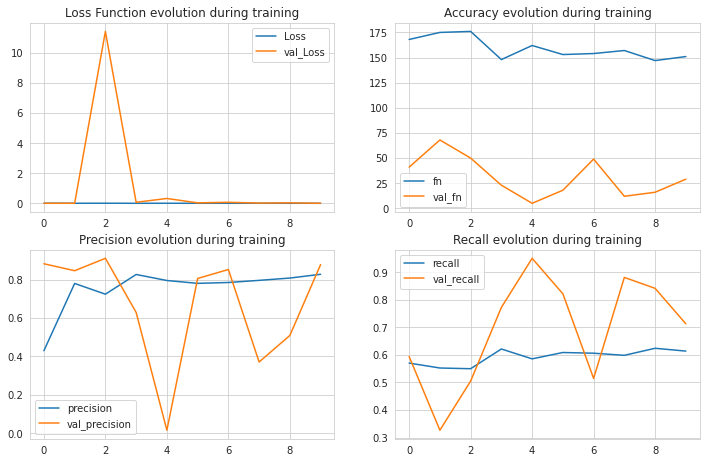

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(accuracy_score(y_train, y_train_pred.round()) )
print(accuracy_score(y_test, y_test_pred.round()) )

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

0.9990827097368825
0.9993153330290369


# XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train, eval_metric='aucpr')

y_train_pred_xgb = xgb_clf.predict(x_train)
y_test_pred_xgb = xgb_clf.predict(x_test)

print(accuracy_score(y_train, y_train_pred_xgb.round()) )
print(accuracy_score(y_test, y_test_pred_xgb.round()) )

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred_xgb),
        'Test': f1_score(y_test, y_test_pred_xgb),
}

0.9996576620070662
0.999403110845827


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(x_train, y_train)

y_train_pred_rf = rf_clf.predict(x_train)
y_test_pred_rf = rf_clf.predict(x_test)


print(accuracy_score(y_train, y_train_pred_rf.round()) )
print(accuracy_score(y_test, y_test_pred_rf.round()) )

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred_rf),
        'Test': f1_score(y_test, y_test_pred_rf),
}

0.9999956110513727
0.9993328885923949


# CatBoost Classifier

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(x_train, y_train)



Learning rate set to 0.104628
0:	learn: 0.3497181	total: 219ms	remaining: 3m 39s
1:	learn: 0.1738669	total: 355ms	remaining: 2m 57s
2:	learn: 0.0909092	total: 542ms	remaining: 3m
3:	learn: 0.0495640	total: 745ms	remaining: 3m 5s
4:	learn: 0.0288248	total: 880ms	remaining: 2m 55s
5:	learn: 0.0180985	total: 1.04s	remaining: 2m 52s
6:	learn: 0.0123385	total: 1.18s	remaining: 2m 47s
7:	learn: 0.0089781	total: 1.29s	remaining: 2m 39s
8:	learn: 0.0069779	total: 1.39s	remaining: 2m 32s
9:	learn: 0.0056240	total: 1.57s	remaining: 2m 35s
10:	learn: 0.0047239	total: 1.73s	remaining: 2m 35s
11:	learn: 0.0041743	total: 1.85s	remaining: 2m 32s
12:	learn: 0.0037672	total: 2.01s	remaining: 2m 32s
13:	learn: 0.0034677	total: 2.13s	remaining: 2m 29s
14:	learn: 0.0032430	total: 2.23s	remaining: 2m 26s
15:	learn: 0.0030550	total: 2.35s	remaining: 2m 24s
16:	learn: 0.0029249	total: 2.48s	remaining: 2m 23s
17:	learn: 0.0028340	total: 2.61s	remaining: 2m 22s
18:	learn: 0.0027489	total: 2.74s	remaining: 2m 2

In [ ]:
y_train_pred_cb = cb_clf.predict(x_train)
y_test_pred_cb = cb_clf.predict(x_test)

print(accuracy_score(y_train, y_train_pred_cb.round()) )
print(accuracy_score(y_test, y_test_pred_cb.round()) )

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred_cb),
        'Test': f1_score(y_test, y_test_pred_cb),
}

1.0
0.9993328885923949


# LightGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(x_train, y_train, eval_metric='aucpr')

y_train_pred_lgbm = lgbm_clf.predict(x_train)
y_test_pred_lgbm = lgbm_clf.predict(x_test)

print(accuracy_score(y_train, y_train_pred_lgbm.round()) )
print(accuracy_score(y_test, y_test_pred_lgbm.round()) )

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred_lgbm),
        'Test': f1_score(y_test, y_test_pred_lgbm),
}

0.9961816146942
0.9988237772550121


# Metrics Comparison

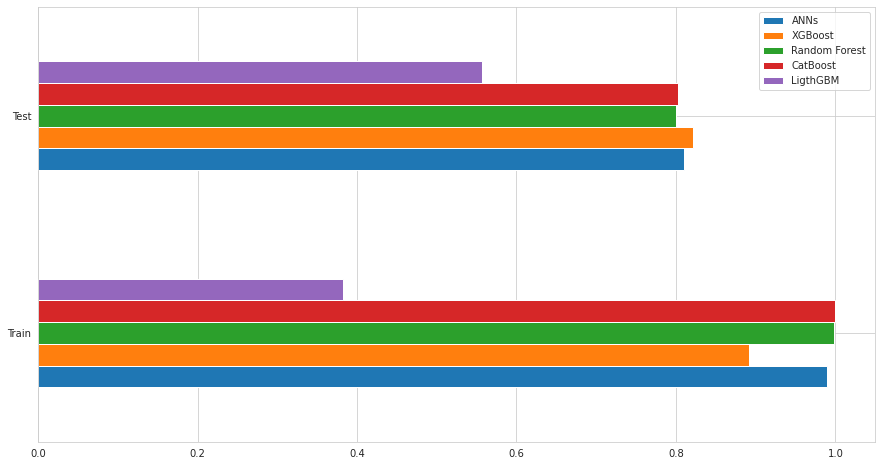

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))